Simulation of single-stock trading environment. The agent is to find the policy that maximizes profit on buying and selling NFLX stock. The reward function is the difference between the initial portfolio of 1000 cash units and the value of the final portfolio.

https://www.gymlibrary.dev/ based on OpenAI gym

*Actions Space*: Discrete(3)

0 - Hold
1 - Sell
2 - Buy

*Observation space*: Continuous (3)

0 - Number of NFLX shares owned
1 - Price of NFLX shares
2 - Cash balance


*Reward Schedule*:

end of each step: (current value - previous value)

There are 2 modes: in the training mode, the model.fit function is called to train the model with the action/target pairs. In the test mode, the model's weights are frozen.



Sources: https://www.analyticsvidhya.com/blog/2020/10/reinforcement-learning-stock-price-prediction/

https://analyticsindiamag.com/creating-a-market-trading-bot-using-open-ai-gym-anytrading/

In [3]:
import pandas as pd
import numpy as np
import time
import os
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
import math
import random
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import pickle

from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl


# importing the trader_bot and rl_classes
from trader_bot import *
from rl_classes import *

In [75]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")

In [14]:
# training the model
trainer, train_ = trader_bot('train', epochs=3000, initial_cash=1000)

  0%|                                                                                                                      | 1/3000 [00:00<09:00,  5.55it/s]

episode: 1/3000, episode end value: 123198.89, duration: 0:00:00.180152
episode: 2/3000, episode end value: 2696.96, duration: 0:00:00.200920


  0%|                                                                                                                      | 3/3000 [00:00<09:25,  5.30it/s]

episode: 3/3000, episode end value: 200821.50, duration: 0:00:00.182762


  0%|▏                                                                                                                     | 4/3000 [00:00<10:03,  4.97it/s]

episode: 4/3000, episode end value: 107244.08, duration: 0:00:00.219941


  0%|▏                                                                                                                     | 5/3000 [00:01<10:22,  4.81it/s]

episode: 5/3000, episode end value: 294236.13, duration: 0:00:00.218894


  0%|▎                                                                                                                     | 7/3000 [00:01<10:19,  4.83it/s]

episode: 6/3000, episode end value: 145084.95, duration: 0:00:00.215429
episode: 7/3000, episode end value: 291514.00, duration: 0:00:00.198958


  0%|▎                                                                                                                     | 8/3000 [00:01<10:10,  4.90it/s]

episode: 8/3000, episode end value: 127045.38, duration: 0:00:00.196085
episode: 9/3000, episode end value: 170783.53, duration: 0:00:00.200146


  0%|▍                                                                                                                    | 11/3000 [00:02<09:57,  5.00it/s]

episode: 10/3000, episode end value: 132685.79, duration: 0:00:00.191615
episode: 11/3000, episode end value: 1000.00, duration: 0:00:00.199081


  0%|▍                                                                                                                    | 12/3000 [00:02<09:59,  4.98it/s]

episode: 12/3000, episode end value: 2142.28, duration: 0:00:00.201051


  0%|▌                                                                                                                    | 14/3000 [00:02<09:58,  4.99it/s]

episode: 13/3000, episode end value: 114880.13, duration: 0:00:00.211764
episode: 14/3000, episode end value: 41757.44, duration: 0:00:00.190515


  1%|▌                                                                                                                    | 16/3000 [00:03<09:52,  5.04it/s]

episode: 15/3000, episode end value: 147045.54, duration: 0:00:00.192866
episode: 16/3000, episode end value: 1000.00, duration: 0:00:00.197826


  1%|▋                                                                                                                    | 18/3000 [00:03<09:52,  5.03it/s]

episode: 17/3000, episode end value: 28338.23, duration: 0:00:00.198092
episode: 18/3000, episode end value: 193276.91, duration: 0:00:00.198142


  1%|▋                                                                                                                    | 19/3000 [00:03<10:09,  4.89it/s]

episode: 19/3000, episode end value: 255176.07, duration: 0:00:00.216426
episode: 20/3000, episode end value: 108726.48, duration: 0:00:00.200294


  1%|▊                                                                                                                    | 22/3000 [00:04<09:42,  5.11it/s]

episode: 21/3000, episode end value: 136091.38, duration: 0:00:00.179958
episode: 22/3000, episode end value: 413704.22, duration: 0:00:00.192380
episode: 23/3000, episode end value: 292530.50, duration: 0:00:00.212720


  1%|▉                                                                                                                    | 24/3000 [00:04<09:48,  5.05it/s]

episode: 24/3000, episode end value: 1407.37, duration: 0:00:00.189116
episode: 25/3000, episode end value: 1000.00, duration: 0:00:00.209386


  1%|█                                                                                                                    | 26/3000 [00:05<09:43,  5.09it/s]

episode: 26/3000, episode end value: 83317.79, duration: 0:00:00.183202
episode: 27/3000, episode end value: 168470.37, duration: 0:00:00.207951


  1%|█                                                                                                                    | 28/3000 [00:05<09:57,  4.98it/s]

episode: 28/3000, episode end value: 96044.54, duration: 0:00:00.202032


  1%|█▏                                                                                                                   | 29/3000 [00:05<10:14,  4.83it/s]

episode: 29/3000, episode end value: 416965.11, duration: 0:00:00.219809
episode: 30/3000, episode end value: 46155.68, duration: 0:00:00.200931


  1%|█▏                                                                                                                   | 32/3000 [00:06<09:45,  5.07it/s]

episode: 31/3000, episode end value: 83141.46, duration: 0:00:00.190582
episode: 32/3000, episode end value: 258616.69, duration: 0:00:00.186852
episode: 33/3000, episode end value: 60501.40, duration: 0:00:00.214574


  1%|█▎                                                                                                                   | 35/3000 [00:07<09:35,  5.16it/s]

episode: 34/3000, episode end value: 38797.20, duration: 0:00:00.183488
episode: 35/3000, episode end value: 217712.27, duration: 0:00:00.185443


  1%|█▍                                                                                                                   | 37/3000 [00:07<09:32,  5.18it/s]

episode: 36/3000, episode end value: 134622.61, duration: 0:00:00.203336
episode: 37/3000, episode end value: 7689.30, duration: 0:00:00.182950


  1%|█▌                                                                                                                   | 39/3000 [00:07<09:39,  5.11it/s]

episode: 38/3000, episode end value: 110298.50, duration: 0:00:00.193927
episode: 39/3000, episode end value: 65500.34, duration: 0:00:00.200003


  1%|█▌                                                                                                                   | 41/3000 [00:08<09:48,  5.03it/s]

episode: 40/3000, episode end value: 184453.03, duration: 0:00:00.202428
episode: 41/3000, episode end value: 294146.05, duration: 0:00:00.200000


  1%|█▋                                                                                                                   | 43/3000 [00:08<10:04,  4.89it/s]

episode: 42/3000, episode end value: 4090.79, duration: 0:00:00.209939
episode: 43/3000, episode end value: 20356.16, duration: 0:00:00.208047


  1%|█▋                                                                                                                   | 44/3000 [00:08<10:14,  4.81it/s]

episode: 44/3000, episode end value: 252436.45, duration: 0:00:00.215158
episode: 45/3000, episode end value: 107380.18, duration: 0:00:00.214542


  2%|█▊                                                                                                                   | 46/3000 [00:09<09:57,  4.94it/s]

episode: 46/3000, episode end value: 67167.24, duration: 0:00:00.182687


  2%|█▊                                                                                                                   | 47/3000 [00:09<10:05,  4.87it/s]

episode: 47/3000, episode end value: 3054.42, duration: 0:00:00.211071


  2%|█▉                                                                                                                   | 49/3000 [00:09<09:48,  5.02it/s]

episode: 48/3000, episode end value: 127297.54, duration: 0:00:00.206592
episode: 49/3000, episode end value: 44499.42, duration: 0:00:00.182761


  2%|█▉                                                                                                                   | 51/3000 [00:10<09:41,  5.07it/s]

episode: 50/3000, episode end value: 113459.92, duration: 0:00:00.213139
episode: 51/3000, episode end value: 1000.00, duration: 0:00:00.181301


  2%|██                                                                                                                   | 53/3000 [00:10<10:05,  4.87it/s]

episode: 52/3000, episode end value: 108940.98, duration: 0:00:00.216819
episode: 53/3000, episode end value: 263528.57, duration: 0:00:00.209608


  2%|██                                                                                                                   | 54/3000 [00:10<10:14,  4.79it/s]

episode: 54/3000, episode end value: 117066.36, duration: 0:00:00.214869
episode: 55/3000, episode end value: 64898.82, duration: 0:00:00.208200


  2%|██▏                                                                                                                  | 56/3000 [00:11<10:13,  4.79it/s]

episode: 56/3000, episode end value: 24678.82, duration: 0:00:00.207177


  2%|██▏                                                                                                                  | 57/3000 [00:11<10:16,  4.78it/s]

episode: 57/3000, episode end value: 188996.92, duration: 0:00:00.210026


  2%|██▎                                                                                                                  | 58/3000 [00:11<10:19,  4.75it/s]

episode: 58/3000, episode end value: 3393.80, duration: 0:00:00.213149
episode: 59/3000, episode end value: 161617.20, duration: 0:00:00.218175


  2%|██▎                                                                                                                  | 60/3000 [00:12<10:19,  4.75it/s]

episode: 60/3000, episode end value: 273682.45, duration: 0:00:00.203417


  2%|██▍                                                                                                                  | 61/3000 [00:12<10:44,  4.56it/s]

episode: 61/3000, episode end value: 139353.72, duration: 0:00:00.239407


  2%|██▍                                                                                                                  | 62/3000 [00:12<10:37,  4.61it/s]

episode: 62/3000, episode end value: 49719.17, duration: 0:00:00.210643


  2%|██▍                                                                                                                  | 64/3000 [00:12<10:13,  4.79it/s]

episode: 63/3000, episode end value: 154626.96, duration: 0:00:00.211369
episode: 64/3000, episode end value: 103680.59, duration: 0:00:00.192460


  2%|██▌                                                                                                                  | 66/3000 [00:13<10:02,  4.87it/s]

episode: 65/3000, episode end value: 141027.02, duration: 0:00:00.210351
episode: 66/3000, episode end value: 118485.75, duration: 0:00:00.194889


  2%|██▌                                                                                                                  | 67/3000 [00:13<10:09,  4.81it/s]

episode: 67/3000, episode end value: 1000.00, duration: 0:00:00.212998


  2%|██▋                                                                                                                  | 68/3000 [00:13<10:10,  4.81it/s]

episode: 68/3000, episode end value: 14423.65, duration: 0:00:00.207573
episode: 69/3000, episode end value: 89973.40, duration: 0:00:00.201666


  2%|██▊                                                                                                                  | 71/3000 [00:14<09:40,  5.04it/s]

episode: 70/3000, episode end value: 1281.90, duration: 0:00:00.183559
episode: 71/3000, episode end value: 135459.85, duration: 0:00:00.194065


  2%|██▊                                                                                                                  | 73/3000 [00:14<09:48,  4.98it/s]

episode: 72/3000, episode end value: 145680.30, duration: 0:00:00.216568
episode: 73/3000, episode end value: 66972.68, duration: 0:00:00.192970


  2%|██▉                                                                                                                  | 74/3000 [00:15<10:02,  4.86it/s]

episode: 74/3000, episode end value: 121667.73, duration: 0:00:00.216207
episode: 75/3000, episode end value: 226858.04, duration: 0:00:00.200686


  3%|███                                                                                                                  | 77/3000 [00:15<09:40,  5.04it/s]

episode: 76/3000, episode end value: 94418.27, duration: 0:00:00.180005
episode: 77/3000, episode end value: 10860.16, duration: 0:00:00.200105


  3%|███                                                                                                                  | 79/3000 [00:16<09:36,  5.06it/s]

episode: 78/3000, episode end value: 263345.15, duration: 0:00:00.205368
episode: 79/3000, episode end value: 25596.56, duration: 0:00:00.188965


  3%|███▏                                                                                                                 | 81/3000 [00:16<09:47,  4.97it/s]

episode: 80/3000, episode end value: 21929.94, duration: 0:00:00.213655
episode: 81/3000, episode end value: 40718.96, duration: 0:00:00.197313


  3%|███▏                                                                                                                 | 82/3000 [00:16<09:50,  4.94it/s]

episode: 82/3000, episode end value: 198402.26, duration: 0:00:00.203204


  3%|███▏                                                                                                                 | 83/3000 [00:16<10:11,  4.77it/s]

episode: 83/3000, episode end value: 155574.30, duration: 0:00:00.226419


  3%|███▎                                                                                                                 | 84/3000 [00:17<10:31,  4.62it/s]

episode: 84/3000, episode end value: 1000.00, duration: 0:00:00.231500


  3%|███▎                                                                                                                 | 85/3000 [00:17<10:28,  4.64it/s]

episode: 85/3000, episode end value: 88714.56, duration: 0:00:00.212623


  3%|███▎                                                                                                                 | 86/3000 [00:17<10:25,  4.66it/s]

episode: 86/3000, episode end value: 186945.68, duration: 0:00:00.211437
episode: 87/3000, episode end value: 5084.06, duration: 0:00:00.201081


  3%|███▍                                                                                                                 | 89/3000 [00:18<09:45,  4.97it/s]

episode: 88/3000, episode end value: 4744.68, duration: 0:00:00.183533
episode: 89/3000, episode end value: 198366.61, duration: 0:00:00.196038


  3%|███▌                                                                                                                 | 91/3000 [00:18<09:49,  4.94it/s]

episode: 90/3000, episode end value: 183095.51, duration: 0:00:00.210579
episode: 91/3000, episode end value: 294129.30, duration: 0:00:00.197953


  3%|███▋                                                                                                                 | 93/3000 [00:18<09:47,  4.95it/s]

episode: 92/3000, episode end value: 24374.90, duration: 0:00:00.205612
episode: 93/3000, episode end value: 81313.84, duration: 0:00:00.197478


  3%|███▋                                                                                                                 | 94/3000 [00:19<09:50,  4.92it/s]

episode: 94/3000, episode end value: 143011.05, duration: 0:00:00.204527
episode: 95/3000, episode end value: 199890.76, duration: 0:00:00.206473


  3%|███▋                                                                                                                 | 96/3000 [00:19<09:32,  5.08it/s]

episode: 96/3000, episode end value: 25086.16, duration: 0:00:00.178900


  3%|███▊                                                                                                                 | 98/3000 [00:19<09:40,  5.00it/s]

episode: 97/3000, episode end value: 52600.61, duration: 0:00:00.206817
episode: 98/3000, episode end value: 172405.04, duration: 0:00:00.199037


  3%|███▊                                                                                                                | 100/3000 [00:20<09:45,  4.95it/s]

episode: 99/3000, episode end value: 313248.70, duration: 0:00:00.209903
episode: 100/3000, episode end value: 50603.92, duration: 0:00:00.198103


  3%|███▉                                                                                                                | 102/3000 [00:20<09:52,  4.89it/s]

episode: 101/3000, episode end value: 1000.00, duration: 0:00:00.218699
episode: 102/3000, episode end value: 35288.88, duration: 0:00:00.196932


  3%|████                                                                                                                | 104/3000 [00:21<09:44,  4.96it/s]

episode: 103/3000, episode end value: 233438.02, duration: 0:00:00.199047
episode: 104/3000, episode end value: 1000.00, duration: 0:00:00.198203


  4%|████                                                                                                                | 106/3000 [00:21<09:52,  4.88it/s]

episode: 105/3000, episode end value: 46495.06, duration: 0:00:00.220953
episode: 106/3000, episode end value: 306069.62, duration: 0:00:00.197188


  4%|████▏                                                                                                               | 108/3000 [00:21<09:43,  4.96it/s]

episode: 107/3000, episode end value: 11827.10, duration: 0:00:00.205188
episode: 108/3000, episode end value: 69233.52, duration: 0:00:00.193161


  4%|████▎                                                                                                               | 110/3000 [00:22<09:43,  4.95it/s]

episode: 109/3000, episode end value: 142200.22, duration: 0:00:00.212763
episode: 110/3000, episode end value: 144915.26, duration: 0:00:00.193070


  4%|████▎                                                                                                               | 111/3000 [00:22<10:00,  4.81it/s]

episode: 111/3000, episode end value: 294052.20, duration: 0:00:00.221289


  4%|████▎                                                                                                               | 113/3000 [00:22<09:39,  4.99it/s]

episode: 112/3000, episode end value: 114832.76, duration: 0:00:00.205810
episode: 113/3000, episode end value: 1000.00, duration: 0:00:00.183648


  4%|████▍                                                                                                               | 115/3000 [00:23<09:35,  5.01it/s]

episode: 114/3000, episode end value: 93949.30, duration: 0:00:00.207850
episode: 115/3000, episode end value: 101436.88, duration: 0:00:00.190988


  4%|████▌                                                                                                               | 117/3000 [00:23<09:43,  4.94it/s]

episode: 116/3000, episode end value: 114201.37, duration: 0:00:00.212481
episode: 117/3000, episode end value: 113013.54, duration: 0:00:00.198246


  4%|████▌                                                                                                               | 119/3000 [00:24<09:43,  4.93it/s]

episode: 118/3000, episode end value: 94266.56, duration: 0:00:00.214846
episode: 119/3000, episode end value: 15608.98, duration: 0:00:00.193483


  4%|████▋                                                                                                               | 121/3000 [00:24<09:44,  4.93it/s]

episode: 120/3000, episode end value: 177495.74, duration: 0:00:00.209701
episode: 121/3000, episode end value: 331075.35, duration: 0:00:00.197438


  4%|████▋                                                                                                               | 122/3000 [00:24<09:57,  4.81it/s]

episode: 122/3000, episode end value: 4411.94, duration: 0:00:00.217877
episode: 123/3000, episode end value: 160984.50, duration: 0:00:00.201495


  4%|████▊                                                                                                               | 124/3000 [00:25<09:46,  4.90it/s]

episode: 124/3000, episode end value: 235528.53, duration: 0:00:00.197980
episode: 125/3000, episode end value: 78729.52, duration: 0:00:00.207965


  4%|████▊                                                                                                               | 126/3000 [00:25<09:48,  4.88it/s]

episode: 126/3000, episode end value: 274219.04, duration: 0:00:00.201787


  4%|████▉                                                                                                               | 127/3000 [00:25<09:46,  4.90it/s]

episode: 127/3000, episode end value: 25792.88, duration: 0:00:00.202153
episode: 128/3000, episode end value: 216193.45, duration: 0:00:00.202691


  4%|████▉                                                                                                               | 129/3000 [00:26<09:39,  4.95it/s]

episode: 129/3000, episode end value: 109296.30, duration: 0:00:00.196231


  4%|█████                                                                                                               | 130/3000 [00:26<09:40,  4.94it/s]

episode: 130/3000, episode end value: 20619.82, duration: 0:00:00.202468


  4%|█████                                                                                                               | 131/3000 [00:26<09:47,  4.88it/s]

episode: 131/3000, episode end value: 123449.90, duration: 0:00:00.209373
episode: 132/3000, episode end value: 56029.42, duration: 0:00:00.202041


  4%|█████▏                                                                                                              | 134/3000 [00:27<09:32,  5.01it/s]

episode: 133/3000, episode end value: 170370.48, duration: 0:00:00.193858
episode: 134/3000, episode end value: 49203.46, duration: 0:00:00.195185


  5%|█████▎                                                                                                              | 136/3000 [00:27<09:40,  4.94it/s]

episode: 135/3000, episode end value: 102825.50, duration: 0:00:00.213919
episode: 136/3000, episode end value: 83211.20, duration: 0:00:00.198251


  5%|█████▎                                                                                                              | 137/3000 [00:27<09:44,  4.89it/s]

episode: 137/3000, episode end value: 47004.13, duration: 0:00:00.207024


  5%|█████▎                                                                                                              | 138/3000 [00:28<09:54,  4.81it/s]

episode: 138/3000, episode end value: 184793.89, duration: 0:00:00.215050


  5%|█████▍                                                                                                              | 140/3000 [00:28<09:44,  4.89it/s]

episode: 139/3000, episode end value: 6108.84, duration: 0:00:00.213419
episode: 140/3000, episode end value: 49804.76, duration: 0:00:00.190706


  5%|█████▍                                                                                                              | 141/3000 [00:28<09:46,  4.88it/s]

episode: 141/3000, episode end value: 233154.06, duration: 0:00:00.205614


  5%|█████▍                                                                                                              | 142/3000 [00:28<10:00,  4.76it/s]

episode: 142/3000, episode end value: 383329.71, duration: 0:00:00.220440
episode: 143/3000, episode end value: 204707.08, duration: 0:00:00.209024


  5%|█████▌                                                                                                              | 144/3000 [00:29<09:58,  4.77it/s]

episode: 144/3000, episode end value: 1000.00, duration: 0:00:00.207796


  5%|█████▋                                                                                                              | 146/3000 [00:29<09:45,  4.87it/s]

episode: 145/3000, episode end value: 5769.46, duration: 0:00:00.212546
episode: 146/3000, episode end value: 265566.01, duration: 0:00:00.191517


  5%|█████▋                                                                                                              | 147/3000 [00:29<09:54,  4.80it/s]

episode: 147/3000, episode end value: 1000.00, duration: 0:00:00.214810


  5%|█████▋                                                                                                              | 148/3000 [00:30<09:54,  4.80it/s]

episode: 148/3000, episode end value: 1000.00, duration: 0:00:00.207850
episode: 149/3000, episode end value: 36729.46, duration: 0:00:00.206062


  5%|█████▊                                                                                                              | 151/3000 [00:30<09:33,  4.97it/s]

episode: 150/3000, episode end value: 140052.14, duration: 0:00:00.194754
episode: 151/3000, episode end value: 61379.60, duration: 0:00:00.193163


  5%|█████▉                                                                                                              | 152/3000 [00:30<09:28,  5.01it/s]

episode: 152/3000, episode end value: 26471.64, duration: 0:00:00.194841


  5%|█████▉                                                                                                              | 154/3000 [00:31<09:33,  4.96it/s]

episode: 153/3000, episode end value: 345457.15, duration: 0:00:00.213615
episode: 154/3000, episode end value: 1000.00, duration: 0:00:00.194517


  5%|█████▉                                                                                                              | 155/3000 [00:31<09:40,  4.90it/s]

episode: 155/3000, episode end value: 65670.03, duration: 0:00:00.209402


  5%|██████                                                                                                              | 157/3000 [00:31<09:35,  4.94it/s]

episode: 156/3000, episode end value: 25453.50, duration: 0:00:00.204100
episode: 157/3000, episode end value: 115839.24, duration: 0:00:00.197156


  5%|██████                                                                                                              | 158/3000 [00:32<09:42,  4.88it/s]

episode: 158/3000, episode end value: 175773.41, duration: 0:00:00.210486


  5%|██████▏                                                                                                             | 159/3000 [00:32<09:55,  4.77it/s]

episode: 159/3000, episode end value: 114235.42, duration: 0:00:00.218589


  5%|██████▏                                                                                                             | 161/3000 [00:32<09:41,  4.88it/s]

episode: 160/3000, episode end value: 165603.84, duration: 0:00:00.203018
episode: 161/3000, episode end value: 1000.00, duration: 0:00:00.197673


  5%|██████▎                                                                                                             | 162/3000 [00:33<09:35,  4.93it/s]

episode: 162/3000, episode end value: 43246.67, duration: 0:00:00.197364


  5%|██████▎                                                                                                             | 163/3000 [00:33<09:45,  4.85it/s]

episode: 163/3000, episode end value: 145933.40, duration: 0:00:00.213321


  5%|██████▎                                                                                                             | 164/3000 [00:33<09:57,  4.75it/s]

episode: 164/3000, episode end value: 269261.18, duration: 0:00:00.219496
episode: 165/3000, episode end value: 34164.38, duration: 0:00:00.203577


  6%|██████▍                                                                                                             | 166/3000 [00:33<09:38,  4.90it/s]

episode: 166/3000, episode end value: 17817.45, duration: 0:00:00.191729


  6%|██████▍                                                                                                             | 167/3000 [00:34<10:05,  4.68it/s]

episode: 167/3000, episode end value: 235360.03, duration: 0:00:00.235973
episode: 168/3000, episode end value: 292530.50, duration: 0:00:00.207731


  6%|██████▌                                                                                                             | 169/3000 [00:34<09:59,  4.72it/s]

episode: 169/3000, episode end value: 132867.27, duration: 0:00:00.209675
episode: 170/3000, episode end value: 368279.41, duration: 0:00:00.202375


  6%|██████▌                                                                                                             | 171/3000 [00:34<09:41,  4.86it/s]

episode: 171/3000, episode end value: 3123.38, duration: 0:00:00.196417


  6%|██████▋                                                                                                             | 173/3000 [00:35<09:35,  4.92it/s]

episode: 172/3000, episode end value: 21122.00, duration: 0:00:00.208921
episode: 173/3000, episode end value: 159386.10, duration: 0:00:00.194632


  6%|██████▋                                                                                                             | 174/3000 [00:35<09:39,  4.88it/s]

episode: 174/3000, episode end value: 103281.74, duration: 0:00:00.207733
episode: 175/3000, episode end value: 79408.28, duration: 0:00:00.202865


  6%|██████▊                                                                                                             | 177/3000 [00:36<09:27,  4.97it/s]

episode: 176/3000, episode end value: 234213.93, duration: 0:00:00.207096
episode: 177/3000, episode end value: 162902.40, duration: 0:00:00.189539


  6%|██████▉                                                                                                             | 178/3000 [00:36<09:33,  4.92it/s]

episode: 178/3000, episode end value: 222774.48, duration: 0:00:00.207381


  6%|██████▉                                                                                                             | 179/3000 [00:36<09:40,  4.86it/s]

episode: 179/3000, episode end value: 83480.84, duration: 0:00:00.210361
episode: 180/3000, episode end value: 315793.09, duration: 0:00:00.207344


  6%|██████▉                                                                                                             | 181/3000 [00:36<09:26,  4.97it/s]

episode: 181/3000, episode end value: 223741.50, duration: 0:00:00.187574


  6%|███████                                                                                                             | 183/3000 [00:37<09:17,  5.05it/s]

episode: 182/3000, episode end value: 56621.38, duration: 0:00:00.210587
episode: 183/3000, episode end value: 1000.00, duration: 0:00:00.182114


  6%|███████▏                                                                                                            | 185/3000 [00:37<09:15,  5.07it/s]

episode: 184/3000, episode end value: 6108.84, duration: 0:00:00.210340
episode: 185/3000, episode end value: 73645.46, duration: 0:00:00.185491


  6%|███████▏                                                                                                            | 186/3000 [00:37<09:11,  5.10it/s]

episode: 186/3000, episode end value: 249036.19, duration: 0:00:00.192742
episode: 187/3000, episode end value: 135752.00, duration: 0:00:00.209595


  6%|███████▎                                                                                                            | 189/3000 [00:38<09:10,  5.10it/s]

episode: 188/3000, episode end value: 57278.08, duration: 0:00:00.178445
episode: 189/3000, episode end value: 143674.02, duration: 0:00:00.199358


  6%|███████▍                                                                                                            | 191/3000 [00:38<09:01,  5.18it/s]

episode: 190/3000, episode end value: 1000.00, duration: 0:00:00.200014
episode: 191/3000, episode end value: 3620.16, duration: 0:00:00.180513


  6%|███████▍                                                                                                            | 193/3000 [00:39<09:12,  5.08it/s]

episode: 192/3000, episode end value: 112835.54, duration: 0:00:00.201025
episode: 193/3000, episode end value: 7332.51, duration: 0:00:00.199148


  6%|███████▌                                                                                                            | 194/3000 [00:39<09:21,  5.00it/s]

episode: 194/3000, episode end value: 137682.24, duration: 0:00:00.206235
episode: 195/3000, episode end value: 323089.67, duration: 0:00:00.201965


  7%|███████▌                                                                                                            | 197/3000 [00:40<09:10,  5.09it/s]

episode: 196/3000, episode end value: 77487.66, duration: 0:00:00.180230
episode: 197/3000, episode end value: 1000.00, duration: 0:00:00.198970


  7%|███████▋                                                                                                            | 199/3000 [00:40<09:21,  4.99it/s]

episode: 198/3000, episode end value: 6108.84, duration: 0:00:00.212911
episode: 199/3000, episode end value: 51308.26, duration: 0:00:00.196846


  7%|███████▊                                                                                                            | 201/3000 [00:40<08:57,  5.21it/s]

episode: 200/3000, episode end value: 175120.08, duration: 0:00:00.180165
episode: 201/3000, episode end value: 86195.88, duration: 0:00:00.185284


  7%|███████▊                                                                                                            | 202/3000 [00:41<09:20,  4.99it/s]

episode: 202/3000, episode end value: 293547.00, duration: 0:00:00.218733
episode: 203/3000, episode end value: 50008.41, duration: 0:00:00.202960


  7%|███████▉                                                                                                            | 205/3000 [00:41<09:06,  5.11it/s]

episode: 204/3000, episode end value: 72960.06, duration: 0:00:00.188208
episode: 205/3000, episode end value: 216694.13, duration: 0:00:00.190230


  7%|████████                                                                                                            | 207/3000 [00:42<09:20,  4.99it/s]

episode: 206/3000, episode end value: 293731.80, duration: 0:00:00.226761
episode: 207/3000, episode end value: 1000.00, duration: 0:00:00.188854


  7%|████████                                                                                                            | 209/3000 [00:42<09:26,  4.93it/s]

episode: 208/3000, episode end value: 116746.72, duration: 0:00:00.210644
episode: 209/3000, episode end value: 254889.90, duration: 0:00:00.199889


  7%|████████                                                                                                            | 210/3000 [00:42<09:32,  4.87it/s]

episode: 210/3000, episode end value: 5958.33, duration: 0:00:00.209304
episode: 211/3000, episode end value: 16629.62, duration: 0:00:00.204376


  7%|████████▏                                                                                                           | 213/3000 [00:43<09:13,  5.03it/s]

episode: 212/3000, episode end value: 211956.44, duration: 0:00:00.185538
episode: 213/3000, episode end value: 135806.01, duration: 0:00:00.195933


  7%|████████▎                                                                                                           | 214/3000 [00:43<09:21,  4.96it/s]

episode: 214/3000, episode end value: 96044.54, duration: 0:00:00.207162


  7%|████████▎                                                                                                           | 215/3000 [00:43<09:37,  4.82it/s]

episode: 215/3000, episode end value: 66321.69, duration: 0:00:00.220575
episode: 216/3000, episode end value: 98174.55, duration: 0:00:00.208134


  7%|████████▍                                                                                                           | 217/3000 [00:44<09:28,  4.90it/s]

episode: 217/3000, episode end value: 130321.92, duration: 0:00:00.194239
episode: 218/3000, episode end value: 292539.30, duration: 0:00:00.210274


  7%|████████▍                                                                                                           | 219/3000 [00:44<09:21,  4.96it/s]

episode: 219/3000, episode end value: 18319.88, duration: 0:00:00.190415
episode: 220/3000, episode end value: 352615.82, duration: 0:00:00.201989


  7%|████████▌                                                                                                           | 222/3000 [00:45<09:24,  4.92it/s]

episode: 221/3000, episode end value: 290482.22, duration: 0:00:00.210841
episode: 222/3000, episode end value: 81111.82, duration: 0:00:00.198028


  7%|████████▋                                                                                                           | 224/3000 [00:45<09:33,  4.84it/s]

episode: 223/3000, episode end value: 107772.39, duration: 0:00:00.208164
episode: 224/3000, episode end value: 60574.70, duration: 0:00:00.208581


  8%|████████▋                                                                                                           | 225/3000 [00:45<09:26,  4.90it/s]

episode: 225/3000, episode end value: 122176.80, duration: 0:00:00.197346
episode: 226/3000, episode end value: 195989.20, duration: 0:00:00.207512


  8%|████████▊                                                                                                           | 227/3000 [00:46<09:27,  4.89it/s]

episode: 227/3000, episode end value: 1000.00, duration: 0:00:00.202083


  8%|████████▊                                                                                                           | 229/3000 [00:46<09:21,  4.93it/s]

episode: 228/3000, episode end value: 60574.70, duration: 0:00:00.204915
episode: 229/3000, episode end value: 60685.82, duration: 0:00:00.196697


  8%|████████▉                                                                                                           | 232/3000 [00:47<09:26,  4.89it/s]

episode: 230/3000, episode end value: 192604.71, duration: 0:00:00.206703
episode: 231/3000, episode end value: 16917.48, duration: 0:00:00.197176
episode: 232/3000, episode end value: 229823.27, duration: 0:00:00.209215


  8%|█████████                                                                                                           | 233/3000 [00:47<09:09,  5.03it/s]

episode: 233/3000, episode end value: 45590.22, duration: 0:00:00.183825


  8%|█████████                                                                                                           | 235/3000 [00:47<09:09,  5.03it/s]

episode: 234/3000, episode end value: 57448.12, duration: 0:00:00.212308
episode: 235/3000, episode end value: 28867.32, duration: 0:00:00.187999


  8%|█████████▏                                                                                                          | 236/3000 [00:47<09:13,  5.00it/s]

episode: 236/3000, episode end value: 5423.44, duration: 0:00:00.202050
episode: 237/3000, episode end value: 3387.16, duration: 0:00:00.201845


  8%|█████████▏                                                                                                          | 239/3000 [00:48<08:56,  5.15it/s]

episode: 238/3000, episode end value: 80563.52, duration: 0:00:00.201282
episode: 239/3000, episode end value: 258457.57, duration: 0:00:00.176730


  8%|█████████▎                                                                                                          | 240/3000 [00:48<08:54,  5.16it/s]

episode: 240/3000, episode end value: 52094.83, duration: 0:00:00.191984
episode: 241/3000, episode end value: 167314.34, duration: 0:00:00.200848


  8%|█████████▎                                                                                                          | 242/3000 [00:49<09:03,  5.07it/s]

episode: 242/3000, episode end value: 206940.66, duration: 0:00:00.197946
episode: 243/3000, episode end value: 82123.32, duration: 0:00:00.199681


  8%|█████████▍                                                                                                          | 244/3000 [00:49<09:36,  4.78it/s]

episode: 244/3000, episode end value: 249444.30, duration: 0:00:00.233222
episode: 245/3000, episode end value: 293913.32, duration: 0:00:00.208293


  8%|█████████▌                                                                                                          | 247/3000 [00:50<09:17,  4.94it/s]

episode: 246/3000, episode end value: 63288.22, duration: 0:00:00.188350
episode: 247/3000, episode end value: 186521.48, duration: 0:00:00.199661


  8%|█████████▋                                                                                                          | 249/3000 [00:50<09:18,  4.93it/s]

episode: 248/3000, episode end value: 128404.91, duration: 0:00:00.210928
episode: 249/3000, episode end value: 1000.00, duration: 0:00:00.196401


  8%|█████████▋                                                                                                          | 250/3000 [00:50<09:16,  4.95it/s]

episode: 250/3000, episode end value: 144535.41, duration: 0:00:00.199805


  8%|█████████▋                                                                                                          | 252/3000 [00:51<09:13,  4.97it/s]

episode: 251/3000, episode end value: 79077.06, duration: 0:00:00.207054
episode: 252/3000, episode end value: 6780.96, duration: 0:00:00.194131


  8%|█████████▊                                                                                                          | 254/3000 [00:51<08:56,  5.12it/s]

episode: 253/3000, episode end value: 218593.01, duration: 0:00:00.191917
episode: 254/3000, episode end value: 21211.25, duration: 0:00:00.186078


  9%|█████████▉                                                                                                          | 256/3000 [00:51<09:01,  5.07it/s]

episode: 255/3000, episode end value: 227893.67, duration: 0:00:00.215862
episode: 256/3000, episode end value: 261661.98, duration: 0:00:00.186218


  9%|█████████▉                                                                                                          | 258/3000 [00:52<09:07,  5.01it/s]

episode: 257/3000, episode end value: 186659.00, duration: 0:00:00.215257
episode: 258/3000, episode end value: 196735.59, duration: 0:00:00.190563


  9%|██████████                                                                                                          | 260/3000 [00:52<09:09,  4.99it/s]

episode: 259/3000, episode end value: 108771.29, duration: 0:00:00.211318
episode: 260/3000, episode end value: 251232.30, duration: 0:00:00.193223


  9%|██████████▏                                                                                                         | 262/3000 [00:53<09:03,  5.04it/s]

episode: 261/3000, episode end value: 217585.68, duration: 0:00:00.201829
episode: 262/3000, episode end value: 70591.04, duration: 0:00:00.191058


  9%|██████████▏                                                                                                         | 264/3000 [00:53<09:23,  4.86it/s]

episode: 263/3000, episode end value: 268530.44, duration: 0:00:00.213843
episode: 264/3000, episode end value: 30639.76, duration: 0:00:00.211203


  9%|██████████▎                                                                                                         | 266/3000 [00:54<09:03,  5.03it/s]

episode: 265/3000, episode end value: 138976.11, duration: 0:00:00.194826
episode: 266/3000, episode end value: 234592.69, duration: 0:00:00.189109
episode: 267/3000, episode end value: 68724.45, duration: 0:00:00.201422


  9%|██████████▍                                                                                                         | 269/3000 [00:54<08:42,  5.22it/s]

episode: 268/3000, episode end value: 122964.00, duration: 0:00:00.189171
episode: 269/3000, episode end value: 12557.06, duration: 0:00:00.177685


  9%|██████████▍                                                                                                         | 271/3000 [00:54<08:57,  5.08it/s]

episode: 270/3000, episode end value: 184792.41, duration: 0:00:00.213227
episode: 271/3000, episode end value: 327332.01, duration: 0:00:00.193412


  9%|██████████▌                                                                                                         | 272/3000 [00:55<09:05,  5.00it/s]

episode: 272/3000, episode end value: 152211.93, duration: 0:00:00.205840


  9%|██████████▌                                                                                                         | 273/3000 [00:55<09:07,  4.98it/s]

episode: 273/3000, episode end value: 207361.18, duration: 0:00:00.201882


  9%|██████████▌                                                                                                         | 274/3000 [00:55<09:14,  4.92it/s]

episode: 274/3000, episode end value: 293547.00, duration: 0:00:00.208066


  9%|██████████▋                                                                                                         | 276/3000 [00:56<09:02,  5.02it/s]

episode: 275/3000, episode end value: 4577.90, duration: 0:00:00.201846
episode: 276/3000, episode end value: 1000.00, duration: 0:00:00.188630


  9%|██████████▋                                                                                                         | 277/3000 [00:56<09:17,  4.88it/s]

episode: 277/3000, episode end value: 107210.40, duration: 0:00:00.217185
episode: 278/3000, episode end value: 36653.04, duration: 0:00:00.210422


  9%|██████████▊                                                                                                         | 279/3000 [00:56<09:19,  4.86it/s]

episode: 279/3000, episode end value: 161205.50, duration: 0:00:00.202734


  9%|██████████▊                                                                                                         | 281/3000 [00:57<09:22,  4.83it/s]

episode: 280/3000, episode end value: 310679.29, duration: 0:00:00.229784
episode: 281/3000, episode end value: 124225.48, duration: 0:00:00.191576


  9%|██████████▉                                                                                                         | 282/3000 [00:57<09:20,  4.85it/s]

episode: 282/3000, episode end value: 24306.18, duration: 0:00:00.203789
episode: 283/3000, episode end value: 115106.10, duration: 0:00:00.204046


  9%|██████████▉                                                                                                         | 284/3000 [00:57<09:10,  4.93it/s]

episode: 284/3000, episode end value: 63386.92, duration: 0:00:00.194663


 10%|███████████                                                                                                         | 286/3000 [00:58<09:05,  4.98it/s]

episode: 285/3000, episode end value: 104189.66, duration: 0:00:00.206868
episode: 286/3000, episode end value: 223776.38, duration: 0:00:00.191998


 10%|███████████▏                                                                                                        | 288/3000 [00:58<09:07,  4.95it/s]

episode: 287/3000, episode end value: 1000.00, duration: 0:00:00.209396
episode: 288/3000, episode end value: 52257.88, duration: 0:00:00.196733


 10%|███████████▏                                                                                                        | 290/3000 [00:58<09:15,  4.88it/s]

episode: 289/3000, episode end value: 471716.90, duration: 0:00:00.227433
episode: 290/3000, episode end value: 7296.67, duration: 0:00:00.192949


 10%|███████████▎                                                                                                        | 291/3000 [00:59<09:21,  4.83it/s]

episode: 291/3000, episode end value: 7120.34, duration: 0:00:00.211584
episode: 292/3000, episode end value: 155743.29, duration: 0:00:00.204392


 10%|███████████▎                                                                                                        | 293/3000 [00:59<09:08,  4.94it/s]

episode: 293/3000, episode end value: 102153.38, duration: 0:00:00.192402
episode: 294/3000, episode end value: 314605.26, duration: 0:00:00.212995


 10%|███████████▍                                                                                                        | 295/3000 [00:59<09:17,  4.85it/s]

episode: 295/3000, episode end value: 156276.30, duration: 0:00:00.205120


 10%|███████████▍                                                                                                        | 296/3000 [01:00<09:16,  4.86it/s]

episode: 296/3000, episode end value: 75523.98, duration: 0:00:00.204187
episode: 297/3000, episode end value: 15353.96, duration: 0:00:00.206225


 10%|███████████▌                                                                                                        | 299/3000 [01:00<09:15,  4.86it/s]

episode: 298/3000, episode end value: 39537.77, duration: 0:00:00.212154
episode: 299/3000, episode end value: 57844.16, duration: 0:00:00.199015


 10%|███████████▋                                                                                                        | 301/3000 [01:01<08:59,  5.00it/s]

episode: 300/3000, episode end value: 1000.00, duration: 0:00:00.199192
episode: 301/3000, episode end value: 1000.00, duration: 0:00:00.190002


 10%|███████████▋                                                                                                        | 302/3000 [01:01<08:59,  5.00it/s]

episode: 302/3000, episode end value: 73136.39, duration: 0:00:00.199200
episode: 303/3000, episode end value: 174594.29, duration: 0:00:00.212389


 10%|███████████▊                                                                                                        | 304/3000 [01:01<09:02,  4.97it/s]

episode: 304/3000, episode end value: 341076.90, duration: 0:00:00.193399


 10%|███████████▊                                                                                                        | 306/3000 [01:02<09:10,  4.89it/s]

episode: 305/3000, episode end value: 331657.97, duration: 0:00:00.218964
episode: 306/3000, episode end value: 227192.63, duration: 0:00:00.198187


 10%|███████████▊                                                                                                        | 307/3000 [01:02<09:07,  4.92it/s]

episode: 307/3000, episode end value: 216427.62, duration: 0:00:00.199756
episode: 308/3000, episode end value: 197759.54, duration: 0:00:00.199028


 10%|███████████▉                                                                                                        | 309/3000 [01:02<09:08,  4.91it/s]

episode: 309/3000, episode end value: 110807.57, duration: 0:00:00.206213
episode: 310/3000, episode end value: 94680.38, duration: 0:00:00.210881


 10%|████████████                                                                                                        | 311/3000 [01:03<09:17,  4.82it/s]

episode: 311/3000, episode end value: 294146.05, duration: 0:00:00.208792


 10%|████████████                                                                                                        | 312/3000 [01:03<09:16,  4.83it/s]

episode: 312/3000, episode end value: 82092.00, duration: 0:00:00.206214
episode: 313/3000, episode end value: 118274.04, duration: 0:00:00.216484


 10%|████████████▏                                                                                                       | 314/3000 [01:03<09:22,  4.78it/s]

episode: 314/3000, episode end value: 74515.90, duration: 0:00:00.205677
episode: 315/3000, episode end value: 26301.95, duration: 0:00:00.208068


 11%|████████████▎                                                                                                       | 317/3000 [01:04<09:10,  4.88it/s]

episode: 316/3000, episode end value: 74735.42, duration: 0:00:00.215847
episode: 317/3000, episode end value: 1000.00, duration: 0:00:00.189526


 11%|████████████▎                                                                                                       | 318/3000 [01:04<09:31,  4.69it/s]

episode: 318/3000, episode end value: 67366.93, duration: 0:00:00.231265


 11%|████████████▎                                                                                                       | 320/3000 [01:05<09:06,  4.90it/s]

episode: 319/3000, episode end value: 137643.44, duration: 0:00:00.204270
episode: 320/3000, episode end value: 212845.10, duration: 0:00:00.187794


 11%|████████████▍                                                                                                       | 321/3000 [01:05<09:18,  4.80it/s]

episode: 321/3000, episode end value: 165013.18, duration: 0:00:00.217485


 11%|████████████▍                                                                                                       | 322/3000 [01:05<09:28,  4.71it/s]

episode: 322/3000, episode end value: 16670.02, duration: 0:00:00.219951


 11%|████████████▍                                                                                                       | 323/3000 [01:05<09:35,  4.65it/s]

episode: 323/3000, episode end value: 49888.86, duration: 0:00:00.220569


 11%|████████████▌                                                                                                       | 324/3000 [01:05<09:33,  4.67it/s]

episode: 324/3000, episode end value: 201134.29, duration: 0:00:00.211479


 11%|████████████▌                                                                                                       | 326/3000 [01:06<09:15,  4.81it/s]

episode: 325/3000, episode end value: 41738.64, duration: 0:00:00.206328
episode: 326/3000, episode end value: 294042.51, duration: 0:00:00.197447


 11%|████████████▋                                                                                                       | 327/3000 [01:06<09:33,  4.66it/s]

episode: 327/3000, episode end value: 54092.06, duration: 0:00:00.228687


 11%|████████████▋                                                                                                       | 329/3000 [01:07<09:25,  4.73it/s]

episode: 328/3000, episode end value: 212112.50, duration: 0:00:00.223008
episode: 329/3000, episode end value: 245502.94, duration: 0:00:00.197549


 11%|████████████▊                                                                                                       | 330/3000 [01:07<09:25,  4.72it/s]

episode: 330/3000, episode end value: 45816.30, duration: 0:00:00.211421


 11%|████████████▊                                                                                                       | 331/3000 [01:07<09:23,  4.74it/s]

episode: 331/3000, episode end value: 342797.05, duration: 0:00:00.208598


 11%|████████████▊                                                                                                       | 332/3000 [01:07<09:22,  4.74it/s]

episode: 332/3000, episode end value: 13053.90, duration: 0:00:00.208994


 11%|████████████▉                                                                                                       | 334/3000 [01:08<09:06,  4.88it/s]

episode: 333/3000, episode end value: 8145.12, duration: 0:00:00.202678
episode: 334/3000, episode end value: 190731.56, duration: 0:00:00.195910


 11%|████████████▉                                                                                                       | 336/3000 [01:08<09:09,  4.85it/s]

episode: 335/3000, episode end value: 266937.00, duration: 0:00:00.218581
episode: 336/3000, episode end value: 131095.84, duration: 0:00:00.198049


 11%|█████████████                                                                                                       | 338/3000 [01:08<08:59,  4.93it/s]

episode: 337/3000, episode end value: 84166.24, duration: 0:00:00.196808
episode: 338/3000, episode end value: 196331.33, duration: 0:00:00.199670


 11%|█████████████▏                                                                                                      | 340/3000 [01:09<08:55,  4.96it/s]

episode: 339/3000, episode end value: 99690.48, duration: 0:00:00.210552
episode: 340/3000, episode end value: 90987.48, duration: 0:00:00.191485


 11%|█████████████▏                                                                                                      | 342/3000 [01:09<08:35,  5.15it/s]

episode: 341/3000, episode end value: 294300.17, duration: 0:00:00.199874
episode: 342/3000, episode end value: 1000.00, duration: 0:00:00.176398


 11%|█████████████▎                                                                                                      | 344/3000 [01:10<08:40,  5.10it/s]

episode: 343/3000, episode end value: 80999.35, duration: 0:00:00.206725
episode: 344/3000, episode end value: 172574.73, duration: 0:00:00.190934


 12%|█████████████▍                                                                                                      | 346/3000 [01:10<08:44,  5.06it/s]

episode: 345/3000, episode end value: 390094.19, duration: 0:00:00.196818
episode: 346/3000, episode end value: 64978.04, duration: 0:00:00.199096


 12%|█████████████▍                                                                                                      | 347/3000 [01:10<08:48,  5.02it/s]

episode: 347/3000, episode end value: 34259.87, duration: 0:00:00.201803


 12%|█████████████▍                                                                                                      | 349/3000 [01:11<08:49,  5.01it/s]

episode: 348/3000, episode end value: 57687.96, duration: 0:00:00.202375
episode: 349/3000, episode end value: 363834.38, duration: 0:00:00.196793


 12%|█████████████▌                                                                                                      | 351/3000 [01:11<08:43,  5.06it/s]

episode: 350/3000, episode end value: 2930.44, duration: 0:00:00.199836
episode: 351/3000, episode end value: 80205.38, duration: 0:00:00.191458


 12%|█████████████▌                                                                                                      | 352/3000 [01:11<08:54,  4.95it/s]

episode: 352/3000, episode end value: 186516.12, duration: 0:00:00.210986


 12%|█████████████▋                                                                                                      | 353/3000 [01:11<08:56,  4.94it/s]

episode: 353/3000, episode end value: 28501.28, duration: 0:00:00.202862
episode: 354/3000, episode end value: 180427.42, duration: 0:00:00.207493


 12%|█████████████▋                                                                                                      | 355/3000 [01:12<08:52,  4.96it/s]

episode: 355/3000, episode end value: 65511.42, duration: 0:00:00.193893


 12%|█████████████▊                                                                                                      | 356/3000 [01:12<09:01,  4.88it/s]

episode: 356/3000, episode end value: 1000.00, duration: 0:00:00.212137
episode: 357/3000, episode end value: 1000.00, duration: 0:00:00.200205


 12%|█████████████▊                                                                                                      | 358/3000 [01:12<09:03,  4.86it/s]

episode: 358/3000, episode end value: 36975.68, duration: 0:00:00.208613


 12%|█████████████▉                                                                                                      | 360/3000 [01:13<08:52,  4.96it/s]

episode: 359/3000, episode end value: 6269.10, duration: 0:00:00.201777
episode: 360/3000, episode end value: 174352.71, duration: 0:00:00.194444


 12%|█████████████▉                                                                                                      | 361/3000 [01:13<09:13,  4.76it/s]

episode: 361/3000, episode end value: 82129.96, duration: 0:00:00.227585


 12%|█████████████▉                                                                                                      | 362/3000 [01:13<09:11,  4.78it/s]

episode: 362/3000, episode end value: 78759.41, duration: 0:00:00.206405


 12%|██████████████                                                                                                      | 364/3000 [01:14<08:57,  4.90it/s]

episode: 363/3000, episode end value: 9011.96, duration: 0:00:00.204641
episode: 364/3000, episode end value: 18858.30, duration: 0:00:00.194247


 12%|██████████████                                                                                                      | 365/3000 [01:14<09:03,  4.85it/s]

episode: 365/3000, episode end value: 101783.54, duration: 0:00:00.210433


 12%|██████████████▏                                                                                                     | 366/3000 [01:14<09:07,  4.81it/s]

episode: 366/3000, episode end value: 1000.00, duration: 0:00:00.210225
episode: 367/3000, episode end value: 52257.88, duration: 0:00:00.202712


 12%|██████████████▏                                                                                                     | 368/3000 [01:14<09:02,  4.85it/s]

episode: 368/3000, episode end value: 145427.56, duration: 0:00:00.204284


 12%|██████████████▎                                                                                                     | 369/3000 [01:15<09:04,  4.83it/s]

episode: 369/3000, episode end value: 103921.48, duration: 0:00:00.208846
episode: 370/3000, episode end value: 59129.00, duration: 0:00:00.201021


 12%|██████████████▎                                                                                                     | 371/3000 [01:15<08:43,  5.02it/s]

episode: 371/3000, episode end value: 39181.47, duration: 0:00:00.182978
episode: 372/3000, episode end value: 59384.86, duration: 0:00:00.213602


 12%|██████████████▍                                                                                                     | 373/3000 [01:15<08:51,  4.94it/s]

episode: 373/3000, episode end value: 192428.46, duration: 0:00:00.198381


 12%|██████████████▍                                                                                                     | 374/3000 [01:16<09:10,  4.77it/s]

episode: 374/3000, episode end value: 293547.00, duration: 0:00:00.225620


 12%|██████████████▌                                                                                                     | 375/3000 [01:16<09:15,  4.72it/s]

episode: 375/3000, episode end value: 4186.60, duration: 0:00:00.215798


 13%|██████████████▌                                                                                                     | 376/3000 [01:16<09:09,  4.77it/s]

episode: 376/3000, episode end value: 2475.40, duration: 0:00:00.203619


 13%|██████████████▌                                                                                                     | 377/3000 [01:16<09:19,  4.69it/s]

episode: 377/3000, episode end value: 104868.42, duration: 0:00:00.220862
episode: 378/3000, episode end value: 292857.61, duration: 0:00:00.209980


 13%|██████████████▋                                                                                                     | 379/3000 [01:17<09:18,  4.69it/s]

episode: 379/3000, episode end value: 260304.46, duration: 0:00:00.213848


 13%|██████████████▋                                                                                                     | 380/3000 [01:17<09:20,  4.67it/s]

episode: 380/3000, episode end value: 297636.26, duration: 0:00:00.214836
episode: 381/3000, episode end value: 167218.13, duration: 0:00:00.201105


 13%|██████████████▊                                                                                                     | 382/3000 [01:17<09:01,  4.83it/s]

episode: 382/3000, episode end value: 48139.70, duration: 0:00:00.198273
episode: 383/3000, episode end value: 88571.54, duration: 0:00:00.201903


 13%|██████████████▉                                                                                                     | 385/3000 [01:18<08:44,  4.99it/s]

episode: 384/3000, episode end value: 152721.00, duration: 0:00:00.191894
episode: 385/3000, episode end value: 66168.09, duration: 0:00:00.196368


 13%|██████████████▉                                                                                                     | 386/3000 [01:18<08:54,  4.89it/s]

episode: 386/3000, episode end value: 2089.20, duration: 0:00:00.213066
episode: 387/3000, episode end value: 1000.00, duration: 0:00:00.205710


 13%|███████████████                                                                                                     | 388/3000 [01:19<08:54,  4.89it/s]

episode: 388/3000, episode end value: 126102.12, duration: 0:00:00.202253


 13%|███████████████                                                                                                     | 390/3000 [01:19<08:54,  4.88it/s]

episode: 389/3000, episode end value: 120513.32, duration: 0:00:00.214025
episode: 390/3000, episode end value: 44573.00, duration: 0:00:00.197854


 13%|███████████████                                                                                                     | 391/3000 [01:19<08:55,  4.87it/s]

episode: 391/3000, episode end value: 1000.00, duration: 0:00:00.205388


 13%|███████████████▏                                                                                                    | 393/3000 [01:20<09:02,  4.81it/s]

episode: 392/3000, episode end value: 182338.70, duration: 0:00:00.223517
episode: 393/3000, episode end value: 65434.60, duration: 0:00:00.200244


 13%|███████████████▎                                                                                                    | 395/3000 [01:20<08:48,  4.93it/s]

episode: 394/3000, episode end value: 1000.00, duration: 0:00:00.200610
episode: 395/3000, episode end value: 96815.70, duration: 0:00:00.194106


 13%|███████████████▎                                                                                                    | 396/3000 [01:20<08:54,  4.87it/s]

episode: 396/3000, episode end value: 160279.67, duration: 0:00:00.209661
episode: 397/3000, episode end value: 2971.96, duration: 0:00:00.211480


 13%|███████████████▍                                                                                                    | 398/3000 [01:21<08:47,  4.93it/s]

episode: 398/3000, episode end value: 134352.60, duration: 0:00:00.190370
episode: 399/3000, episode end value: 55318.94, duration: 0:00:00.218008


 13%|███████████████▍                                                                                                    | 400/3000 [01:21<08:45,  4.95it/s]

episode: 400/3000, episode end value: 313247.74, duration: 0:00:00.188097


 13%|███████████████▌                                                                                                    | 401/3000 [01:21<08:51,  4.89it/s]

episode: 401/3000, episode end value: 422528.10, duration: 0:00:00.209694
episode: 402/3000, episode end value: 293731.80, duration: 0:00:00.204437


 13%|███████████████▌                                                                                                    | 403/3000 [01:22<08:52,  4.87it/s]

episode: 403/3000, episode end value: 26644.98, duration: 0:00:00.205048


 14%|███████████████▋                                                                                                    | 405/3000 [01:22<08:42,  4.97it/s]

episode: 404/3000, episode end value: 122320.79, duration: 0:00:00.204531
episode: 405/3000, episode end value: 67893.58, duration: 0:00:00.191362


 14%|███████████████▋                                                                                                    | 406/3000 [01:22<09:02,  4.78it/s]

episode: 406/3000, episode end value: 122735.72, duration: 0:00:00.226899
episode: 407/3000, episode end value: 72256.46, duration: 0:00:00.205589


 14%|███████████████▊                                                                                                    | 408/3000 [01:23<09:06,  4.74it/s]

episode: 408/3000, episode end value: 99947.41, duration: 0:00:00.215897


 14%|███████████████▊                                                                                                    | 409/3000 [01:23<09:00,  4.79it/s]

episode: 409/3000, episode end value: 188808.10, duration: 0:00:00.202283


 14%|███████████████▊                                                                                                    | 410/3000 [01:23<09:01,  4.78it/s]

episode: 410/3000, episode end value: 1000.00, duration: 0:00:00.209792
episode: 411/3000, episode end value: 1000.00, duration: 0:00:00.203328


 14%|███████████████▉                                                                                                    | 412/3000 [01:24<08:40,  4.97it/s]

episode: 412/3000, episode end value: 57348.58, duration: 0:00:00.185167
episode: 413/3000, episode end value: 230608.71, duration: 0:00:00.208193


 14%|████████████████                                                                                                    | 415/3000 [01:24<08:36,  5.00it/s]

episode: 414/3000, episode end value: 346864.49, duration: 0:00:00.200644
episode: 415/3000, episode end value: 6655.06, duration: 0:00:00.192258


 14%|████████████████                                                                                                    | 416/3000 [01:24<08:36,  5.01it/s]

episode: 416/3000, episode end value: 101100.96, duration: 0:00:00.198483


 14%|████████████████▏                                                                                                   | 418/3000 [01:25<08:52,  4.85it/s]

episode: 417/3000, episode end value: 125811.88, duration: 0:00:00.234960
episode: 418/3000, episode end value: 71439.49, duration: 0:00:00.194940


 14%|████████████████▏                                                                                                   | 419/3000 [01:25<09:04,  4.74it/s]

episode: 419/3000, episode end value: 229674.27, duration: 0:00:00.221266


 14%|████████████████▏                                                                                                   | 420/3000 [01:25<09:03,  4.75it/s]

episode: 420/3000, episode end value: 121328.35, duration: 0:00:00.209098


 14%|████████████████▎                                                                                                   | 421/3000 [01:25<09:05,  4.73it/s]

episode: 421/3000, episode end value: 291533.71, duration: 0:00:00.213095


 14%|████████████████▎                                                                                                   | 423/3000 [01:26<08:52,  4.84it/s]

episode: 422/3000, episode end value: 2761.90, duration: 0:00:00.211642
episode: 423/3000, episode end value: 123807.72, duration: 0:00:00.193280


 14%|████████████████▍                                                                                                   | 424/3000 [01:26<08:57,  4.80it/s]

episode: 424/3000, episode end value: 72891.12, duration: 0:00:00.211423


 14%|████████████████▍                                                                                                   | 425/3000 [01:26<08:56,  4.80it/s]

episode: 425/3000, episode end value: 211264.05, duration: 0:00:00.207510


 14%|████████████████▍                                                                                                   | 426/3000 [01:26<09:01,  4.76it/s]

episode: 426/3000, episode end value: 267092.06, duration: 0:00:00.213292
episode: 427/3000, episode end value: 255700.50, duration: 0:00:00.208183


 14%|████████████████▌                                                                                                   | 428/3000 [01:27<08:59,  4.77it/s]

episode: 428/3000, episode end value: 147807.37, duration: 0:00:00.208032
episode: 429/3000, episode end value: 173717.98, duration: 0:00:00.208193


 14%|████████████████▋                                                                                                   | 430/3000 [01:27<08:48,  4.86it/s]

episode: 430/3000, episode end value: 174346.74, duration: 0:00:00.196065


 14%|████████████████▋                                                                                                   | 431/3000 [01:27<08:53,  4.81it/s]

episode: 431/3000, episode end value: 37938.60, duration: 0:00:00.211755


 14%|████████████████▋                                                                                                   | 432/3000 [01:28<09:16,  4.61it/s]

episode: 432/3000, episode end value: 21700.98, duration: 0:00:00.237467


 14%|████████████████▋                                                                                                   | 433/3000 [01:28<09:14,  4.63it/s]

episode: 433/3000, episode end value: 13405.51, duration: 0:00:00.212755
episode: 434/3000, episode end value: 96621.98, duration: 0:00:00.207389


 15%|████████████████▊                                                                                                   | 436/3000 [01:29<08:37,  4.96it/s]

episode: 435/3000, episode end value: 99608.03, duration: 0:00:00.185869
episode: 436/3000, episode end value: 293547.00, duration: 0:00:00.191872


 15%|████████████████▉                                                                                                   | 437/3000 [01:29<08:30,  5.02it/s]

episode: 437/3000, episode end value: 190970.10, duration: 0:00:00.192910


 15%|████████████████▉                                                                                                   | 438/3000 [01:29<08:34,  4.98it/s]

episode: 438/3000, episode end value: 34107.69, duration: 0:00:00.203394
episode: 439/3000, episode end value: 363583.18, duration: 0:00:00.201805


 15%|█████████████████                                                                                                   | 440/3000 [01:29<08:26,  5.05it/s]

episode: 440/3000, episode end value: 46834.44, duration: 0:00:00.189299


 15%|█████████████████                                                                                                   | 441/3000 [01:30<08:41,  4.91it/s]

episode: 441/3000, episode end value: 238427.10, duration: 0:00:00.216458


 15%|█████████████████                                                                                                   | 442/3000 [01:30<10:02,  4.25it/s]

episode: 442/3000, episode end value: 284675.91, duration: 0:00:00.308085


 15%|█████████████████▏                                                                                                  | 443/3000 [01:30<10:49,  3.94it/s]

episode: 443/3000, episode end value: 7524.04, duration: 0:00:00.295896


 15%|█████████████████▏                                                                                                  | 444/3000 [01:30<10:42,  3.98it/s]

episode: 444/3000, episode end value: 137618.59, duration: 0:00:00.245174


 15%|█████████████████▏                                                                                                  | 445/3000 [01:31<11:36,  3.67it/s]

episode: 445/3000, episode end value: 132116.57, duration: 0:00:00.320268


 15%|█████████████████▏                                                                                                  | 446/3000 [01:31<11:34,  3.68it/s]

episode: 446/3000, episode end value: 139648.23, duration: 0:00:00.269333


 15%|█████████████████▎                                                                                                  | 447/3000 [01:31<10:44,  3.96it/s]

episode: 447/3000, episode end value: 7315.92, duration: 0:00:00.206132


 15%|█████████████████▎                                                                                                  | 448/3000 [01:31<10:29,  4.06it/s]

episode: 448/3000, episode end value: 72966.70, duration: 0:00:00.232015


 15%|█████████████████▎                                                                                                  | 449/3000 [01:32<10:08,  4.19it/s]

episode: 449/3000, episode end value: 174101.94, duration: 0:00:00.218652


 15%|█████████████████▍                                                                                                  | 451/3000 [01:32<09:22,  4.53it/s]

episode: 450/3000, episode end value: 113054.18, duration: 0:00:00.217753
episode: 451/3000, episode end value: 2887.98, duration: 0:00:00.191879


 15%|█████████████████▍                                                                                                  | 452/3000 [01:32<09:10,  4.62it/s]

episode: 452/3000, episode end value: 36653.04, duration: 0:00:00.205277
episode: 453/3000, episode end value: 83826.86, duration: 0:00:00.201052


 15%|█████████████████▌                                                                                                  | 454/3000 [01:33<08:46,  4.84it/s]

episode: 454/3000, episode end value: 97741.44, duration: 0:00:00.193530
episode: 455/3000, episode end value: 210542.45, duration: 0:00:00.201704


 15%|█████████████████▋                                                                                                  | 456/3000 [01:33<08:38,  4.91it/s]

episode: 456/3000, episode end value: 176987.64, duration: 0:00:00.198561


 15%|█████████████████▋                                                                                                  | 457/3000 [01:33<08:41,  4.87it/s]

episode: 457/3000, episode end value: 40379.58, duration: 0:00:00.207781


 15%|█████████████████▋                                                                                                  | 459/3000 [01:34<08:40,  4.88it/s]

episode: 458/3000, episode end value: 155275.68, duration: 0:00:00.233338
episode: 459/3000, episode end value: 142200.22, duration: 0:00:00.182409


 15%|█████████████████▊                                                                                                  | 461/3000 [01:34<08:44,  4.84it/s]

episode: 460/3000, episode end value: 74666.34, duration: 0:00:00.223290
episode: 461/3000, episode end value: 1381.80, duration: 0:00:00.196608


 15%|█████████████████▉                                                                                                  | 463/3000 [01:34<08:37,  4.90it/s]

episode: 462/3000, episode end value: 15754.10, duration: 0:00:00.208193
episode: 463/3000, episode end value: 1000.00, duration: 0:00:00.195941


 15%|█████████████████▉                                                                                                  | 464/3000 [01:35<08:35,  4.92it/s]

episode: 464/3000, episode end value: 180719.66, duration: 0:00:00.201095
episode: 465/3000, episode end value: 159998.43, duration: 0:00:00.204838


 16%|██████████████████                                                                                                  | 466/3000 [01:35<08:30,  4.97it/s]

episode: 466/3000, episode end value: 52773.59, duration: 0:00:00.193446


 16%|██████████████████                                                                                                  | 467/3000 [01:35<08:45,  4.82it/s]

episode: 467/3000, episode end value: 436027.86, duration: 0:00:00.220929
episode: 468/3000, episode end value: 3733.18, duration: 0:00:00.199953


 16%|██████████████████▏                                                                                                 | 470/3000 [01:36<08:27,  4.99it/s]

episode: 469/3000, episode end value: 139430.38, duration: 0:00:00.192268
episode: 470/3000, episode end value: 53884.98, duration: 0:00:00.196901


 16%|██████████████████▎                                                                                                 | 472/3000 [01:36<08:28,  4.97it/s]

episode: 471/3000, episode end value: 216771.86, duration: 0:00:00.208147
episode: 472/3000, episode end value: 194634.43, duration: 0:00:00.195897


 16%|██████████████████▎                                                                                                 | 474/3000 [01:37<08:21,  5.03it/s]

episode: 473/3000, episode end value: 174906.65, duration: 0:00:00.202129
episode: 474/3000, episode end value: 124191.26, duration: 0:00:00.190313


 16%|██████████████████▍                                                                                                 | 476/3000 [01:37<08:16,  5.08it/s]

episode: 475/3000, episode end value: 34267.64, duration: 0:00:00.207739
episode: 476/3000, episode end value: 3117.02, duration: 0:00:00.184078


 16%|██████████████████▍                                                                                                 | 478/3000 [01:38<08:19,  5.05it/s]

episode: 477/3000, episode end value: 1000.00, duration: 0:00:00.203908
episode: 478/3000, episode end value: 299163.47, duration: 0:00:00.195187
episode: 479/3000, episode end value: 292715.25, duration: 0:00:00.211963


 16%|██████████████████▌                                                                                                 | 481/3000 [01:38<08:15,  5.09it/s]

episode: 480/3000, episode end value: 252395.78, duration: 0:00:00.179952
episode: 481/3000, episode end value: 21822.02, duration: 0:00:00.196839


 16%|██████████████████▋                                                                                                 | 482/3000 [01:38<08:24,  4.99it/s]

episode: 482/3000, episode end value: 253177.48, duration: 0:00:00.207875


 16%|██████████████████▋                                                                                                 | 483/3000 [01:39<08:29,  4.94it/s]

episode: 483/3000, episode end value: 293304.10, duration: 0:00:00.205975
episode: 484/3000, episode end value: 1000.00, duration: 0:00:00.199901


 16%|██████████████████▊                                                                                                 | 485/3000 [01:39<08:22,  5.00it/s]

episode: 485/3000, episode end value: 101814.00, duration: 0:00:00.194400
episode: 486/3000, episode end value: 319186.89, duration: 0:00:00.206018


 16%|██████████████████▊                                                                                                 | 487/3000 [01:39<08:33,  4.90it/s]

episode: 487/3000, episode end value: 208479.87, duration: 0:00:00.208375
episode: 488/3000, episode end value: 119776.62, duration: 0:00:00.203054


 16%|██████████████████▉                                                                                                 | 489/3000 [01:40<08:24,  4.98it/s]

episode: 489/3000, episode end value: 193955.67, duration: 0:00:00.191823
episode: 490/3000, episode end value: 254535.00, duration: 0:00:00.206648


 16%|███████████████████                                                                                                 | 492/3000 [01:40<08:15,  5.06it/s]

episode: 491/3000, episode end value: 214165.04, duration: 0:00:00.189484
episode: 492/3000, episode end value: 173228.32, duration: 0:00:00.193767


 16%|███████████████████                                                                                                 | 493/3000 [01:41<08:13,  5.08it/s]

episode: 493/3000, episode end value: 33931.36, duration: 0:00:00.194295
episode: 494/3000, episode end value: 284177.14, duration: 0:00:00.209104


 16%|███████████████████▏                                                                                                | 495/3000 [01:41<08:14,  5.07it/s]

episode: 495/3000, episode end value: 17478.07, duration: 0:00:00.188033


 17%|███████████████████▏                                                                                                | 497/3000 [01:41<08:14,  5.06it/s]

episode: 496/3000, episode end value: 48524.70, duration: 0:00:00.209321
episode: 497/3000, episode end value: 5826.68, duration: 0:00:00.188639


 17%|███████████████████▎                                                                                                | 498/3000 [01:42<08:21,  4.99it/s]

episode: 498/3000, episode end value: 59052.12, duration: 0:00:00.205984
episode: 499/3000, episode end value: 261152.91, duration: 0:00:00.210431


 17%|███████████████████▎                                                                                                | 501/3000 [01:42<08:06,  5.13it/s]

episode: 500/3000, episode end value: 258833.60, duration: 0:00:00.184049
episode: 501/3000, episode end value: 138976.11, duration: 0:00:00.186388


 17%|███████████████████▍                                                                                                | 502/3000 [01:42<08:21,  4.98it/s]

episode: 502/3000, episode end value: 291788.25, duration: 0:00:00.213734
episode: 503/3000, episode end value: 61081.76, duration: 0:00:00.215425


 17%|███████████████████▌                                                                                                | 505/3000 [01:43<08:12,  5.06it/s]

episode: 504/3000, episode end value: 167484.03, duration: 0:00:00.181887
episode: 505/3000, episode end value: 286457.54, duration: 0:00:00.193901
episode: 506/3000, episode end value: 1000.00, duration: 0:00:00.205198


 17%|███████████████████▌                                                                                                | 507/3000 [01:43<08:25,  4.93it/s]

episode: 507/3000, episode end value: 76270.28, duration: 0:00:00.208426


 17%|███████████████████▋                                                                                                | 509/3000 [01:44<08:12,  5.06it/s]

episode: 508/3000, episode end value: 2076.24, duration: 0:00:00.216164
episode: 509/3000, episode end value: 149596.01, duration: 0:00:00.174284


 17%|███████████████████▊                                                                                                | 511/3000 [01:44<08:07,  5.11it/s]

episode: 510/3000, episode end value: 116538.82, duration: 0:00:00.212214
episode: 511/3000, episode end value: 192089.08, duration: 0:00:00.179709


 17%|███████████████████▊                                                                                                | 513/3000 [01:45<08:06,  5.11it/s]

episode: 512/3000, episode end value: 307312.54, duration: 0:00:00.216087
episode: 513/3000, episode end value: 50560.98, duration: 0:00:00.179898


 17%|███████████████████▊                                                                                                | 514/3000 [01:45<08:19,  4.97it/s]

episode: 514/3000, episode end value: 101814.00, duration: 0:00:00.212749
episode: 515/3000, episode end value: 137558.59, duration: 0:00:00.200088


 17%|███████████████████▉                                                                                                | 517/3000 [01:45<08:13,  5.03it/s]

episode: 516/3000, episode end value: 206173.35, duration: 0:00:00.177329
episode: 517/3000, episode end value: 82542.80, duration: 0:00:00.209065


 17%|████████████████████                                                                                                | 519/3000 [01:46<07:57,  5.20it/s]

episode: 518/3000, episode end value: 66658.90, duration: 0:00:00.180132
episode: 519/3000, episode end value: 4065.92, duration: 0:00:00.188371


 17%|████████████████████▏                                                                                               | 521/3000 [01:46<07:50,  5.26it/s]

episode: 520/3000, episode end value: 200743.27, duration: 0:00:00.185481
episode: 521/3000, episode end value: 109110.67, duration: 0:00:00.187769


 17%|████████████████████▏                                                                                               | 523/3000 [01:46<08:09,  5.06it/s]

episode: 522/3000, episode end value: 116067.96, duration: 0:00:00.213739
episode: 523/3000, episode end value: 420335.70, duration: 0:00:00.197718


 17%|████████████████████▎                                                                                               | 524/3000 [01:47<08:16,  4.99it/s]

episode: 524/3000, episode end value: 13704.10, duration: 0:00:00.205739
episode: 525/3000, episode end value: 11369.23, duration: 0:00:00.207790


 18%|████████████████████▍                                                                                               | 527/3000 [01:47<07:59,  5.16it/s]

episode: 526/3000, episode end value: 291931.94, duration: 0:00:00.171402
episode: 527/3000, episode end value: 86806.58, duration: 0:00:00.193461


 18%|████████████████████▍                                                                                               | 529/3000 [01:48<08:07,  5.07it/s]

episode: 528/3000, episode end value: 55734.38, duration: 0:00:00.215493
episode: 529/3000, episode end value: 34610.12, duration: 0:00:00.188411


 18%|████████████████████▌                                                                                               | 531/3000 [01:48<08:00,  5.14it/s]

episode: 530/3000, episode end value: 93300.58, duration: 0:00:00.212707
episode: 531/3000, episode end value: 40440.72, duration: 0:00:00.176487


 18%|████████████████████▌                                                                                               | 533/3000 [01:48<08:05,  5.08it/s]

episode: 532/3000, episode end value: 24682.00, duration: 0:00:00.211721
episode: 533/3000, episode end value: 39351.34, duration: 0:00:00.189086


 18%|████████████████████▋                                                                                               | 535/3000 [01:49<08:12,  5.01it/s]

episode: 534/3000, episode end value: 234510.54, duration: 0:00:00.206267
episode: 535/3000, episode end value: 1000.00, duration: 0:00:00.197799


 18%|████████████████████▋                                                                                               | 536/3000 [01:49<08:22,  4.90it/s]

episode: 536/3000, episode end value: 1000.00, duration: 0:00:00.212859
episode: 537/3000, episode end value: 1000.00, duration: 0:00:00.212310


 18%|████████████████████▊                                                                                               | 539/3000 [01:50<08:07,  5.05it/s]

episode: 538/3000, episode end value: 4065.92, duration: 0:00:00.189277
episode: 539/3000, episode end value: 104632.04, duration: 0:00:00.188243


 18%|████████████████████▉                                                                                               | 541/3000 [01:50<08:22,  4.90it/s]

episode: 540/3000, episode end value: 92820.43, duration: 0:00:00.206524
episode: 541/3000, episode end value: 207700.56, duration: 0:00:00.211150


 18%|████████████████████▉                                                                                               | 542/3000 [01:50<08:09,  5.02it/s]

episode: 542/3000, episode end value: 189543.73, duration: 0:00:00.186286


 18%|████████████████████▉                                                                                               | 543/3000 [01:50<08:15,  4.96it/s]

episode: 543/3000, episode end value: 289313.23, duration: 0:00:00.206080
episode: 544/3000, episode end value: 17478.07, duration: 0:00:00.201059


 18%|█████████████████████                                                                                               | 546/3000 [01:51<08:04,  5.07it/s]

episode: 545/3000, episode end value: 101474.62, duration: 0:00:00.183562
episode: 546/3000, episode end value: 64002.50, duration: 0:00:00.198610


 18%|█████████████████████▏                                                                                              | 548/3000 [01:51<08:14,  4.96it/s]

episode: 547/3000, episode end value: 74361.92, duration: 0:00:00.212098
episode: 548/3000, episode end value: 1990.56, duration: 0:00:00.199578


 18%|█████████████████████▏                                                                                              | 549/3000 [01:52<08:25,  4.85it/s]

episode: 549/3000, episode end value: 283846.13, duration: 0:00:00.215808
episode: 550/3000, episode end value: 87729.73, duration: 0:00:00.203498


 18%|█████████████████████▎                                                                                              | 551/3000 [01:52<08:07,  5.02it/s]

episode: 551/3000, episode end value: 110601.72, duration: 0:00:00.182724


 18%|█████████████████████▍                                                                                              | 553/3000 [01:52<08:00,  5.10it/s]

episode: 552/3000, episode end value: 36158.02, duration: 0:00:00.209907
episode: 553/3000, episode end value: 151037.71, duration: 0:00:00.180735


 18%|█████████████████████▍                                                                                              | 555/3000 [01:53<07:56,  5.13it/s]

episode: 554/3000, episode end value: 8010.92, duration: 0:00:00.191284
episode: 555/3000, episode end value: 169066.11, duration: 0:00:00.193902


 19%|█████████████████████▌                                                                                              | 557/3000 [01:53<07:52,  5.17it/s]

episode: 556/3000, episode end value: 1000.00, duration: 0:00:00.205376
episode: 557/3000, episode end value: 230597.93, duration: 0:00:00.180584


 19%|█████████████████████▌                                                                                              | 559/3000 [01:54<07:58,  5.10it/s]

episode: 558/3000, episode end value: 145594.02, duration: 0:00:00.211016
episode: 559/3000, episode end value: 202835.40, duration: 0:00:00.188266


 19%|█████████████████████▋                                                                                              | 560/3000 [01:54<08:03,  5.05it/s]

episode: 560/3000, episode end value: 155605.73, duration: 0:00:00.201761


 19%|█████████████████████▋                                                                                              | 561/3000 [01:54<08:07,  5.00it/s]

episode: 561/3000, episode end value: 291897.11, duration: 0:00:00.202839
episode: 562/3000, episode end value: 19514.35, duration: 0:00:00.204491


 19%|█████████████████████▊                                                                                              | 563/3000 [01:54<08:04,  5.03it/s]

episode: 563/3000, episode end value: 50527.26, duration: 0:00:00.191200
episode: 564/3000, episode end value: 88256.50, duration: 0:00:00.211603


 19%|█████████████████████▉                                                                                              | 566/3000 [01:55<08:10,  4.96it/s]

episode: 565/3000, episode end value: 1000.00, duration: 0:00:00.202566
episode: 566/3000, episode end value: 114205.50, duration: 0:00:00.196951


 19%|█████████████████████▉                                                                                              | 568/3000 [01:55<08:07,  4.99it/s]

episode: 567/3000, episode end value: 244183.91, duration: 0:00:00.199603
episode: 568/3000, episode end value: 243962.75, duration: 0:00:00.198418


 19%|██████████████████████                                                                                              | 569/3000 [01:56<08:05,  5.01it/s]

episode: 569/3000, episode end value: 126706.86, duration: 0:00:00.197220
episode: 570/3000, episode end value: 220127.49, duration: 0:00:00.207232


 19%|██████████████████████                                                                                              | 571/3000 [01:56<08:04,  5.01it/s]

episode: 571/3000, episode end value: 180550.16, duration: 0:00:00.192171


 19%|██████████████████████▏                                                                                             | 573/3000 [01:56<08:13,  4.92it/s]

episode: 572/3000, episode end value: 228911.81, duration: 0:00:00.216224
episode: 573/3000, episode end value: 11199.54, duration: 0:00:00.199240


 19%|██████████████████████▏                                                                                             | 574/3000 [01:57<08:08,  4.96it/s]

episode: 574/3000, episode end value: 52433.84, duration: 0:00:00.196113


 19%|██████████████████████▎                                                                                             | 576/3000 [01:57<08:09,  4.95it/s]

episode: 575/3000, episode end value: 197519.16, duration: 0:00:00.206496
episode: 576/3000, episode end value: 406746.93, duration: 0:00:00.198415


 19%|██████████████████████▎                                                                                             | 577/3000 [01:57<08:13,  4.91it/s]

episode: 577/3000, episode end value: 292539.30, duration: 0:00:00.206472


 19%|██████████████████████▎                                                                                             | 578/3000 [01:58<08:21,  4.83it/s]

episode: 578/3000, episode end value: 11505.94, duration: 0:00:00.214885


 19%|██████████████████████▍                                                                                             | 580/3000 [01:58<08:16,  4.88it/s]

episode: 579/3000, episode end value: 3726.54, duration: 0:00:00.207886
episode: 580/3000, episode end value: 356107.09, duration: 0:00:00.198486


 19%|██████████████████████▍                                                                                             | 581/3000 [01:58<08:16,  4.88it/s]

episode: 581/3000, episode end value: 28847.30, duration: 0:00:00.204197


 19%|██████████████████████▌                                                                                             | 583/3000 [01:59<08:08,  4.95it/s]

episode: 582/3000, episode end value: 252586.76, duration: 0:00:00.205008
episode: 583/3000, episode end value: 8506.21, duration: 0:00:00.193061


 20%|██████████████████████▌                                                                                             | 585/3000 [01:59<08:03,  4.99it/s]

episode: 584/3000, episode end value: 47267.14, duration: 0:00:00.200483
episode: 585/3000, episode end value: 23794.72, duration: 0:00:00.196006


 20%|██████████████████████▋                                                                                             | 587/3000 [01:59<08:12,  4.90it/s]

episode: 586/3000, episode end value: 181196.49, duration: 0:00:00.219435
episode: 587/3000, episode end value: 68254.06, duration: 0:00:00.198638


 20%|██████████████████████▋                                                                                             | 588/3000 [02:00<08:10,  4.91it/s]

episode: 588/3000, episode end value: 21041.56, duration: 0:00:00.201073
episode: 589/3000, episode end value: 156114.80, duration: 0:00:00.213183


 20%|██████████████████████▊                                                                                             | 590/3000 [02:00<08:18,  4.83it/s]

episode: 590/3000, episode end value: 292530.50, duration: 0:00:00.206381


 20%|██████████████████████▉                                                                                             | 592/3000 [02:00<08:14,  4.86it/s]

episode: 591/3000, episode end value: 131341.08, duration: 0:00:00.213117
episode: 592/3000, episode end value: 52597.26, duration: 0:00:00.196631


 20%|██████████████████████▉                                                                                             | 593/3000 [02:01<08:14,  4.87it/s]

episode: 593/3000, episode end value: 90432.44, duration: 0:00:00.204421


 20%|██████████████████████▉                                                                                             | 594/3000 [02:01<08:21,  4.79it/s]

episode: 594/3000, episode end value: 59638.55, duration: 0:00:00.214739
episode: 595/3000, episode end value: 139824.56, duration: 0:00:00.200318


 20%|███████████████████████                                                                                             | 596/3000 [02:01<08:08,  4.92it/s]

episode: 596/3000, episode end value: 40532.10, duration: 0:00:00.194849


 20%|███████████████████████                                                                                             | 597/3000 [02:01<08:18,  4.82it/s]

episode: 597/3000, episode end value: 42648.66, duration: 0:00:00.216197


 20%|███████████████████████                                                                                             | 598/3000 [02:02<08:19,  4.81it/s]

episode: 598/3000, episode end value: 1000.00, duration: 0:00:00.208154


 20%|███████████████████████▏                                                                                            | 600/3000 [02:02<08:12,  4.87it/s]

episode: 599/3000, episode end value: 111794.10, duration: 0:00:00.211210
episode: 600/3000, episode end value: 1000.00, duration: 0:00:00.195842


 20%|███████████████████████▎                                                                                            | 602/3000 [02:02<08:11,  4.88it/s]

episode: 601/3000, episode end value: 163155.70, duration: 0:00:00.219740
episode: 602/3000, episode end value: 196959.38, duration: 0:00:00.193039


 20%|███████████████████████▎                                                                                            | 604/3000 [02:03<08:01,  4.98it/s]

episode: 603/3000, episode end value: 3726.54, duration: 0:00:00.196894
episode: 604/3000, episode end value: 151008.40, duration: 0:00:00.195590


 20%|███████████████████████▍                                                                                            | 605/3000 [02:03<08:01,  4.98it/s]

episode: 605/3000, episode end value: 55624.96, duration: 0:00:00.199942


 20%|███████████████████████▍                                                                                            | 606/3000 [02:03<08:11,  4.87it/s]

episode: 606/3000, episode end value: 1000.00, duration: 0:00:00.215307
episode: 607/3000, episode end value: 26125.62, duration: 0:00:00.200857


 20%|███████████████████████▌                                                                                            | 609/3000 [02:04<07:57,  5.01it/s]

episode: 608/3000, episode end value: 16887.64, duration: 0:00:00.193224
episode: 609/3000, episode end value: 104868.42, duration: 0:00:00.194525


 20%|███████████████████████▋                                                                                            | 611/3000 [02:04<08:03,  4.94it/s]

episode: 610/3000, episode end value: 58920.78, duration: 0:00:00.218512
episode: 611/3000, episode end value: 115737.74, duration: 0:00:00.193826


 20%|███████████████████████▋                                                                                            | 613/3000 [02:05<07:56,  5.00it/s]

episode: 612/3000, episode end value: 196670.71, duration: 0:00:00.211005
episode: 613/3000, episode end value: 293048.40, duration: 0:00:00.186497


 20%|███████████████████████▊                                                                                            | 615/3000 [02:05<08:01,  4.95it/s]

episode: 614/3000, episode end value: 3172.28, duration: 0:00:00.215930
episode: 615/3000, episode end value: 25054.36, duration: 0:00:00.194637


 21%|███████████████████████▊                                                                                            | 617/3000 [02:05<07:55,  5.02it/s]

episode: 616/3000, episode end value: 13870.32, duration: 0:00:00.203615
episode: 617/3000, episode end value: 1000.00, duration: 0:00:00.190871


 21%|███████████████████████▉                                                                                            | 619/3000 [02:06<07:51,  5.05it/s]

episode: 618/3000, episode end value: 141860.84, duration: 0:00:00.201297
episode: 619/3000, episode end value: 271567.75, duration: 0:00:00.191928


 21%|████████████████████████                                                                                            | 621/3000 [02:06<07:56,  4.99it/s]

episode: 620/3000, episode end value: 72413.70, duration: 0:00:00.210531
episode: 621/3000, episode end value: 1000.00, duration: 0:00:00.195849


 21%|████████████████████████                                                                                            | 623/3000 [02:07<07:55,  5.00it/s]

episode: 622/3000, episode end value: 46495.06, duration: 0:00:00.217620
episode: 623/3000, episode end value: 111085.56, duration: 0:00:00.185977


 21%|████████████████████████▏                                                                                           | 624/3000 [02:07<07:57,  4.97it/s]

episode: 624/3000, episode end value: 318964.24, duration: 0:00:00.202329


 21%|████████████████████████▏                                                                                           | 625/3000 [02:07<08:04,  4.90it/s]

episode: 625/3000, episode end value: 35462.02, duration: 0:00:00.210388
episode: 626/3000, episode end value: 1000.00, duration: 0:00:00.200454


 21%|████████████████████████▎                                                                                           | 628/3000 [02:08<07:50,  5.04it/s]

episode: 627/3000, episode end value: 36773.86, duration: 0:00:00.196348
episode: 628/3000, episode end value: 62493.24, duration: 0:00:00.190620


 21%|████████████████████████▎                                                                                           | 629/3000 [02:08<08:00,  4.94it/s]

episode: 629/3000, episode end value: 1000.00, duration: 0:00:00.211438
episode: 630/3000, episode end value: 192925.98, duration: 0:00:00.208221


 21%|████████████████████████▍                                                                                           | 631/3000 [02:08<07:51,  5.03it/s]

episode: 631/3000, episode end value: 16109.44, duration: 0:00:00.185054
episode: 632/3000, episode end value: 207361.18, duration: 0:00:00.201040


 21%|████████████████████████▌                                                                                           | 634/3000 [02:09<07:45,  5.08it/s]

episode: 633/3000, episode end value: 119554.08, duration: 0:00:00.192543
episode: 634/3000, episode end value: 138742.54, duration: 0:00:00.192328


 21%|████████████████████████▌                                                                                           | 635/3000 [02:09<07:55,  4.97it/s]

episode: 635/3000, episode end value: 3024.58, duration: 0:00:00.210569
episode: 636/3000, episode end value: 77032.62, duration: 0:00:00.209937


 21%|████████████████████████▋                                                                                           | 638/3000 [02:10<07:41,  5.12it/s]

episode: 637/3000, episode end value: 15278.92, duration: 0:00:00.185818
episode: 638/3000, episode end value: 64482.20, duration: 0:00:00.186509


 21%|████████████████████████▋                                                                                           | 639/3000 [02:10<07:54,  4.97it/s]

episode: 639/3000, episode end value: 203118.93, duration: 0:00:00.213440


 21%|████████████████████████▊                                                                                           | 641/3000 [02:10<07:50,  5.02it/s]

episode: 640/3000, episode end value: 132441.78, duration: 0:00:00.210663
episode: 641/3000, episode end value: 84576.54, duration: 0:00:00.186989


 21%|████████████████████████▊                                                                                           | 642/3000 [02:10<07:52,  4.99it/s]

episode: 642/3000, episode end value: 21713.68, duration: 0:00:00.201735


 21%|████████████████████████▊                                                                                           | 643/3000 [02:11<07:59,  4.92it/s]

episode: 643/3000, episode end value: 39329.44, duration: 0:00:00.209826


 21%|████████████████████████▉                                                                                           | 644/3000 [02:11<08:06,  4.85it/s]

episode: 644/3000, episode end value: 73556.70, duration: 0:00:00.212174
episode: 645/3000, episode end value: 1000.00, duration: 0:00:00.208285


 22%|█████████████████████████                                                                                           | 647/3000 [02:12<07:47,  5.03it/s]

episode: 646/3000, episode end value: 68145.24, duration: 0:00:00.190765
episode: 647/3000, episode end value: 224359.45, duration: 0:00:00.189249


 22%|█████████████████████████                                                                                           | 648/3000 [02:12<08:00,  4.89it/s]

episode: 648/3000, episode end value: 4942.02, duration: 0:00:00.216277
episode: 649/3000, episode end value: 53615.40, duration: 0:00:00.204582


 22%|█████████████████████████▏                                                                                          | 650/3000 [02:12<07:53,  4.96it/s]

episode: 650/3000, episode end value: 228894.10, duration: 0:00:00.193644
episode: 651/3000, episode end value: 365851.64, duration: 0:00:00.206070


 22%|█████████████████████████▏                                                                                          | 653/3000 [02:13<07:43,  5.06it/s]

episode: 652/3000, episode end value: 204692.83, duration: 0:00:00.196032
episode: 653/3000, episode end value: 166805.27, duration: 0:00:00.187688


 22%|█████████████████████████▎                                                                                          | 655/3000 [02:13<07:40,  5.09it/s]

episode: 654/3000, episode end value: 250971.51, duration: 0:00:00.195973
episode: 655/3000, episode end value: 246729.26, duration: 0:00:00.193912


 22%|█████████████████████████▍                                                                                          | 657/3000 [02:14<07:47,  5.02it/s]

episode: 656/3000, episode end value: 293573.73, duration: 0:00:00.214710
episode: 657/3000, episode end value: 42420.84, duration: 0:00:00.192084


 22%|█████████████████████████▍                                                                                          | 658/3000 [02:14<08:02,  4.85it/s]

episode: 658/3000, episode end value: 282124.35, duration: 0:00:00.220839
episode: 659/3000, episode end value: 19344.66, duration: 0:00:00.201648


 22%|█████████████████████████▌                                                                                          | 661/3000 [02:14<07:47,  5.00it/s]

episode: 660/3000, episode end value: 119988.42, duration: 0:00:00.195851
episode: 661/3000, episode end value: 50058.55, duration: 0:00:00.193677


 22%|█████████████████████████▌                                                                                          | 662/3000 [02:15<07:53,  4.93it/s]

episode: 662/3000, episode end value: 124580.95, duration: 0:00:00.207929


 22%|█████████████████████████▋                                                                                          | 664/3000 [02:15<07:49,  4.98it/s]

episode: 663/3000, episode end value: 79685.40, duration: 0:00:00.203541
episode: 664/3000, episode end value: 57009.20, duration: 0:00:00.194906


 22%|█████████████████████████▊                                                                                          | 666/3000 [02:15<07:43,  5.04it/s]

episode: 665/3000, episode end value: 125634.32, duration: 0:00:00.197080
episode: 666/3000, episode end value: 130152.23, duration: 0:00:00.193587


 22%|█████████████████████████▊                                                                                          | 667/3000 [02:16<07:48,  4.98it/s]

episode: 667/3000, episode end value: 222646.81, duration: 0:00:00.205913
episode: 668/3000, episode end value: 313825.85, duration: 0:00:00.205330


 22%|█████████████████████████▊                                                                                          | 669/3000 [02:16<07:40,  5.06it/s]

episode: 669/3000, episode end value: 17411.68, duration: 0:00:00.185265
episode: 670/3000, episode end value: 205355.73, duration: 0:00:00.199592


 22%|█████████████████████████▉                                                                                          | 672/3000 [02:17<07:40,  5.05it/s]

episode: 671/3000, episode end value: 119925.13, duration: 0:00:00.191702
episode: 672/3000, episode end value: 1000.00, duration: 0:00:00.198937


 22%|██████████████████████████                                                                                          | 674/3000 [02:17<07:47,  4.97it/s]

episode: 673/3000, episode end value: 88276.28, duration: 0:00:00.213354
episode: 674/3000, episode end value: 115721.94, duration: 0:00:00.196617


 22%|██████████████████████████                                                                                          | 675/3000 [02:17<07:58,  4.85it/s]

episode: 675/3000, episode end value: 294212.50, duration: 0:00:00.216278


 23%|██████████████████████████▏                                                                                         | 676/3000 [02:17<07:56,  4.88it/s]

episode: 676/3000, episode end value: 1000.00, duration: 0:00:00.202221
episode: 677/3000, episode end value: 212282.19, duration: 0:00:00.201879


 23%|██████████████████████████▏                                                                                         | 678/3000 [02:18<07:50,  4.93it/s]

episode: 678/3000, episode end value: 324008.89, duration: 0:00:00.197408


 23%|██████████████████████████▎                                                                                         | 680/3000 [02:18<07:45,  4.98it/s]

episode: 679/3000, episode end value: 1000.00, duration: 0:00:00.205772
episode: 680/3000, episode end value: 16290.24, duration: 0:00:00.192849


 23%|██████████████████████████▎                                                                                         | 681/3000 [02:18<07:59,  4.84it/s]

episode: 681/3000, episode end value: 215640.33, duration: 0:00:00.219198
episode: 682/3000, episode end value: 115049.82, duration: 0:00:00.203700


 23%|██████████████████████████▍                                                                                         | 684/3000 [02:19<07:37,  5.07it/s]

episode: 683/3000, episode end value: 280158.19, duration: 0:00:00.177664
episode: 684/3000, episode end value: 134520.60, duration: 0:00:00.195259
episode: 685/3000, episode end value: 4252.28, duration: 0:00:00.201548


 23%|██████████████████████████▌                                                                                         | 686/3000 [02:19<07:42,  5.00it/s]

episode: 686/3000, episode end value: 156836.04, duration: 0:00:00.201235
episode: 687/3000, episode end value: 2661.17, duration: 0:00:00.205783


 23%|██████████████████████████▋                                                                                         | 689/3000 [02:20<07:34,  5.09it/s]

episode: 688/3000, episode end value: 94008.26, duration: 0:00:00.179490
episode: 689/3000, episode end value: 300690.68, duration: 0:00:00.197777


 23%|██████████████████████████▋                                                                                         | 691/3000 [02:20<07:33,  5.09it/s]

episode: 690/3000, episode end value: 290030.30, duration: 0:00:00.210079
episode: 691/3000, episode end value: 1000.00, duration: 0:00:00.184792


 23%|██████████████████████████▊                                                                                         | 692/3000 [02:21<07:38,  5.04it/s]

episode: 692/3000, episode end value: 213017.84, duration: 0:00:00.202633


 23%|██████████████████████████▊                                                                                         | 693/3000 [02:21<07:42,  4.98it/s]

episode: 693/3000, episode end value: 103171.52, duration: 0:00:00.205179
episode: 694/3000, episode end value: 202644.69, duration: 0:00:00.202568


 23%|██████████████████████████▊                                                                                         | 695/3000 [02:21<07:44,  4.96it/s]

episode: 695/3000, episode end value: 80426.42, duration: 0:00:00.200625
episode: 696/3000, episode end value: 281993.11, duration: 0:00:00.206624


 23%|██████████████████████████▉                                                                                         | 698/3000 [02:22<07:31,  5.10it/s]

episode: 697/3000, episode end value: 22568.77, duration: 0:00:00.177700
episode: 698/3000, episode end value: 73970.85, duration: 0:00:00.195516


 23%|███████████████████████████                                                                                         | 699/3000 [02:22<07:35,  5.05it/s]

episode: 699/3000, episode end value: 225687.70, duration: 0:00:00.201143


 23%|███████████████████████████                                                                                         | 701/3000 [02:22<07:28,  5.13it/s]

episode: 700/3000, episode end value: 252668.41, duration: 0:00:00.201625
episode: 701/3000, episode end value: 233039.06, duration: 0:00:00.183423


 23%|███████████████████████████▏                                                                                        | 703/3000 [02:23<07:29,  5.11it/s]

episode: 702/3000, episode end value: 175289.77, duration: 0:00:00.213851
episode: 703/3000, episode end value: 152721.00, duration: 0:00:00.183237


 24%|███████████████████████████▎                                                                                        | 705/3000 [02:23<07:26,  5.15it/s]

episode: 704/3000, episode end value: 294146.05, duration: 0:00:00.210438
episode: 705/3000, episode end value: 23197.88, duration: 0:00:00.179343


 24%|███████████████████████████▎                                                                                        | 707/3000 [02:24<07:25,  5.14it/s]

episode: 706/3000, episode end value: 1000.00, duration: 0:00:00.212294
episode: 707/3000, episode end value: 113183.23, duration: 0:00:00.180806


 24%|███████████████████████████▍                                                                                        | 709/3000 [02:24<07:22,  5.17it/s]

episode: 708/3000, episode end value: 96658.10, duration: 0:00:00.207697
episode: 709/3000, episode end value: 42761.88, duration: 0:00:00.179983


 24%|███████████████████████████▍                                                                                        | 711/3000 [02:24<07:28,  5.10it/s]

episode: 710/3000, episode end value: 124778.72, duration: 0:00:00.196265
episode: 711/3000, episode end value: 1438.82, duration: 0:00:00.198383


 24%|███████████████████████████▌                                                                                        | 712/3000 [02:25<07:37,  5.00it/s]

episode: 712/3000, episode end value: 15781.70, duration: 0:00:00.208177
episode: 713/3000, episode end value: 150780.00, duration: 0:00:00.214780


 24%|███████████████████████████▋                                                                                        | 715/3000 [02:25<07:43,  4.93it/s]

episode: 714/3000, episode end value: 1000.00, duration: 0:00:00.185745
episode: 715/3000, episode end value: 59289.76, duration: 0:00:00.209767


 24%|███████████████████████████▋                                                                                        | 717/3000 [02:26<07:38,  4.98it/s]

episode: 716/3000, episode end value: 16134.90, duration: 0:00:00.208290
episode: 717/3000, episode end value: 1908.56, duration: 0:00:00.190630


 24%|███████████████████████████▊                                                                                        | 718/3000 [02:26<07:46,  4.89it/s]

episode: 718/3000, episode end value: 154965.22, duration: 0:00:00.212268


 24%|███████████████████████████▊                                                                                        | 720/3000 [02:26<07:41,  4.94it/s]

episode: 719/3000, episode end value: 4886.14, duration: 0:00:00.212943
episode: 720/3000, episode end value: 49203.46, duration: 0:00:00.190531


 24%|███████████████████████████▉                                                                                        | 721/3000 [02:26<07:37,  4.98it/s]

episode: 721/3000, episode end value: 333101.47, duration: 0:00:00.196169
episode: 722/3000, episode end value: 154126.34, duration: 0:00:00.202267


 24%|███████████████████████████▉                                                                                        | 723/3000 [02:27<07:27,  5.09it/s]

episode: 723/3000, episode end value: 144575.88, duration: 0:00:00.183985
episode: 724/3000, episode end value: 214657.85, duration: 0:00:00.200151


 24%|████████████████████████████                                                                                        | 725/3000 [02:27<07:21,  5.15it/s]

episode: 725/3000, episode end value: 248935.23, duration: 0:00:00.183851


 24%|████████████████████████████                                                                                        | 726/3000 [02:27<07:29,  5.06it/s]

episode: 726/3000, episode end value: 66172.46, duration: 0:00:00.204874


 24%|████████████████████████████▏                                                                                       | 728/3000 [02:28<07:23,  5.13it/s]

episode: 727/3000, episode end value: 343787.39, duration: 0:00:00.202582
episode: 728/3000, episode end value: 4040.96, duration: 0:00:00.184062


 24%|████████████████████████████▏                                                                                       | 730/3000 [02:28<07:25,  5.10it/s]

episode: 729/3000, episode end value: 86541.90, duration: 0:00:00.206321
episode: 730/3000, episode end value: 272522.14, duration: 0:00:00.189359


 24%|████████████████████████████▎                                                                                       | 732/3000 [02:29<07:37,  4.96it/s]

episode: 731/3000, episode end value: 316201.26, duration: 0:00:00.218143
episode: 732/3000, episode end value: 1000.00, duration: 0:00:00.196938


 24%|████████████████████████████▍                                                                                       | 734/3000 [02:29<07:33,  5.00it/s]

episode: 733/3000, episode end value: 248935.23, duration: 0:00:00.212271
episode: 734/3000, episode end value: 357538.88, duration: 0:00:00.187605


 24%|████████████████████████████▍                                                                                       | 735/3000 [02:29<07:34,  4.98it/s]

episode: 735/3000, episode end value: 13800.57, duration: 0:00:00.201106
episode: 736/3000, episode end value: 41737.10, duration: 0:00:00.210549


 25%|████████████████████████████▌                                                                                       | 738/3000 [02:30<07:19,  5.14it/s]

episode: 737/3000, episode end value: 162780.68, duration: 0:00:00.190825
episode: 738/3000, episode end value: 135001.04, duration: 0:00:00.179774


 25%|████████████████████████████▌                                                                                       | 740/3000 [02:30<07:40,  4.91it/s]

episode: 739/3000, episode end value: 180967.49, duration: 0:00:00.215713
episode: 740/3000, episode end value: 131415.42, duration: 0:00:00.209378


 25%|████████████████████████████▋                                                                                       | 742/3000 [02:31<07:29,  5.03it/s]

episode: 741/3000, episode end value: 6345.06, duration: 0:00:00.204122
episode: 742/3000, episode end value: 148398.28, duration: 0:00:00.186113


 25%|████████████████████████████▊                                                                                       | 744/3000 [02:31<07:29,  5.02it/s]

episode: 743/3000, episode end value: 7055.58, duration: 0:00:00.207316
episode: 744/3000, episode end value: 1000.00, duration: 0:00:00.192822


 25%|████████████████████████████▊                                                                                       | 745/3000 [02:31<07:35,  4.95it/s]

episode: 745/3000, episode end value: 214899.46, duration: 0:00:00.207163


 25%|████████████████████████████▉                                                                                       | 747/3000 [02:32<07:39,  4.90it/s]

episode: 746/3000, episode end value: 1000.00, duration: 0:00:00.221033
episode: 747/3000, episode end value: 32241.10, duration: 0:00:00.193585


 25%|████████████████████████████▉                                                                                       | 749/3000 [02:32<08:02,  4.67it/s]

episode: 748/3000, episode end value: 240603.72, duration: 0:00:00.260679
episode: 749/3000, episode end value: 23749.96, duration: 0:00:00.197287


 25%|█████████████████████████████                                                                                       | 751/3000 [02:32<07:55,  4.73it/s]

episode: 750/3000, episode end value: 25054.80, duration: 0:00:00.220792
episode: 751/3000, episode end value: 1000.00, duration: 0:00:00.198826


 25%|█████████████████████████████                                                                                       | 752/3000 [02:33<07:46,  4.82it/s]

episode: 752/3000, episode end value: 16917.48, duration: 0:00:00.197549


 25%|█████████████████████████████                                                                                       | 753/3000 [02:33<08:19,  4.50it/s]

episode: 753/3000, episode end value: 100949.61, duration: 0:00:00.255815
episode: 754/3000, episode end value: 159508.60, duration: 0:00:00.201184


 25%|█████████████████████████████▏                                                                                      | 755/3000 [02:33<07:57,  4.70it/s]

episode: 755/3000, episode end value: 164905.28, duration: 0:00:00.203474
episode: 756/3000, episode end value: 3852.60, duration: 0:00:00.203128


 25%|█████████████████████████████▎                                                                                      | 757/3000 [02:34<07:43,  4.84it/s]

episode: 757/3000, episode end value: 27365.64, duration: 0:00:00.196623


 25%|█████████████████████████████▎                                                                                      | 758/3000 [02:34<07:48,  4.78it/s]

episode: 758/3000, episode end value: 1000.00, duration: 0:00:00.211716


 25%|█████████████████████████████▎                                                                                      | 759/3000 [02:34<07:49,  4.77it/s]

episode: 759/3000, episode end value: 188079.58, duration: 0:00:00.209735


 25%|█████████████████████████████▍                                                                                      | 761/3000 [02:35<07:47,  4.79it/s]

episode: 760/3000, episode end value: 13177.38, duration: 0:00:00.224768
episode: 761/3000, episode end value: 4451.12, duration: 0:00:00.195145


 25%|█████████████████████████████▍                                                                                      | 762/3000 [02:35<07:55,  4.70it/s]

episode: 762/3000, episode end value: 33931.36, duration: 0:00:00.220046


 25%|█████████████████████████████▌                                                                                      | 764/3000 [02:35<07:43,  4.83it/s]

episode: 763/3000, episode end value: 110695.30, duration: 0:00:00.218691
episode: 764/3000, episode end value: 2946.64, duration: 0:00:00.188976


 26%|█████████████████████████████▌                                                                                      | 765/3000 [02:35<07:53,  4.72it/s]

episode: 765/3000, episode end value: 5423.44, duration: 0:00:00.221788


 26%|█████████████████████████████▋                                                                                      | 767/3000 [02:36<07:38,  4.87it/s]

episode: 766/3000, episode end value: 71625.12, duration: 0:00:00.211382
episode: 767/3000, episode end value: 63683.86, duration: 0:00:00.188624


 26%|█████████████████████████████▋                                                                                      | 768/3000 [02:36<07:51,  4.74it/s]

episode: 768/3000, episode end value: 68824.50, duration: 0:00:00.223741


 26%|█████████████████████████████▋                                                                                      | 769/3000 [02:36<07:52,  4.72it/s]

episode: 769/3000, episode end value: 18156.83, duration: 0:00:00.212340
episode: 770/3000, episode end value: 459011.46, duration: 0:00:00.201340


 26%|█████████████████████████████▊                                                                                      | 771/3000 [02:37<07:38,  4.86it/s]

episode: 771/3000, episode end value: 280749.00, duration: 0:00:00.197973


 26%|█████████████████████████████▉                                                                                      | 773/3000 [02:37<07:34,  4.90it/s]

episode: 772/3000, episode end value: 74996.34, duration: 0:00:00.206767
episode: 773/3000, episode end value: 337343.72, duration: 0:00:00.197992


 26%|█████████████████████████████▉                                                                                      | 774/3000 [02:37<07:47,  4.76it/s]

episode: 774/3000, episode end value: 329134.59, duration: 0:00:00.222729
episode: 775/3000, episode end value: 1000.00, duration: 0:00:00.202409


 26%|██████████████████████████████                                                                                      | 776/3000 [02:38<07:28,  4.96it/s]

episode: 776/3000, episode end value: 83657.17, duration: 0:00:00.185487
episode: 777/3000, episode end value: 69949.98, duration: 0:00:00.200395


 26%|██████████████████████████████                                                                                      | 778/3000 [02:38<07:20,  5.04it/s]

episode: 778/3000, episode end value: 42415.86, duration: 0:00:00.190078


 26%|██████████████████████████████                                                                                      | 779/3000 [02:38<07:32,  4.91it/s]

episode: 779/3000, episode end value: 374819.74, duration: 0:00:00.214709
episode: 780/3000, episode end value: 1000.00, duration: 0:00:00.203869


 26%|██████████████████████████████▏                                                                                     | 782/3000 [02:39<07:26,  4.97it/s]

episode: 781/3000, episode end value: 21303.06, duration: 0:00:00.195339
episode: 782/3000, episode end value: 122002.62, duration: 0:00:00.199700


 26%|██████████████████████████████▎                                                                                     | 784/3000 [02:39<07:15,  5.09it/s]

episode: 783/3000, episode end value: 148114.48, duration: 0:00:00.207104
episode: 784/3000, episode end value: 139485.18, duration: 0:00:00.180059


 26%|██████████████████████████████▍                                                                                     | 786/3000 [02:40<07:17,  5.06it/s]

episode: 785/3000, episode end value: 291722.59, duration: 0:00:00.212911
episode: 786/3000, episode end value: 220040.76, duration: 0:00:00.187654


 26%|██████████████████████████████▍                                                                                     | 787/3000 [02:40<07:10,  5.14it/s]

episode: 787/3000, episode end value: 197516.70, duration: 0:00:00.185404


 26%|██████████████████████████████▍                                                                                     | 788/3000 [02:40<07:20,  5.02it/s]

episode: 788/3000, episode end value: 44838.80, duration: 0:00:00.209625


 26%|██████████████████████████████▌                                                                                     | 790/3000 [02:40<07:26,  4.95it/s]

episode: 789/3000, episode end value: 35018.58, duration: 0:00:00.210375
episode: 790/3000, episode end value: 99395.71, duration: 0:00:00.199511


 26%|██████████████████████████████▌                                                                                     | 791/3000 [02:41<07:36,  4.84it/s]

episode: 791/3000, episode end value: 5778.70, duration: 0:00:00.216416


 26%|██████████████████████████████▋                                                                                     | 793/3000 [02:41<07:32,  4.88it/s]

episode: 792/3000, episode end value: 41404.36, duration: 0:00:00.208089
episode: 793/3000, episode end value: 163105.11, duration: 0:00:00.198711


 26%|██████████████████████████████▋                                                                                     | 794/3000 [02:41<07:33,  4.86it/s]

episode: 794/3000, episode end value: 116400.70, duration: 0:00:00.206050


 26%|██████████████████████████████▋                                                                                     | 795/3000 [02:42<07:40,  4.79it/s]

episode: 795/3000, episode end value: 293547.00, duration: 0:00:00.214741
episode: 796/3000, episode end value: 20023.42, duration: 0:00:00.204236


 27%|██████████████████████████████▊                                                                                     | 798/3000 [02:42<07:15,  5.06it/s]

episode: 797/3000, episode end value: 128402.25, duration: 0:00:00.195818
episode: 798/3000, episode end value: 351438.61, duration: 0:00:00.181432


 27%|██████████████████████████████▉                                                                                     | 800/3000 [02:43<07:12,  5.08it/s]

episode: 799/3000, episode end value: 13761.32, duration: 0:00:00.213747
episode: 800/3000, episode end value: 114322.26, duration: 0:00:00.181683


 27%|███████████████████████████████                                                                                     | 802/3000 [02:43<07:06,  5.15it/s]

episode: 801/3000, episode end value: 50708.56, duration: 0:00:00.195906
episode: 802/3000, episode end value: 100425.24, duration: 0:00:00.187285


 27%|███████████████████████████████                                                                                     | 803/3000 [02:43<07:15,  5.05it/s]

episode: 803/3000, episode end value: 1515.02, duration: 0:00:00.205816
episode: 804/3000, episode end value: 178813.13, duration: 0:00:00.199551


 27%|███████████████████████████████▏                                                                                    | 806/3000 [02:44<07:36,  4.81it/s]

episode: 805/3000, episode end value: 57864.29, duration: 0:00:00.220106
episode: 806/3000, episode end value: 407661.94, duration: 0:00:00.213517


 27%|███████████████████████████████▏                                                                                    | 807/3000 [02:44<07:24,  4.93it/s]

episode: 807/3000, episode end value: 3021.06, duration: 0:00:00.189633


 27%|███████████████████████████████▎                                                                                    | 809/3000 [02:44<07:21,  4.96it/s]

episode: 808/3000, episode end value: 27483.14, duration: 0:00:00.213487
episode: 809/3000, episode end value: 240388.18, duration: 0:00:00.189164


 27%|███████████████████████████████▎                                                                                    | 810/3000 [02:45<07:27,  4.89it/s]

episode: 810/3000, episode end value: 12293.18, duration: 0:00:00.210425
episode: 811/3000, episode end value: 136734.61, duration: 0:00:00.207312


 27%|███████████████████████████████▍                                                                                    | 812/3000 [02:45<07:13,  5.05it/s]

episode: 812/3000, episode end value: 66179.10, duration: 0:00:00.178998
episode: 813/3000, episode end value: 153110.06, duration: 0:00:00.199593


 27%|███████████████████████████████▍                                                                                    | 814/3000 [02:45<07:18,  4.99it/s]

episode: 814/3000, episode end value: 110468.19, duration: 0:00:00.203453


 27%|███████████████████████████████▌                                                                                    | 816/3000 [02:46<07:20,  4.96it/s]

episode: 815/3000, episode end value: 294009.40, duration: 0:00:00.207943
episode: 816/3000, episode end value: 14084.27, duration: 0:00:00.197321


 27%|███████████████████████████████▌                                                                                    | 817/3000 [02:46<07:24,  4.91it/s]

episode: 817/3000, episode end value: 62778.66, duration: 0:00:00.206829
episode: 818/3000, episode end value: 191325.02, duration: 0:00:00.212337


 27%|███████████████████████████████▋                                                                                    | 820/3000 [02:47<07:20,  4.95it/s]

episode: 819/3000, episode end value: 1000.00, duration: 0:00:00.209168
episode: 820/3000, episode end value: 242827.35, duration: 0:00:00.188955


 27%|███████████████████████████████▊                                                                                    | 822/3000 [02:47<07:30,  4.83it/s]

episode: 821/3000, episode end value: 45638.00, duration: 0:00:00.213276
episode: 822/3000, episode end value: 7416.56, duration: 0:00:00.209169


 27%|███████████████████████████████▊                                                                                    | 823/3000 [02:47<07:28,  4.85it/s]

episode: 823/3000, episode end value: 26301.95, duration: 0:00:00.202437
episode: 824/3000, episode end value: 381464.63, duration: 0:00:00.207849


 28%|███████████████████████████████▉                                                                                    | 826/3000 [02:48<07:12,  5.03it/s]

episode: 825/3000, episode end value: 4986.26, duration: 0:00:00.194498
episode: 826/3000, episode end value: 47786.43, duration: 0:00:00.186642


 28%|████████████████████████████████                                                                                    | 828/3000 [02:48<07:18,  4.95it/s]

episode: 827/3000, episode end value: 105796.27, duration: 0:00:00.212143
episode: 828/3000, episode end value: 76622.74, duration: 0:00:00.198846


 28%|████████████████████████████████                                                                                    | 829/3000 [02:48<07:19,  4.94it/s]

episode: 829/3000, episode end value: 65839.72, duration: 0:00:00.201455
episode: 830/3000, episode end value: 216109.58, duration: 0:00:00.207348


 28%|████████████████████████████████▏                                                                                   | 832/3000 [02:49<07:16,  4.96it/s]

episode: 831/3000, episode end value: 18139.60, duration: 0:00:00.202398
episode: 832/3000, episode end value: 158320.77, duration: 0:00:00.195122


 28%|████████████████████████████████▏                                                                                   | 833/3000 [02:49<07:23,  4.89it/s]

episode: 833/3000, episode end value: 173272.72, duration: 0:00:00.210947
episode: 834/3000, episode end value: 49605.64, duration: 0:00:00.201146


 28%|████████████████████████████████▎                                                                                   | 835/3000 [02:50<07:06,  5.08it/s]

episode: 835/3000, episode end value: 1000.00, duration: 0:00:00.179309
episode: 836/3000, episode end value: 36975.68, duration: 0:00:00.204907


 28%|████████████████████████████████▎                                                                                   | 837/3000 [02:50<07:06,  5.07it/s]

episode: 837/3000, episode end value: 150005.96, duration: 0:00:00.190347


 28%|████████████████████████████████▍                                                                                   | 838/3000 [02:50<07:17,  4.94it/s]

episode: 838/3000, episode end value: 314115.95, duration: 0:00:00.214457
episode: 839/3000, episode end value: 28021.50, duration: 0:00:00.210331


 28%|████████████████████████████████▍                                                                                   | 840/3000 [02:51<07:13,  4.98it/s]

episode: 840/3000, episode end value: 8716.54, duration: 0:00:00.189776
episode: 841/3000, episode end value: 151643.18, duration: 0:00:00.201177


 28%|████████████████████████████████▌                                                                                   | 842/3000 [02:51<07:02,  5.11it/s]

episode: 842/3000, episode end value: 229017.84, duration: 0:00:00.181392
episode: 843/3000, episode end value: 49473.06, duration: 0:00:00.208288


 28%|████████████████████████████████▋                                                                                   | 845/3000 [02:52<07:10,  5.01it/s]

episode: 844/3000, episode end value: 21353.12, duration: 0:00:00.202219
episode: 845/3000, episode end value: 4010.76, duration: 0:00:00.195982


 28%|████████████████████████████████▋                                                                                   | 846/3000 [02:52<07:16,  4.94it/s]

episode: 846/3000, episode end value: 175767.28, duration: 0:00:00.208059
episode: 847/3000, episode end value: 15272.10, duration: 0:00:00.200628


 28%|████████████████████████████████▊                                                                                   | 849/3000 [02:52<07:03,  5.08it/s]

episode: 848/3000, episode end value: 178004.81, duration: 0:00:00.195859
episode: 849/3000, episode end value: 86032.83, duration: 0:00:00.187512


 28%|████████████████████████████████▊                                                                                   | 850/3000 [02:53<07:10,  4.99it/s]

episode: 850/3000, episode end value: 182460.82, duration: 0:00:00.207166
episode: 851/3000, episode end value: 14423.65, duration: 0:00:00.201445


 28%|████████████████████████████████▉                                                                                   | 853/3000 [02:53<06:51,  5.22it/s]

episode: 852/3000, episode end value: 56330.44, duration: 0:00:00.175957
episode: 853/3000, episode end value: 85167.64, duration: 0:00:00.185705


 28%|█████████████████████████████████                                                                                   | 855/3000 [02:54<06:51,  5.21it/s]

episode: 854/3000, episode end value: 15182.40, duration: 0:00:00.197341
episode: 855/3000, episode end value: 20293.50, duration: 0:00:00.187061


 29%|█████████████████████████████████                                                                                   | 856/3000 [02:54<07:05,  5.04it/s]

episode: 856/3000, episode end value: 55094.25, duration: 0:00:00.212776
episode: 857/3000, episode end value: 78227.09, duration: 0:00:00.201656


 29%|█████████████████████████████████▏                                                                                  | 858/3000 [02:54<07:07,  5.02it/s]

episode: 858/3000, episode end value: 273370.59, duration: 0:00:00.197885


 29%|█████████████████████████████████▏                                                                                  | 859/3000 [02:54<07:15,  4.91it/s]

episode: 859/3000, episode end value: 147201.48, duration: 0:00:00.212059


 29%|█████████████████████████████████▎                                                                                  | 860/3000 [02:55<07:24,  4.81it/s]

episode: 860/3000, episode end value: 2715.04, duration: 0:00:00.216532


 29%|█████████████████████████████████▎                                                                                  | 861/3000 [02:55<07:37,  4.68it/s]

episode: 861/3000, episode end value: 214954.93, duration: 0:00:00.227196
episode: 862/3000, episode end value: 26863.98, duration: 0:00:00.203589


 29%|█████████████████████████████████▎                                                                                  | 863/3000 [02:55<07:22,  4.82it/s]

episode: 863/3000, episode end value: 34982.48, duration: 0:00:00.197587


 29%|█████████████████████████████████▍                                                                                  | 865/3000 [02:56<07:17,  4.88it/s]

episode: 864/3000, episode end value: 211550.39, duration: 0:00:00.209897
episode: 865/3000, episode end value: 120819.28, duration: 0:00:00.196816


 29%|█████████████████████████████████▌                                                                                  | 867/3000 [02:56<07:14,  4.91it/s]

episode: 866/3000, episode end value: 222362.81, duration: 0:00:00.211549
episode: 867/3000, episode end value: 47506.56, duration: 0:00:00.194741


 29%|█████████████████████████████████▌                                                                                  | 868/3000 [02:56<07:31,  4.73it/s]

episode: 868/3000, episode end value: 108447.90, duration: 0:00:00.228901
episode: 869/3000, episode end value: 56676.46, duration: 0:00:00.200291


 29%|█████████████████████████████████▋                                                                                  | 870/3000 [02:57<07:25,  4.79it/s]

episode: 870/3000, episode end value: 60744.32, duration: 0:00:00.209407


 29%|█████████████████████████████████▋                                                                                  | 871/3000 [02:57<09:38,  3.68it/s]

episode: 871/3000, episode end value: 118057.20, duration: 0:00:00.416693


 29%|█████████████████████████████████▋                                                                                  | 872/3000 [02:57<09:51,  3.59it/s]

episode: 872/3000, episode end value: 229311.91, duration: 0:00:00.291389


 29%|█████████████████████████████████▊                                                                                  | 874/3000 [02:58<08:30,  4.17it/s]

episode: 873/3000, episode end value: 37568.14, duration: 0:00:00.208700
episode: 874/3000, episode end value: 83992.64, duration: 0:00:00.195492


 29%|█████████████████████████████████▊                                                                                  | 875/3000 [02:58<08:03,  4.39it/s]

episode: 875/3000, episode end value: 204476.45, duration: 0:00:00.198093


 29%|█████████████████████████████████▊                                                                                  | 876/3000 [02:58<08:16,  4.27it/s]

episode: 876/3000, episode end value: 289989.25, duration: 0:00:00.247339
episode: 877/3000, episode end value: 4321.76, duration: 0:00:00.205108


 29%|█████████████████████████████████▉                                                                                  | 879/3000 [02:59<07:23,  4.79it/s]

episode: 878/3000, episode end value: 1000.00, duration: 0:00:00.195427
episode: 879/3000, episode end value: 108262.22, duration: 0:00:00.189475


 29%|██████████████████████████████████                                                                                  | 881/3000 [02:59<07:02,  5.02it/s]

episode: 880/3000, episode end value: 315184.24, duration: 0:00:00.195803
episode: 881/3000, episode end value: 1886.24, duration: 0:00:00.184760


 29%|██████████████████████████████████▏                                                                                 | 883/3000 [03:00<07:06,  4.96it/s]

episode: 882/3000, episode end value: 172115.08, duration: 0:00:00.219144
episode: 883/3000, episode end value: 44558.06, duration: 0:00:00.191365


 30%|██████████████████████████████████▏                                                                                 | 885/3000 [03:00<07:07,  4.95it/s]

episode: 884/3000, episode end value: 1000.00, duration: 0:00:00.211040
episode: 885/3000, episode end value: 75294.18, duration: 0:00:00.195976


 30%|██████████████████████████████████▎                                                                                 | 887/3000 [03:00<07:05,  4.97it/s]

episode: 886/3000, episode end value: 53791.73, duration: 0:00:00.200348
episode: 887/3000, episode end value: 202204.09, duration: 0:00:00.199138


 30%|██████████████████████████████████▎                                                                                 | 888/3000 [03:01<07:15,  4.84it/s]

episode: 888/3000, episode end value: 46155.68, duration: 0:00:00.217427


 30%|██████████████████████████████████▎                                                                                 | 889/3000 [03:01<07:16,  4.84it/s]

episode: 889/3000, episode end value: 123194.94, duration: 0:00:00.206412
episode: 890/3000, episode end value: 74317.58, duration: 0:00:00.202057


 30%|██████████████████████████████████▍                                                                                 | 891/3000 [03:01<07:08,  4.92it/s]

episode: 891/3000, episode end value: 216694.13, duration: 0:00:00.196295


 30%|██████████████████████████████████▌                                                                                 | 893/3000 [03:02<07:04,  4.96it/s]

episode: 892/3000, episode end value: 191240.63, duration: 0:00:00.205544
episode: 893/3000, episode end value: 300719.70, duration: 0:00:00.194840


 30%|██████████████████████████████████▌                                                                                 | 894/3000 [03:02<07:04,  4.96it/s]

episode: 894/3000, episode end value: 1043.80, duration: 0:00:00.200896


 30%|██████████████████████████████████▌                                                                                 | 895/3000 [03:02<07:07,  4.93it/s]

episode: 895/3000, episode end value: 168723.92, duration: 0:00:00.204846


 30%|██████████████████████████████████▋                                                                                 | 897/3000 [03:03<07:07,  4.92it/s]

episode: 896/3000, episode end value: 9880.46, duration: 0:00:00.216668
episode: 897/3000, episode end value: 24352.18, duration: 0:00:00.193595


 30%|██████████████████████████████████▊                                                                                 | 899/3000 [03:03<07:02,  4.98it/s]

episode: 898/3000, episode end value: 65865.48, duration: 0:00:00.213146
episode: 899/3000, episode end value: 167993.10, duration: 0:00:00.187079


 30%|██████████████████████████████████▊                                                                                 | 901/3000 [03:03<07:03,  4.96it/s]

episode: 900/3000, episode end value: 217678.10, duration: 0:00:00.215053
episode: 901/3000, episode end value: 93329.50, duration: 0:00:00.192640


 30%|██████████████████████████████████▉                                                                                 | 902/3000 [03:04<07:06,  4.92it/s]

episode: 902/3000, episode end value: 244353.60, duration: 0:00:00.206239


 30%|██████████████████████████████████▉                                                                                 | 904/3000 [03:04<06:59,  4.99it/s]

episode: 903/3000, episode end value: 294055.25, duration: 0:00:00.204314
episode: 904/3000, episode end value: 1329.12, duration: 0:00:00.191256


 30%|███████████████████████████████████                                                                                 | 906/3000 [03:04<07:03,  4.94it/s]

episode: 905/3000, episode end value: 32750.17, duration: 0:00:00.212426
episode: 906/3000, episode end value: 232475.30, duration: 0:00:00.196970


 30%|███████████████████████████████████                                                                                 | 907/3000 [03:05<07:14,  4.81it/s]

episode: 907/3000, episode end value: 293547.00, duration: 0:00:00.219762
episode: 908/3000, episode end value: 3079.94, duration: 0:00:00.204126


 30%|███████████████████████████████████▏                                                                                | 910/3000 [03:05<07:02,  4.95it/s]

episode: 909/3000, episode end value: 4111.20, duration: 0:00:00.196615
episode: 910/3000, episode end value: 1478.72, duration: 0:00:00.195994


 30%|███████████████████████████████████▏                                                                                | 911/3000 [03:05<07:07,  4.89it/s]

episode: 911/3000, episode end value: 2847.62, duration: 0:00:00.210000


 30%|███████████████████████████████████▎                                                                                | 912/3000 [03:06<07:21,  4.73it/s]

episode: 912/3000, episode end value: 1000.00, duration: 0:00:00.226205
episode: 913/3000, episode end value: 109008.48, duration: 0:00:00.200897


 30%|███████████████████████████████████▍                                                                                | 915/3000 [03:06<07:04,  4.92it/s]

episode: 914/3000, episode end value: 63592.96, duration: 0:00:00.195518
episode: 915/3000, episode end value: 47432.93, duration: 0:00:00.199322


 31%|███████████████████████████████████▍                                                                                | 916/3000 [03:06<07:03,  4.92it/s]

episode: 916/3000, episode end value: 57538.62, duration: 0:00:00.201214
episode: 917/3000, episode end value: 50597.51, duration: 0:00:00.210072


 31%|███████████████████████████████████▍                                                                                | 918/3000 [03:07<07:00,  4.96it/s]

episode: 918/3000, episode end value: 145933.40, duration: 0:00:00.192068


 31%|███████████████████████████████████▌                                                                                | 919/3000 [03:07<07:09,  4.85it/s]

episode: 919/3000, episode end value: 254667.59, duration: 0:00:00.216228
episode: 920/3000, episode end value: 164983.62, duration: 0:00:00.213769


 31%|███████████████████████████████████▌                                                                                | 921/3000 [03:07<07:00,  4.94it/s]

episode: 921/3000, episode end value: 1270.28, duration: 0:00:00.186372


 31%|███████████████████████████████████▋                                                                                | 922/3000 [03:08<07:07,  4.86it/s]

episode: 922/3000, episode end value: 1000.00, duration: 0:00:00.211974


 31%|███████████████████████████████████▋                                                                                | 923/3000 [03:08<07:18,  4.74it/s]

episode: 923/3000, episode end value: 47845.76, duration: 0:00:00.222446


 31%|███████████████████████████████████▊                                                                                | 925/3000 [03:08<07:01,  4.92it/s]

episode: 924/3000, episode end value: 17817.45, duration: 0:00:00.210152
episode: 925/3000, episode end value: 120310.21, duration: 0:00:00.184830


 31%|███████████████████████████████████▊                                                                                | 927/3000 [03:09<06:44,  5.12it/s]

episode: 926/3000, episode end value: 275754.91, duration: 0:00:00.201831
episode: 927/3000, episode end value: 6777.60, duration: 0:00:00.176223


 31%|███████████████████████████████████▉                                                                                | 928/3000 [03:09<06:49,  5.06it/s]

episode: 928/3000, episode end value: 8944.00, duration: 0:00:00.201264
episode: 929/3000, episode end value: 158490.46, duration: 0:00:00.207365


 31%|███████████████████████████████████▉                                                                                | 931/3000 [03:09<06:42,  5.14it/s]

episode: 930/3000, episode end value: 107548.11, duration: 0:00:00.176624
episode: 931/3000, episode end value: 1947.60, duration: 0:00:00.195589


 31%|████████████████████████████████████                                                                                | 932/3000 [03:10<06:47,  5.07it/s]

episode: 932/3000, episode end value: 100813.68, duration: 0:00:00.202255


 31%|████████████████████████████████████                                                                                | 934/3000 [03:10<06:50,  5.03it/s]

episode: 933/3000, episode end value: 42415.86, duration: 0:00:00.204380
episode: 934/3000, episode end value: 279909.59, duration: 0:00:00.196002


 31%|████████████████████████████████████▏                                                                               | 935/3000 [03:10<06:49,  5.04it/s]

episode: 935/3000, episode end value: 46251.22, duration: 0:00:00.196114
episode: 936/3000, episode end value: 106060.48, duration: 0:00:00.209312


 31%|████████████████████████████████████▎                                                                               | 938/3000 [03:11<06:49,  5.03it/s]

episode: 937/3000, episode end value: 159140.64, duration: 0:00:00.198808
episode: 938/3000, episode end value: 144534.52, duration: 0:00:00.192388


 31%|████████████████████████████████████▎                                                                               | 940/3000 [03:11<06:52,  5.00it/s]

episode: 939/3000, episode end value: 3494.68, duration: 0:00:00.202829
episode: 940/3000, episode end value: 126468.20, duration: 0:00:00.199026


 31%|████████████████████████████████████▍                                                                               | 941/3000 [03:11<07:01,  4.89it/s]

episode: 941/3000, episode end value: 145424.33, duration: 0:00:00.214231
episode: 942/3000, episode end value: 206003.66, duration: 0:00:00.202056


 31%|████████████████████████████████████▍                                                                               | 943/3000 [03:12<07:04,  4.85it/s]

episode: 943/3000, episode end value: 283400.13, duration: 0:00:00.209974


 32%|████████████████████████████████████▌                                                                               | 945/3000 [03:12<07:04,  4.84it/s]

episode: 944/3000, episode end value: 1000.00, duration: 0:00:00.218457
episode: 945/3000, episode end value: 21996.22, duration: 0:00:00.197890


 32%|████████████████████████████████████▌                                                                               | 947/3000 [03:13<07:02,  4.86it/s]

episode: 946/3000, episode end value: 36483.35, duration: 0:00:00.212456
episode: 947/3000, episode end value: 273200.90, duration: 0:00:00.198708


 32%|████████████████████████████████████▋                                                                               | 949/3000 [03:13<06:49,  5.01it/s]

episode: 948/3000, episode end value: 233781.69, duration: 0:00:00.207942
episode: 949/3000, episode end value: 27150.40, duration: 0:00:00.181817


 32%|████████████████████████████████████▊                                                                               | 951/3000 [03:13<06:49,  5.01it/s]

episode: 950/3000, episode end value: 109295.58, duration: 0:00:00.218155
episode: 951/3000, episode end value: 1000.00, duration: 0:00:00.185456


 32%|████████████████████████████████████▊                                                                               | 952/3000 [03:14<06:49,  5.00it/s]

episode: 952/3000, episode end value: 68724.45, duration: 0:00:00.199636


 32%|████████████████████████████████████▊                                                                               | 953/3000 [03:14<06:54,  4.94it/s]

episode: 953/3000, episode end value: 44177.24, duration: 0:00:00.207369


 32%|████████████████████████████████████▉                                                                               | 955/3000 [03:14<06:55,  4.93it/s]

episode: 954/3000, episode end value: 133615.26, duration: 0:00:00.226174
episode: 955/3000, episode end value: 14586.70, duration: 0:00:00.186023


 32%|█████████████████████████████████████                                                                               | 957/3000 [03:15<06:55,  4.92it/s]

episode: 956/3000, episode end value: 36342.36, duration: 0:00:00.218820
episode: 957/3000, episode end value: 213229.99, duration: 0:00:00.191454


 32%|█████████████████████████████████████                                                                               | 958/3000 [03:15<06:55,  4.91it/s]

episode: 958/3000, episode end value: 10158.30, duration: 0:00:00.203882


 32%|█████████████████████████████████████                                                                               | 960/3000 [03:15<06:52,  4.95it/s]

episode: 959/3000, episode end value: 7636.05, duration: 0:00:00.212706
episode: 960/3000, episode end value: 115728.58, duration: 0:00:00.190646


 32%|█████████████████████████████████████▏                                                                              | 961/3000 [03:16<06:58,  4.87it/s]

episode: 961/3000, episode end value: 239262.90, duration: 0:00:00.212043
episode: 962/3000, episode end value: 196161.64, duration: 0:00:00.207373


 32%|█████████████████████████████████████▏                                                                              | 963/3000 [03:16<06:56,  4.89it/s]

episode: 963/3000, episode end value: 148818.13, duration: 0:00:00.198991


 32%|█████████████████████████████████████▎                                                                              | 964/3000 [03:16<06:59,  4.86it/s]

episode: 964/3000, episode end value: 332644.33, duration: 0:00:00.208404


 32%|█████████████████████████████████████▎                                                                              | 966/3000 [03:17<06:53,  4.92it/s]

episode: 965/3000, episode end value: 12726.75, duration: 0:00:00.210946
episode: 966/3000, episode end value: 148648.44, duration: 0:00:00.192987


 32%|█████████████████████████████████████▍                                                                              | 968/3000 [03:17<06:54,  4.90it/s]

episode: 967/3000, episode end value: 275001.04, duration: 0:00:00.211698
episode: 968/3000, episode end value: 138491.71, duration: 0:00:00.198222


 32%|█████████████████████████████████████▍                                                                              | 969/3000 [03:17<07:00,  4.83it/s]

episode: 969/3000, episode end value: 64312.51, duration: 0:00:00.213010
episode: 970/3000, episode end value: 56506.77, duration: 0:00:00.211312


 32%|█████████████████████████████████████▌                                                                              | 971/3000 [03:18<06:48,  4.97it/s]

episode: 971/3000, episode end value: 12579.46, duration: 0:00:00.183136


 32%|█████████████████████████████████████▌                                                                              | 973/3000 [03:18<06:45,  5.00it/s]

episode: 972/3000, episode end value: 104868.42, duration: 0:00:00.211992
episode: 973/3000, episode end value: 218221.34, duration: 0:00:00.188673


 32%|█████████████████████████████████████▋                                                                              | 975/3000 [03:18<06:48,  4.96it/s]

episode: 974/3000, episode end value: 291514.00, duration: 0:00:00.213424
episode: 975/3000, episode end value: 102940.28, duration: 0:00:00.194034


 33%|█████████████████████████████████████▋                                                                              | 976/3000 [03:19<06:49,  4.94it/s]

episode: 976/3000, episode end value: 230742.64, duration: 0:00:00.203932


 33%|█████████████████████████████████████▊                                                                              | 978/3000 [03:19<06:44,  5.00it/s]

episode: 977/3000, episode end value: 154417.90, duration: 0:00:00.210151
episode: 978/3000, episode end value: 292539.30, duration: 0:00:00.186996


 33%|█████████████████████████████████████▊                                                                              | 979/3000 [03:19<06:42,  5.02it/s]

episode: 979/3000, episode end value: 92207.52, duration: 0:00:00.196921
episode: 980/3000, episode end value: 119631.45, duration: 0:00:00.201901


 33%|█████████████████████████████████████▉                                                                              | 982/3000 [03:20<06:44,  4.99it/s]

episode: 981/3000, episode end value: 214935.14, duration: 0:00:00.204923
episode: 982/3000, episode end value: 3602.04, duration: 0:00:00.195397


 33%|██████████████████████████████████████                                                                              | 984/3000 [03:20<06:42,  5.00it/s]

episode: 983/3000, episode end value: 3505.04, duration: 0:00:00.198765
episode: 984/3000, episode end value: 94687.02, duration: 0:00:00.198624


 33%|██████████████████████████████████████                                                                              | 985/3000 [03:20<06:49,  4.92it/s]

episode: 985/3000, episode end value: 71948.56, duration: 0:00:00.210492


 33%|██████████████████████████████████████▏                                                                             | 987/3000 [03:21<06:43,  4.99it/s]

episode: 986/3000, episode end value: 223674.46, duration: 0:00:00.209182
episode: 987/3000, episode end value: 73645.46, duration: 0:00:00.187405


 33%|██████████████████████████████████████▏                                                                             | 989/3000 [03:21<06:42,  4.99it/s]

episode: 988/3000, episode end value: 196311.52, duration: 0:00:00.200396
episode: 989/3000, episode end value: 118783.00, duration: 0:00:00.198506


 33%|██████████████████████████████████████▎                                                                             | 991/3000 [03:22<06:44,  4.96it/s]

episode: 990/3000, episode end value: 152581.68, duration: 0:00:00.223278
episode: 991/3000, episode end value: 16969.00, duration: 0:00:00.187035


 33%|██████████████████████████████████████▍                                                                             | 993/3000 [03:22<06:46,  4.94it/s]

episode: 992/3000, episode end value: 156024.56, duration: 0:00:00.210050
episode: 993/3000, episode end value: 31828.18, duration: 0:00:00.197017


 33%|██████████████████████████████████████▍                                                                             | 994/3000 [03:22<06:54,  4.84it/s]

episode: 994/3000, episode end value: 189335.38, duration: 0:00:00.215201
episode: 995/3000, episode end value: 12047.99, duration: 0:00:00.201188


 33%|██████████████████████████████████████▌                                                                             | 996/3000 [03:23<06:45,  4.94it/s]

episode: 996/3000, episode end value: 244428.48, duration: 0:00:00.194917


 33%|██████████████████████████████████████▌                                                                             | 998/3000 [03:23<06:46,  4.93it/s]

episode: 997/3000, episode end value: 18665.90, duration: 0:00:00.214205
episode: 998/3000, episode end value: 246054.53, duration: 0:00:00.194367


 33%|██████████████████████████████████████▋                                                                             | 999/3000 [03:23<06:56,  4.80it/s]

episode: 999/3000, episode end value: 141351.77, duration: 0:00:00.220038


 33%|██████████████████████████████████████▎                                                                            | 1001/3000 [03:24<06:46,  4.92it/s]

episode: 1000/3000, episode end value: 286453.14, duration: 0:00:00.205781
episode: 1001/3000, episode end value: 1000.00, duration: 0:00:00.191542


 33%|██████████████████████████████████████▍                                                                            | 1003/3000 [03:24<06:49,  4.88it/s]

episode: 1002/3000, episode end value: 207870.25, duration: 0:00:00.217832
episode: 1003/3000, episode end value: 99662.93, duration: 0:00:00.198044


 33%|██████████████████████████████████████▍                                                                            | 1004/3000 [03:24<06:56,  4.80it/s]

episode: 1004/3000, episode end value: 98608.68, duration: 0:00:00.215253


 34%|██████████████████████████████████████▌                                                                            | 1006/3000 [03:25<06:46,  4.90it/s]

episode: 1005/3000, episode end value: 254607.47, duration: 0:00:00.203472
episode: 1006/3000, episode end value: 93735.94, duration: 0:00:00.195535


 34%|██████████████████████████████████████▌                                                                            | 1007/3000 [03:25<06:46,  4.91it/s]

episode: 1007/3000, episode end value: 60836.04, duration: 0:00:00.202275
episode: 1008/3000, episode end value: 59612.17, duration: 0:00:00.200875


 34%|██████████████████████████████████████▋                                                                            | 1009/3000 [03:25<06:32,  5.08it/s]

episode: 1009/3000, episode end value: 54570.88, duration: 0:00:00.180953


 34%|██████████████████████████████████████▊                                                                            | 1011/3000 [03:26<06:39,  4.98it/s]

episode: 1010/3000, episode end value: 14586.70, duration: 0:00:00.217195
episode: 1011/3000, episode end value: 39198.39, duration: 0:00:00.194962


 34%|██████████████████████████████████████▊                                                                            | 1013/3000 [03:26<06:37,  4.99it/s]

episode: 1012/3000, episode end value: 166952.34, duration: 0:00:00.210320
episode: 1013/3000, episode end value: 8694.80, duration: 0:00:00.190462


 34%|██████████████████████████████████████▊                                                                            | 1014/3000 [03:26<06:43,  4.92it/s]

episode: 1014/3000, episode end value: 63648.12, duration: 0:00:00.209571


 34%|██████████████████████████████████████▉                                                                            | 1016/3000 [03:27<06:50,  4.83it/s]

episode: 1015/3000, episode end value: 41913.43, duration: 0:00:00.210212
episode: 1016/3000, episode end value: 282366.03, duration: 0:00:00.209655


 34%|███████████████████████████████████████                                                                            | 1018/3000 [03:27<06:37,  4.99it/s]

episode: 1017/3000, episode end value: 13235.82, duration: 0:00:00.189994
episode: 1018/3000, episode end value: 109183.73, duration: 0:00:00.195560


 34%|███████████████████████████████████████                                                                            | 1019/3000 [03:27<06:40,  4.95it/s]

episode: 1019/3000, episode end value: 249579.11, duration: 0:00:00.204272
episode: 1020/3000, episode end value: 2871.34, duration: 0:00:00.199001


 34%|███████████████████████████████████████▏                                                                           | 1022/3000 [03:28<06:32,  5.03it/s]

episode: 1021/3000, episode end value: 115546.49, duration: 0:00:00.188248
episode: 1022/3000, episode end value: 228742.12, duration: 0:00:00.197584


 34%|███████████████████████████████████████▎                                                                           | 1024/3000 [03:28<06:34,  5.00it/s]

episode: 1023/3000, episode end value: 456924.47, duration: 0:00:00.214404
episode: 1024/3000, episode end value: 4758.85, duration: 0:00:00.190248


 34%|███████████████████████████████████████▎                                                                           | 1026/3000 [03:29<06:33,  5.01it/s]

episode: 1025/3000, episode end value: 105377.49, duration: 0:00:00.215180
episode: 1026/3000, episode end value: 292539.30, duration: 0:00:00.186185


 34%|███████████████████████████████████████▍                                                                           | 1028/3000 [03:29<06:41,  4.91it/s]

episode: 1027/3000, episode end value: 1000.00, duration: 0:00:00.203599
episode: 1028/3000, episode end value: 84505.62, duration: 0:00:00.209742


 34%|███████████████████████████████████████▍                                                                           | 1030/3000 [03:30<06:30,  5.04it/s]

episode: 1029/3000, episode end value: 114201.37, duration: 0:00:00.194237
episode: 1030/3000, episode end value: 258946.94, duration: 0:00:00.190475


 34%|███████████████████████████████████████▌                                                                           | 1031/3000 [03:30<06:38,  4.94it/s]

episode: 1031/3000, episode end value: 294884.67, duration: 0:00:00.210067


 34%|███████████████████████████████████████▌                                                                           | 1032/3000 [03:30<06:44,  4.86it/s]

episode: 1032/3000, episode end value: 1000.00, duration: 0:00:00.212543
episode: 1033/3000, episode end value: 13217.18, duration: 0:00:00.205612


 34%|███████████████████████████████████████▋                                                                           | 1035/3000 [03:31<06:24,  5.11it/s]

episode: 1034/3000, episode end value: 117255.79, duration: 0:00:00.178558
episode: 1035/3000, episode end value: 431691.37, duration: 0:00:00.189962


 35%|███████████████████████████████████████▊                                                                           | 1037/3000 [03:31<06:21,  5.15it/s]

episode: 1036/3000, episode end value: 293981.99, duration: 0:00:00.216635
episode: 1037/3000, episode end value: 1000.00, duration: 0:00:00.174369


 35%|███████████████████████████████████████▊                                                                           | 1039/3000 [03:31<06:27,  5.07it/s]

episode: 1038/3000, episode end value: 45476.92, duration: 0:00:00.213716
episode: 1039/3000, episode end value: 351937.06, duration: 0:00:00.189566


 35%|███████████████████████████████████████▊                                                                           | 1040/3000 [03:32<06:35,  4.95it/s]

episode: 1040/3000, episode end value: 293547.00, duration: 0:00:00.211788
episode: 1041/3000, episode end value: 1504.72, duration: 0:00:00.203752


 35%|███████████████████████████████████████▉                                                                           | 1042/3000 [03:32<06:32,  4.98it/s]

episode: 1042/3000, episode end value: 35288.88, duration: 0:00:00.194886
episode: 1043/3000, episode end value: 314313.08, duration: 0:00:00.200215


 35%|████████████████████████████████████████                                                                           | 1045/3000 [03:33<06:28,  5.03it/s]

episode: 1044/3000, episode end value: 1991.66, duration: 0:00:00.192649
episode: 1045/3000, episode end value: 1944.50, duration: 0:00:00.198584


 35%|████████████████████████████████████████                                                                           | 1046/3000 [03:33<06:18,  5.16it/s]

episode: 1046/3000, episode end value: 1773.22, duration: 0:00:00.180962
episode: 1047/3000, episode end value: 6448.22, duration: 0:00:00.200559


 35%|████████████████████████████████████████▏                                                                          | 1048/3000 [03:33<06:25,  5.06it/s]

episode: 1048/3000, episode end value: 60239.95, duration: 0:00:00.199633
episode: 1049/3000, episode end value: 307209.92, duration: 0:00:00.203426


 35%|████████████████████████████████████████▎                                                                          | 1050/3000 [03:34<06:24,  5.08it/s]

episode: 1050/3000, episode end value: 4352.99, duration: 0:00:00.189924
episode: 1051/3000, episode end value: 159727.45, duration: 0:00:00.209339


 35%|████████████████████████████████████████▎                                                                          | 1052/3000 [03:34<06:30,  4.98it/s]

episode: 1052/3000, episode end value: 243844.53, duration: 0:00:00.198852
episode: 1053/3000, episode end value: 223478.82, duration: 0:00:00.207685


 35%|████████████████████████████████████████▍                                                                          | 1055/3000 [03:35<06:32,  4.95it/s]

episode: 1054/3000, episode end value: 2509.94, duration: 0:00:00.203322
episode: 1055/3000, episode end value: 207511.32, duration: 0:00:00.198231


 35%|████████████████████████████████████████▍                                                                          | 1056/3000 [03:35<06:39,  4.86it/s]

episode: 1056/3000, episode end value: 209917.38, duration: 0:00:00.213526


 35%|████████████████████████████████████████▌                                                                          | 1058/3000 [03:35<06:37,  4.89it/s]

episode: 1057/3000, episode end value: 99268.65, duration: 0:00:00.210248
episode: 1058/3000, episode end value: 186893.99, duration: 0:00:00.196729


 35%|████████████████████████████████████████▌                                                                          | 1059/3000 [03:35<06:43,  4.81it/s]

episode: 1059/3000, episode end value: 9822.10, duration: 0:00:00.214524


 35%|████████████████████████████████████████▋                                                                          | 1061/3000 [03:36<06:41,  4.83it/s]

episode: 1060/3000, episode end value: 77823.06, duration: 0:00:00.217880
episode: 1061/3000, episode end value: 59445.94, duration: 0:00:00.197126


 35%|████████████████████████████████████████▋                                                                          | 1063/3000 [03:36<06:37,  4.87it/s]

episode: 1062/3000, episode end value: 208225.88, duration: 0:00:00.216053
episode: 1063/3000, episode end value: 105923.46, duration: 0:00:00.193621


 36%|████████████████████████████████████████▊                                                                          | 1065/3000 [03:37<06:25,  5.02it/s]

episode: 1064/3000, episode end value: 16152.72, duration: 0:00:00.201906
episode: 1065/3000, episode end value: 250455.78, duration: 0:00:00.186582


 36%|████████████████████████████████████████▊                                                                          | 1066/3000 [03:37<06:33,  4.91it/s]

episode: 1066/3000, episode end value: 1000.00, duration: 0:00:00.212081
episode: 1067/3000, episode end value: 1000.00, duration: 0:00:00.209817


 36%|████████████████████████████████████████▉                                                                          | 1069/3000 [03:37<06:19,  5.08it/s]

episode: 1068/3000, episode end value: 153636.21, duration: 0:00:00.177884
episode: 1069/3000, episode end value: 74275.56, duration: 0:00:00.193592


 36%|█████████████████████████████████████████                                                                          | 1071/3000 [03:38<06:10,  5.21it/s]

episode: 1070/3000, episode end value: 154628.00, duration: 0:00:00.188586
episode: 1071/3000, episode end value: 196711.92, duration: 0:00:00.184969


 36%|█████████████████████████████████████████▏                                                                         | 1073/3000 [03:38<06:13,  5.17it/s]

episode: 1072/3000, episode end value: 105080.56, duration: 0:00:00.209373
episode: 1073/3000, episode end value: 209058.08, duration: 0:00:00.183825


 36%|█████████████████████████████████████████▏                                                                         | 1074/3000 [03:38<06:19,  5.07it/s]

episode: 1074/3000, episode end value: 141893.20, duration: 0:00:00.204956
episode: 1075/3000, episode end value: 57694.60, duration: 0:00:00.201766


 36%|█████████████████████████████████████████▎                                                                         | 1078/3000 [03:39<06:22,  5.02it/s]

episode: 1076/3000, episode end value: 90275.08, duration: 0:00:00.193639
episode: 1077/3000, episode end value: 283165.73, duration: 0:00:00.190851
episode: 1078/3000, episode end value: 153739.14, duration: 0:00:00.206320


 36%|█████████████████████████████████████████▍                                                                         | 1080/3000 [03:40<06:26,  4.97it/s]

episode: 1079/3000, episode end value: 296787.81, duration: 0:00:00.205405
episode: 1080/3000, episode end value: 293547.00, duration: 0:00:00.200064


 36%|█████████████████████████████████████████▍                                                                         | 1081/3000 [03:40<06:31,  4.90it/s]

episode: 1081/3000, episode end value: 3493.79, duration: 0:00:00.209627
episode: 1082/3000, episode end value: 13436.82, duration: 0:00:00.205589


 36%|█████████████████████████████████████████▌                                                                         | 1084/3000 [03:40<06:19,  5.05it/s]

episode: 1083/3000, episode end value: 273540.28, duration: 0:00:00.188006
episode: 1084/3000, episode end value: 315284.02, duration: 0:00:00.192536


 36%|█████████████████████████████████████████▌                                                                         | 1085/3000 [03:41<06:17,  5.07it/s]

episode: 1085/3000, episode end value: 389829.90, duration: 0:00:00.194079
episode: 1086/3000, episode end value: 29186.68, duration: 0:00:00.212465


 36%|█████████████████████████████████████████▋                                                                         | 1088/3000 [03:41<06:22,  5.00it/s]

episode: 1087/3000, episode end value: 138445.74, duration: 0:00:00.194159
episode: 1088/3000, episode end value: 4744.68, duration: 0:00:00.199053


 36%|█████████████████████████████████████████▋                                                                         | 1089/3000 [03:41<06:28,  4.92it/s]

episode: 1089/3000, episode end value: 102876.32, duration: 0:00:00.209750
episode: 1090/3000, episode end value: 176193.56, duration: 0:00:00.203278


 36%|█████████████████████████████████████████▊                                                                         | 1092/3000 [03:42<06:22,  4.98it/s]

episode: 1091/3000, episode end value: 163008.91, duration: 0:00:00.198140
episode: 1092/3000, episode end value: 1000.00, duration: 0:00:00.196605


 36%|█████████████████████████████████████████▉                                                                         | 1094/3000 [03:42<06:20,  5.01it/s]

episode: 1093/3000, episode end value: 137539.68, duration: 0:00:00.195335
episode: 1094/3000, episode end value: 1000.00, duration: 0:00:00.199448


 37%|██████████████████████████████████████████                                                                         | 1096/3000 [03:43<06:21,  4.99it/s]

episode: 1095/3000, episode end value: 213195.26, duration: 0:00:00.202210
episode: 1096/3000, episode end value: 40311.30, duration: 0:00:00.199223


 37%|██████████████████████████████████████████                                                                         | 1097/3000 [03:43<06:27,  4.91it/s]

episode: 1097/3000, episode end value: 138220.84, duration: 0:00:00.210304
episode: 1098/3000, episode end value: 8475.00, duration: 0:00:00.200651


 37%|██████████████████████████████████████████▏                                                                        | 1099/3000 [03:43<06:28,  4.89it/s]

episode: 1099/3000, episode end value: 83826.86, duration: 0:00:00.206637


 37%|██████████████████████████████████████████▏                                                                        | 1100/3000 [03:44<06:32,  4.84it/s]

episode: 1100/3000, episode end value: 72797.01, duration: 0:00:00.211695


 37%|██████████████████████████████████████████▏                                                                        | 1101/3000 [03:44<06:35,  4.81it/s]

episode: 1101/3000, episode end value: 91293.22, duration: 0:00:00.210104


 37%|██████████████████████████████████████████▏                                                                        | 1102/3000 [03:44<06:40,  4.74it/s]

episode: 1102/3000, episode end value: 315114.33, duration: 0:00:00.217042


 37%|██████████████████████████████████████████▎                                                                        | 1103/3000 [03:44<06:44,  4.70it/s]

episode: 1103/3000, episode end value: 261681.93, duration: 0:00:00.216812


 37%|██████████████████████████████████████████▎                                                                        | 1104/3000 [03:45<07:00,  4.51it/s]

episode: 1104/3000, episode end value: 15417.80, duration: 0:00:00.240781


 37%|██████████████████████████████████████████▎                                                                        | 1105/3000 [03:45<07:49,  4.04it/s]

episode: 1105/3000, episode end value: 16190.35, duration: 0:00:00.307015
episode: 1106/3000, episode end value: 124899.12, duration: 0:00:00.208458


 37%|██████████████████████████████████████████▍                                                                        | 1107/3000 [03:45<07:07,  4.43it/s]

episode: 1107/3000, episode end value: 21941.06, duration: 0:00:00.199885


 37%|██████████████████████████████████████████▍                                                                        | 1108/3000 [03:45<06:55,  4.55it/s]

episode: 1108/3000, episode end value: 185939.30, duration: 0:00:00.204958


 37%|██████████████████████████████████████████▌                                                                        | 1110/3000 [03:46<06:30,  4.84it/s]

episode: 1109/3000, episode end value: 50341.86, duration: 0:00:00.201324
episode: 1110/3000, episode end value: 102694.94, duration: 0:00:00.188312


 37%|██████████████████████████████████████████▌                                                                        | 1111/3000 [03:46<06:36,  4.77it/s]

episode: 1111/3000, episode end value: 134517.39, duration: 0:00:00.215429


 37%|██████████████████████████████████████████▋                                                                        | 1112/3000 [03:46<06:33,  4.80it/s]

episode: 1112/3000, episode end value: 15895.74, duration: 0:00:00.204535


 37%|██████████████████████████████████████████▋                                                                        | 1113/3000 [03:46<06:34,  4.79it/s]

episode: 1113/3000, episode end value: 1000.00, duration: 0:00:00.209383
episode: 1114/3000, episode end value: 236378.17, duration: 0:00:00.200521


 37%|██████████████████████████████████████████▋                                                                        | 1115/3000 [03:47<06:23,  4.92it/s]

episode: 1115/3000, episode end value: 339549.69, duration: 0:00:00.194241


 37%|██████████████████████████████████████████▊                                                                        | 1116/3000 [03:47<06:28,  4.84it/s]

episode: 1116/3000, episode end value: 141182.08, duration: 0:00:00.212877


 37%|██████████████████████████████████████████▊                                                                        | 1117/3000 [03:47<06:35,  4.76it/s]

episode: 1117/3000, episode end value: 126588.74, duration: 0:00:00.213972


 37%|██████████████████████████████████████████▊                                                                        | 1118/3000 [03:48<06:43,  4.67it/s]

episode: 1118/3000, episode end value: 293547.00, duration: 0:00:00.220867


 37%|██████████████████████████████████████████▉                                                                        | 1119/3000 [03:48<06:38,  4.72it/s]

episode: 1119/3000, episode end value: 12896.44, duration: 0:00:00.205700


 37%|██████████████████████████████████████████▉                                                                        | 1120/3000 [03:48<06:33,  4.77it/s]

episode: 1120/3000, episode end value: 229137.17, duration: 0:00:00.202825


 37%|██████████████████████████████████████████▉                                                                        | 1121/3000 [03:48<06:37,  4.72it/s]

episode: 1121/3000, episode end value: 269298.03, duration: 0:00:00.216135


 37%|███████████████████████████████████████████                                                                        | 1122/3000 [03:48<06:33,  4.77it/s]

episode: 1122/3000, episode end value: 166625.90, duration: 0:00:00.203480


 37%|███████████████████████████████████████████                                                                        | 1124/3000 [03:49<06:28,  4.83it/s]

episode: 1123/3000, episode end value: 221784.83, duration: 0:00:00.208898
episode: 1124/3000, episode end value: 318367.11, duration: 0:00:00.199742


 38%|███████████████████████████████████████████▏                                                                       | 1125/3000 [03:49<06:32,  4.77it/s]

episode: 1125/3000, episode end value: 37331.80, duration: 0:00:00.214808


 38%|███████████████████████████████████████████▏                                                                       | 1126/3000 [03:49<06:28,  4.82it/s]

episode: 1126/3000, episode end value: 143841.68, duration: 0:00:00.201993


 38%|███████████████████████████████████████████▏                                                                       | 1128/3000 [03:50<06:22,  4.89it/s]

episode: 1127/3000, episode end value: 47859.40, duration: 0:00:00.203114
episode: 1128/3000, episode end value: 1492.88, duration: 0:00:00.199338


 38%|███████████████████████████████████████████▎                                                                       | 1129/3000 [03:50<06:20,  4.92it/s]

episode: 1129/3000, episode end value: 183265.20, duration: 0:00:00.198859
episode: 1130/3000, episode end value: 310391.88, duration: 0:00:00.209217


 38%|███████████████████████████████████████████▎                                                                       | 1131/3000 [03:50<06:14,  5.00it/s]

episode: 1131/3000, episode end value: 3032.90, duration: 0:00:00.187095


 38%|███████████████████████████████████████████▍                                                                       | 1132/3000 [03:50<06:27,  4.82it/s]

episode: 1132/3000, episode end value: 108940.98, duration: 0:00:00.223129
episode: 1133/3000, episode end value: 293547.00, duration: 0:00:00.199865


 38%|███████████████████████████████████████████▍                                                                       | 1134/3000 [03:51<06:10,  5.04it/s]

episode: 1134/3000, episode end value: 135335.90, duration: 0:00:00.180699
episode: 1135/3000, episode end value: 84527.38, duration: 0:00:00.214610


 38%|███████████████████████████████████████████▌                                                                       | 1137/3000 [03:51<06:14,  4.97it/s]

episode: 1136/3000, episode end value: 4015.02, duration: 0:00:00.208783
episode: 1137/3000, episode end value: 1000.00, duration: 0:00:00.190529


 38%|███████████████████████████████████████████▌                                                                       | 1138/3000 [03:52<06:35,  4.71it/s]

episode: 1138/3000, episode end value: 77039.26, duration: 0:00:00.237528
episode: 1139/3000, episode end value: 223651.42, duration: 0:00:00.206355


 38%|███████████████████████████████████████████▋                                                                       | 1140/3000 [03:52<06:23,  4.85it/s]

episode: 1140/3000, episode end value: 46623.20, duration: 0:00:00.194854


 38%|███████████████████████████████████████████▋                                                                       | 1141/3000 [03:52<06:28,  4.79it/s]

episode: 1141/3000, episode end value: 90444.77, duration: 0:00:00.213922


 38%|███████████████████████████████████████████▊                                                                       | 1142/3000 [03:53<07:21,  4.20it/s]

episode: 1142/3000, episode end value: 291659.20, duration: 0:00:00.304740


 38%|███████████████████████████████████████████▊                                                                       | 1143/3000 [03:53<07:18,  4.24it/s]

episode: 1143/3000, episode end value: 445617.49, duration: 0:00:00.230934


 38%|███████████████████████████████████████████▊                                                                       | 1144/3000 [03:53<07:47,  3.97it/s]

episode: 1144/3000, episode end value: 72841.16, duration: 0:00:00.288225


 38%|███████████████████████████████████████████▉                                                                       | 1145/3000 [03:53<07:33,  4.09it/s]

episode: 1145/3000, episode end value: 63803.44, duration: 0:00:00.225498


 38%|███████████████████████████████████████████▉                                                                       | 1146/3000 [03:54<07:25,  4.16it/s]

episode: 1146/3000, episode end value: 249227.80, duration: 0:00:00.229900


 38%|███████████████████████████████████████████▉                                                                       | 1147/3000 [03:54<07:35,  4.07it/s]

episode: 1147/3000, episode end value: 12482.38, duration: 0:00:00.258155


 38%|████████████████████████████████████████████                                                                       | 1148/3000 [03:54<08:16,  3.73it/s]

episode: 1148/3000, episode end value: 144745.57, duration: 0:00:00.319573


 38%|████████████████████████████████████████████                                                                       | 1149/3000 [03:54<08:35,  3.59it/s]

episode: 1149/3000, episode end value: 602769.84, duration: 0:00:00.300086


 38%|████████████████████████████████████████████                                                                       | 1150/3000 [03:55<08:01,  3.84it/s]

episode: 1150/3000, episode end value: 10853.52, duration: 0:00:00.217379


 38%|████████████████████████████████████████████                                                                       | 1151/3000 [03:55<07:58,  3.86it/s]

episode: 1151/3000, episode end value: 273834.68, duration: 0:00:00.254789


 38%|████████████████████████████████████████████▏                                                                      | 1152/3000 [03:55<09:05,  3.39it/s]

episode: 1152/3000, episode end value: 2566.80, duration: 0:00:00.378336


 38%|████████████████████████████████████████████▏                                                                      | 1153/3000 [03:56<08:46,  3.51it/s]

episode: 1153/3000, episode end value: 80426.42, duration: 0:00:00.260449


 38%|████████████████████████████████████████████▏                                                                      | 1154/3000 [03:56<08:05,  3.80it/s]

episode: 1154/3000, episode end value: 247408.02, duration: 0:00:00.211306


 38%|████████████████████████████████████████████▎                                                                      | 1155/3000 [03:56<08:02,  3.83it/s]

episode: 1155/3000, episode end value: 188375.86, duration: 0:00:00.256092


 39%|████████████████████████████████████████████▎                                                                      | 1156/3000 [03:56<07:56,  3.87it/s]

episode: 1156/3000, episode end value: 9835.38, duration: 0:00:00.251200


 39%|████████████████████████████████████████████▎                                                                      | 1157/3000 [03:56<07:37,  4.03it/s]

episode: 1157/3000, episode end value: 84335.93, duration: 0:00:00.222278
episode: 1158/3000, episode end value: 312781.70, duration: 0:00:00.202001


 39%|████████████████████████████████████████████▍                                                                      | 1160/3000 [03:57<06:32,  4.69it/s]

episode: 1159/3000, episode end value: 61258.09, duration: 0:00:00.193397
episode: 1160/3000, episode end value: 143557.74, duration: 0:00:00.190493


 39%|████████████████████████████████████████████▌                                                                      | 1161/3000 [03:57<06:34,  4.66it/s]

episode: 1161/3000, episode end value: 240790.11, duration: 0:00:00.216928


 39%|████████████████████████████████████████████▌                                                                      | 1162/3000 [03:57<06:29,  4.72it/s]

episode: 1162/3000, episode end value: 114138.40, duration: 0:00:00.204480
episode: 1163/3000, episode end value: 33790.80, duration: 0:00:00.202952


 39%|████████████████████████████████████████████▋                                                                      | 1165/3000 [03:58<06:09,  4.97it/s]

episode: 1164/3000, episode end value: 27829.16, duration: 0:00:00.201760
episode: 1165/3000, episode end value: 228572.43, duration: 0:00:00.185537


 39%|████████████████████████████████████████████▋                                                                      | 1166/3000 [03:58<06:22,  4.80it/s]

episode: 1166/3000, episode end value: 155266.35, duration: 0:00:00.224742


 39%|████████████████████████████████████████████▋                                                                      | 1167/3000 [03:59<06:37,  4.61it/s]

episode: 1167/3000, episode end value: 116740.08, duration: 0:00:00.235189


 39%|████████████████████████████████████████████▊                                                                      | 1168/3000 [03:59<06:52,  4.44it/s]

episode: 1168/3000, episode end value: 285145.35, duration: 0:00:00.243926


 39%|████████████████████████████████████████████▊                                                                      | 1169/3000 [03:59<08:04,  3.78it/s]

episode: 1169/3000, episode end value: 1349.84, duration: 0:00:00.353693


 39%|████████████████████████████████████████████▊                                                                      | 1170/3000 [03:59<07:48,  3.90it/s]

episode: 1170/3000, episode end value: 192105.82, duration: 0:00:00.235603
episode: 1171/3000, episode end value: 18410.76, duration: 0:00:00.199667


 39%|████████████████████████████████████████████▉                                                                      | 1172/3000 [04:00<06:56,  4.38it/s]

episode: 1172/3000, episode end value: 133206.65, duration: 0:00:00.200515


 39%|████████████████████████████████████████████▉                                                                      | 1173/3000 [04:00<06:48,  4.47it/s]

episode: 1173/3000, episode end value: 117356.40, duration: 0:00:00.212258


 39%|█████████████████████████████████████████████                                                                      | 1174/3000 [04:00<06:44,  4.52it/s]

episode: 1174/3000, episode end value: 87220.66, duration: 0:00:00.215773


 39%|█████████████████████████████████████████████                                                                      | 1175/3000 [04:00<06:45,  4.50it/s]

episode: 1175/3000, episode end value: 139485.18, duration: 0:00:00.223674


 39%|█████████████████████████████████████████████                                                                      | 1176/3000 [04:01<06:42,  4.53it/s]

episode: 1176/3000, episode end value: 290708.19, duration: 0:00:00.215645


 39%|█████████████████████████████████████████████▏                                                                     | 1178/3000 [04:01<06:27,  4.71it/s]

episode: 1177/3000, episode end value: 2749.69, duration: 0:00:00.211215
episode: 1178/3000, episode end value: 2566.65, duration: 0:00:00.198598


 39%|█████████████████████████████████████████████▏                                                                     | 1179/3000 [04:01<06:38,  4.57it/s]

episode: 1179/3000, episode end value: 80907.94, duration: 0:00:00.233251
episode: 1180/3000, episode end value: 166199.54, duration: 0:00:00.202536


 39%|█████████████████████████████████████████████▎                                                                     | 1181/3000 [04:02<06:21,  4.76it/s]

episode: 1181/3000, episode end value: 11634.92, duration: 0:00:00.198755
episode: 1182/3000, episode end value: 3176.98, duration: 0:00:00.203591


 39%|█████████████████████████████████████████████▎                                                                     | 1183/3000 [04:02<06:21,  4.76it/s]

episode: 1183/3000, episode end value: 122895.20, duration: 0:00:00.212561


 39%|█████████████████████████████████████████████▍                                                                     | 1184/3000 [04:02<06:20,  4.77it/s]

episode: 1184/3000, episode end value: 104225.93, duration: 0:00:00.208395


 40%|█████████████████████████████████████████████▍                                                                     | 1185/3000 [04:03<06:26,  4.70it/s]

episode: 1185/3000, episode end value: 181127.93, duration: 0:00:00.219218


 40%|█████████████████████████████████████████████▌                                                                     | 1187/3000 [04:03<06:20,  4.76it/s]

episode: 1186/3000, episode end value: 50159.20, duration: 0:00:00.215686
episode: 1187/3000, episode end value: 34107.69, duration: 0:00:00.200259


 40%|█████████████████████████████████████████████▌                                                                     | 1188/3000 [04:03<06:22,  4.73it/s]

episode: 1188/3000, episode end value: 225450.76, duration: 0:00:00.213302


 40%|█████████████████████████████████████████████▌                                                                     | 1189/3000 [04:03<06:30,  4.63it/s]

episode: 1189/3000, episode end value: 26301.95, duration: 0:00:00.225647
episode: 1190/3000, episode end value: 198032.99, duration: 0:00:00.201590


 40%|█████████████████████████████████████████████▋                                                                     | 1191/3000 [04:04<06:12,  4.85it/s]

episode: 1191/3000, episode end value: 6598.52, duration: 0:00:00.191487


 40%|█████████████████████████████████████████████▋                                                                     | 1192/3000 [04:04<06:22,  4.73it/s]

episode: 1192/3000, episode end value: 132867.27, duration: 0:00:00.223941


 40%|█████████████████████████████████████████████▋                                                                     | 1193/3000 [04:04<06:32,  4.61it/s]

episode: 1193/3000, episode end value: 284570.13, duration: 0:00:00.228522


 40%|█████████████████████████████████████████████▊                                                                     | 1194/3000 [04:04<06:33,  4.59it/s]

episode: 1194/3000, episode end value: 111917.18, duration: 0:00:00.219362


 40%|█████████████████████████████████████████████▊                                                                     | 1195/3000 [04:05<06:30,  4.62it/s]

episode: 1195/3000, episode end value: 1000.00, duration: 0:00:00.212724


 40%|█████████████████████████████████████████████▊                                                                     | 1196/3000 [04:05<06:27,  4.65it/s]

episode: 1196/3000, episode end value: 131696.80, duration: 0:00:00.209985


 40%|█████████████████████████████████████████████▉                                                                     | 1198/3000 [04:05<06:20,  4.73it/s]

episode: 1197/3000, episode end value: 119231.88, duration: 0:00:00.218813
episode: 1198/3000, episode end value: 3733.18, duration: 0:00:00.198891


 40%|█████████████████████████████████████████████▉                                                                     | 1199/3000 [04:06<06:12,  4.84it/s]

episode: 1199/3000, episode end value: 72743.56, duration: 0:00:00.195029


 40%|██████████████████████████████████████████████                                                                     | 1200/3000 [04:06<06:12,  4.84it/s]

episode: 1200/3000, episode end value: 48562.68, duration: 0:00:00.206405


 40%|██████████████████████████████████████████████                                                                     | 1201/3000 [04:06<06:11,  4.84it/s]

episode: 1201/3000, episode end value: 67190.60, duration: 0:00:00.205182
episode: 1202/3000, episode end value: 364296.13, duration: 0:00:00.222440


 40%|██████████████████████████████████████████████                                                                     | 1203/3000 [04:06<06:24,  4.68it/s]

episode: 1203/3000, episode end value: 1000.00, duration: 0:00:00.218428


 40%|██████████████████████████████████████████████▏                                                                    | 1204/3000 [04:07<06:21,  4.71it/s]

episode: 1204/3000, episode end value: 87451.62, duration: 0:00:00.208504


 40%|██████████████████████████████████████████████▏                                                                    | 1205/3000 [04:07<06:27,  4.63it/s]

episode: 1205/3000, episode end value: 8486.22, duration: 0:00:00.223420


 40%|██████████████████████████████████████████████▎                                                                    | 1207/3000 [04:07<06:19,  4.73it/s]

episode: 1206/3000, episode end value: 9124.20, duration: 0:00:00.218698
episode: 1207/3000, episode end value: 165278.06, duration: 0:00:00.198068


 40%|██████████████████████████████████████████████▎                                                                    | 1208/3000 [04:07<06:22,  4.68it/s]

episode: 1208/3000, episode end value: 260983.22, duration: 0:00:00.217115


 40%|██████████████████████████████████████████████▎                                                                    | 1209/3000 [04:08<06:21,  4.69it/s]

episode: 1209/3000, episode end value: 268477.98, duration: 0:00:00.211427


 40%|██████████████████████████████████████████████▍                                                                    | 1211/3000 [04:08<06:14,  4.77it/s]

episode: 1210/3000, episode end value: 1000.00, duration: 0:00:00.215316
episode: 1211/3000, episode end value: 92292.24, duration: 0:00:00.197688


 40%|██████████████████████████████████████████████▍                                                                    | 1212/3000 [04:08<06:08,  4.86it/s]

episode: 1212/3000, episode end value: 109450.05, duration: 0:00:00.196993


 40%|██████████████████████████████████████████████▌                                                                    | 1214/3000 [04:09<06:03,  4.92it/s]

episode: 1213/3000, episode end value: 303460.02, duration: 0:00:00.210905
episode: 1214/3000, episode end value: 1838.48, duration: 0:00:00.192673


 41%|██████████████████████████████████████████████▌                                                                    | 1216/3000 [04:09<05:58,  4.97it/s]

episode: 1215/3000, episode end value: 57847.65, duration: 0:00:00.199360
episode: 1216/3000, episode end value: 74698.98, duration: 0:00:00.197101


 41%|██████████████████████████████████████████████▋                                                                    | 1217/3000 [04:09<06:11,  4.80it/s]

episode: 1217/3000, episode end value: 15781.17, duration: 0:00:00.223824


 41%|██████████████████████████████████████████████▋                                                                    | 1218/3000 [04:10<06:21,  4.67it/s]

episode: 1218/3000, episode end value: 128335.60, duration: 0:00:00.227170


 41%|██████████████████████████████████████████████▋                                                                    | 1219/3000 [04:10<06:21,  4.67it/s]

episode: 1219/3000, episode end value: 37005.54, duration: 0:00:00.213336


 41%|██████████████████████████████████████████████▊                                                                    | 1220/3000 [04:10<06:20,  4.68it/s]

episode: 1220/3000, episode end value: 153360.60, duration: 0:00:00.210662
episode: 1221/3000, episode end value: 63457.42, duration: 0:00:00.203296


 41%|██████████████████████████████████████████████▊                                                                    | 1222/3000 [04:10<06:08,  4.83it/s]

episode: 1222/3000, episode end value: 319001.81, duration: 0:00:00.197775


 41%|██████████████████████████████████████████████▉                                                                    | 1223/3000 [04:11<06:13,  4.75it/s]

episode: 1223/3000, episode end value: 69403.21, duration: 0:00:00.216864


 41%|██████████████████████████████████████████████▉                                                                    | 1224/3000 [04:11<06:16,  4.72it/s]

episode: 1224/3000, episode end value: 295914.39, duration: 0:00:00.214595


 41%|██████████████████████████████████████████████▉                                                                    | 1225/3000 [04:11<06:14,  4.74it/s]

episode: 1225/3000, episode end value: 127848.56, duration: 0:00:00.208426


 41%|███████████████████████████████████████████████                                                                    | 1227/3000 [04:11<06:11,  4.78it/s]

episode: 1226/3000, episode end value: 120650.32, duration: 0:00:00.220570
episode: 1227/3000, episode end value: 92931.83, duration: 0:00:00.197243


 41%|███████████████████████████████████████████████                                                                    | 1228/3000 [04:12<06:12,  4.75it/s]

episode: 1228/3000, episode end value: 106421.32, duration: 0:00:00.212237
episode: 1229/3000, episode end value: 203458.31, duration: 0:00:00.206485


 41%|███████████████████████████████████████████████▏                                                                   | 1230/3000 [04:12<06:04,  4.85it/s]

episode: 1230/3000, episode end value: 436185.92, duration: 0:00:00.196688


 41%|███████████████████████████████████████████████▏                                                                   | 1232/3000 [04:12<06:00,  4.91it/s]

episode: 1231/3000, episode end value: 40056.38, duration: 0:00:00.212421
episode: 1232/3000, episode end value: 116798.40, duration: 0:00:00.192466


 41%|███████████████████████████████████████████████▎                                                                   | 1233/3000 [04:13<05:52,  5.01it/s]

episode: 1233/3000, episode end value: 36932.92, duration: 0:00:00.189359
episode: 1234/3000, episode end value: 134609.35, duration: 0:00:00.209173


 41%|███████████████████████████████████████████████▎                                                                   | 1235/3000 [04:13<05:51,  5.03it/s]

episode: 1235/3000, episode end value: 97232.37, duration: 0:00:00.188756


 41%|███████████████████████████████████████████████▍                                                                   | 1236/3000 [04:13<06:03,  4.85it/s]

episode: 1236/3000, episode end value: 268095.98, duration: 0:00:00.222561


 41%|███████████████████████████████████████████████▍                                                                   | 1237/3000 [04:13<06:01,  4.87it/s]

episode: 1237/3000, episode end value: 122463.06, duration: 0:00:00.202254


 41%|███████████████████████████████████████████████▍                                                                   | 1239/3000 [04:14<05:58,  4.91it/s]

episode: 1238/3000, episode end value: 117425.48, duration: 0:00:00.204308
episode: 1239/3000, episode end value: 172549.49, duration: 0:00:00.198883


 41%|███████████████████████████████████████████████▌                                                                   | 1240/3000 [04:14<06:06,  4.80it/s]

episode: 1240/3000, episode end value: 15332.78, duration: 0:00:00.218642


 41%|███████████████████████████████████████████████▌                                                                   | 1241/3000 [04:14<06:10,  4.75it/s]

episode: 1241/3000, episode end value: 119590.24, duration: 0:00:00.214978


 41%|███████████████████████████████████████████████▋                                                                   | 1243/3000 [04:15<06:12,  4.72it/s]

episode: 1242/3000, episode end value: 14087.98, duration: 0:00:00.230238
episode: 1243/3000, episode end value: 11508.60, duration: 0:00:00.199253


 41%|███████████████████████████████████████████████▋                                                                   | 1244/3000 [04:15<06:15,  4.68it/s]

episode: 1244/3000, episode end value: 114540.75, duration: 0:00:00.217233


 42%|███████████████████████████████████████████████▋                                                                   | 1245/3000 [04:15<06:10,  4.74it/s]

episode: 1245/3000, episode end value: 140816.38, duration: 0:00:00.204627


 42%|███████████████████████████████████████████████▊                                                                   | 1247/3000 [04:16<06:03,  4.83it/s]

episode: 1246/3000, episode end value: 46576.82, duration: 0:00:00.210712
episode: 1247/3000, episode end value: 269221.75, duration: 0:00:00.196800


 42%|███████████████████████████████████████████████▊                                                                   | 1248/3000 [04:16<06:04,  4.81it/s]

episode: 1248/3000, episode end value: 46061.14, duration: 0:00:00.209021
episode: 1249/3000, episode end value: 132867.27, duration: 0:00:00.208926


 42%|███████████████████████████████████████████████▉                                                                   | 1250/3000 [04:16<06:02,  4.83it/s]

episode: 1250/3000, episode end value: 40306.50, duration: 0:00:00.202380


 42%|███████████████████████████████████████████████▉                                                                   | 1251/3000 [04:16<06:11,  4.71it/s]

episode: 1251/3000, episode end value: 185131.79, duration: 0:00:00.224429
episode: 1252/3000, episode end value: 105169.68, duration: 0:00:00.202475


 42%|████████████████████████████████████████████████                                                                   | 1254/3000 [04:17<06:03,  4.80it/s]

episode: 1253/3000, episode end value: 62144.24, duration: 0:00:00.217361
episode: 1254/3000, episode end value: 52785.34, duration: 0:00:00.197718


 42%|████████████████████████████████████████████████                                                                   | 1255/3000 [04:17<06:13,  4.67it/s]

episode: 1255/3000, episode end value: 224669.56, duration: 0:00:00.226910


 42%|████████████████████████████████████████████████▏                                                                  | 1257/3000 [04:18<06:05,  4.77it/s]

episode: 1256/3000, episode end value: 134008.80, duration: 0:00:00.213878
episode: 1257/3000, episode end value: 152806.81, duration: 0:00:00.198173


 42%|████████████████████████████████████████████████▎                                                                  | 1259/3000 [04:18<05:58,  4.86it/s]

episode: 1258/3000, episode end value: 15781.17, duration: 0:00:00.210870
episode: 1259/3000, episode end value: 91184.86, duration: 0:00:00.194942


 42%|████████████████████████████████████████████████▎                                                                  | 1260/3000 [04:18<06:04,  4.77it/s]

episode: 1260/3000, episode end value: 217932.38, duration: 0:00:00.217007


 42%|████████████████████████████████████████████████▎                                                                  | 1261/3000 [04:19<06:06,  4.74it/s]

episode: 1261/3000, episode end value: 183214.77, duration: 0:00:00.212926


 42%|████████████████████████████████████████████████▍                                                                  | 1263/3000 [04:19<05:59,  4.83it/s]

episode: 1262/3000, episode end value: 251819.96, duration: 0:00:00.211490
episode: 1263/3000, episode end value: 153739.14, duration: 0:00:00.196704


 42%|████████████████████████████████████████████████▍                                                                  | 1264/3000 [04:19<06:06,  4.73it/s]

episode: 1264/3000, episode end value: 297964.35, duration: 0:00:00.219956
episode: 1265/3000, episode end value: 12726.75, duration: 0:00:00.210445


 42%|████████████████████████████████████████████████▌                                                                  | 1266/3000 [04:20<06:01,  4.80it/s]

episode: 1266/3000, episode end value: 75112.42, duration: 0:00:00.199881


 42%|████████████████████████████████████████████████▌                                                                  | 1268/3000 [04:20<05:51,  4.92it/s]

episode: 1267/3000, episode end value: 178087.76, duration: 0:00:00.208191
episode: 1268/3000, episode end value: 99639.58, duration: 0:00:00.189769


 42%|████████████████████████████████████████████████▋                                                                  | 1269/3000 [04:20<06:01,  4.79it/s]

episode: 1269/3000, episode end value: 49626.02, duration: 0:00:00.220085


 42%|████████████████████████████████████████████████▋                                                                  | 1270/3000 [04:20<06:09,  4.68it/s]

episode: 1270/3000, episode end value: 36143.97, duration: 0:00:00.224195


 42%|████████████████████████████████████████████████▊                                                                  | 1272/3000 [04:21<05:57,  4.83it/s]

episode: 1271/3000, episode end value: 350843.23, duration: 0:00:00.211298
episode: 1272/3000, episode end value: 17531.68, duration: 0:00:00.191344


 42%|████████████████████████████████████████████████▊                                                                  | 1273/3000 [04:21<06:00,  4.79it/s]

episode: 1273/3000, episode end value: 112334.78, duration: 0:00:00.211562


 42%|████████████████████████████████████████████████▊                                                                  | 1274/3000 [04:21<06:05,  4.73it/s]

episode: 1274/3000, episode end value: 149394.88, duration: 0:00:00.217717


 42%|████████████████████████████████████████████████▉                                                                  | 1275/3000 [04:21<06:06,  4.71it/s]

episode: 1275/3000, episode end value: 72489.29, duration: 0:00:00.213339


 43%|████████████████████████████████████████████████▉                                                                  | 1276/3000 [04:22<06:08,  4.67it/s]

episode: 1276/3000, episode end value: 74154.53, duration: 0:00:00.216878


 43%|████████████████████████████████████████████████▉                                                                  | 1277/3000 [04:22<06:10,  4.65it/s]

episode: 1277/3000, episode end value: 75810.38, duration: 0:00:00.216269


 43%|████████████████████████████████████████████████▉                                                                  | 1278/3000 [04:22<06:04,  4.73it/s]

episode: 1278/3000, episode end value: 60806.44, duration: 0:00:00.202696


 43%|█████████████████████████████████████████████████                                                                  | 1279/3000 [04:22<06:07,  4.69it/s]

episode: 1279/3000, episode end value: 12653.95, duration: 0:00:00.216912


 43%|█████████████████████████████████████████████████                                                                  | 1281/3000 [04:23<05:56,  4.83it/s]

episode: 1280/3000, episode end value: 177576.86, duration: 0:00:00.213060
episode: 1281/3000, episode end value: 89596.32, duration: 0:00:00.191474


 43%|█████████████████████████████████████████████████▏                                                                 | 1282/3000 [04:23<06:04,  4.71it/s]

episode: 1282/3000, episode end value: 232475.30, duration: 0:00:00.223624


 43%|█████████████████████████████████████████████████▏                                                                 | 1284/3000 [04:23<05:56,  4.81it/s]

episode: 1283/3000, episode end value: 307478.28, duration: 0:00:00.220449
episode: 1284/3000, episode end value: 112504.47, duration: 0:00:00.189980


 43%|█████████████████████████████████████████████████▎                                                                 | 1285/3000 [04:24<05:52,  4.87it/s]

episode: 1285/3000, episode end value: 251698.94, duration: 0:00:00.199424


 43%|█████████████████████████████████████████████████▎                                                                 | 1286/3000 [04:24<05:57,  4.79it/s]

episode: 1286/3000, episode end value: 4072.56, duration: 0:00:00.215181
episode: 1287/3000, episode end value: 61421.14, duration: 0:00:00.214851


 43%|█████████████████████████████████████████████████▎                                                                 | 1288/3000 [04:24<05:58,  4.77it/s]

episode: 1288/3000, episode end value: 401049.95, duration: 0:00:00.205452


 43%|█████████████████████████████████████████████████▍                                                                 | 1289/3000 [04:24<06:02,  4.72it/s]

episode: 1289/3000, episode end value: 1565.10, duration: 0:00:00.216221


 43%|█████████████████████████████████████████████████▍                                                                 | 1291/3000 [04:25<05:54,  4.82it/s]

episode: 1290/3000, episode end value: 257048.14, duration: 0:00:00.206577
episode: 1291/3000, episode end value: 36961.78, duration: 0:00:00.198759


 43%|█████████████████████████████████████████████████▌                                                                 | 1293/3000 [04:25<05:49,  4.89it/s]

episode: 1292/3000, episode end value: 149063.87, duration: 0:00:00.206193
episode: 1293/3000, episode end value: 10336.54, duration: 0:00:00.197749


 43%|█████████████████████████████████████████████████▌                                                                 | 1294/3000 [04:25<05:46,  4.92it/s]

episode: 1294/3000, episode end value: 75288.15, duration: 0:00:00.199405


 43%|█████████████████████████████████████████████████▋                                                                 | 1295/3000 [04:26<05:52,  4.83it/s]

episode: 1295/3000, episode end value: 138467.04, duration: 0:00:00.214759


 43%|█████████████████████████████████████████████████▋                                                                 | 1296/3000 [04:26<05:51,  4.85it/s]

episode: 1296/3000, episode end value: 232644.99, duration: 0:00:00.203951
episode: 1297/3000, episode end value: 119007.53, duration: 0:00:00.206620


 43%|█████████████████████████████████████████████████▊                                                                 | 1298/3000 [04:26<05:53,  4.81it/s]

episode: 1298/3000, episode end value: 135239.64, duration: 0:00:00.209354
episode: 1299/3000, episode end value: 61408.38, duration: 0:00:00.207462


 43%|█████████████████████████████████████████████████▊                                                                 | 1300/3000 [04:27<05:51,  4.83it/s]

episode: 1300/3000, episode end value: 28501.28, duration: 0:00:00.203251
episode: 1301/3000, episode end value: 499737.06, duration: 0:00:00.222058


 43%|█████████████████████████████████████████████████▉                                                                 | 1302/3000 [04:27<05:59,  4.72it/s]

episode: 1302/3000, episode end value: 6024.50, duration: 0:00:00.210879


 43%|█████████████████████████████████████████████████▉                                                                 | 1303/3000 [04:27<06:00,  4.71it/s]

episode: 1303/3000, episode end value: 32805.44, duration: 0:00:00.212461


 43%|█████████████████████████████████████████████████▉                                                                 | 1304/3000 [04:28<06:03,  4.66it/s]

episode: 1304/3000, episode end value: 124559.60, duration: 0:00:00.219058
episode: 1305/3000, episode end value: 33768.31, duration: 0:00:00.212191


 44%|██████████████████████████████████████████████████                                                                 | 1306/3000 [04:28<05:56,  4.75it/s]

episode: 1306/3000, episode end value: 293956.48, duration: 0:00:00.201724


 44%|██████████████████████████████████████████████████▏                                                                | 1308/3000 [04:28<05:53,  4.79it/s]

episode: 1307/3000, episode end value: 51287.02, duration: 0:00:00.217081
episode: 1308/3000, episode end value: 9877.68, duration: 0:00:00.198311


 44%|██████████████████████████████████████████████████▏                                                                | 1309/3000 [04:29<05:58,  4.72it/s]

episode: 1309/3000, episode end value: 210917.52, duration: 0:00:00.218027


 44%|██████████████████████████████████████████████████▎                                                                | 1311/3000 [04:29<06:03,  4.65it/s]

episode: 1310/3000, episode end value: 1000.00, duration: 0:00:00.218730
episode: 1311/3000, episode end value: 124722.15, duration: 0:00:00.216880


 44%|██████████████████████████████████████████████████▎                                                                | 1313/3000 [04:29<05:57,  4.72it/s]

episode: 1312/3000, episode end value: 166635.58, duration: 0:00:00.218962
episode: 1313/3000, episode end value: 147121.23, duration: 0:00:00.198962


 44%|██████████████████████████████████████████████████▍                                                                | 1315/3000 [04:30<05:51,  4.80it/s]

episode: 1314/3000, episode end value: 8314.81, duration: 0:00:00.214354
episode: 1315/3000, episode end value: 219748.55, duration: 0:00:00.197658


 44%|██████████████████████████████████████████████████▍                                                                | 1316/3000 [04:30<05:55,  4.74it/s]

episode: 1316/3000, episode end value: 296644.20, duration: 0:00:00.215839


 44%|██████████████████████████████████████████████████▌                                                                | 1318/3000 [04:30<05:49,  4.81it/s]

episode: 1317/3000, episode end value: 62439.28, duration: 0:00:00.211909
episode: 1318/3000, episode end value: 205004.82, duration: 0:00:00.198211


 44%|██████████████████████████████████████████████████▌                                                                | 1319/3000 [04:31<05:46,  4.85it/s]

episode: 1319/3000, episode end value: 37325.16, duration: 0:00:00.201649
episode: 1320/3000, episode end value: 409878.45, duration: 0:00:00.205775


 44%|██████████████████████████████████████████████████▋                                                                | 1321/3000 [04:31<05:40,  4.92it/s]

episode: 1321/3000, episode end value: 11532.28, duration: 0:00:00.194092


 44%|██████████████████████████████████████████████████▋                                                                | 1323/3000 [04:31<05:36,  4.98it/s]

episode: 1322/3000, episode end value: 35112.28, duration: 0:00:00.212074
episode: 1323/3000, episode end value: 270651.52, duration: 0:00:00.188257


 44%|██████████████████████████████████████████████████▊                                                                | 1325/3000 [04:32<05:36,  4.97it/s]

episode: 1324/3000, episode end value: 87729.73, duration: 0:00:00.212339
episode: 1325/3000, episode end value: 151513.41, duration: 0:00:00.191830


 44%|██████████████████████████████████████████████████▊                                                                | 1326/3000 [04:32<05:43,  4.88it/s]

episode: 1326/3000, episode end value: 22059.70, duration: 0:00:00.213501


 44%|██████████████████████████████████████████████████▉                                                                | 1328/3000 [04:33<05:41,  4.90it/s]

episode: 1327/3000, episode end value: 200234.20, duration: 0:00:00.208932
episode: 1328/3000, episode end value: 98849.33, duration: 0:00:00.197329


 44%|██████████████████████████████████████████████████▉                                                                | 1329/3000 [04:33<05:42,  4.87it/s]

episode: 1329/3000, episode end value: 144112.93, duration: 0:00:00.207171


 44%|███████████████████████████████████████████████████                                                                | 1331/3000 [04:33<05:39,  4.92it/s]

episode: 1330/3000, episode end value: 30198.18, duration: 0:00:00.217309
episode: 1331/3000, episode end value: 217029.33, duration: 0:00:00.188832


 44%|███████████████████████████████████████████████████                                                                | 1332/3000 [04:33<05:41,  4.89it/s]

episode: 1332/3000, episode end value: 72142.36, duration: 0:00:00.206650
episode: 1333/3000, episode end value: 124525.22, duration: 0:00:00.211630


 44%|███████████████████████████████████████████████████▏                                                               | 1335/3000 [04:34<05:29,  5.05it/s]

episode: 1334/3000, episode end value: 67706.31, duration: 0:00:00.183647
episode: 1335/3000, episode end value: 123873.70, duration: 0:00:00.192132


 45%|███████████████████████████████████████████████████▎                                                               | 1337/3000 [04:34<05:34,  4.97it/s]

episode: 1336/3000, episode end value: 214827.54, duration: 0:00:00.211026
episode: 1337/3000, episode end value: 159447.44, duration: 0:00:00.198715


 45%|███████████████████████████████████████████████████▎                                                               | 1339/3000 [04:35<05:33,  4.98it/s]

episode: 1338/3000, episode end value: 2573.69, duration: 0:00:00.203957
episode: 1339/3000, episode end value: 128455.33, duration: 0:00:00.195699


 45%|███████████████████████████████████████████████████▍                                                               | 1341/3000 [04:35<05:26,  5.09it/s]

episode: 1340/3000, episode end value: 291998.65, duration: 0:00:00.208510
episode: 1341/3000, episode end value: 2557.66, duration: 0:00:00.180114


 45%|███████████████████████████████████████████████████▍                                                               | 1343/3000 [04:36<05:33,  4.97it/s]

episode: 1342/3000, episode end value: 55318.94, duration: 0:00:00.218225
episode: 1343/3000, episode end value: 233154.06, duration: 0:00:00.195083


 45%|███████████████████████████████████████████████████▌                                                               | 1344/3000 [04:36<05:42,  4.83it/s]

episode: 1344/3000, episode end value: 97210.80, duration: 0:00:00.219249


 45%|███████████████████████████████████████████████████▌                                                               | 1345/3000 [04:36<05:46,  4.78it/s]

episode: 1345/3000, episode end value: 25383.72, duration: 0:00:00.213980
episode: 1346/3000, episode end value: 24578.16, duration: 0:00:00.199963


 45%|███████████████████████████████████████████████████▋                                                               | 1347/3000 [04:36<05:38,  4.88it/s]

episode: 1347/3000, episode end value: 64651.89, duration: 0:00:00.199583


 45%|███████████████████████████████████████████████████▋                                                               | 1349/3000 [04:37<05:34,  4.94it/s]

episode: 1348/3000, episode end value: 379827.01, duration: 0:00:00.205666
episode: 1349/3000, episode end value: 24690.67, duration: 0:00:00.194878


 45%|███████████████████████████████████████████████████▊                                                               | 1351/3000 [04:37<05:32,  4.95it/s]

episode: 1350/3000, episode end value: 247332.16, duration: 0:00:00.214958
episode: 1351/3000, episode end value: 2949.56, duration: 0:00:00.190148


 45%|███████████████████████████████████████████████████▊                                                               | 1353/3000 [04:38<05:22,  5.11it/s]

episode: 1352/3000, episode end value: 1000.00, duration: 0:00:00.197590
episode: 1353/3000, episode end value: 48361.65, duration: 0:00:00.182276


 45%|███████████████████████████████████████████████████▉                                                               | 1355/3000 [04:38<05:23,  5.08it/s]

episode: 1354/3000, episode end value: 12579.46, duration: 0:00:00.203516
episode: 1355/3000, episode end value: 136164.66, duration: 0:00:00.192054


 45%|████████████████████████████████████████████████████                                                               | 1357/3000 [04:38<05:30,  4.98it/s]

episode: 1356/3000, episode end value: 86746.92, duration: 0:00:00.218340
episode: 1357/3000, episode end value: 26815.02, duration: 0:00:00.193801


 45%|████████████████████████████████████████████████████                                                               | 1358/3000 [04:39<05:36,  4.88it/s]

episode: 1358/3000, episode end value: 48870.72, duration: 0:00:00.213316


 45%|████████████████████████████████████████████████████                                                               | 1359/3000 [04:39<05:36,  4.88it/s]

episode: 1359/3000, episode end value: 97923.72, duration: 0:00:00.203643


 45%|████████████████████████████████████████████████████▏                                                              | 1360/3000 [04:39<05:41,  4.81it/s]

episode: 1360/3000, episode end value: 77378.64, duration: 0:00:00.214712
episode: 1361/3000, episode end value: 111995.40, duration: 0:00:00.200416


 45%|████████████████████████████████████████████████████▏                                                              | 1362/3000 [04:39<05:35,  4.89it/s]

episode: 1362/3000, episode end value: 276425.01, duration: 0:00:00.200088


 45%|████████████████████████████████████████████████████▏                                                              | 1363/3000 [04:40<05:33,  4.91it/s]

episode: 1363/3000, episode end value: 37483.28, duration: 0:00:00.200784


 45%|████████████████████████████████████████████████████▎                                                              | 1364/3000 [04:40<05:38,  4.83it/s]

episode: 1364/3000, episode end value: 1000.00, duration: 0:00:00.213455


 46%|████████████████████████████████████████████████████▎                                                              | 1365/3000 [04:40<05:39,  4.82it/s]

episode: 1365/3000, episode end value: 161845.30, duration: 0:00:00.207688


 46%|████████████████████████████████████████████████████▍                                                              | 1367/3000 [04:40<05:32,  4.91it/s]

episode: 1366/3000, episode end value: 195224.02, duration: 0:00:00.214124
episode: 1367/3000, episode end value: 6989.38, duration: 0:00:00.189480


 46%|████████████████████████████████████████████████████▍                                                              | 1369/3000 [04:41<05:34,  4.88it/s]

episode: 1368/3000, episode end value: 15999.50, duration: 0:00:00.217502
episode: 1369/3000, episode end value: 119083.33, duration: 0:00:00.196879


 46%|████████████████████████████████████████████████████▌                                                              | 1370/3000 [04:41<05:35,  4.86it/s]

episode: 1370/3000, episode end value: 83317.79, duration: 0:00:00.206102


 46%|████████████████████████████████████████████████████▌                                                              | 1371/3000 [04:41<05:43,  4.74it/s]

episode: 1371/3000, episode end value: 263279.18, duration: 0:00:00.222294


 46%|████████████████████████████████████████████████████▌                                                              | 1372/3000 [04:42<05:41,  4.77it/s]

episode: 1372/3000, episode end value: 3733.18, duration: 0:00:00.204943


 46%|████████████████████████████████████████████████████▋                                                              | 1374/3000 [04:42<05:34,  4.86it/s]

episode: 1373/3000, episode end value: 42300.40, duration: 0:00:00.207900
episode: 1374/3000, episode end value: 85523.76, duration: 0:00:00.196508
episode: 1375/3000, episode end value: 317263.35, duration: 0:00:00.215990


 46%|████████████████████████████████████████████████████▋                                                              | 1376/3000 [04:42<05:35,  4.84it/s]

episode: 1376/3000, episode end value: 16584.70, duration: 0:00:00.199646
episode: 1377/3000, episode end value: 2798.40, duration: 0:00:00.205052


 46%|████████████████████████████████████████████████████▊                                                              | 1378/3000 [04:43<05:28,  4.94it/s]

episode: 1378/3000, episode end value: 1000.00, duration: 0:00:00.192707
episode: 1379/3000, episode end value: 164979.96, duration: 0:00:00.212899


 46%|████████████████████████████████████████████████████▉                                                              | 1380/3000 [04:43<05:31,  4.89it/s]

episode: 1380/3000, episode end value: 154232.46, duration: 0:00:00.200007


 46%|████████████████████████████████████████████████████▉                                                              | 1381/3000 [04:43<05:35,  4.83it/s]

episode: 1381/3000, episode end value: 102596.62, duration: 0:00:00.212124
episode: 1382/3000, episode end value: 3133.04, duration: 0:00:00.199558


 46%|█████████████████████████████████████████████████████                                                              | 1384/3000 [04:44<05:28,  4.92it/s]

episode: 1383/3000, episode end value: 30894.98, duration: 0:00:00.212592
episode: 1384/3000, episode end value: 60063.62, duration: 0:00:00.192584


 46%|█████████████████████████████████████████████████████▏                                                             | 1386/3000 [04:44<05:25,  4.96it/s]

episode: 1385/3000, episode end value: 329534.37, duration: 0:00:00.212370
episode: 1386/3000, episode end value: 53300.00, duration: 0:00:00.190002


 46%|█████████████████████████████████████████████████████▏                                                             | 1388/3000 [04:45<05:26,  4.94it/s]

episode: 1387/3000, episode end value: 127267.50, duration: 0:00:00.214674
episode: 1388/3000, episode end value: 425664.38, duration: 0:00:00.194007


 46%|█████████████████████████████████████████████████████▎                                                             | 1390/3000 [04:45<05:26,  4.92it/s]

episode: 1389/3000, episode end value: 6100.72, duration: 0:00:00.209728
episode: 1390/3000, episode end value: 124891.84, duration: 0:00:00.197820


 46%|█████████████████████████████████████████████████████▎                                                             | 1392/3000 [04:46<05:29,  4.89it/s]

episode: 1391/3000, episode end value: 171726.28, duration: 0:00:00.213015
episode: 1392/3000, episode end value: 160685.29, duration: 0:00:00.199891


 46%|█████████████████████████████████████████████████████▍                                                             | 1393/3000 [04:46<05:34,  4.80it/s]

episode: 1393/3000, episode end value: 95077.49, duration: 0:00:00.215491
episode: 1394/3000, episode end value: 13476.16, duration: 0:00:00.209453


 46%|█████████████████████████████████████████████████████▍                                                             | 1395/3000 [04:46<05:27,  4.90it/s]

episode: 1395/3000, episode end value: 121504.90, duration: 0:00:00.191519


 47%|█████████████████████████████████████████████████████▌                                                             | 1396/3000 [04:46<05:28,  4.88it/s]

episode: 1396/3000, episode end value: 53028.72, duration: 0:00:00.205349


 47%|█████████████████████████████████████████████████████▌                                                             | 1397/3000 [04:47<05:31,  4.84it/s]

episode: 1397/3000, episode end value: 88898.59, duration: 0:00:00.210536
episode: 1398/3000, episode end value: 95529.32, duration: 0:00:00.204173


 47%|█████████████████████████████████████████████████████▋                                                             | 1399/3000 [04:47<05:34,  4.79it/s]

episode: 1399/3000, episode end value: 38367.02, duration: 0:00:00.213826


 47%|█████████████████████████████████████████████████████▋                                                             | 1400/3000 [04:47<05:39,  4.72it/s]

episode: 1400/3000, episode end value: 17505.40, duration: 0:00:00.218058


 47%|█████████████████████████████████████████████████████▋                                                             | 1401/3000 [04:47<05:34,  4.78it/s]

episode: 1401/3000, episode end value: 25131.26, duration: 0:00:00.201426
episode: 1402/3000, episode end value: 220184.22, duration: 0:00:00.201235


 47%|█████████████████████████████████████████████████████▊                                                             | 1403/3000 [04:48<05:32,  4.81it/s]

episode: 1403/3000, episode end value: 37501.49, duration: 0:00:00.208881
episode: 1404/3000, episode end value: 145697.35, duration: 0:00:00.205677


 47%|█████████████████████████████████████████████████████▊                                                             | 1405/3000 [04:48<05:30,  4.83it/s]

episode: 1405/3000, episode end value: 32752.38, duration: 0:00:00.204677


 47%|█████████████████████████████████████████████████████▉                                                             | 1406/3000 [04:49<05:30,  4.83it/s]

episode: 1406/3000, episode end value: 132063.31, duration: 0:00:00.206650
episode: 1407/3000, episode end value: 94517.33, duration: 0:00:00.204701


 47%|██████████████████████████████████████████████████████                                                             | 1409/3000 [04:49<05:22,  4.93it/s]

episode: 1408/3000, episode end value: 199609.97, duration: 0:00:00.205045
episode: 1409/3000, episode end value: 148648.44, duration: 0:00:00.192790


 47%|██████████████████████████████████████████████████████                                                             | 1410/3000 [04:49<05:24,  4.90it/s]

episode: 1410/3000, episode end value: 188355.90, duration: 0:00:00.206488


 47%|██████████████████████████████████████████████████████                                                             | 1411/3000 [04:50<05:27,  4.86it/s]

episode: 1411/3000, episode end value: 285359.90, duration: 0:00:00.209191
episode: 1412/3000, episode end value: 1000.00, duration: 0:00:00.199798


 47%|██████████████████████████████████████████████████████▏                                                            | 1414/3000 [04:50<05:25,  4.87it/s]

episode: 1413/3000, episode end value: 215336.61, duration: 0:00:00.217600
episode: 1414/3000, episode end value: 98640.57, duration: 0:00:00.196522


 47%|██████████████████████████████████████████████████████▎                                                            | 1416/3000 [04:51<05:23,  4.90it/s]

episode: 1415/3000, episode end value: 23959.08, duration: 0:00:00.217738
episode: 1416/3000, episode end value: 69572.90, duration: 0:00:00.191310


 47%|██████████████████████████████████████████████████████▎                                                            | 1417/3000 [04:51<05:29,  4.81it/s]

episode: 1417/3000, episode end value: 318168.75, duration: 0:00:00.216004


 47%|██████████████████████████████████████████████████████▎                                                            | 1418/3000 [04:51<05:34,  4.72it/s]

episode: 1418/3000, episode end value: 293547.00, duration: 0:00:00.219400


 47%|██████████████████████████████████████████████████████▍                                                            | 1419/3000 [04:51<05:40,  4.64it/s]

episode: 1419/3000, episode end value: 17478.07, duration: 0:00:00.223943


 47%|██████████████████████████████████████████████████████▍                                                            | 1420/3000 [04:51<05:34,  4.72it/s]

episode: 1420/3000, episode end value: 152352.04, duration: 0:00:00.201451
episode: 1421/3000, episode end value: 79525.86, duration: 0:00:00.200128


 47%|██████████████████████████████████████████████████████▌                                                            | 1422/3000 [04:52<05:25,  4.85it/s]

episode: 1422/3000, episode end value: 52221.82, duration: 0:00:00.198894


 47%|██████████████████████████████████████████████████████▌                                                            | 1423/3000 [04:52<05:24,  4.85it/s]

episode: 1423/3000, episode end value: 138494.60, duration: 0:00:00.205097


 47%|██████████████████████████████████████████████████████▌                                                            | 1424/3000 [04:52<05:31,  4.76it/s]

episode: 1424/3000, episode end value: 58618.30, duration: 0:00:00.219419


 48%|██████████████████████████████████████████████████████▋                                                            | 1425/3000 [04:52<05:40,  4.62it/s]

episode: 1425/3000, episode end value: 238522.30, duration: 0:00:00.229655


 48%|██████████████████████████████████████████████████████▋                                                            | 1426/3000 [04:53<05:37,  4.66it/s]

episode: 1426/3000, episode end value: 155254.10, duration: 0:00:00.209874


 48%|██████████████████████████████████████████████████████▋                                                            | 1427/3000 [04:53<05:39,  4.64it/s]

episode: 1427/3000, episode end value: 55502.92, duration: 0:00:00.216411
episode: 1428/3000, episode end value: 19973.58, duration: 0:00:00.202343


 48%|██████████████████████████████████████████████████████▊                                                            | 1429/3000 [04:53<05:21,  4.88it/s]

episode: 1429/3000, episode end value: 2375.66, duration: 0:00:00.187748


 48%|██████████████████████████████████████████████████████▊                                                            | 1430/3000 [04:54<05:25,  4.83it/s]

episode: 1430/3000, episode end value: 11708.61, duration: 0:00:00.211592


 48%|██████████████████████████████████████████████████████▊                                                            | 1431/3000 [04:54<05:25,  4.82it/s]

episode: 1431/3000, episode end value: 60742.38, duration: 0:00:00.207364
episode: 1432/3000, episode end value: 176782.18, duration: 0:00:00.200066


 48%|██████████████████████████████████████████████████████▉                                                            | 1434/3000 [04:54<05:11,  5.03it/s]

episode: 1433/3000, episode end value: 10866.02, duration: 0:00:00.196320
episode: 1434/3000, episode end value: 52257.88, duration: 0:00:00.188524


 48%|███████████████████████████████████████████████████████                                                            | 1436/3000 [04:55<05:15,  4.96it/s]

episode: 1435/3000, episode end value: 188820.42, duration: 0:00:00.219346
episode: 1436/3000, episode end value: 126928.12, duration: 0:00:00.192404


 48%|███████████████████████████████████████████████████████                                                            | 1438/3000 [04:55<05:17,  4.92it/s]

episode: 1437/3000, episode end value: 314357.40, duration: 0:00:00.215741
episode: 1438/3000, episode end value: 16079.76, duration: 0:00:00.195231


 48%|███████████████████████████████████████████████████████▏                                                           | 1439/3000 [04:55<05:19,  4.89it/s]

episode: 1439/3000, episode end value: 5937.42, duration: 0:00:00.206272
episode: 1440/3000, episode end value: 16120.55, duration: 0:00:00.209412


 48%|███████████████████████████████████████████████████████▏                                                           | 1441/3000 [04:56<05:13,  4.98it/s]

episode: 1441/3000, episode end value: 96035.76, duration: 0:00:00.187589
episode: 1442/3000, episode end value: 26804.38, duration: 0:00:00.209997


 48%|███████████████████████████████████████████████████████▎                                                           | 1444/3000 [04:56<05:08,  5.05it/s]

episode: 1443/3000, episode end value: 119631.45, duration: 0:00:00.189158
episode: 1444/3000, episode end value: 291514.00, duration: 0:00:00.193288


 48%|███████████████████████████████████████████████████████▍                                                           | 1445/3000 [04:57<05:09,  5.03it/s]

episode: 1445/3000, episode end value: 43773.38, duration: 0:00:00.199858


 48%|███████████████████████████████████████████████████████▍                                                           | 1446/3000 [04:57<05:13,  4.95it/s]

episode: 1446/3000, episode end value: 222650.95, duration: 0:00:00.207776


 48%|███████████████████████████████████████████████████████▍                                                           | 1447/3000 [04:57<05:18,  4.87it/s]

episode: 1447/3000, episode end value: 58064.26, duration: 0:00:00.212038


 48%|███████████████████████████████████████████████████████▌                                                           | 1448/3000 [04:57<05:18,  4.87it/s]

episode: 1448/3000, episode end value: 19964.34, duration: 0:00:00.204828
episode: 1449/3000, episode end value: 93329.50, duration: 0:00:00.206582


 48%|███████████████████████████████████████████████████████▌                                                           | 1450/3000 [04:58<05:14,  4.93it/s]

episode: 1450/3000, episode end value: 353633.96, duration: 0:00:00.194578


 48%|███████████████████████████████████████████████████████▋                                                           | 1452/3000 [04:58<05:14,  4.92it/s]

episode: 1451/3000, episode end value: 194552.40, duration: 0:00:00.217039
episode: 1452/3000, episode end value: 1000.00, duration: 0:00:00.192293


 48%|███████████████████████████████████████████████████████▋                                                           | 1453/3000 [04:58<05:21,  4.82it/s]

episode: 1453/3000, episode end value: 91965.34, duration: 0:00:00.217046


 48%|███████████████████████████████████████████████████████▋                                                           | 1454/3000 [04:58<05:22,  4.80it/s]

episode: 1454/3000, episode end value: 293547.00, duration: 0:00:00.209497


 48%|███████████████████████████████████████████████████████▊                                                           | 1455/3000 [04:59<05:19,  4.84it/s]

episode: 1455/3000, episode end value: 42314.25, duration: 0:00:00.201067
episode: 1456/3000, episode end value: 156292.18, duration: 0:00:00.200503


 49%|███████████████████████████████████████████████████████▉                                                           | 1458/3000 [04:59<05:11,  4.94it/s]

episode: 1457/3000, episode end value: 73893.12, duration: 0:00:00.202461
episode: 1458/3000, episode end value: 202527.38, duration: 0:00:00.196274


 49%|███████████████████████████████████████████████████████▉                                                           | 1459/3000 [04:59<05:17,  4.85it/s]

episode: 1459/3000, episode end value: 12469.94, duration: 0:00:00.214718


 49%|███████████████████████████████████████████████████████▉                                                           | 1460/3000 [05:00<05:22,  4.77it/s]

episode: 1460/3000, episode end value: 162720.98, duration: 0:00:00.216052
episode: 1461/3000, episode end value: 78566.47, duration: 0:00:00.206144


 49%|████████████████████████████████████████████████████████                                                           | 1462/3000 [05:00<05:12,  4.92it/s]

episode: 1462/3000, episode end value: 102794.76, duration: 0:00:00.189195
episode: 1463/3000, episode end value: 1868.60, duration: 0:00:00.205694


 49%|████████████████████████████████████████████████████████▏                                                          | 1465/3000 [05:01<05:02,  5.08it/s]

episode: 1464/3000, episode end value: 194295.05, duration: 0:00:00.192645
episode: 1465/3000, episode end value: 114014.94, duration: 0:00:00.186893


 49%|████████████████████████████████████████████████████████▏                                                          | 1467/3000 [05:01<04:59,  5.11it/s]

episode: 1466/3000, episode end value: 1840.41, duration: 0:00:00.198274
episode: 1467/3000, episode end value: 15088.32, duration: 0:00:00.190076


 49%|████████████████████████████████████████████████████████▎                                                          | 1469/3000 [05:01<05:02,  5.07it/s]

episode: 1468/3000, episode end value: 66771.60, duration: 0:00:00.211119
episode: 1469/3000, episode end value: 28489.90, duration: 0:00:00.188680


 49%|████████████████████████████████████████████████████████▎                                                          | 1470/3000 [05:02<05:02,  5.06it/s]

episode: 1470/3000, episode end value: 225844.08, duration: 0:00:00.197823


 49%|████████████████████████████████████████████████████████▍                                                          | 1472/3000 [05:02<05:12,  4.88it/s]

episode: 1471/3000, episode end value: 33768.31, duration: 0:00:00.204102
episode: 1472/3000, episode end value: 417946.47, duration: 0:00:00.215264


 49%|████████████████████████████████████████████████████████▍                                                          | 1473/3000 [05:02<05:20,  4.76it/s]

episode: 1473/3000, episode end value: 316831.61, duration: 0:00:00.221265


 49%|████████████████████████████████████████████████████████▌                                                          | 1475/3000 [05:03<05:05,  4.98it/s]

episode: 1474/3000, episode end value: 32062.60, duration: 0:00:00.204414
episode: 1475/3000, episode end value: 93804.68, duration: 0:00:00.180863


 49%|████████████████████████████████████████████████████████▌                                                          | 1476/3000 [05:03<05:05,  4.99it/s]

episode: 1476/3000, episode end value: 128786.04, duration: 0:00:00.198990
episode: 1477/3000, episode end value: 185413.43, duration: 0:00:00.215037


 49%|████████████████████████████████████████████████████████▋                                                          | 1479/3000 [05:03<05:08,  4.93it/s]

episode: 1478/3000, episode end value: 98473.60, duration: 0:00:00.201097
episode: 1479/3000, episode end value: 102111.16, duration: 0:00:00.199127


 49%|████████████████████████████████████████████████████████▋                                                          | 1480/3000 [05:04<05:00,  5.05it/s]

episode: 1480/3000, episode end value: 133017.76, duration: 0:00:00.184794
episode: 1481/3000, episode end value: 62073.36, duration: 0:00:00.203181


 49%|████████████████████████████████████████████████████████▊                                                          | 1482/3000 [05:04<05:05,  4.97it/s]

episode: 1482/3000, episode end value: 32583.48, duration: 0:00:00.202969


 49%|████████████████████████████████████████████████████████▉                                                          | 1484/3000 [05:05<05:09,  4.89it/s]

episode: 1483/3000, episode end value: 44464.36, duration: 0:00:00.221133
episode: 1484/3000, episode end value: 187337.76, duration: 0:00:00.196318


 50%|████████████████████████████████████████████████████████▉                                                          | 1486/3000 [05:05<05:09,  4.90it/s]

episode: 1485/3000, episode end value: 284061.06, duration: 0:00:00.209549
episode: 1486/3000, episode end value: 272522.14, duration: 0:00:00.198885


 50%|█████████████████████████████████████████████████████████                                                          | 1487/3000 [05:05<05:10,  4.87it/s]

episode: 1487/3000, episode end value: 230055.68, duration: 0:00:00.206324


 50%|█████████████████████████████████████████████████████████                                                          | 1489/3000 [05:06<05:06,  4.93it/s]

episode: 1488/3000, episode end value: 59384.86, duration: 0:00:00.208032
episode: 1489/3000, episode end value: 247347.41, duration: 0:00:00.194486


 50%|█████████████████████████████████████████████████████████▏                                                         | 1491/3000 [05:06<05:03,  4.97it/s]

episode: 1490/3000, episode end value: 14423.65, duration: 0:00:00.214875
episode: 1491/3000, episode end value: 114408.76, duration: 0:00:00.187605


 50%|█████████████████████████████████████████████████████████▏                                                         | 1493/3000 [05:06<05:01,  4.99it/s]

episode: 1492/3000, episode end value: 3917.78, duration: 0:00:00.207589
episode: 1493/3000, episode end value: 2680.58, duration: 0:00:00.191812


 50%|█████████████████████████████████████████████████████████▎                                                         | 1494/3000 [05:07<05:10,  4.85it/s]

episode: 1494/3000, episode end value: 210755.16, duration: 0:00:00.218852
episode: 1495/3000, episode end value: 1000.00, duration: 0:00:00.201026


 50%|█████████████████████████████████████████████████████████▎                                                         | 1496/3000 [05:07<05:07,  4.89it/s]

episode: 1496/3000, episode end value: 201082.65, duration: 0:00:00.202624
episode: 1497/3000, episode end value: 224908.56, duration: 0:00:00.205298


 50%|█████████████████████████████████████████████████████████▍                                                         | 1498/3000 [05:07<05:06,  4.91it/s]

episode: 1498/3000, episode end value: 136953.36, duration: 0:00:00.199747


 50%|█████████████████████████████████████████████████████████▌                                                         | 1500/3000 [05:08<05:00,  5.00it/s]

episode: 1499/3000, episode end value: 21211.25, duration: 0:00:00.205604
episode: 1500/3000, episode end value: 186475.52, duration: 0:00:00.188800


 50%|█████████████████████████████████████████████████████████▌                                                         | 1501/3000 [05:08<05:00,  4.99it/s]

episode: 1501/3000, episode end value: 22988.96, duration: 0:00:00.200113


 50%|█████████████████████████████████████████████████████████▌                                                         | 1503/3000 [05:08<05:00,  4.98it/s]

episode: 1502/3000, episode end value: 28641.32, duration: 0:00:00.205970
episode: 1503/3000, episode end value: 49888.86, duration: 0:00:00.196358


 50%|█████████████████████████████████████████████████████████▋                                                         | 1504/3000 [05:09<05:03,  4.94it/s]

episode: 1504/3000, episode end value: 253516.86, duration: 0:00:00.206006
episode: 1505/3000, episode end value: 271273.52, duration: 0:00:00.211625


 50%|█████████████████████████████████████████████████████████▋                                                         | 1506/3000 [05:09<04:58,  5.01it/s]

episode: 1506/3000, episode end value: 8145.12, duration: 0:00:00.185204
episode: 1507/3000, episode end value: 338895.61, duration: 0:00:00.212097


 50%|█████████████████████████████████████████████████████████▊                                                         | 1509/3000 [05:10<04:58,  5.00it/s]

episode: 1508/3000, episode end value: 65083.17, duration: 0:00:00.188603
episode: 1509/3000, episode end value: 91462.91, duration: 0:00:00.200045


 50%|█████████████████████████████████████████████████████████▉                                                         | 1510/3000 [05:10<05:04,  4.90it/s]

episode: 1510/3000, episode end value: 143388.05, duration: 0:00:00.213214
episode: 1511/3000, episode end value: 293547.00, duration: 0:00:00.205867


 50%|█████████████████████████████████████████████████████████▉                                                         | 1513/3000 [05:10<05:06,  4.85it/s]

episode: 1512/3000, episode end value: 20362.80, duration: 0:00:00.195943
episode: 1513/3000, episode end value: 210218.75, duration: 0:00:00.214121


 50%|██████████████████████████████████████████████████████████                                                         | 1514/3000 [05:11<05:05,  4.86it/s]

episode: 1514/3000, episode end value: 98356.80, duration: 0:00:00.202316


 50%|██████████████████████████████████████████████████████████                                                         | 1515/3000 [05:11<05:08,  4.82it/s]

episode: 1515/3000, episode end value: 40895.29, duration: 0:00:00.211123
episode: 1516/3000, episode end value: 175979.32, duration: 0:00:00.203084


 51%|██████████████████████████████████████████████████████████▏                                                        | 1517/3000 [05:11<05:03,  4.89it/s]

episode: 1517/3000, episode end value: 14827.64, duration: 0:00:00.198476


 51%|██████████████████████████████████████████████████████████▏                                                        | 1519/3000 [05:12<05:01,  4.91it/s]

episode: 1518/3000, episode end value: 55080.24, duration: 0:00:00.216144
episode: 1519/3000, episode end value: 76693.24, duration: 0:00:00.193094


 51%|██████████████████████████████████████████████████████████▎                                                        | 1521/3000 [05:12<04:59,  4.94it/s]

episode: 1520/3000, episode end value: 368225.06, duration: 0:00:00.216974
episode: 1521/3000, episode end value: 7104.70, duration: 0:00:00.188212


 51%|██████████████████████████████████████████████████████████▎                                                        | 1522/3000 [05:12<05:07,  4.81it/s]

episode: 1522/3000, episode end value: 67876.00, duration: 0:00:00.220100


 51%|██████████████████████████████████████████████████████████▍                                                        | 1524/3000 [05:13<04:55,  5.00it/s]

episode: 1523/3000, episode end value: 293796.63, duration: 0:00:00.205568
episode: 1524/3000, episode end value: 92983.48, duration: 0:00:00.181514


 51%|██████████████████████████████████████████████████████████▍                                                        | 1526/3000 [05:13<04:58,  4.94it/s]

episode: 1525/3000, episode end value: 292857.61, duration: 0:00:00.214229
episode: 1526/3000, episode end value: 15012.02, duration: 0:00:00.196147


 51%|██████████████████████████████████████████████████████████▌                                                        | 1528/3000 [05:13<04:54,  5.00it/s]

episode: 1527/3000, episode end value: 48191.96, duration: 0:00:00.194785
episode: 1528/3000, episode end value: 142030.53, duration: 0:00:00.198805


 51%|██████████████████████████████████████████████████████████▋                                                        | 1530/3000 [05:14<04:54,  4.99it/s]

episode: 1529/3000, episode end value: 306471.51, duration: 0:00:00.204336
episode: 1530/3000, episode end value: 4686.96, duration: 0:00:00.197055


 51%|██████████████████████████████████████████████████████████▋                                                        | 1531/3000 [05:14<05:01,  4.88it/s]

episode: 1531/3000, episode end value: 154248.21, duration: 0:00:00.214673
episode: 1532/3000, episode end value: 176379.46, duration: 0:00:00.203175


 51%|██████████████████████████████████████████████████████████▊                                                        | 1534/3000 [05:15<04:49,  5.06it/s]

episode: 1533/3000, episode end value: 3363.02, duration: 0:00:00.181387
episode: 1534/3000, episode end value: 38646.72, duration: 0:00:00.195467


 51%|██████████████████████████████████████████████████████████▉                                                        | 1536/3000 [05:15<04:51,  5.02it/s]

episode: 1535/3000, episode end value: 135250.66, duration: 0:00:00.212186
episode: 1536/3000, episode end value: 108771.29, duration: 0:00:00.190961


 51%|██████████████████████████████████████████████████████████▉                                                        | 1538/3000 [05:15<04:59,  4.88it/s]

episode: 1537/3000, episode end value: 227670.74, duration: 0:00:00.228168
episode: 1538/3000, episode end value: 1000.00, duration: 0:00:00.197354


 51%|██████████████████████████████████████████████████████████▉                                                        | 1539/3000 [05:16<05:04,  4.80it/s]

episode: 1539/3000, episode end value: 251650.27, duration: 0:00:00.215623
episode: 1540/3000, episode end value: 248790.69, duration: 0:00:00.206071


 51%|███████████████████████████████████████████████████████████                                                        | 1541/3000 [05:16<05:01,  4.85it/s]

episode: 1541/3000, episode end value: 53577.54, duration: 0:00:00.200971


 51%|███████████████████████████████████████████████████████████                                                        | 1542/3000 [05:16<05:00,  4.86it/s]

episode: 1542/3000, episode end value: 69192.92, duration: 0:00:00.204365


 51%|███████████████████████████████████████████████████████████▏                                                       | 1543/3000 [05:17<04:58,  4.88it/s]

episode: 1543/3000, episode end value: 40379.58, duration: 0:00:00.201832


 51%|███████████████████████████████████████████████████████████▏                                                       | 1544/3000 [05:17<05:02,  4.82it/s]

episode: 1544/3000, episode end value: 95705.16, duration: 0:00:00.212494
episode: 1545/3000, episode end value: 242656.70, duration: 0:00:00.213956


 52%|███████████████████████████████████████████████████████████▎                                                       | 1546/3000 [05:17<04:58,  4.86it/s]

episode: 1546/3000, episode end value: 110637.88, duration: 0:00:00.194933


 52%|███████████████████████████████████████████████████████████▎                                                       | 1547/3000 [05:17<05:05,  4.76it/s]

episode: 1547/3000, episode end value: 231117.78, duration: 0:00:00.219680


 52%|███████████████████████████████████████████████████████████▎                                                       | 1548/3000 [05:18<05:04,  4.78it/s]

episode: 1548/3000, episode end value: 173148.24, duration: 0:00:00.207162


 52%|███████████████████████████████████████████████████████████▍                                                       | 1550/3000 [05:18<04:57,  4.88it/s]

episode: 1549/3000, episode end value: 228639.49, duration: 0:00:00.211482
episode: 1550/3000, episode end value: 57492.22, duration: 0:00:00.191612


 52%|███████████████████████████████████████████████████████████▍                                                       | 1551/3000 [05:18<04:57,  4.87it/s]

episode: 1551/3000, episode end value: 67869.36, duration: 0:00:00.204439


 52%|███████████████████████████████████████████████████████████▌                                                       | 1553/3000 [05:19<04:54,  4.91it/s]

episode: 1552/3000, episode end value: 216379.91, duration: 0:00:00.205457
episode: 1553/3000, episode end value: 322241.31, duration: 0:00:00.198957


 52%|███████████████████████████████████████████████████████████▌                                                       | 1554/3000 [05:19<04:57,  4.86it/s]

episode: 1554/3000, episode end value: 91783.87, duration: 0:00:00.209869


 52%|███████████████████████████████████████████████████████████▌                                                       | 1555/3000 [05:19<05:01,  4.80it/s]

episode: 1555/3000, episode end value: 15104.88, duration: 0:00:00.213493


 52%|███████████████████████████████████████████████████████████▋                                                       | 1556/3000 [05:19<05:01,  4.79it/s]

episode: 1556/3000, episode end value: 173439.15, duration: 0:00:00.209088


 52%|███████████████████████████████████████████████████████████▋                                                       | 1557/3000 [05:19<05:00,  4.80it/s]

episode: 1557/3000, episode end value: 51923.16, duration: 0:00:00.206827
episode: 1558/3000, episode end value: 105161.78, duration: 0:00:00.206095


 52%|███████████████████████████████████████████████████████████▊                                                       | 1559/3000 [05:20<04:53,  4.92it/s]

episode: 1559/3000, episode end value: 164494.86, duration: 0:00:00.191555
episode: 1560/3000, episode end value: 67529.98, duration: 0:00:00.200641


 52%|███████████████████████████████████████████████████████████▉                                                       | 1562/3000 [05:20<04:46,  5.02it/s]

episode: 1561/3000, episode end value: 398086.03, duration: 0:00:00.195154
episode: 1562/3000, episode end value: 50397.93, duration: 0:00:00.194385


 52%|███████████████████████████████████████████████████████████▉                                                       | 1564/3000 [05:21<04:48,  4.97it/s]

episode: 1563/3000, episode end value: 290678.97, duration: 0:00:00.207168
episode: 1564/3000, episode end value: 140573.96, duration: 0:00:00.198473


 52%|███████████████████████████████████████████████████████████▉                                                       | 1565/3000 [05:21<04:55,  4.86it/s]

episode: 1565/3000, episode end value: 403161.27, duration: 0:00:00.215039
episode: 1566/3000, episode end value: 4449.28, duration: 0:00:00.200201


 52%|████████████████████████████████████████████████████████████                                                       | 1568/3000 [05:22<04:45,  5.01it/s]

episode: 1567/3000, episode end value: 42145.92, duration: 0:00:00.186716
episode: 1568/3000, episode end value: 157302.63, duration: 0:00:00.198811


 52%|████████████████████████████████████████████████████████████▏                                                      | 1569/3000 [05:22<04:56,  4.83it/s]

episode: 1569/3000, episode end value: 241854.70, duration: 0:00:00.224526


 52%|████████████████████████████████████████████████████████████▏                                                      | 1570/3000 [05:22<04:56,  4.82it/s]

episode: 1570/3000, episode end value: 166329.69, duration: 0:00:00.206808


 52%|████████████████████████████████████████████████████████████▏                                                      | 1571/3000 [05:22<05:00,  4.75it/s]

episode: 1571/3000, episode end value: 24774.74, duration: 0:00:00.216965
episode: 1572/3000, episode end value: 80096.98, duration: 0:00:00.204180


 52%|████████████████████████████████████████████████████████████▎                                                      | 1573/3000 [05:23<04:51,  4.90it/s]

episode: 1573/3000, episode end value: 1000.00, duration: 0:00:00.191955


 52%|████████████████████████████████████████████████████████████▍                                                      | 1575/3000 [05:23<04:49,  4.92it/s]

episode: 1574/3000, episode end value: 31893.42, duration: 0:00:00.222567
episode: 1575/3000, episode end value: 68983.36, duration: 0:00:00.186032


 53%|████████████████████████████████████████████████████████████▍                                                      | 1577/3000 [05:24<04:53,  4.86it/s]

episode: 1576/3000, episode end value: 259463.23, duration: 0:00:00.229288
episode: 1577/3000, episode end value: 59391.50, duration: 0:00:00.192722


 53%|████████████████████████████████████████████████████████████▍                                                      | 1578/3000 [05:24<04:56,  4.80it/s]

episode: 1578/3000, episode end value: 72797.01, duration: 0:00:00.212982
episode: 1579/3000, episode end value: 101943.48, duration: 0:00:00.205586


 53%|████████████████████████████████████████████████████████████▌                                                      | 1580/3000 [05:24<04:46,  4.96it/s]

episode: 1580/3000, episode end value: 215394.31, duration: 0:00:00.186683


 53%|████████████████████████████████████████████████████████████▌                                                      | 1581/3000 [05:24<04:54,  4.82it/s]

episode: 1581/3000, episode end value: 158885.90, duration: 0:00:00.219221
episode: 1582/3000, episode end value: 1000.00, duration: 0:00:00.206876


 53%|████████████████████████████████████████████████████████████▋                                                      | 1583/3000 [05:25<04:50,  4.87it/s]

episode: 1583/3000, episode end value: 53054.60, duration: 0:00:00.199338
episode: 1584/3000, episode end value: 119296.02, duration: 0:00:00.203778


 53%|████████████████████████████████████████████████████████████▊                                                      | 1586/3000 [05:25<04:38,  5.08it/s]

episode: 1585/3000, episode end value: 15102.41, duration: 0:00:00.184236
episode: 1586/3000, episode end value: 103164.88, duration: 0:00:00.190864


 53%|████████████████████████████████████████████████████████████▊                                                      | 1588/3000 [05:26<04:41,  5.01it/s]

episode: 1587/3000, episode end value: 294575.53, duration: 0:00:00.218655
episode: 1588/3000, episode end value: 63521.72, duration: 0:00:00.189264


 53%|████████████████████████████████████████████████████████████▉                                                      | 1589/3000 [05:26<04:49,  4.87it/s]

episode: 1589/3000, episode end value: 90297.88, duration: 0:00:00.218133
episode: 1590/3000, episode end value: 24944.43, duration: 0:00:00.213208


 53%|████████████████████████████████████████████████████████████▉                                                      | 1591/3000 [05:26<04:42,  4.98it/s]

episode: 1591/3000, episode end value: 75936.84, duration: 0:00:00.182708
episode: 1592/3000, episode end value: 12371.68, duration: 0:00:00.199518


 53%|█████████████████████████████████████████████████████████████                                                      | 1594/3000 [05:27<04:34,  5.13it/s]

episode: 1593/3000, episode end value: 32750.17, duration: 0:00:00.188404
episode: 1594/3000, episode end value: 111120.17, duration: 0:00:00.188335


 53%|█████████████████████████████████████████████████████████████▏                                                     | 1596/3000 [05:27<04:40,  5.01it/s]

episode: 1595/3000, episode end value: 1000.00, duration: 0:00:00.212533
episode: 1596/3000, episode end value: 96410.48, duration: 0:00:00.196705


 53%|█████████████████████████████████████████████████████████████▎                                                     | 1598/3000 [05:28<04:44,  4.93it/s]

episode: 1597/3000, episode end value: 89766.01, duration: 0:00:00.215934
episode: 1598/3000, episode end value: 455502.40, duration: 0:00:00.197286


 53%|█████████████████████████████████████████████████████████████▎                                                     | 1599/3000 [05:28<04:43,  4.94it/s]

episode: 1599/3000, episode end value: 2884.73, duration: 0:00:00.201275
episode: 1600/3000, episode end value: 1000.00, duration: 0:00:00.202258


 53%|█████████████████████████████████████████████████████████████▎                                                     | 1601/3000 [05:28<04:37,  5.03it/s]

episode: 1601/3000, episode end value: 114371.06, duration: 0:00:00.188074


 53%|█████████████████████████████████████████████████████████████▍                                                     | 1602/3000 [05:29<04:48,  4.85it/s]

episode: 1602/3000, episode end value: 293757.21, duration: 0:00:00.223393


 53%|█████████████████████████████████████████████████████████████▍                                                     | 1604/3000 [05:29<04:40,  4.97it/s]

episode: 1603/3000, episode end value: 1618.60, duration: 0:00:00.201866
episode: 1604/3000, episode end value: 34737.40, duration: 0:00:00.190662


 54%|█████████████████████████████████████████████████████████████▌                                                     | 1605/3000 [05:29<04:45,  4.89it/s]

episode: 1605/3000, episode end value: 102023.54, duration: 0:00:00.211328


 54%|█████████████████████████████████████████████████████████████▌                                                     | 1606/3000 [05:29<04:47,  4.85it/s]

episode: 1606/3000, episode end value: 61778.57, duration: 0:00:00.209241


 54%|█████████████████████████████████████████████████████████████▌                                                     | 1607/3000 [05:30<04:48,  4.83it/s]

episode: 1607/3000, episode end value: 245983.07, duration: 0:00:00.208505
episode: 1608/3000, episode end value: 132697.58, duration: 0:00:00.200028


 54%|█████████████████████████████████████████████████████████████▋                                                     | 1609/3000 [05:30<04:40,  4.95it/s]

episode: 1609/3000, episode end value: 292141.80, duration: 0:00:00.193375
episode: 1610/3000, episode end value: 162543.16, duration: 0:00:00.201700


 54%|█████████████████████████████████████████████████████████████▊                                                     | 1611/3000 [05:30<04:40,  4.94it/s]

episode: 1611/3000, episode end value: 86712.76, duration: 0:00:00.201608


 54%|█████████████████████████████████████████████████████████████▊                                                     | 1612/3000 [05:31<04:42,  4.91it/s]

episode: 1612/3000, episode end value: 66264.14, duration: 0:00:00.206515


 54%|█████████████████████████████████████████████████████████████▊                                                     | 1613/3000 [05:31<04:43,  4.90it/s]

episode: 1613/3000, episode end value: 1563.30, duration: 0:00:00.204285


 54%|█████████████████████████████████████████████████████████████▉                                                     | 1615/3000 [05:31<04:44,  4.87it/s]

episode: 1614/3000, episode end value: 157675.10, duration: 0:00:00.214262
episode: 1615/3000, episode end value: 1000.00, duration: 0:00:00.198990


 54%|█████████████████████████████████████████████████████████████▉                                                     | 1617/3000 [05:32<04:38,  4.97it/s]

episode: 1616/3000, episode end value: 47553.97, duration: 0:00:00.206260
episode: 1617/3000, episode end value: 160017.67, duration: 0:00:00.189829


 54%|██████████████████████████████████████████████████████████████                                                     | 1619/3000 [05:32<04:42,  4.90it/s]

episode: 1618/3000, episode end value: 269386.73, duration: 0:00:00.221214
episode: 1619/3000, episode end value: 58155.48, duration: 0:00:00.195869


 54%|██████████████████████████████████████████████████████████████                                                     | 1620/3000 [05:32<04:44,  4.86it/s]

episode: 1620/3000, episode end value: 1000.00, duration: 0:00:00.208590


 54%|██████████████████████████████████████████████████████████████▏                                                    | 1621/3000 [05:32<04:45,  4.84it/s]

episode: 1621/3000, episode end value: 1000.00, duration: 0:00:00.207287


 54%|██████████████████████████████████████████████████████████████▏                                                    | 1622/3000 [05:33<04:52,  4.72it/s]

episode: 1622/3000, episode end value: 2375.66, duration: 0:00:00.223698


 54%|██████████████████████████████████████████████████████████████▎                                                    | 1624/3000 [05:33<04:40,  4.90it/s]

episode: 1623/3000, episode end value: 68815.92, duration: 0:00:00.204437
episode: 1624/3000, episode end value: 1000.00, duration: 0:00:00.188642


 54%|██████████████████████████████████████████████████████████████▎                                                    | 1626/3000 [05:34<04:42,  4.86it/s]

episode: 1625/3000, episode end value: 1000.00, duration: 0:00:00.217037
episode: 1626/3000, episode end value: 29526.06, duration: 0:00:00.198411


 54%|██████████████████████████████████████████████████████████████▍                                                    | 1628/3000 [05:34<04:41,  4.88it/s]

episode: 1627/3000, episode end value: 328702.31, duration: 0:00:00.215488
episode: 1628/3000, episode end value: 3193.06, duration: 0:00:00.194969


 54%|██████████████████████████████████████████████████████████████▍                                                    | 1629/3000 [05:34<04:34,  4.99it/s]

episode: 1629/3000, episode end value: 122685.87, duration: 0:00:00.188770


 54%|██████████████████████████████████████████████████████████████▌                                                    | 1631/3000 [05:35<04:36,  4.95it/s]

episode: 1630/3000, episode end value: 60021.82, duration: 0:00:00.208322
episode: 1631/3000, episode end value: 203069.32, duration: 0:00:00.199179


 54%|██████████████████████████████████████████████████████████████▌                                                    | 1633/3000 [05:35<04:33,  4.99it/s]

episode: 1632/3000, episode end value: 1000.00, duration: 0:00:00.202494
episode: 1633/3000, episode end value: 24173.56, duration: 0:00:00.194355


 54%|██████████████████████████████████████████████████████████████▋                                                    | 1634/3000 [05:35<04:34,  4.98it/s]

episode: 1634/3000, episode end value: 70923.78, duration: 0:00:00.201030


 55%|██████████████████████████████████████████████████████████████▋                                                    | 1635/3000 [05:35<04:35,  4.95it/s]

episode: 1635/3000, episode end value: 188400.20, duration: 0:00:00.203564


 55%|██████████████████████████████████████████████████████████████▋                                                    | 1636/3000 [05:36<04:35,  4.95it/s]

episode: 1636/3000, episode end value: 44458.78, duration: 0:00:00.201579
episode: 1637/3000, episode end value: 214098.07, duration: 0:00:00.203229


 55%|██████████████████████████████████████████████████████████████▊                                                    | 1639/3000 [05:36<04:22,  5.18it/s]

episode: 1638/3000, episode end value: 81451.20, duration: 0:00:00.184482
episode: 1639/3000, episode end value: 70033.36, duration: 0:00:00.182296


 55%|██████████████████████████████████████████████████████████████▊                                                    | 1640/3000 [05:36<04:27,  5.08it/s]

episode: 1640/3000, episode end value: 291545.72, duration: 0:00:00.205093
episode: 1641/3000, episode end value: 81501.56, duration: 0:00:00.216282


 55%|██████████████████████████████████████████████████████████████▉                                                    | 1642/3000 [05:37<04:28,  5.05it/s]

episode: 1642/3000, episode end value: 138297.35, duration: 0:00:00.185025
episode: 1643/3000, episode end value: 292530.50, duration: 0:00:00.215567


 55%|███████████████████████████████████████████████████████████████                                                    | 1644/3000 [05:37<04:28,  5.05it/s]

episode: 1644/3000, episode end value: 221676.75, duration: 0:00:00.182933
episode: 1645/3000, episode end value: 18151.84, duration: 0:00:00.205323


 55%|███████████████████████████████████████████████████████████████▏                                                   | 1647/3000 [05:38<04:25,  5.09it/s]

episode: 1646/3000, episode end value: 15265.46, duration: 0:00:00.185677
episode: 1647/3000, episode end value: 62486.56, duration: 0:00:00.195155


 55%|███████████████████████████████████████████████████████████████▏                                                   | 1649/3000 [05:38<04:28,  5.03it/s]

episode: 1648/3000, episode end value: 104019.97, duration: 0:00:00.214476
episode: 1649/3000, episode end value: 246717.61, duration: 0:00:00.190367


 55%|███████████████████████████████████████████████████████████████▎                                                   | 1651/3000 [05:39<04:29,  5.01it/s]

episode: 1650/3000, episode end value: 1457.58, duration: 0:00:00.204307
episode: 1651/3000, episode end value: 108451.64, duration: 0:00:00.196133


 55%|███████████████████████████████████████████████████████████████▎                                                   | 1653/3000 [05:39<04:26,  5.06it/s]

episode: 1652/3000, episode end value: 96892.99, duration: 0:00:00.209391
episode: 1653/3000, episode end value: 333807.91, duration: 0:00:00.184300


 55%|███████████████████████████████████████████████████████████████▍                                                   | 1654/3000 [05:39<04:26,  5.05it/s]

episode: 1654/3000, episode end value: 26544.00, duration: 0:00:00.197738
episode: 1655/3000, episode end value: 44967.85, duration: 0:00:00.205830


 55%|███████████████████████████████████████████████████████████████▍                                                   | 1656/3000 [05:40<04:27,  5.02it/s]

episode: 1656/3000, episode end value: 97741.44, duration: 0:00:00.194721
episode: 1657/3000, episode end value: 292545.56, duration: 0:00:00.201662


 55%|███████████████████████████████████████████████████████████████▌                                                   | 1659/3000 [05:40<04:19,  5.17it/s]

episode: 1658/3000, episode end value: 170119.38, duration: 0:00:00.197394
episode: 1659/3000, episode end value: 2517.20, duration: 0:00:00.178588


 55%|███████████████████████████████████████████████████████████████▋                                                   | 1661/3000 [05:40<04:22,  5.10it/s]

episode: 1660/3000, episode end value: 1436.06, duration: 0:00:00.211088
episode: 1661/3000, episode end value: 158154.20, duration: 0:00:00.188360


 55%|███████████████████████████████████████████████████████████████▋                                                   | 1663/3000 [05:41<04:25,  5.04it/s]

episode: 1662/3000, episode end value: 20871.87, duration: 0:00:00.212505
episode: 1663/3000, episode end value: 246050.50, duration: 0:00:00.190508


 56%|███████████████████████████████████████████████████████████████▊                                                   | 1665/3000 [05:41<04:31,  4.93it/s]

episode: 1664/3000, episode end value: 317150.61, duration: 0:00:00.217897
episode: 1665/3000, episode end value: 149388.76, duration: 0:00:00.198502


 56%|███████████████████████████████████████████████████████████████▉                                                   | 1667/3000 [05:42<04:29,  4.95it/s]

episode: 1666/3000, episode end value: 3146.28, duration: 0:00:00.208413
episode: 1667/3000, episode end value: 3800.94, duration: 0:00:00.194393


 56%|███████████████████████████████████████████████████████████████▉                                                   | 1669/3000 [05:42<04:29,  4.94it/s]

episode: 1668/3000, episode end value: 4034.24, duration: 0:00:00.209577
episode: 1669/3000, episode end value: 214478.10, duration: 0:00:00.196915


 56%|████████████████████████████████████████████████████████████████                                                   | 1671/3000 [05:43<04:25,  5.01it/s]

episode: 1670/3000, episode end value: 85931.75, duration: 0:00:00.198847
episode: 1671/3000, episode end value: 22399.08, duration: 0:00:00.194469


 56%|████████████████████████████████████████████████████████████████                                                   | 1672/3000 [05:43<04:30,  4.91it/s]

episode: 1672/3000, episode end value: 252125.96, duration: 0:00:00.211642


 56%|████████████████████████████████████████████████████████████████▏                                                  | 1674/3000 [05:43<04:26,  4.98it/s]

episode: 1673/3000, episode end value: 52597.26, duration: 0:00:00.216328
episode: 1674/3000, episode end value: 255897.67, duration: 0:00:00.183452


 56%|████████████████████████████████████████████████████████████████▏                                                  | 1676/3000 [05:44<04:27,  4.95it/s]

episode: 1675/3000, episode end value: 133885.41, duration: 0:00:00.215690
episode: 1676/3000, episode end value: 292141.80, duration: 0:00:00.192851
episode: 1677/3000, episode end value: 188506.10, duration: 0:00:00.208902


 56%|████████████████████████████████████████████████████████████████▎                                                  | 1678/3000 [05:44<04:24,  5.00it/s]

episode: 1678/3000, episode end value: 182786.81, duration: 0:00:00.189290


 56%|████████████████████████████████████████████████████████████████▎                                                  | 1679/3000 [05:44<04:31,  4.87it/s]

episode: 1679/3000, episode end value: 71065.56, duration: 0:00:00.216807
episode: 1680/3000, episode end value: 74996.34, duration: 0:00:00.205714


 56%|████████████████████████████████████████████████████████████████▍                                                  | 1682/3000 [05:45<04:18,  5.09it/s]

episode: 1681/3000, episode end value: 294921.22, duration: 0:00:00.187990
episode: 1682/3000, episode end value: 134640.64, duration: 0:00:00.185264


 56%|████████████████████████████████████████████████████████████████▌                                                  | 1683/3000 [05:45<04:27,  4.93it/s]

episode: 1683/3000, episode end value: 1000.00, duration: 0:00:00.217397


 56%|████████████████████████████████████████████████████████████████▌                                                  | 1685/3000 [05:45<04:22,  5.01it/s]

episode: 1684/3000, episode end value: 2340.16, duration: 0:00:00.211809
episode: 1685/3000, episode end value: 114880.13, duration: 0:00:00.184859


 56%|████████████████████████████████████████████████████████████████▋                                                  | 1686/3000 [05:46<04:31,  4.84it/s]

episode: 1686/3000, episode end value: 40555.91, duration: 0:00:00.221054
episode: 1687/3000, episode end value: 136579.72, duration: 0:00:00.199757


 56%|████████████████████████████████████████████████████████████████▋                                                  | 1688/3000 [05:46<04:24,  4.95it/s]

episode: 1688/3000, episode end value: 58092.96, duration: 0:00:00.194288
episode: 1689/3000, episode end value: 48719.86, duration: 0:00:00.202725


 56%|████████████████████████████████████████████████████████████████▊                                                  | 1690/3000 [05:46<04:18,  5.06it/s]

episode: 1690/3000, episode end value: 27829.16, duration: 0:00:00.185628


 56%|████████████████████████████████████████████████████████████████▊                                                  | 1691/3000 [05:47<04:24,  4.95it/s]

episode: 1691/3000, episode end value: 161919.72, duration: 0:00:00.210879


 56%|████████████████████████████████████████████████████████████████▉                                                  | 1693/3000 [05:47<04:27,  4.89it/s]

episode: 1692/3000, episode end value: 84166.24, duration: 0:00:00.217913
episode: 1693/3000, episode end value: 221778.00, duration: 0:00:00.198107


 56%|████████████████████████████████████████████████████████████████▉                                                  | 1694/3000 [05:47<04:32,  4.80it/s]

episode: 1694/3000, episode end value: 114153.33, duration: 0:00:00.216408


 56%|████████████████████████████████████████████████████████████████▉                                                  | 1695/3000 [05:47<04:35,  4.74it/s]

episode: 1695/3000, episode end value: 193142.12, duration: 0:00:00.216717


 57%|█████████████████████████████████████████████████████████████████                                                  | 1696/3000 [05:48<04:38,  4.69it/s]

episode: 1696/3000, episode end value: 1000.00, duration: 0:00:00.217980


 57%|█████████████████████████████████████████████████████████████████                                                  | 1697/3000 [05:48<04:39,  4.67it/s]

episode: 1697/3000, episode end value: 97084.80, duration: 0:00:00.215250


 57%|█████████████████████████████████████████████████████████████████▏                                                 | 1699/3000 [05:48<04:30,  4.81it/s]

episode: 1698/3000, episode end value: 142030.53, duration: 0:00:00.207070
episode: 1699/3000, episode end value: 189746.38, duration: 0:00:00.196267


 57%|█████████████████████████████████████████████████████████████████▏                                                 | 1701/3000 [05:49<04:24,  4.91it/s]

episode: 1700/3000, episode end value: 20550.58, duration: 0:00:00.206471
episode: 1701/3000, episode end value: 232513.42, duration: 0:00:00.193149


 57%|█████████████████████████████████████████████████████████████████▏                                                 | 1702/3000 [05:49<04:24,  4.91it/s]

episode: 1702/3000, episode end value: 1000.00, duration: 0:00:00.202700


 57%|█████████████████████████████████████████████████████████████████▎                                                 | 1703/3000 [05:49<04:25,  4.88it/s]

episode: 1703/3000, episode end value: 239287.65, duration: 0:00:00.207410


 57%|█████████████████████████████████████████████████████████████████▎                                                 | 1704/3000 [05:49<04:27,  4.84it/s]

episode: 1704/3000, episode end value: 108601.60, duration: 0:00:00.209065


 57%|█████████████████████████████████████████████████████████████████▍                                                 | 1706/3000 [05:50<04:26,  4.85it/s]

episode: 1705/3000, episode end value: 293731.80, duration: 0:00:00.214061
episode: 1706/3000, episode end value: 50625.96, duration: 0:00:00.199358


 57%|█████████████████████████████████████████████████████████████████▍                                                 | 1707/3000 [05:50<04:26,  4.85it/s]

episode: 1707/3000, episode end value: 41737.10, duration: 0:00:00.204305


 57%|█████████████████████████████████████████████████████████████████▍                                                 | 1708/3000 [05:50<04:30,  4.77it/s]

episode: 1708/3000, episode end value: 277374.68, duration: 0:00:00.217116
episode: 1709/3000, episode end value: 1000.00, duration: 0:00:00.203004


 57%|█████████████████████████████████████████████████████████████████▌                                                 | 1710/3000 [05:51<04:20,  4.95it/s]

episode: 1710/3000, episode end value: 127776.57, duration: 0:00:00.187262
episode: 1711/3000, episode end value: 87261.30, duration: 0:00:00.208489


 57%|█████████████████████████████████████████████████████████████████▋                                                 | 1713/3000 [05:51<04:15,  5.03it/s]

episode: 1712/3000, episode end value: 2609.35, duration: 0:00:00.196765
episode: 1713/3000, episode end value: 16986.74, duration: 0:00:00.189578


 57%|█████████████████████████████████████████████████████████████████▋                                                 | 1714/3000 [05:51<04:23,  4.89it/s]

episode: 1714/3000, episode end value: 157173.53, duration: 0:00:00.217969
episode: 1715/3000, episode end value: 62099.90, duration: 0:00:00.214243


 57%|█████████████████████████████████████████████████████████████████▊                                                 | 1717/3000 [05:52<04:19,  4.94it/s]

episode: 1716/3000, episode end value: 254704.69, duration: 0:00:00.197938
episode: 1717/3000, episode end value: 529579.58, duration: 0:00:00.195920


 57%|█████████████████████████████████████████████████████████████████▊                                                 | 1718/3000 [05:52<04:23,  4.87it/s]

episode: 1718/3000, episode end value: 5396.18, duration: 0:00:00.211250


 57%|█████████████████████████████████████████████████████████████████▉                                                 | 1719/3000 [05:52<04:28,  4.78it/s]

episode: 1719/3000, episode end value: 36646.40, duration: 0:00:00.217140


 57%|█████████████████████████████████████████████████████████████████▉                                                 | 1720/3000 [05:53<04:25,  4.81it/s]

episode: 1720/3000, episode end value: 264886.09, duration: 0:00:00.202722
episode: 1721/3000, episode end value: 47747.88, duration: 0:00:00.211178


 57%|██████████████████████████████████████████████████████████████████                                                 | 1722/3000 [05:53<04:20,  4.90it/s]

episode: 1722/3000, episode end value: 65833.08, duration: 0:00:00.190707


 57%|██████████████████████████████████████████████████████████████████                                                 | 1724/3000 [05:53<04:18,  4.93it/s]

episode: 1723/3000, episode end value: 370341.57, duration: 0:00:00.204306
episode: 1724/3000, episode end value: 139078.11, duration: 0:00:00.199076


 57%|██████████████████████████████████████████████████████████████████▏                                                | 1725/3000 [05:54<04:20,  4.89it/s]

episode: 1725/3000, episode end value: 197809.65, duration: 0:00:00.206200


 58%|██████████████████████████████████████████████████████████████████▏                                                | 1726/3000 [05:54<04:21,  4.86it/s]

episode: 1726/3000, episode end value: 137757.27, duration: 0:00:00.207947
episode: 1727/3000, episode end value: 43147.34, duration: 0:00:00.202833


 58%|██████████████████████████████████████████████████████████████████▏                                                | 1728/3000 [05:54<04:16,  4.97it/s]

episode: 1728/3000, episode end value: 138467.04, duration: 0:00:00.191457
episode: 1729/3000, episode end value: 294146.05, duration: 0:00:00.216771


 58%|██████████████████████████████████████████████████████████████████▎                                                | 1730/3000 [05:55<04:19,  4.88it/s]

episode: 1730/3000, episode end value: 2945.68, duration: 0:00:00.200208


 58%|██████████████████████████████████████████████████████████████████▎                                                | 1731/3000 [05:55<04:22,  4.83it/s]

episode: 1731/3000, episode end value: 1581.22, duration: 0:00:00.211465
episode: 1732/3000, episode end value: 56931.56, duration: 0:00:00.202713


 58%|██████████████████████████████████████████████████████████████████▍                                                | 1734/3000 [05:55<04:13,  4.98it/s]

episode: 1733/3000, episode end value: 88571.54, duration: 0:00:00.189655
episode: 1734/3000, episode end value: 292530.50, duration: 0:00:00.197667


 58%|██████████████████████████████████████████████████████████████████▌                                                | 1735/3000 [05:56<04:17,  4.92it/s]

episode: 1735/3000, episode end value: 3054.42, duration: 0:00:00.208522


 58%|██████████████████████████████████████████████████████████████████▌                                                | 1737/3000 [05:56<04:14,  4.97it/s]

episode: 1736/3000, episode end value: 342325.78, duration: 0:00:00.212917
episode: 1737/3000, episode end value: 2549.00, duration: 0:00:00.188736


 58%|██████████████████████████████████████████████████████████████████▋                                                | 1739/3000 [05:56<04:17,  4.90it/s]

episode: 1738/3000, episode end value: 47167.18, duration: 0:00:00.215075
episode: 1739/3000, episode end value: 287537.12, duration: 0:00:00.200046


 58%|██████████████████████████████████████████████████████████████████▊                                                | 1742/3000 [05:57<04:15,  4.93it/s]

episode: 1740/3000, episode end value: 1000.00, duration: 0:00:00.189816
episode: 1741/3000, episode end value: 1000.00, duration: 0:00:00.190842
episode: 1742/3000, episode end value: 15272.10, duration: 0:00:00.214361


 58%|██████████████████████████████████████████████████████████████████▊                                                | 1743/3000 [05:57<04:21,  4.80it/s]

episode: 1743/3000, episode end value: 209723.76, duration: 0:00:00.219769


 58%|██████████████████████████████████████████████████████████████████▉                                                | 1745/3000 [05:58<04:18,  4.86it/s]

episode: 1744/3000, episode end value: 63633.75, duration: 0:00:00.223494
episode: 1745/3000, episode end value: 235507.73, duration: 0:00:00.187332


 58%|██████████████████████████████████████████████████████████████████▉                                                | 1747/3000 [05:58<04:15,  4.91it/s]

episode: 1746/3000, episode end value: 225703.90, duration: 0:00:00.213380
episode: 1747/3000, episode end value: 1000.00, duration: 0:00:00.192639


 58%|███████████████████████████████████████████████████████████████████                                                | 1748/3000 [05:58<04:19,  4.82it/s]

episode: 1748/3000, episode end value: 111995.40, duration: 0:00:00.214578
episode: 1749/3000, episode end value: 138636.73, duration: 0:00:00.200667


 58%|███████████████████████████████████████████████████████████████████                                                | 1750/3000 [05:59<04:09,  5.00it/s]

episode: 1750/3000, episode end value: 293547.00, duration: 0:00:00.185101
episode: 1751/3000, episode end value: 121790.54, duration: 0:00:00.199535


 58%|███████████████████████████████████████████████████████████████████▏                                               | 1752/3000 [05:59<04:06,  5.06it/s]

episode: 1752/3000, episode end value: 178683.57, duration: 0:00:00.191288


 58%|███████████████████████████████████████████████████████████████████▏                                               | 1754/3000 [06:00<04:11,  4.95it/s]

episode: 1753/3000, episode end value: 91212.14, duration: 0:00:00.213455
episode: 1754/3000, episode end value: 3649.31, duration: 0:00:00.199107


 58%|███████████████████████████████████████████████████████████████████▎                                               | 1755/3000 [06:00<04:13,  4.91it/s]

episode: 1755/3000, episode end value: 89909.76, duration: 0:00:00.206475


 59%|███████████████████████████████████████████████████████████████████▎                                               | 1756/3000 [06:00<04:14,  4.89it/s]

episode: 1756/3000, episode end value: 1000.00, duration: 0:00:00.206326
episode: 1757/3000, episode end value: 170154.68, duration: 0:00:00.205158


 59%|███████████████████████████████████████████████████████████████████▍                                               | 1759/3000 [06:01<04:06,  5.04it/s]

episode: 1758/3000, episode end value: 28129.72, duration: 0:00:00.188142
episode: 1759/3000, episode end value: 211346.25, duration: 0:00:00.192496


 59%|███████████████████████████████████████████████████████████████████▌                                               | 1761/3000 [06:01<04:08,  4.98it/s]

episode: 1760/3000, episode end value: 17622.56, duration: 0:00:00.209251
episode: 1761/3000, episode end value: 65500.34, duration: 0:00:00.197551


 59%|███████████████████████████████████████████████████████████████████▌                                               | 1763/3000 [06:01<04:07,  5.01it/s]

episode: 1762/3000, episode end value: 274785.51, duration: 0:00:00.207932
episode: 1763/3000, episode end value: 163411.47, duration: 0:00:00.190747


 59%|███████████████████████████████████████████████████████████████████▋                                               | 1765/3000 [06:02<04:03,  5.08it/s]

episode: 1764/3000, episode end value: 119461.76, duration: 0:00:00.198502
episode: 1765/3000, episode end value: 162465.93, duration: 0:00:00.190246


 59%|███████████████████████████████████████████████████████████████████▋                                               | 1766/3000 [06:02<04:06,  5.00it/s]

episode: 1766/3000, episode end value: 1000.00, duration: 0:00:00.206596


 59%|███████████████████████████████████████████████████████████████████▊                                               | 1768/3000 [06:02<04:09,  4.94it/s]

episode: 1767/3000, episode end value: 81790.58, duration: 0:00:00.213294
episode: 1768/3000, episode end value: 266413.30, duration: 0:00:00.197555


 59%|███████████████████████████████████████████████████████████████████▊                                               | 1770/3000 [06:03<04:10,  4.91it/s]

episode: 1769/3000, episode end value: 224883.65, duration: 0:00:00.194131
episode: 1770/3000, episode end value: 118097.60, duration: 0:00:00.210948


 59%|███████████████████████████████████████████████████████████████████▉                                               | 1772/3000 [06:03<04:07,  4.97it/s]

episode: 1771/3000, episode end value: 293547.00, duration: 0:00:00.202268
episode: 1772/3000, episode end value: 1832.40, duration: 0:00:00.194956


 59%|████████████████████████████████████████████████████████████████████                                               | 1774/3000 [06:04<04:04,  5.01it/s]

episode: 1773/3000, episode end value: 61760.52, duration: 0:00:00.198649
episode: 1774/3000, episode end value: 275067.49, duration: 0:00:00.196403


 59%|████████████████████████████████████████████████████████████████████                                               | 1776/3000 [06:04<04:08,  4.93it/s]

episode: 1775/3000, episode end value: 182925.82, duration: 0:00:00.218089
episode: 1776/3000, episode end value: 285359.90, duration: 0:00:00.196593


 59%|████████████████████████████████████████████████████████████████████▏                                              | 1778/3000 [06:04<04:06,  4.95it/s]

episode: 1777/3000, episode end value: 2476.32, duration: 0:00:00.208687
episode: 1778/3000, episode end value: 1000.00, duration: 0:00:00.194421


 59%|████████████████████████████████████████████████████████████████████▏                                              | 1780/3000 [06:05<04:04,  4.99it/s]

episode: 1779/3000, episode end value: 115778.24, duration: 0:00:00.199173
episode: 1780/3000, episode end value: 8063.54, duration: 0:00:00.198014


 59%|████████████████████████████████████████████████████████████████████▎                                              | 1781/3000 [06:05<04:05,  4.96it/s]

episode: 1781/3000, episode end value: 256371.69, duration: 0:00:00.202673
episode: 1782/3000, episode end value: 128811.80, duration: 0:00:00.212804


 59%|████████████████████████████████████████████████████████████████████▍                                              | 1784/3000 [06:06<03:57,  5.11it/s]

episode: 1783/3000, episode end value: 117255.79, duration: 0:00:00.186113
episode: 1784/3000, episode end value: 166126.51, duration: 0:00:00.185308


 60%|████████████████████████████████████████████████████████████████████▍                                              | 1786/3000 [06:06<03:59,  5.07it/s]

episode: 1785/3000, episode end value: 179984.76, duration: 0:00:00.210623
episode: 1786/3000, episode end value: 58712.74, duration: 0:00:00.188542


 60%|████████████████████████████████████████████████████████████████████▌                                              | 1788/3000 [06:06<04:02,  5.00it/s]

episode: 1787/3000, episode end value: 222504.56, duration: 0:00:00.210591
episode: 1788/3000, episode end value: 48185.32, duration: 0:00:00.195675


 60%|████████████████████████████████████████████████████████████████████▌                                              | 1789/3000 [06:07<04:00,  5.03it/s]

episode: 1789/3000, episode end value: 461726.50, duration: 0:00:00.194956
episode: 1790/3000, episode end value: 293547.00, duration: 0:00:00.217260


 60%|████████████████████████████████████████████████████████████████████▋                                              | 1792/3000 [06:07<03:58,  5.06it/s]

episode: 1791/3000, episode end value: 40369.48, duration: 0:00:00.189051
episode: 1792/3000, episode end value: 148557.36, duration: 0:00:00.191440


 60%|████████████████████████████████████████████████████████████████████▊                                              | 1794/3000 [06:08<03:58,  5.05it/s]

episode: 1793/3000, episode end value: 147290.92, duration: 0:00:00.210180
episode: 1794/3000, episode end value: 144066.81, duration: 0:00:00.188927


 60%|████████████████████████████████████████████████████████████████████▊                                              | 1795/3000 [06:08<04:05,  4.91it/s]

episode: 1795/3000, episode end value: 292887.13, duration: 0:00:00.215510


 60%|████████████████████████████████████████████████████████████████████▊                                              | 1796/3000 [06:08<04:06,  4.88it/s]

episode: 1796/3000, episode end value: 4744.68, duration: 0:00:00.206468


 60%|████████████████████████████████████████████████████████████████████▉                                              | 1797/3000 [06:08<04:13,  4.74it/s]

episode: 1797/3000, episode end value: 132867.27, duration: 0:00:00.223912
episode: 1798/3000, episode end value: 176477.60, duration: 0:00:00.204132


 60%|████████████████████████████████████████████████████████████████████▉                                              | 1799/3000 [06:09<04:06,  4.87it/s]

episode: 1799/3000, episode end value: 342095.04, duration: 0:00:00.195324


 60%|█████████████████████████████████████████████████████████████████████                                              | 1801/3000 [06:09<04:04,  4.90it/s]

episode: 1800/3000, episode end value: 288239.62, duration: 0:00:00.207372
episode: 1801/3000, episode end value: 79203.76, duration: 0:00:00.198626


 60%|█████████████████████████████████████████████████████████████████████                                              | 1802/3000 [06:09<04:08,  4.83it/s]

episode: 1802/3000, episode end value: 96214.23, duration: 0:00:00.213572


 60%|█████████████████████████████████████████████████████████████████████                                              | 1803/3000 [06:09<04:12,  4.73it/s]

episode: 1803/3000, episode end value: 263698.26, duration: 0:00:00.219971
episode: 1804/3000, episode end value: 9198.66, duration: 0:00:00.204729


 60%|█████████████████████████████████████████████████████████████████████▏                                             | 1805/3000 [06:10<04:06,  4.85it/s]

episode: 1805/3000, episode end value: 129473.47, duration: 0:00:00.197511
episode: 1806/3000, episode end value: 245880.81, duration: 0:00:00.200831


 60%|█████████████████████████████████████████████████████████████████████▎                                             | 1808/3000 [06:10<04:03,  4.90it/s]

episode: 1807/3000, episode end value: 225110.44, duration: 0:00:00.210757
episode: 1808/3000, episode end value: 21941.06, duration: 0:00:00.196412


 60%|█████████████████████████████████████████████████████████████████████▎                                             | 1809/3000 [06:11<04:08,  4.80it/s]

episode: 1809/3000, episode end value: 54751.04, duration: 0:00:00.217904
episode: 1810/3000, episode end value: 130996.72, duration: 0:00:00.200101


 60%|█████████████████████████████████████████████████████████████████████▍                                             | 1811/3000 [06:11<04:01,  4.92it/s]

episode: 1811/3000, episode end value: 26307.16, duration: 0:00:00.194999
episode: 1812/3000, episode end value: 94347.64, duration: 0:00:00.201331


 60%|█████████████████████████████████████████████████████████████████████▌                                             | 1814/3000 [06:12<03:59,  4.95it/s]

episode: 1813/3000, episode end value: 98346.54, duration: 0:00:00.209861
episode: 1814/3000, episode end value: 131340.06, duration: 0:00:00.194230


 60%|█████████████████████████████████████████████████████████████████████▌                                             | 1815/3000 [06:12<04:04,  4.84it/s]

episode: 1815/3000, episode end value: 59123.58, duration: 0:00:00.215972


 61%|█████████████████████████████████████████████████████████████████████▌                                             | 1816/3000 [06:12<04:04,  4.84it/s]

episode: 1816/3000, episode end value: 75851.43, duration: 0:00:00.205486
episode: 1817/3000, episode end value: 185501.36, duration: 0:00:00.203997


 61%|█████████████████████████████████████████████████████████████████████▋                                             | 1818/3000 [06:13<04:05,  4.82it/s]

episode: 1818/3000, episode end value: 124644.63, duration: 0:00:00.209945


 61%|█████████████████████████████████████████████████████████████████████▊                                             | 1820/3000 [06:13<04:01,  4.89it/s]

episode: 1819/3000, episode end value: 121667.73, duration: 0:00:00.204187
episode: 1820/3000, episode end value: 231026.72, duration: 0:00:00.198959


 61%|█████████████████████████████████████████████████████████████████████▊                                             | 1821/3000 [06:13<04:05,  4.81it/s]

episode: 1821/3000, episode end value: 29628.78, duration: 0:00:00.214564
episode: 1822/3000, episode end value: 84747.42, duration: 0:00:00.206429


 61%|█████████████████████████████████████████████████████████████████████▉                                             | 1824/3000 [06:14<04:01,  4.87it/s]

episode: 1823/3000, episode end value: 155924.20, duration: 0:00:00.212856
episode: 1824/3000, episode end value: 3393.80, duration: 0:00:00.195354
episode: 1825/3000, episode end value: 189246.68, duration: 0:00:00.218591


 61%|██████████████████████████████████████████████████████████████████████                                             | 1827/3000 [06:14<03:59,  4.89it/s]

episode: 1826/3000, episode end value: 56669.82, duration: 0:00:00.201951
episode: 1827/3000, episode end value: 175120.08, duration: 0:00:00.196014


 61%|██████████████████████████████████████████████████████████████████████                                             | 1828/3000 [06:15<03:53,  5.01it/s]

episode: 1828/3000, episode end value: 257768.73, duration: 0:00:00.187648


 61%|██████████████████████████████████████████████████████████████████████▏                                            | 1830/3000 [06:15<03:52,  5.03it/s]

episode: 1829/3000, episode end value: 21380.94, duration: 0:00:00.202238
episode: 1830/3000, episode end value: 57015.84, duration: 0:00:00.194343


 61%|██████████████████████████████████████████████████████████████████████▏                                            | 1831/3000 [06:15<03:54,  4.98it/s]

episode: 1831/3000, episode end value: 175130.18, duration: 0:00:00.203330


 61%|██████████████████████████████████████████████████████████████████████▎                                            | 1833/3000 [06:16<03:54,  4.98it/s]

episode: 1832/3000, episode end value: 94341.00, duration: 0:00:00.211486
episode: 1833/3000, episode end value: 292022.25, duration: 0:00:00.191520


 61%|██████████████████████████████████████████████████████████████████████▎                                            | 1835/3000 [06:16<04:02,  4.81it/s]

episode: 1834/3000, episode end value: 208851.07, duration: 0:00:00.216889
episode: 1835/3000, episode end value: 60063.62, duration: 0:00:00.211648


 61%|██████████████████████████████████████████████████████████████████████▍                                            | 1837/3000 [06:16<03:57,  4.89it/s]

episode: 1836/3000, episode end value: 213073.12, duration: 0:00:00.214833
episode: 1837/3000, episode end value: 113923.44, duration: 0:00:00.190206


 61%|██████████████████████████████████████████████████████████████████████▍                                            | 1839/3000 [06:17<03:58,  4.87it/s]

episode: 1838/3000, episode end value: 198588.68, duration: 0:00:00.220378
episode: 1839/3000, episode end value: 1063.68, duration: 0:00:00.194533


 61%|██████████████████████████████████████████████████████████████████████▌                                            | 1840/3000 [06:17<04:01,  4.81it/s]

episode: 1840/3000, episode end value: 92519.46, duration: 0:00:00.213198
episode: 1841/3000, episode end value: 3726.54, duration: 0:00:00.200100


 61%|██████████████████████████████████████████████████████████████████████▋                                            | 1843/3000 [06:18<03:54,  4.92it/s]

episode: 1842/3000, episode end value: 62785.30, duration: 0:00:00.208022
episode: 1843/3000, episode end value: 280681.70, duration: 0:00:00.193781


 61%|██████████████████████████████████████████████████████████████████████▋                                            | 1844/3000 [06:18<04:00,  4.82it/s]

episode: 1844/3000, episode end value: 47343.51, duration: 0:00:00.217189


 62%|██████████████████████████████████████████████████████████████████████▊                                            | 1846/3000 [06:18<03:55,  4.89it/s]

episode: 1845/3000, episode end value: 125570.60, duration: 0:00:00.213417
episode: 1846/3000, episode end value: 308326.73, duration: 0:00:00.191557


 62%|██████████████████████████████████████████████████████████████████████▊                                            | 1847/3000 [06:18<03:57,  4.86it/s]

episode: 1847/3000, episode end value: 265818.60, duration: 0:00:00.208322


 62%|██████████████████████████████████████████████████████████████████████▉                                            | 1849/3000 [06:19<03:52,  4.95it/s]

episode: 1848/3000, episode end value: 1000.00, duration: 0:00:00.201791
episode: 1849/3000, episode end value: 123364.63, duration: 0:00:00.194363


 62%|██████████████████████████████████████████████████████████████████████▉                                            | 1850/3000 [06:19<03:52,  4.95it/s]

episode: 1850/3000, episode end value: 186636.04, duration: 0:00:00.200410


 62%|██████████████████████████████████████████████████████████████████████▉                                            | 1851/3000 [06:19<03:52,  4.94it/s]

episode: 1851/3000, episode end value: 233832.82, duration: 0:00:00.202552


 62%|███████████████████████████████████████████████████████████████████████                                            | 1853/3000 [06:20<03:49,  4.99it/s]

episode: 1852/3000, episode end value: 284630.16, duration: 0:00:00.201952
episode: 1853/3000, episode end value: 38682.68, duration: 0:00:00.194672


 62%|███████████████████████████████████████████████████████████████████████                                            | 1854/3000 [06:20<03:51,  4.95it/s]

episode: 1854/3000, episode end value: 354217.56, duration: 0:00:00.204889
episode: 1855/3000, episode end value: 19682.00, duration: 0:00:00.203374


 62%|███████████████████████████████████████████████████████████████████████▏                                           | 1857/3000 [06:20<03:45,  5.07it/s]

episode: 1856/3000, episode end value: 157811.70, duration: 0:00:00.192497
episode: 1857/3000, episode end value: 139491.32, duration: 0:00:00.190723


 62%|███████████████████████████████████████████████████████████████████████▎                                           | 1859/3000 [06:21<03:41,  5.15it/s]

episode: 1858/3000, episode end value: 155059.25, duration: 0:00:00.183990
episode: 1859/3000, episode end value: 234328.79, duration: 0:00:00.195198


 62%|███████████████████████████████████████████████████████████████████████▎                                           | 1861/3000 [06:21<03:45,  5.06it/s]

episode: 1860/3000, episode end value: 43114.66, duration: 0:00:00.214176
episode: 1861/3000, episode end value: 1000.00, duration: 0:00:00.190477


 62%|███████████████████████████████████████████████████████████████████████▍                                           | 1862/3000 [06:21<03:48,  4.98it/s]

episode: 1862/3000, episode end value: 115728.58, duration: 0:00:00.207112
episode: 1863/3000, episode end value: 285535.95, duration: 0:00:00.210885


 62%|███████████████████████████████████████████████████████████████████████▍                                           | 1864/3000 [06:22<03:46,  5.03it/s]

episode: 1864/3000, episode end value: 34737.64, duration: 0:00:00.185896
episode: 1865/3000, episode end value: 202779.55, duration: 0:00:00.210786


 62%|███████████████████████████████████████████████████████████████████████▌                                           | 1866/3000 [06:22<03:44,  5.05it/s]

episode: 1866/3000, episode end value: 310244.31, duration: 0:00:00.185888


 62%|███████████████████████████████████████████████████████████████████████▌                                           | 1867/3000 [06:22<03:48,  4.95it/s]

episode: 1867/3000, episode end value: 17622.56, duration: 0:00:00.210695


 62%|███████████████████████████████████████████████████████████████████████▋                                           | 1869/3000 [06:23<03:46,  4.99it/s]

episode: 1868/3000, episode end value: 28501.28, duration: 0:00:00.204920
episode: 1869/3000, episode end value: 241211.90, duration: 0:00:00.193486


 62%|███████████████████████████████████████████████████████████████████████▋                                           | 1871/3000 [06:23<03:47,  4.97it/s]

episode: 1870/3000, episode end value: 16955.35, duration: 0:00:00.201665
episode: 1871/3000, episode end value: 108075.26, duration: 0:00:00.200081


 62%|███████████████████████████████████████████████████████████████████████▊                                           | 1872/3000 [06:24<03:49,  4.91it/s]

episode: 1872/3000, episode end value: 88488.08, duration: 0:00:00.209024


 62%|███████████████████████████████████████████████████████████████████████▊                                           | 1874/3000 [06:24<03:46,  4.96it/s]

episode: 1873/3000, episode end value: 34270.74, duration: 0:00:00.212475
episode: 1874/3000, episode end value: 296681.44, duration: 0:00:00.188620


 62%|███████████████████████████████████████████████████████████████████████▉                                           | 1875/3000 [06:24<03:51,  4.86it/s]

episode: 1875/3000, episode end value: 6780.96, duration: 0:00:00.213909
episode: 1876/3000, episode end value: 84124.58, duration: 0:00:00.199751


 63%|███████████████████████████████████████████████████████████████████████▉                                           | 1877/3000 [06:25<03:45,  4.97it/s]

episode: 1877/3000, episode end value: 4728.58, duration: 0:00:00.193386
episode: 1878/3000, episode end value: 362957.27, duration: 0:00:00.212477


 63%|████████████████████████████████████████████████████████████████████████                                           | 1880/3000 [06:25<03:42,  5.03it/s]

episode: 1879/3000, episode end value: 1851.08, duration: 0:00:00.189978
episode: 1880/3000, episode end value: 82080.98, duration: 0:00:00.192937


 63%|████████████████████████████████████████████████████████████████████████                                           | 1881/3000 [06:25<03:39,  5.09it/s]

episode: 1881/3000, episode end value: 36042.04, duration: 0:00:00.190684


 63%|████████████████████████████████████████████████████████████████████████▏                                          | 1883/3000 [06:26<03:42,  5.03it/s]

episode: 1882/3000, episode end value: 163581.16, duration: 0:00:00.207375
episode: 1883/3000, episode end value: 276964.30, duration: 0:00:00.194901


 63%|████████████████████████████████████████████████████████████████████████▎                                          | 1885/3000 [06:26<03:45,  4.95it/s]

episode: 1884/3000, episode end value: 24121.20, duration: 0:00:00.211270
episode: 1885/3000, episode end value: 98579.16, duration: 0:00:00.199130


 63%|████████████████████████████████████████████████████████████████████████▎                                          | 1887/3000 [06:27<03:47,  4.89it/s]

episode: 1886/3000, episode end value: 1187.83, duration: 0:00:00.216647
episode: 1887/3000, episode end value: 72281.30, duration: 0:00:00.198092


 63%|████████████████████████████████████████████████████████████████████████▎                                          | 1888/3000 [06:27<03:51,  4.81it/s]

episode: 1888/3000, episode end value: 362600.12, duration: 0:00:00.215331


 63%|████████████████████████████████████████████████████████████████████████▍                                          | 1890/3000 [06:27<03:47,  4.88it/s]

episode: 1889/3000, episode end value: 1469.66, duration: 0:00:00.209403
episode: 1890/3000, episode end value: 33938.00, duration: 0:00:00.195923


 63%|████████████████████████████████████████████████████████████████████████▌                                          | 1892/3000 [06:28<03:40,  5.02it/s]

episode: 1891/3000, episode end value: 97402.06, duration: 0:00:00.206048
episode: 1892/3000, episode end value: 104033.26, duration: 0:00:00.183205


 63%|████████████████████████████████████████████████████████████████████████▌                                          | 1894/3000 [06:28<03:42,  4.98it/s]

episode: 1893/3000, episode end value: 192057.88, duration: 0:00:00.212714
episode: 1894/3000, episode end value: 62439.28, duration: 0:00:00.193801


 63%|████████████████████████████████████████████████████████████████████████▋                                          | 1895/3000 [06:28<03:46,  4.87it/s]

episode: 1895/3000, episode end value: 134744.48, duration: 0:00:00.214141
episode: 1896/3000, episode end value: 64109.50, duration: 0:00:00.211758


 63%|████████████████████████████████████████████████████████████████████████▋                                          | 1897/3000 [06:29<03:40,  5.00it/s]

episode: 1897/3000, episode end value: 295890.63, duration: 0:00:00.182395
episode: 1898/3000, episode end value: 9842.02, duration: 0:00:00.213392


 63%|████████████████████████████████████████████████████████████████████████▊                                          | 1900/3000 [06:29<03:36,  5.09it/s]

episode: 1899/3000, episode end value: 155763.54, duration: 0:00:00.178454
episode: 1900/3000, episode end value: 18496.21, duration: 0:00:00.194663


 63%|████████████████████████████████████████████████████████████████████████▉                                          | 1902/3000 [06:30<03:39,  5.01it/s]

episode: 1901/3000, episode end value: 388340.18, duration: 0:00:00.215531
episode: 1902/3000, episode end value: 4174.09, duration: 0:00:00.191611


 63%|████████████████████████████████████████████████████████████████████████▉                                          | 1904/3000 [06:30<03:41,  4.95it/s]

episode: 1903/3000, episode end value: 24768.10, duration: 0:00:00.211604
episode: 1904/3000, episode end value: 73475.77, duration: 0:00:00.197910


 64%|█████████████████████████████████████████████████████████████████████████                                          | 1906/3000 [06:30<03:39,  4.99it/s]

episode: 1905/3000, episode end value: 148781.92, duration: 0:00:00.195864
episode: 1906/3000, episode end value: 154867.96, duration: 0:00:00.199412


 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 1908/3000 [06:31<03:38,  5.00it/s]

episode: 1907/3000, episode end value: 12726.75, duration: 0:00:00.197347
episode: 1908/3000, episode end value: 66011.96, duration: 0:00:00.199048


 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 1910/3000 [06:31<03:38,  4.98it/s]

episode: 1909/3000, episode end value: 117537.96, duration: 0:00:00.214359
episode: 1910/3000, episode end value: 114045.60, duration: 0:00:00.191364


 64%|█████████████████████████████████████████████████████████████████████████▎                                         | 1911/3000 [06:31<03:43,  4.88it/s]

episode: 1911/3000, episode end value: 181737.99, duration: 0:00:00.214258


 64%|█████████████████████████████████████████████████████████████████████████▎                                         | 1912/3000 [06:32<03:45,  4.82it/s]

episode: 1912/3000, episode end value: 270658.11, duration: 0:00:00.211652


 64%|█████████████████████████████████████████████████████████████████████████▎                                         | 1913/3000 [06:32<03:44,  4.84it/s]

episode: 1913/3000, episode end value: 390915.55, duration: 0:00:00.203694
episode: 1914/3000, episode end value: 16010.40, duration: 0:00:00.203068


 64%|█████████████████████████████████████████████████████████████████████████▍                                         | 1915/3000 [06:32<03:39,  4.94it/s]

episode: 1915/3000, episode end value: 60403.00, duration: 0:00:00.193719


 64%|█████████████████████████████████████████████████████████████████████████▍                                         | 1916/3000 [06:32<03:42,  4.88it/s]

episode: 1916/3000, episode end value: 146740.31, duration: 0:00:00.209774
episode: 1917/3000, episode end value: 55096.84, duration: 0:00:00.203612


 64%|█████████████████████████████████████████████████████████████████████████▌                                         | 1919/3000 [06:33<03:34,  5.04it/s]

episode: 1918/3000, episode end value: 86212.48, duration: 0:00:00.198514
episode: 1919/3000, episode end value: 3369.54, duration: 0:00:00.186286


 64%|█████████████████████████████████████████████████████████████████████████▋                                         | 1922/3000 [06:34<03:38,  4.93it/s]

episode: 1920/3000, episode end value: 1000.00, duration: 0:00:00.209110
episode: 1921/3000, episode end value: 100626.17, duration: 0:00:00.186686
episode: 1922/3000, episode end value: 62445.92, duration: 0:00:00.213802


 64%|█████████████████████████████████████████████████████████████████████████▋                                         | 1923/3000 [06:34<03:40,  4.89it/s]

episode: 1923/3000, episode end value: 47004.13, duration: 0:00:00.207014
episode: 1924/3000, episode end value: 196161.64, duration: 0:00:00.204999


 64%|█████████████████████████████████████████████████████████████████████████▊                                         | 1926/3000 [06:34<03:32,  5.04it/s]

episode: 1925/3000, episode end value: 89795.32, duration: 0:00:00.190608
episode: 1926/3000, episode end value: 23397.58, duration: 0:00:00.191782


 64%|█████████████████████████████████████████████████████████████████████████▊                                         | 1927/3000 [06:35<03:36,  4.96it/s]

episode: 1927/3000, episode end value: 177857.91, duration: 0:00:00.207955


 64%|█████████████████████████████████████████████████████████████████████████▉                                         | 1929/3000 [06:35<03:38,  4.91it/s]

episode: 1928/3000, episode end value: 78264.74, duration: 0:00:00.224726
episode: 1929/3000, episode end value: 121667.73, duration: 0:00:00.191274


 64%|█████████████████████████████████████████████████████████████████████████▉                                         | 1930/3000 [06:35<03:40,  4.85it/s]

episode: 1930/3000, episode end value: 80045.50, duration: 0:00:00.211655
episode: 1931/3000, episode end value: 97767.64, duration: 0:00:00.201482


 64%|██████████████████████████████████████████████████████████████████████████                                         | 1933/3000 [06:36<03:34,  4.96it/s]

episode: 1932/3000, episode end value: 1000.00, duration: 0:00:00.193785
episode: 1933/3000, episode end value: 297535.05, duration: 0:00:00.199560


 64%|██████████████████████████████████████████████████████████████████████████▏                                        | 1934/3000 [06:36<03:35,  4.94it/s]

episode: 1934/3000, episode end value: 16232.48, duration: 0:00:00.203506


 64%|██████████████████████████████████████████████████████████████████████████▏                                        | 1935/3000 [06:36<03:42,  4.79it/s]

episode: 1935/3000, episode end value: 69905.64, duration: 0:00:00.222705
episode: 1936/3000, episode end value: 290169.90, duration: 0:00:00.206080


 65%|██████████████████████████████████████████████████████████████████████████▎                                        | 1937/3000 [06:37<03:37,  4.90it/s]

episode: 1937/3000, episode end value: 216015.37, duration: 0:00:00.193703


 65%|██████████████████████████████████████████████████████████████████████████▎                                        | 1938/3000 [06:37<03:38,  4.86it/s]

episode: 1938/3000, episode end value: 219918.24, duration: 0:00:00.208185


 65%|██████████████████████████████████████████████████████████████████████████▎                                        | 1939/3000 [06:37<03:42,  4.77it/s]

episode: 1939/3000, episode end value: 343306.55, duration: 0:00:00.217646


 65%|██████████████████████████████████████████████████████████████████████████▎                                        | 1940/3000 [06:37<03:42,  4.77it/s]

episode: 1940/3000, episode end value: 33002.14, duration: 0:00:00.208922


 65%|██████████████████████████████████████████████████████████████████████████▍                                        | 1941/3000 [06:38<03:41,  4.78it/s]

episode: 1941/3000, episode end value: 189939.28, duration: 0:00:00.208266
episode: 1942/3000, episode end value: 67366.93, duration: 0:00:00.201138


 65%|██████████████████████████████████████████████████████████████████████████▍                                        | 1943/3000 [06:38<03:34,  4.92it/s]

episode: 1943/3000, episode end value: 112171.82, duration: 0:00:00.192520


 65%|██████████████████████████████████████████████████████████████████████████▌                                        | 1944/3000 [06:38<03:38,  4.84it/s]

episode: 1944/3000, episode end value: 14763.03, duration: 0:00:00.213681
episode: 1945/3000, episode end value: 139744.78, duration: 0:00:00.217460


 65%|██████████████████████████████████████████████████████████████████████████▌                                        | 1946/3000 [06:39<03:40,  4.79it/s]

episode: 1946/3000, episode end value: 72927.38, duration: 0:00:00.205056
episode: 1947/3000, episode end value: 110113.08, duration: 0:00:00.208363


 65%|██████████████████████████████████████████████████████████████████████████▋                                        | 1948/3000 [06:39<03:34,  4.90it/s]

episode: 1948/3000, episode end value: 29675.36, duration: 0:00:00.192176
episode: 1949/3000, episode end value: 63769.84, duration: 0:00:00.203049


 65%|██████████████████████████████████████████████████████████████████████████▊                                        | 1950/3000 [06:39<03:34,  4.90it/s]

episode: 1950/3000, episode end value: 181354.45, duration: 0:00:00.200789
episode: 1951/3000, episode end value: 3902.87, duration: 0:00:00.210236


 65%|██████████████████████████████████████████████████████████████████████████▊                                        | 1953/3000 [06:40<03:29,  4.99it/s]

episode: 1952/3000, episode end value: 63796.80, duration: 0:00:00.187374
episode: 1953/3000, episode end value: 131877.68, duration: 0:00:00.199238


 65%|██████████████████████████████████████████████████████████████████████████▉                                        | 1954/3000 [06:40<03:34,  4.88it/s]

episode: 1954/3000, episode end value: 130321.92, duration: 0:00:00.213392


 65%|██████████████████████████████████████████████████████████████████████████▉                                        | 1956/3000 [06:41<03:29,  4.97it/s]

episode: 1955/3000, episode end value: 67938.37, duration: 0:00:00.215360
episode: 1956/3000, episode end value: 46834.44, duration: 0:00:00.183880


 65%|███████████████████████████████████████████████████████████████████████████                                        | 1958/3000 [06:41<03:25,  5.07it/s]

episode: 1957/3000, episode end value: 57573.32, duration: 0:00:00.207174
episode: 1958/3000, episode end value: 175289.77, duration: 0:00:00.182455


 65%|███████████████████████████████████████████████████████████████████████████                                        | 1959/3000 [06:41<03:32,  4.89it/s]

episode: 1959/3000, episode end value: 291697.11, duration: 0:00:00.220718


 65%|███████████████████████████████████████████████████████████████████████████▏                                       | 1961/3000 [06:42<03:30,  4.95it/s]

episode: 1960/3000, episode end value: 1974.10, duration: 0:00:00.200966
episode: 1961/3000, episode end value: 122007.11, duration: 0:00:00.197356


 65%|███████████████████████████████████████████████████████████████████████████▏                                       | 1963/3000 [06:42<03:28,  4.98it/s]

episode: 1962/3000, episode end value: 149455.08, duration: 0:00:00.210549
episode: 1963/3000, episode end value: 33428.93, duration: 0:00:00.189791


 65%|███████████████████████████████████████████████████████████████████████████▎                                       | 1964/3000 [06:42<03:28,  4.97it/s]

episode: 1964/3000, episode end value: 262685.46, duration: 0:00:00.200929
episode: 1965/3000, episode end value: 5762.82, duration: 0:00:00.201961


 66%|███████████████████████████████████████████████████████████████████████████▎                                       | 1966/3000 [06:43<03:22,  5.10it/s]

episode: 1966/3000, episode end value: 15272.10, duration: 0:00:00.181638


 66%|███████████████████████████████████████████████████████████████████████████▍                                       | 1968/3000 [06:43<03:30,  4.90it/s]

episode: 1967/3000, episode end value: 116581.38, duration: 0:00:00.226567
episode: 1968/3000, episode end value: 19684.04, duration: 0:00:00.199580


 66%|███████████████████████████████████████████████████████████████████████████▍                                       | 1969/3000 [06:43<03:28,  4.95it/s]

episode: 1969/3000, episode end value: 231589.79, duration: 0:00:00.196433
episode: 1970/3000, episode end value: 6271.76, duration: 0:00:00.202839


 66%|███████████████████████████████████████████████████████████████████████████▌                                       | 1971/3000 [06:44<03:27,  4.97it/s]

episode: 1971/3000, episode end value: 1000.00, duration: 0:00:00.197439


 66%|███████████████████████████████████████████████████████████████████████████▋                                       | 1973/3000 [06:44<03:28,  4.93it/s]

episode: 1972/3000, episode end value: 8313.76, duration: 0:00:00.208658
episode: 1973/3000, episode end value: 83826.86, duration: 0:00:00.199328


 66%|███████████████████████████████████████████████████████████████████████████▋                                       | 1975/3000 [06:44<03:27,  4.94it/s]

episode: 1974/3000, episode end value: 185608.16, duration: 0:00:00.210397
episode: 1975/3000, episode end value: 4887.30, duration: 0:00:00.195656


 66%|███████████████████████████████████████████████████████████████████████████▋                                       | 1976/3000 [06:45<03:32,  4.82it/s]

episode: 1976/3000, episode end value: 80426.42, duration: 0:00:00.217647


 66%|███████████████████████████████████████████████████████████████████████████▊                                       | 1977/3000 [06:45<03:35,  4.75it/s]

episode: 1977/3000, episode end value: 266243.61, duration: 0:00:00.217146


 66%|███████████████████████████████████████████████████████████████████████████▊                                       | 1978/3000 [06:45<03:33,  4.79it/s]

episode: 1978/3000, episode end value: 250608.39, duration: 0:00:00.204131
episode: 1979/3000, episode end value: 134733.86, duration: 0:00:00.206253


 66%|███████████████████████████████████████████████████████████████████████████▉                                       | 1980/3000 [06:45<03:28,  4.89it/s]

episode: 1980/3000, episode end value: 283382.30, duration: 0:00:00.194560


 66%|███████████████████████████████████████████████████████████████████████████▉                                       | 1982/3000 [06:46<03:30,  4.84it/s]

episode: 1981/3000, episode end value: 285588.27, duration: 0:00:00.219374
episode: 1982/3000, episode end value: 200218.68, duration: 0:00:00.199004


 66%|████████████████████████████████████████████████████████████████████████████                                       | 1984/3000 [06:46<03:25,  4.93it/s]

episode: 1983/3000, episode end value: 1000.00, duration: 0:00:00.199270
episode: 1984/3000, episode end value: 3638.29, duration: 0:00:00.197572


 66%|████████████████████████████████████████████████████████████████████████████                                       | 1985/3000 [06:47<03:29,  4.83it/s]

episode: 1985/3000, episode end value: 199736.56, duration: 0:00:00.215777


 66%|████████████████████████████████████████████████████████████████████████████▏                                      | 1986/3000 [06:47<03:31,  4.80it/s]

episode: 1986/3000, episode end value: 118614.28, duration: 0:00:00.211000
episode: 1987/3000, episode end value: 17192.18, duration: 0:00:00.200185


 66%|████████████████████████████████████████████████████████████████████████████▏                                      | 1988/3000 [06:47<03:26,  4.90it/s]

episode: 1988/3000, episode end value: 218037.98, duration: 0:00:00.198117
episode: 1989/3000, episode end value: 128604.00, duration: 0:00:00.200796


 66%|████████████████████████████████████████████████████████████████████████████▎                                      | 1990/3000 [06:48<03:20,  5.04it/s]

episode: 1990/3000, episode end value: 10351.09, duration: 0:00:00.186075
episode: 1991/3000, episode end value: 189518.07, duration: 0:00:00.200946


 66%|████████████████████████████████████████████████████████████████████████████▍                                      | 1993/3000 [06:48<03:19,  5.06it/s]

episode: 1992/3000, episode end value: 24727.28, duration: 0:00:00.194872
episode: 1993/3000, episode end value: 123168.82, duration: 0:00:00.195559


 66%|████████████████████████████████████████████████████████████████████████████▍                                      | 1994/3000 [06:48<03:24,  4.93it/s]

episode: 1994/3000, episode end value: 185419.82, duration: 0:00:00.213479
episode: 1995/3000, episode end value: 83776.52, duration: 0:00:00.200157


 67%|████████████████████████████████████████████████████████████████████████████▌                                      | 1997/3000 [06:49<03:16,  5.11it/s]

episode: 1996/3000, episode end value: 6833.48, duration: 0:00:00.178228
episode: 1997/3000, episode end value: 14253.96, duration: 0:00:00.196006


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 1999/3000 [06:49<03:19,  5.01it/s]

episode: 1998/3000, episode end value: 80673.12, duration: 0:00:00.207319
episode: 1999/3000, episode end value: 135242.93, duration: 0:00:00.198366


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2001/3000 [06:50<03:14,  5.12it/s]

episode: 2000/3000, episode end value: 1000.00, duration: 0:00:00.202305
episode: 2001/3000, episode end value: 28501.38, duration: 0:00:00.181686


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2002/3000 [06:50<03:21,  4.94it/s]

episode: 2002/3000, episode end value: 187712.23, duration: 0:00:00.218233


 67%|████████████████████████████████████████████████████████████████████████████▊                                      | 2003/3000 [06:50<03:24,  4.87it/s]

episode: 2003/3000, episode end value: 63973.13, duration: 0:00:00.211464


 67%|████████████████████████████████████████████████████████████████████████████▊                                      | 2004/3000 [06:50<03:32,  4.69it/s]

episode: 2004/3000, episode end value: 234341.89, duration: 0:00:00.231226
episode: 2005/3000, episode end value: 163746.40, duration: 0:00:00.200296


 67%|████████████████████████████████████████████████████████████████████████████▉                                      | 2007/3000 [06:51<03:17,  5.02it/s]

episode: 2006/3000, episode end value: 42931.57, duration: 0:00:00.180189
episode: 2007/3000, episode end value: 124552.46, duration: 0:00:00.194056


 67%|█████████████████████████████████████████████████████████████████████████████                                      | 2009/3000 [06:51<03:20,  4.94it/s]

episode: 2008/3000, episode end value: 294129.30, duration: 0:00:00.220961
episode: 2009/3000, episode end value: 18496.21, duration: 0:00:00.193534


 67%|█████████████████████████████████████████████████████████████████████████████                                      | 2011/3000 [06:52<03:16,  5.04it/s]

episode: 2010/3000, episode end value: 220630.30, duration: 0:00:00.209371
episode: 2011/3000, episode end value: 65108.38, duration: 0:00:00.183007


 67%|█████████████████████████████████████████████████████████████████████████████▏                                     | 2013/3000 [06:52<03:19,  4.95it/s]

episode: 2012/3000, episode end value: 1000.00, duration: 0:00:00.216947
episode: 2013/3000, episode end value: 100287.18, duration: 0:00:00.195225


 67%|█████████████████████████████████████████████████████████████████████████████▏                                     | 2014/3000 [06:52<03:28,  4.73it/s]

episode: 2014/3000, episode end value: 132180.80, duration: 0:00:00.231872


 67%|█████████████████████████████████████████████████████████████████████████████▏                                     | 2015/3000 [06:53<03:27,  4.74it/s]

episode: 2015/3000, episode end value: 149337.91, duration: 0:00:00.208862


 67%|█████████████████████████████████████████████████████████████████████████████▎                                     | 2017/3000 [06:53<03:22,  4.85it/s]

episode: 2016/3000, episode end value: 8823.88, duration: 0:00:00.204632
episode: 2017/3000, episode end value: 173083.80, duration: 0:00:00.198185


 67%|█████████████████████████████████████████████████████████████████████████████▍                                     | 2019/3000 [06:53<03:21,  4.86it/s]

episode: 2018/3000, episode end value: 157811.70, duration: 0:00:00.210538
episode: 2019/3000, episode end value: 296618.12, duration: 0:00:00.200324


 67%|█████████████████████████████████████████████████████████████████████████████▍                                     | 2021/3000 [06:54<03:20,  4.88it/s]

episode: 2020/3000, episode end value: 153035.74, duration: 0:00:00.216307
episode: 2021/3000, episode end value: 53121.60, duration: 0:00:00.193977


 67%|█████████████████████████████████████████████████████████████████████████████▌                                     | 2022/3000 [06:54<03:19,  4.91it/s]

episode: 2022/3000, episode end value: 43369.04, duration: 0:00:00.199687


 67%|█████████████████████████████████████████████████████████████████████████████▌                                     | 2023/3000 [06:54<03:20,  4.88it/s]

episode: 2023/3000, episode end value: 1000.00, duration: 0:00:00.207145


 68%|█████████████████████████████████████████████████████████████████████████████▋                                     | 2025/3000 [06:55<03:15,  4.98it/s]

episode: 2024/3000, episode end value: 108608.20, duration: 0:00:00.202102
episode: 2025/3000, episode end value: 169193.10, duration: 0:00:00.191285


 68%|█████████████████████████████████████████████████████████████████████████████▋                                     | 2027/3000 [06:55<03:13,  5.02it/s]

episode: 2026/3000, episode end value: 75172.67, duration: 0:00:00.207203
episode: 2027/3000, episode end value: 238414.45, duration: 0:00:00.189392


 68%|█████████████████████████████████████████████████████████████████████████████▋                                     | 2028/3000 [06:55<03:19,  4.86it/s]

episode: 2028/3000, episode end value: 292706.09, duration: 0:00:00.219628


 68%|█████████████████████████████████████████████████████████████████████████████▊                                     | 2030/3000 [06:56<03:16,  4.94it/s]

episode: 2029/3000, episode end value: 1000.00, duration: 0:00:00.208453
episode: 2030/3000, episode end value: 206062.98, duration: 0:00:00.191556


 68%|█████████████████████████████████████████████████████████████████████████████▉                                     | 2032/3000 [06:56<03:17,  4.91it/s]

episode: 2031/3000, episode end value: 37664.54, duration: 0:00:00.212919
episode: 2032/3000, episode end value: 260587.28, duration: 0:00:00.197938


 68%|█████████████████████████████████████████████████████████████████████████████▉                                     | 2033/3000 [06:56<03:16,  4.92it/s]

episode: 2033/3000, episode end value: 167872.88, duration: 0:00:00.200587
episode: 2034/3000, episode end value: 56330.44, duration: 0:00:00.206631


 68%|██████████████████████████████████████████████████████████████████████████████                                     | 2036/3000 [06:57<03:15,  4.94it/s]

episode: 2035/3000, episode end value: 123002.38, duration: 0:00:00.202861
episode: 2036/3000, episode end value: 120806.97, duration: 0:00:00.197665


 68%|██████████████████████████████████████████████████████████████████████████████                                     | 2037/3000 [06:57<03:14,  4.96it/s]

episode: 2037/3000, episode end value: 124552.46, duration: 0:00:00.199008


 68%|██████████████████████████████████████████████████████████████████████████████                                     | 2038/3000 [06:57<03:19,  4.82it/s]

episode: 2038/3000, episode end value: 218221.34, duration: 0:00:00.220351


 68%|██████████████████████████████████████████████████████████████████████████████▏                                    | 2039/3000 [06:58<03:27,  4.63it/s]

episode: 2039/3000, episode end value: 291346.80, duration: 0:00:00.233892


 68%|██████████████████████████████████████████████████████████████████████████████▏                                    | 2040/3000 [06:58<03:23,  4.71it/s]

episode: 2040/3000, episode end value: 83913.54, duration: 0:00:00.202885
episode: 2041/3000, episode end value: 61560.40, duration: 0:00:00.201084


 68%|██████████████████████████████████████████████████████████████████████████████▎                                    | 2042/3000 [06:58<03:14,  4.93it/s]

episode: 2042/3000, episode end value: 224279.80, duration: 0:00:00.186414
episode: 2043/3000, episode end value: 31890.48, duration: 0:00:00.200121


 68%|██████████████████████████████████████████████████████████████████████████████▎                                    | 2044/3000 [06:59<03:12,  4.96it/s]

episode: 2044/3000, episode end value: 62615.61, duration: 0:00:00.199938


 68%|██████████████████████████████████████████████████████████████████████████████▍                                    | 2045/3000 [06:59<03:13,  4.93it/s]

episode: 2045/3000, episode end value: 94001.62, duration: 0:00:00.204173


 68%|██████████████████████████████████████████████████████████████████████████████▍                                    | 2046/3000 [06:59<03:13,  4.92it/s]

episode: 2046/3000, episode end value: 240450.73, duration: 0:00:00.203237
episode: 2047/3000, episode end value: 234688.32, duration: 0:00:00.215186


 68%|██████████████████████████████████████████████████████████████████████████████▌                                    | 2048/3000 [06:59<03:15,  4.86it/s]

episode: 2048/3000, episode end value: 199829.27, duration: 0:00:00.201296


 68%|██████████████████████████████████████████████████████████████████████████████▌                                    | 2049/3000 [07:00<03:17,  4.81it/s]

episode: 2049/3000, episode end value: 79629.50, duration: 0:00:00.211940
episode: 2050/3000, episode end value: 33039.96, duration: 0:00:00.203100


 68%|██████████████████████████████████████████████████████████████████████████████▌                                    | 2051/3000 [07:00<03:10,  4.97it/s]

episode: 2051/3000, episode end value: 51754.59, duration: 0:00:00.187287


 68%|██████████████████████████████████████████████████████████████████████████████▋                                    | 2053/3000 [07:00<03:07,  5.06it/s]

episode: 2052/3000, episode end value: 2098.88, duration: 0:00:00.201584
episode: 2053/3000, episode end value: 85876.74, duration: 0:00:00.188089


 68%|██████████████████████████████████████████████████████████████████████████████▋                                    | 2054/3000 [07:01<03:11,  4.95it/s]

episode: 2054/3000, episode end value: 99442.86, duration: 0:00:00.210643
episode: 2055/3000, episode end value: 40718.96, duration: 0:00:00.209212


 69%|██████████████████████████████████████████████████████████████████████████████▊                                    | 2057/3000 [07:01<03:05,  5.09it/s]

episode: 2056/3000, episode end value: 362619.45, duration: 0:00:00.188487
episode: 2057/3000, episode end value: 1680.48, duration: 0:00:00.187241


 69%|██████████████████████████████████████████████████████████████████████████████▉                                    | 2058/3000 [07:01<03:10,  4.95it/s]

episode: 2058/3000, episode end value: 31895.08, duration: 0:00:00.214310


 69%|██████████████████████████████████████████████████████████████████████████████▉                                    | 2059/3000 [07:02<03:11,  4.92it/s]

episode: 2059/3000, episode end value: 185378.30, duration: 0:00:00.205331


 69%|██████████████████████████████████████████████████████████████████████████████▉                                    | 2060/3000 [07:02<03:14,  4.83it/s]

episode: 2060/3000, episode end value: 15272.10, duration: 0:00:00.214248


 69%|███████████████████████████████████████████████████████████████████████████████                                    | 2061/3000 [07:02<03:16,  4.77it/s]

episode: 2061/3000, episode end value: 117595.17, duration: 0:00:00.215020


 69%|███████████████████████████████████████████████████████████████████████████████                                    | 2063/3000 [07:02<03:14,  4.81it/s]

episode: 2062/3000, episode end value: 252668.41, duration: 0:00:00.217006
episode: 2063/3000, episode end value: 294063.56, duration: 0:00:00.196680


 69%|███████████████████████████████████████████████████████████████████████████████▏                                   | 2065/3000 [07:03<03:18,  4.72it/s]

episode: 2064/3000, episode end value: 68385.07, duration: 0:00:00.239940
episode: 2065/3000, episode end value: 53466.64, duration: 0:00:00.197250


 69%|███████████████████████████████████████████████████████████████████████████████▏                                   | 2066/3000 [07:03<03:16,  4.76it/s]

episode: 2066/3000, episode end value: 9502.64, duration: 0:00:00.204747


 69%|███████████████████████████████████████████████████████████████████████████████▎                                   | 2068/3000 [07:03<03:12,  4.83it/s]

episode: 2067/3000, episode end value: 50522.26, duration: 0:00:00.210964
episode: 2068/3000, episode end value: 96723.30, duration: 0:00:00.197672


 69%|███████████████████████████████████████████████████████████████████████████████▎                                   | 2069/3000 [07:04<03:10,  4.89it/s]

episode: 2069/3000, episode end value: 102486.12, duration: 0:00:00.197574


 69%|███████████████████████████████████████████████████████████████████████████████▍                                   | 2071/3000 [07:04<03:12,  4.83it/s]

episode: 2070/3000, episode end value: 294229.27, duration: 0:00:00.226042
episode: 2071/3000, episode end value: 182077.37, duration: 0:00:00.196540


 69%|███████████████████████████████████████████████████████████████████████████████▍                                   | 2072/3000 [07:04<03:15,  4.75it/s]

episode: 2072/3000, episode end value: 224277.23, duration: 0:00:00.218168


 69%|███████████████████████████████████████████████████████████████████████████████▌                                   | 2074/3000 [07:05<03:08,  4.90it/s]

episode: 2073/3000, episode end value: 155312.98, duration: 0:00:00.202456
episode: 2074/3000, episode end value: 12557.06, duration: 0:00:00.192686


 69%|███████████████████████████████████████████████████████████████████████████████▌                                   | 2076/3000 [07:05<03:07,  4.93it/s]

episode: 2075/3000, episode end value: 129299.18, duration: 0:00:00.203291
episode: 2076/3000, episode end value: 145424.33, duration: 0:00:00.198055


 69%|███████████████████████████████████████████████████████████████████████████████▋                                   | 2078/3000 [07:06<03:02,  5.04it/s]

episode: 2077/3000, episode end value: 239949.90, duration: 0:00:00.200282
episode: 2078/3000, episode end value: 9704.89, duration: 0:00:00.188552


 69%|███████████████████████████████████████████████████████████████████████████████▋                                   | 2080/3000 [07:06<03:02,  5.04it/s]

episode: 2079/3000, episode end value: 13914.58, duration: 0:00:00.201438
episode: 2080/3000, episode end value: 139676.04, duration: 0:00:00.194985


 69%|███████████████████████████████████████████████████████████████████████████████▊                                   | 2081/3000 [07:06<03:08,  4.87it/s]

episode: 2081/3000, episode end value: 159847.98, duration: 0:00:00.220628


 69%|███████████████████████████████████████████████████████████████████████████████▊                                   | 2082/3000 [07:06<03:11,  4.79it/s]

episode: 2082/3000, episode end value: 294177.20, duration: 0:00:00.215240


 69%|███████████████████████████████████████████████████████████████████████████████▉                                   | 2084/3000 [07:07<03:08,  4.85it/s]

episode: 2083/3000, episode end value: 17201.86, duration: 0:00:00.207831
episode: 2084/3000, episode end value: 69966.02, duration: 0:00:00.199096


 70%|███████████████████████████████████████████████████████████████████████████████▉                                   | 2086/3000 [07:07<03:03,  4.98it/s]

episode: 2085/3000, episode end value: 104108.22, duration: 0:00:00.195683
episode: 2086/3000, episode end value: 1000.00, duration: 0:00:00.194711


 70%|████████████████████████████████████████████████████████████████████████████████                                   | 2088/3000 [07:08<03:02,  5.00it/s]

episode: 2087/3000, episode end value: 50826.60, duration: 0:00:00.200088
episode: 2088/3000, episode end value: 29356.37, duration: 0:00:00.197825


 70%|████████████████████████████████████████████████████████████████████████████████                                   | 2090/3000 [07:08<03:03,  4.95it/s]

episode: 2089/3000, episode end value: 63457.42, duration: 0:00:00.214174
episode: 2090/3000, episode end value: 17817.45, duration: 0:00:00.195043


 70%|████████████████████████████████████████████████████████████████████████████████▏                                  | 2092/3000 [07:08<02:58,  5.09it/s]

episode: 2091/3000, episode end value: 254046.59, duration: 0:00:00.194029
episode: 2092/3000, episode end value: 5970.52, duration: 0:00:00.188001


 70%|████████████████████████████████████████████████████████████████████████████████▏                                  | 2093/3000 [07:09<03:04,  4.90it/s]

episode: 2093/3000, episode end value: 120479.90, duration: 0:00:00.220310
episode: 2094/3000, episode end value: 314952.81, duration: 0:00:00.201442


 70%|████████████████████████████████████████████████████████████████████████████████▎                                  | 2096/3000 [07:09<02:58,  5.07it/s]

episode: 2095/3000, episode end value: 86746.92, duration: 0:00:00.182894
episode: 2096/3000, episode end value: 66009.41, duration: 0:00:00.195730


 70%|████████████████████████████████████████████████████████████████████████████████▍                                  | 2098/3000 [07:10<02:59,  5.02it/s]

episode: 2097/3000, episode end value: 185306.94, duration: 0:00:00.213928
episode: 2098/3000, episode end value: 51106.00, duration: 0:00:00.190680


 70%|████████████████████████████████████████████████████████████████████████████████▌                                  | 2100/3000 [07:10<03:01,  4.95it/s]

episode: 2099/3000, episode end value: 29356.37, duration: 0:00:00.216079
episode: 2100/3000, episode end value: 86541.90, duration: 0:00:00.194643


 70%|████████████████████████████████████████████████████████████████████████████████▌                                  | 2102/3000 [07:10<02:56,  5.09it/s]

episode: 2101/3000, episode end value: 233572.31, duration: 0:00:00.186773
episode: 2102/3000, episode end value: 67099.96, duration: 0:00:00.193458


 70%|████████████████████████████████████████████████████████████████████████████████▋                                  | 2104/3000 [07:11<02:58,  5.03it/s]

episode: 2103/3000, episode end value: 1000.00, duration: 0:00:00.207438
episode: 2104/3000, episode end value: 111610.36, duration: 0:00:00.195335


 70%|████████████████████████████████████████████████████████████████████████████████▋                                  | 2106/3000 [07:11<02:56,  5.06it/s]

episode: 2105/3000, episode end value: 72754.00, duration: 0:00:00.210637
episode: 2106/3000, episode end value: 161544.88, duration: 0:00:00.184363


 70%|████████████████████████████████████████████████████████████████████████████████▊                                  | 2108/3000 [07:12<02:58,  4.99it/s]

episode: 2107/3000, episode end value: 125248.72, duration: 0:00:00.213226
episode: 2108/3000, episode end value: 14763.03, duration: 0:00:00.193930


 70%|████████████████████████████████████████████████████████████████████████████████▊                                  | 2109/3000 [07:12<03:01,  4.91it/s]

episode: 2109/3000, episode end value: 154046.13, duration: 0:00:00.210489
episode: 2110/3000, episode end value: 111656.02, duration: 0:00:00.206687


 70%|████████████████████████████████████████████████████████████████████████████████▉                                  | 2111/3000 [07:12<02:59,  4.96it/s]

episode: 2111/3000, episode end value: 270027.85, duration: 0:00:00.192583


 70%|████████████████████████████████████████████████████████████████████████████████▉                                  | 2112/3000 [07:12<03:04,  4.83it/s]

episode: 2112/3000, episode end value: 18665.90, duration: 0:00:00.219992


 70%|█████████████████████████████████████████████████████████████████████████████████                                  | 2114/3000 [07:13<03:02,  4.87it/s]

episode: 2113/3000, episode end value: 139852.48, duration: 0:00:00.211827
episode: 2114/3000, episode end value: 14253.96, duration: 0:00:00.196507


 71%|█████████████████████████████████████████████████████████████████████████████████                                  | 2116/3000 [07:13<02:58,  4.96it/s]

episode: 2115/3000, episode end value: 109092.85, duration: 0:00:00.213328
episode: 2116/3000, episode end value: 155096.66, duration: 0:00:00.185460


 71%|█████████████████████████████████████████████████████████████████████████████████▏                                 | 2118/3000 [07:14<02:57,  4.97it/s]

episode: 2117/3000, episode end value: 100409.96, duration: 0:00:00.211124
episode: 2118/3000, episode end value: 4692.78, duration: 0:00:00.192856


 71%|█████████████████████████████████████████████████████████████████████████████████▏                                 | 2119/3000 [07:14<02:58,  4.94it/s]

episode: 2119/3000, episode end value: 57375.24, duration: 0:00:00.203640


 71%|█████████████████████████████████████████████████████████████████████████████████▎                                 | 2120/3000 [07:14<02:59,  4.91it/s]

episode: 2120/3000, episode end value: 46990.80, duration: 0:00:00.205262


 71%|█████████████████████████████████████████████████████████████████████████████████▎                                 | 2122/3000 [07:14<02:58,  4.93it/s]

episode: 2121/3000, episode end value: 208109.83, duration: 0:00:00.203785
episode: 2122/3000, episode end value: 65538.04, duration: 0:00:00.199031


 71%|█████████████████████████████████████████████████████████████████████████████████▍                                 | 2124/3000 [07:15<02:56,  4.97it/s]

episode: 2123/3000, episode end value: 23247.53, duration: 0:00:00.197921
episode: 2124/3000, episode end value: 203967.38, duration: 0:00:00.199457


 71%|█████████████████████████████████████████████████████████████████████████████████▍                                 | 2125/3000 [07:15<02:57,  4.92it/s]

episode: 2125/3000, episode end value: 295369.58, duration: 0:00:00.206427
episode: 2126/3000, episode end value: 5869.44, duration: 0:00:00.201637


 71%|█████████████████████████████████████████████████████████████████████████████████▌                                 | 2128/3000 [07:16<02:56,  4.95it/s]

episode: 2127/3000, episode end value: 2391.76, duration: 0:00:00.186801
episode: 2128/3000, episode end value: 64943.90, duration: 0:00:00.210303


 71%|█████████████████████████████████████████████████████████████████████████████████▌                                 | 2129/3000 [07:16<02:53,  5.01it/s]

episode: 2129/3000, episode end value: 26641.33, duration: 0:00:00.191987
episode: 2130/3000, episode end value: 325267.19, duration: 0:00:00.208993


 71%|█████████████████████████████████████████████████████████████████████████████████▋                                 | 2131/3000 [07:16<02:52,  5.04it/s]

episode: 2131/3000, episode end value: 11522.14, duration: 0:00:00.186981


 71%|█████████████████████████████████████████████████████████████████████████████████▊                                 | 2133/3000 [07:17<02:50,  5.10it/s]

episode: 2132/3000, episode end value: 39573.40, duration: 0:00:00.207660
episode: 2133/3000, episode end value: 76361.00, duration: 0:00:00.183078


 71%|█████████████████████████████████████████████████████████████████████████████████▊                                 | 2134/3000 [07:17<02:50,  5.09it/s]

episode: 2134/3000, episode end value: 12217.68, duration: 0:00:00.196954
episode: 2135/3000, episode end value: 9065.96, duration: 0:00:00.210165


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                 | 2136/3000 [07:17<02:56,  4.90it/s]

episode: 2136/3000, episode end value: 102016.02, duration: 0:00:00.209834


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                 | 2137/3000 [07:17<02:57,  4.86it/s]

episode: 2137/3000, episode end value: 66871.56, duration: 0:00:00.209630
episode: 2138/3000, episode end value: 1866.59, duration: 0:00:00.203006


 71%|██████████████████████████████████████████████████████████████████████████████████                                 | 2140/3000 [07:18<02:54,  4.93it/s]

episode: 2139/3000, episode end value: 204242.64, duration: 0:00:00.199266
episode: 2140/3000, episode end value: 163072.09, duration: 0:00:00.199546


 71%|██████████████████████████████████████████████████████████████████████████████████                                 | 2142/3000 [07:18<02:56,  4.87it/s]

episode: 2141/3000, episode end value: 232528.97, duration: 0:00:00.220229
episode: 2142/3000, episode end value: 179362.33, duration: 0:00:00.197481


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                | 2143/3000 [07:19<02:52,  4.96it/s]

episode: 2143/3000, episode end value: 168332.48, duration: 0:00:00.191901


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                | 2144/3000 [07:19<02:53,  4.94it/s]

episode: 2144/3000, episode end value: 292124.32, duration: 0:00:00.202963
episode: 2145/3000, episode end value: 134564.17, duration: 0:00:00.201084


 72%|██████████████████████████████████████████████████████████████████████████████████▎                                | 2146/3000 [07:19<02:49,  5.04it/s]

episode: 2146/3000, episode end value: 383993.55, duration: 0:00:00.188916


 72%|██████████████████████████████████████████████████████████████████████████████████▎                                | 2147/3000 [07:19<02:50,  5.01it/s]

episode: 2147/3000, episode end value: 10287.52, duration: 0:00:00.201216


 72%|██████████████████████████████████████████████████████████████████████████████████▎                                | 2148/3000 [07:20<02:53,  4.91it/s]

episode: 2148/3000, episode end value: 148321.06, duration: 0:00:00.212639


 72%|██████████████████████████████████████████████████████████████████████████████████▍                                | 2150/3000 [07:20<02:54,  4.88it/s]

episode: 2149/3000, episode end value: 174688.13, duration: 0:00:00.220205
episode: 2150/3000, episode end value: 64475.56, duration: 0:00:00.195232


 72%|██████████████████████████████████████████████████████████████████████████████████▍                                | 2151/3000 [07:20<02:55,  4.83it/s]

episode: 2151/3000, episode end value: 201422.03, duration: 0:00:00.209850


 72%|██████████████████████████████████████████████████████████████████████████████████▌                                | 2153/3000 [07:21<02:49,  4.99it/s]

episode: 2152/3000, episode end value: 237225.95, duration: 0:00:00.209374
episode: 2153/3000, episode end value: 2656.45, duration: 0:00:00.182815


 72%|██████████████████████████████████████████████████████████████████████████████████▌                                | 2155/3000 [07:21<02:48,  5.00it/s]

episode: 2154/3000, episode end value: 34946.78, duration: 0:00:00.199064
episode: 2155/3000, episode end value: 12252.99, duration: 0:00:00.198183


 72%|██████████████████████████████████████████████████████████████████████████████████▋                                | 2157/3000 [07:22<02:49,  4.97it/s]

episode: 2156/3000, episode end value: 230910.29, duration: 0:00:00.206324
episode: 2157/3000, episode end value: 5599.77, duration: 0:00:00.198269


 72%|██████████████████████████████████████████████████████████████████████████████████▊                                | 2159/3000 [07:22<02:51,  4.91it/s]

episode: 2158/3000, episode end value: 85354.07, duration: 0:00:00.215239
episode: 2159/3000, episode end value: 277527.96, duration: 0:00:00.197465


 72%|██████████████████████████████████████████████████████████████████████████████████▊                                | 2160/3000 [07:22<02:50,  4.93it/s]

episode: 2160/3000, episode end value: 18383.16, duration: 0:00:00.200705


 72%|██████████████████████████████████████████████████████████████████████████████████▊                                | 2161/3000 [07:22<02:54,  4.81it/s]

episode: 2161/3000, episode end value: 1000.00, duration: 0:00:00.218277
episode: 2162/3000, episode end value: 175120.08, duration: 0:00:00.200028


 72%|██████████████████████████████████████████████████████████████████████████████████▉                                | 2164/3000 [07:23<02:44,  5.07it/s]

episode: 2163/3000, episode end value: 334644.24, duration: 0:00:00.186299
episode: 2164/3000, episode end value: 5621.78, duration: 0:00:00.189474


 72%|███████████████████████████████████████████████████████████████████████████████████                                | 2166/3000 [07:23<02:44,  5.06it/s]

episode: 2165/3000, episode end value: 140958.96, duration: 0:00:00.194202
episode: 2166/3000, episode end value: 1000.00, duration: 0:00:00.199498


 72%|███████████████████████████████████████████████████████████████████████████████████                                | 2167/3000 [07:24<02:44,  5.07it/s]

episode: 2167/3000, episode end value: 63395.56, duration: 0:00:00.194826
episode: 2168/3000, episode end value: 13907.46, duration: 0:00:00.203583


 72%|███████████████████████████████████████████████████████████████████████████████████▏                               | 2170/3000 [07:24<02:44,  5.05it/s]

episode: 2169/3000, episode end value: 267113.96, duration: 0:00:00.191129
episode: 2170/3000, episode end value: 86511.90, duration: 0:00:00.199383


 72%|███████████████████████████████████████████████████████████████████████████████████▏                               | 2171/3000 [07:24<02:46,  4.98it/s]

episode: 2171/3000, episode end value: 173266.92, duration: 0:00:00.206222
episode: 2172/3000, episode end value: 25337.16, duration: 0:00:00.204084


 72%|███████████████████████████████████████████████████████████████████████████████████▎                               | 2173/3000 [07:25<02:46,  4.98it/s]

episode: 2173/3000, episode end value: 192369.86, duration: 0:00:00.196693


 72%|███████████████████████████████████████████████████████████████████████████████████▎                               | 2174/3000 [07:25<02:46,  4.96it/s]

episode: 2174/3000, episode end value: 44119.40, duration: 0:00:00.203319
episode: 2175/3000, episode end value: 252873.91, duration: 0:00:00.199667


 73%|███████████████████████████████████████████████████████████████████████████████████▍                               | 2176/3000 [07:25<02:46,  4.95it/s]

episode: 2176/3000, episode end value: 135073.24, duration: 0:00:00.202586


 73%|███████████████████████████████████████████████████████████████████████████████████▍                               | 2178/3000 [07:26<02:45,  4.95it/s]

episode: 2177/3000, episode end value: 440703.89, duration: 0:00:00.206523
episode: 2178/3000, episode end value: 3756.98, duration: 0:00:00.196619


 73%|███████████████████████████████████████████████████████████████████████████████████▌                               | 2180/3000 [07:26<02:41,  5.06it/s]

episode: 2179/3000, episode end value: 5260.39, duration: 0:00:00.196078
episode: 2180/3000, episode end value: 292938.07, duration: 0:00:00.188761


 73%|███████████████████████████████████████████████████████████████████████████████████▌                               | 2181/3000 [07:26<02:45,  4.96it/s]

episode: 2181/3000, episode end value: 2700.96, duration: 0:00:00.210210


 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 2183/3000 [07:27<02:44,  4.98it/s]

episode: 2182/3000, episode end value: 108604.34, duration: 0:00:00.203596
episode: 2183/3000, episode end value: 64746.48, duration: 0:00:00.196509


 73%|███████████████████████████████████████████████████████████████████████████████████▊                               | 2185/3000 [07:27<02:45,  4.92it/s]

episode: 2184/3000, episode end value: 79828.52, duration: 0:00:00.217642
episode: 2185/3000, episode end value: 46827.80, duration: 0:00:00.195118


 73%|███████████████████████████████████████████████████████████████████████████████████▊                               | 2187/3000 [07:28<02:41,  5.03it/s]

episode: 2186/3000, episode end value: 328577.48, duration: 0:00:00.211609
episode: 2187/3000, episode end value: 2930.44, duration: 0:00:00.181574


 73%|███████████████████████████████████████████████████████████████████████████████████▉                               | 2189/3000 [07:28<02:43,  4.95it/s]

episode: 2188/3000, episode end value: 108215.35, duration: 0:00:00.211790
episode: 2189/3000, episode end value: 36143.97, duration: 0:00:00.198052


 73%|███████████████████████████████████████████████████████████████████████████████████▉                               | 2190/3000 [07:28<02:41,  5.03it/s]

episode: 2190/3000, episode end value: 265395.16, duration: 0:00:00.191130


 73%|███████████████████████████████████████████████████████████████████████████████████▉                               | 2191/3000 [07:28<02:42,  4.97it/s]

episode: 2191/3000, episode end value: 173932.25, duration: 0:00:00.206234
episode: 2192/3000, episode end value: 185980.24, duration: 0:00:00.212991


 73%|████████████████████████████████████████████████████████████████████████████████████                               | 2194/3000 [07:29<02:38,  5.07it/s]

episode: 2193/3000, episode end value: 116067.96, duration: 0:00:00.190251
episode: 2194/3000, episode end value: 99532.84, duration: 0:00:00.187521


 73%|████████████████████████████████████████████████████████████████████████████████████▏                              | 2196/3000 [07:29<02:40,  5.00it/s]

episode: 2195/3000, episode end value: 25792.88, duration: 0:00:00.214548
episode: 2196/3000, episode end value: 147376.84, duration: 0:00:00.192865


 73%|████████████████████████████████████████████████████████████████████████████████████▏                              | 2197/3000 [07:30<02:38,  5.06it/s]

episode: 2197/3000, episode end value: 16799.31, duration: 0:00:00.191821


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 2198/3000 [07:30<02:42,  4.95it/s]

episode: 2198/3000, episode end value: 229644.48, duration: 0:00:00.211650


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 2199/3000 [07:30<02:43,  4.91it/s]

episode: 2199/3000, episode end value: 41085.92, duration: 0:00:00.206738


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 2201/3000 [07:30<02:40,  4.98it/s]

episode: 2200/3000, episode end value: 112128.28, duration: 0:00:00.215750
episode: 2201/3000, episode end value: 70251.66, duration: 0:00:00.183735


 73%|████████████████████████████████████████████████████████████████████████████████████▍                              | 2202/3000 [07:31<02:46,  4.80it/s]

episode: 2202/3000, episode end value: 216276.48, duration: 0:00:00.224692


 73%|████████████████████████████████████████████████████████████████████████████████████▍                              | 2203/3000 [07:31<02:47,  4.76it/s]

episode: 2203/3000, episode end value: 236315.42, duration: 0:00:00.214254


 74%|████████████████████████████████████████████████████████████████████████████████████▌                              | 2205/3000 [07:31<02:41,  4.91it/s]

episode: 2204/3000, episode end value: 86881.28, duration: 0:00:00.212841
episode: 2205/3000, episode end value: 230797.38, duration: 0:00:00.184417


 74%|████████████████████████████████████████████████████████████████████████████████████▌                              | 2206/3000 [07:31<02:43,  4.86it/s]

episode: 2206/3000, episode end value: 222545.92, duration: 0:00:00.210328
episode: 2207/3000, episode end value: 156232.08, duration: 0:00:00.201310


 74%|████████████████████████████████████████████████████████████████████████████████████▋                              | 2208/3000 [07:32<02:41,  4.90it/s]

episode: 2208/3000, episode end value: 95768.32, duration: 0:00:00.201482
episode: 2209/3000, episode end value: 156623.24, duration: 0:00:00.214454


 74%|████████████████████████████████████████████████████████████████████████████████████▊                              | 2211/3000 [07:32<02:37,  5.02it/s]

episode: 2210/3000, episode end value: 55550.64, duration: 0:00:00.195717
episode: 2211/3000, episode end value: 49379.79, duration: 0:00:00.186263


 74%|████████████████████████████████████████████████████████████████████████████████████▊                              | 2212/3000 [07:33<02:40,  4.90it/s]

episode: 2212/3000, episode end value: 361690.28, duration: 0:00:00.214839
episode: 2213/3000, episode end value: 23410.58, duration: 0:00:00.201683


 74%|████████████████████████████████████████████████████████████████████████████████████▊                              | 2214/3000 [07:33<02:38,  4.97it/s]

episode: 2214/3000, episode end value: 107916.20, duration: 0:00:00.194015


 74%|████████████████████████████████████████████████████████████████████████████████████▉                              | 2215/3000 [07:33<02:39,  4.92it/s]

episode: 2215/3000, episode end value: 6932.58, duration: 0:00:00.207499


 74%|████████████████████████████████████████████████████████████████████████████████████▉                              | 2216/3000 [07:33<02:41,  4.85it/s]

episode: 2216/3000, episode end value: 67536.62, duration: 0:00:00.213072


 74%|█████████████████████████████████████████████████████████████████████████████████████                              | 2218/3000 [07:34<02:39,  4.90it/s]

episode: 2217/3000, episode end value: 192089.08, duration: 0:00:00.204990
episode: 2218/3000, episode end value: 295260.60, duration: 0:00:00.198493


 74%|█████████████████████████████████████████████████████████████████████████████████████                              | 2220/3000 [07:34<02:39,  4.90it/s]

episode: 2219/3000, episode end value: 251729.68, duration: 0:00:00.215219
episode: 2220/3000, episode end value: 79729.66, duration: 0:00:00.195111


 74%|█████████████████████████████████████████████████████████████████████████████████████▏                             | 2222/3000 [07:35<02:38,  4.90it/s]

episode: 2221/3000, episode end value: 29685.24, duration: 0:00:00.215485
episode: 2222/3000, episode end value: 114120.68, duration: 0:00:00.194010


 74%|█████████████████████████████████████████████████████████████████████████████████████▏                             | 2223/3000 [07:35<02:36,  4.97it/s]

episode: 2223/3000, episode end value: 134264.25, duration: 0:00:00.193231


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                             | 2224/3000 [07:35<02:37,  4.92it/s]

episode: 2224/3000, episode end value: 99910.86, duration: 0:00:00.207921
episode: 2225/3000, episode end value: 1000.00, duration: 0:00:00.206554


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                             | 2226/3000 [07:35<02:35,  4.99it/s]

episode: 2226/3000, episode end value: 83232.22, duration: 0:00:00.189195
episode: 2227/3000, episode end value: 108092.53, duration: 0:00:00.202533


 74%|█████████████████████████████████████████████████████████████████████████████████████▍                             | 2228/3000 [07:36<02:33,  5.04it/s]

episode: 2228/3000, episode end value: 124043.39, duration: 0:00:00.190569


 74%|█████████████████████████████████████████████████████████████████████████████████████▍                             | 2230/3000 [07:36<02:33,  5.00it/s]

episode: 2229/3000, episode end value: 294900.54, duration: 0:00:00.217516
episode: 2230/3000, episode end value: 21138.62, duration: 0:00:00.188426


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                             | 2232/3000 [07:37<02:34,  4.98it/s]

episode: 2231/3000, episode end value: 242513.84, duration: 0:00:00.205649
episode: 2232/3000, episode end value: 14392.62, duration: 0:00:00.197343


 74%|█████████████████████████████████████████████████████████████████████████████████████▋                             | 2234/3000 [07:37<02:29,  5.13it/s]

episode: 2233/3000, episode end value: 136094.07, duration: 0:00:00.196006
episode: 2234/3000, episode end value: 1000.00, duration: 0:00:00.183737


 75%|█████████████████████████████████████████████████████████████████████████████████████▋                             | 2236/3000 [07:37<02:31,  5.06it/s]

episode: 2235/3000, episode end value: 58945.50, duration: 0:00:00.207289
episode: 2236/3000, episode end value: 328519.84, duration: 0:00:00.193829


 75%|█████████████████████████████████████████████████████████████████████████████████████▊                             | 2238/3000 [07:38<02:31,  5.02it/s]

episode: 2237/3000, episode end value: 274150.59, duration: 0:00:00.217051
episode: 2238/3000, episode end value: 177622.54, duration: 0:00:00.188390
episode: 2239/3000, episode end value: 40379.58, duration: 0:00:00.214129


 75%|█████████████████████████████████████████████████████████████████████████████████████▊                             | 2240/3000 [07:38<02:36,  4.87it/s]

episode: 2240/3000, episode end value: 173401.04, duration: 0:00:00.207553
episode: 2241/3000, episode end value: 1000.00, duration: 0:00:00.199574


 75%|█████████████████████████████████████████████████████████████████████████████████████▉                             | 2243/3000 [07:39<02:32,  4.95it/s]

episode: 2242/3000, episode end value: 56669.82, duration: 0:00:00.210713
episode: 2243/3000, episode end value: 110858.72, duration: 0:00:00.190993


 75%|██████████████████████████████████████████████████████████████████████████████████████                             | 2244/3000 [07:39<02:31,  4.98it/s]

episode: 2244/3000, episode end value: 16511.66, duration: 0:00:00.197483
episode: 2245/3000, episode end value: 105110.96, duration: 0:00:00.205878


 75%|██████████████████████████████████████████████████████████████████████████████████████                             | 2246/3000 [07:40<02:30,  5.02it/s]

episode: 2246/3000, episode end value: 48870.72, duration: 0:00:00.190569


 75%|██████████████████████████████████████████████████████████████████████████████████████▏                            | 2248/3000 [07:40<02:31,  4.95it/s]

episode: 2247/3000, episode end value: 147442.37, duration: 0:00:00.216569
episode: 2248/3000, episode end value: 2259.82, duration: 0:00:00.194558


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 2250/3000 [07:40<02:33,  4.89it/s]

episode: 2249/3000, episode end value: 129184.96, duration: 0:00:00.219068
episode: 2250/3000, episode end value: 62778.66, duration: 0:00:00.196961


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 2252/3000 [07:41<02:32,  4.92it/s]

episode: 2251/3000, episode end value: 251815.67, duration: 0:00:00.208990
episode: 2252/3000, episode end value: 153569.45, duration: 0:00:00.196439


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 2253/3000 [07:41<02:35,  4.81it/s]

episode: 2253/3000, episode end value: 192428.46, duration: 0:00:00.216961


 75%|██████████████████████████████████████████████████████████████████████████████████████▍                            | 2255/3000 [07:41<02:30,  4.94it/s]

episode: 2254/3000, episode end value: 137285.06, duration: 0:00:00.213910
episode: 2255/3000, episode end value: 1000.00, duration: 0:00:00.183775


 75%|██████████████████████████████████████████████████████████████████████████████████████▍                            | 2256/3000 [07:42<02:30,  4.95it/s]

episode: 2256/3000, episode end value: 2601.04, duration: 0:00:00.200748


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                            | 2258/3000 [07:42<02:29,  4.96it/s]

episode: 2257/3000, episode end value: 72287.94, duration: 0:00:00.205709
episode: 2258/3000, episode end value: 279270.86, duration: 0:00:00.197140


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                            | 2260/3000 [07:42<02:30,  4.90it/s]

episode: 2259/3000, episode end value: 61649.60, duration: 0:00:00.215127
episode: 2260/3000, episode end value: 109959.12, duration: 0:00:00.198496


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                            | 2261/3000 [07:43<02:33,  4.81it/s]

episode: 2261/3000, episode end value: 363569.78, duration: 0:00:00.215229


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                            | 2263/3000 [07:43<02:31,  4.86it/s]

episode: 2262/3000, episode end value: 10640.41, duration: 0:00:00.210361
episode: 2263/3000, episode end value: 1000.00, duration: 0:00:00.197978


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                            | 2264/3000 [07:43<02:37,  4.68it/s]

episode: 2264/3000, episode end value: 41737.10, duration: 0:00:00.231240


 76%|██████████████████████████████████████████████████████████████████████████████████████▊                            | 2266/3000 [07:44<02:30,  4.87it/s]

episode: 2265/3000, episode end value: 291850.44, duration: 0:00:00.207704
episode: 2266/3000, episode end value: 70721.72, duration: 0:00:00.187145


 76%|██████████████████████████████████████████████████████████████████████████████████████▉                            | 2267/3000 [07:44<02:30,  4.86it/s]

episode: 2267/3000, episode end value: 28677.61, duration: 0:00:00.205867
episode: 2268/3000, episode end value: 382566.33, duration: 0:00:00.208641


 76%|██████████████████████████████████████████████████████████████████████████████████████▉                            | 2269/3000 [07:44<02:30,  4.86it/s]

episode: 2269/3000, episode end value: 67536.62, duration: 0:00:00.202694
episode: 2270/3000, episode end value: 364939.25, duration: 0:00:00.212883


 76%|███████████████████████████████████████████████████████████████████████████████████████                            | 2271/3000 [07:45<02:29,  4.87it/s]

episode: 2271/3000, episode end value: 1000.00, duration: 0:00:00.197374


 76%|███████████████████████████████████████████████████████████████████████████████████████                            | 2272/3000 [07:45<02:29,  4.87it/s]

episode: 2272/3000, episode end value: 1000.00, duration: 0:00:00.204690


 76%|███████████████████████████████████████████████████████████████████████████████████████▏                           | 2273/3000 [07:45<02:31,  4.81it/s]

episode: 2273/3000, episode end value: 108373.76, duration: 0:00:00.212856


 76%|███████████████████████████████████████████████████████████████████████████████████████▏                           | 2274/3000 [07:45<02:29,  4.84it/s]

episode: 2274/3000, episode end value: 180873.88, duration: 0:00:00.201750


 76%|███████████████████████████████████████████████████████████████████████████████████████▏                           | 2275/3000 [07:46<02:33,  4.72it/s]

episode: 2275/3000, episode end value: 69742.59, duration: 0:00:00.223377


 76%|███████████████████████████████████████████████████████████████████████████████████████▏                           | 2276/3000 [07:46<02:32,  4.76it/s]

episode: 2276/3000, episode end value: 53229.12, duration: 0:00:00.205160
episode: 2277/3000, episode end value: 294543.73, duration: 0:00:00.205005


 76%|███████████████████████████████████████████████████████████████████████████████████████▎                           | 2278/3000 [07:46<02:27,  4.90it/s]

episode: 2278/3000, episode end value: 1000.00, duration: 0:00:00.192299


 76%|███████████████████████████████████████████████████████████████████████████████████████▎                           | 2279/3000 [07:46<02:27,  4.87it/s]

episode: 2279/3000, episode end value: 203628.00, duration: 0:00:00.206661
episode: 2280/3000, episode end value: 376233.09, duration: 0:00:00.213478


 76%|███████████████████████████████████████████████████████████████████████████████████████▍                           | 2282/3000 [07:47<02:23,  5.00it/s]

episode: 2281/3000, episode end value: 2786.53, duration: 0:00:00.180520
episode: 2282/3000, episode end value: 153230.07, duration: 0:00:00.199057


 76%|███████████████████████████████████████████████████████████████████████████████████████▌                           | 2283/3000 [07:47<02:28,  4.83it/s]

episode: 2283/3000, episode end value: 504943.58, duration: 0:00:00.222118
episode: 2284/3000, episode end value: 46099.76, duration: 0:00:00.201616


 76%|███████████████████████████████████████████████████████████████████████████████████████▌                           | 2285/3000 [07:48<02:24,  4.95it/s]

episode: 2285/3000, episode end value: 5762.82, duration: 0:00:00.192826


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                           | 2286/3000 [07:48<02:25,  4.91it/s]

episode: 2286/3000, episode end value: 1000.00, duration: 0:00:00.206193


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                           | 2288/3000 [07:48<02:24,  4.93it/s]

episode: 2287/3000, episode end value: 270292.93, duration: 0:00:00.222098
episode: 2288/3000, episode end value: 15770.06, duration: 0:00:00.186516


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                           | 2290/3000 [07:49<02:24,  4.91it/s]

episode: 2289/3000, episode end value: 130382.72, duration: 0:00:00.216874
episode: 2290/3000, episode end value: 76651.70, duration: 0:00:00.195061


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                           | 2291/3000 [07:49<02:26,  4.83it/s]

episode: 2291/3000, episode end value: 28051.17, duration: 0:00:00.214226


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                           | 2292/3000 [07:49<02:27,  4.81it/s]

episode: 2292/3000, episode end value: 50058.55, duration: 0:00:00.208235
episode: 2293/3000, episode end value: 135762.20, duration: 0:00:00.217053


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                           | 2295/3000 [07:50<02:22,  4.95it/s]

episode: 2294/3000, episode end value: 5271.14, duration: 0:00:00.185520
episode: 2295/3000, episode end value: 51067.46, duration: 0:00:00.197700


 77%|████████████████████████████████████████████████████████████████████████████████████████                           | 2296/3000 [07:50<02:22,  4.93it/s]

episode: 2296/3000, episode end value: 64991.27, duration: 0:00:00.204114


 77%|████████████████████████████████████████████████████████████████████████████████████████                           | 2297/3000 [07:50<02:24,  4.85it/s]

episode: 2297/3000, episode end value: 292928.17, duration: 0:00:00.212410


 77%|████████████████████████████████████████████████████████████████████████████████████████                           | 2298/3000 [07:50<02:26,  4.80it/s]

episode: 2298/3000, episode end value: 10690.47, duration: 0:00:00.213454


 77%|████████████████████████████████████████████████████████████████████████████████████████▏                          | 2299/3000 [07:50<02:26,  4.79it/s]

episode: 2299/3000, episode end value: 234399.50, duration: 0:00:00.208510
episode: 2300/3000, episode end value: 86032.83, duration: 0:00:00.201089


 77%|████████████████████████████████████████████████████████████████████████████████████████▏                          | 2302/3000 [07:51<02:20,  4.96it/s]

episode: 2301/3000, episode end value: 196767.43, duration: 0:00:00.191749
episode: 2302/3000, episode end value: 192337.41, duration: 0:00:00.199259


 77%|████████████████████████████████████████████████████████████████████████████████████████▎                          | 2304/3000 [07:51<02:18,  5.01it/s]

episode: 2303/3000, episode end value: 40708.86, duration: 0:00:00.206023
episode: 2304/3000, episode end value: 1000.00, duration: 0:00:00.190014


 77%|████████████████████████████████████████████████████████████████████████████████████████▎                          | 2305/3000 [07:52<02:20,  4.94it/s]

episode: 2305/3000, episode end value: 207341.51, duration: 0:00:00.209145


 77%|████████████████████████████████████████████████████████████████████████████████████████▍                          | 2307/3000 [07:52<02:20,  4.93it/s]

episode: 2306/3000, episode end value: 193616.29, duration: 0:00:00.206699
episode: 2307/3000, episode end value: 297021.61, duration: 0:00:00.198811


 77%|████████████████████████████████████████████████████████████████████████████████████████▍                          | 2308/3000 [07:52<02:23,  4.83it/s]

episode: 2308/3000, episode end value: 3446.42, duration: 0:00:00.215902


 77%|████████████████████████████████████████████████████████████████████████████████████████▌                          | 2309/3000 [07:52<02:23,  4.81it/s]

episode: 2309/3000, episode end value: 178698.80, duration: 0:00:00.210113


 77%|████████████████████████████████████████████████████████████████████████████████████████▌                          | 2311/3000 [07:53<02:20,  4.89it/s]

episode: 2310/3000, episode end value: 182489.35, duration: 0:00:00.213062
episode: 2311/3000, episode end value: 147237.94, duration: 0:00:00.191379


 77%|████████████████████████████████████████████████████████████████████████████████████████▋                          | 2312/3000 [07:53<02:17,  5.01it/s]

episode: 2312/3000, episode end value: 2595.33, duration: 0:00:00.187754
episode: 2313/3000, episode end value: 2546.06, duration: 0:00:00.201484


 77%|████████████████████████████████████████████████████████████████████████████████████████▋                          | 2314/3000 [07:53<02:16,  5.04it/s]

episode: 2314/3000, episode end value: 70862.86, duration: 0:00:00.192038
episode: 2315/3000, episode end value: 16459.93, duration: 0:00:00.205607


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                          | 2317/3000 [07:54<02:14,  5.09it/s]

episode: 2316/3000, episode end value: 421679.65, duration: 0:00:00.189504
episode: 2317/3000, episode end value: 294158.29, duration: 0:00:00.193129


 77%|████████████████████████████████████████████████████████████████████████████████████████▉                          | 2319/3000 [07:54<02:13,  5.10it/s]

episode: 2318/3000, episode end value: 46834.44, duration: 0:00:00.208486
episode: 2319/3000, episode end value: 184868.30, duration: 0:00:00.185054


 77%|████████████████████████████████████████████████████████████████████████████████████████▉                          | 2320/3000 [07:55<02:13,  5.11it/s]

episode: 2320/3000, episode end value: 1000.00, duration: 0:00:00.193948
episode: 2321/3000, episode end value: 12557.06, duration: 0:00:00.207016


 77%|█████████████████████████████████████████████████████████████████████████████████████████                          | 2323/3000 [07:55<02:16,  4.97it/s]

episode: 2322/3000, episode end value: 275487.20, duration: 0:00:00.214413
episode: 2323/3000, episode end value: 106739.76, duration: 0:00:00.193329


 78%|█████████████████████████████████████████████████████████████████████████████████████████▏                         | 2325/3000 [07:56<02:14,  5.00it/s]

episode: 2324/3000, episode end value: 90811.81, duration: 0:00:00.204563
episode: 2325/3000, episode end value: 43440.64, duration: 0:00:00.193693


 78%|█████████████████████████████████████████████████████████████████████████████████████████▏                         | 2327/3000 [07:56<02:13,  5.05it/s]

episode: 2326/3000, episode end value: 400614.81, duration: 0:00:00.204710
episode: 2327/3000, episode end value: 15157.48, duration: 0:00:00.189262


 78%|█████████████████████████████████████████████████████████████████████████████████████████▏                         | 2328/3000 [07:56<02:16,  4.93it/s]

episode: 2328/3000, episode end value: 19344.66, duration: 0:00:00.212789


 78%|█████████████████████████████████████████████████████████████████████████████████████████▎                         | 2329/3000 [07:57<02:16,  4.91it/s]

episode: 2329/3000, episode end value: 209869.96, duration: 0:00:00.205507


 78%|█████████████████████████████████████████████████████████████████████████████████████████▎                         | 2331/3000 [07:57<02:16,  4.89it/s]

episode: 2330/3000, episode end value: 12550.42, duration: 0:00:00.213935
episode: 2331/3000, episode end value: 100286.79, duration: 0:00:00.197770


 78%|█████████████████████████████████████████████████████████████████████████████████████████▍                         | 2333/3000 [07:57<02:17,  4.85it/s]

episode: 2332/3000, episode end value: 3057.96, duration: 0:00:00.217889
episode: 2333/3000, episode end value: 168882.67, duration: 0:00:00.198730


 78%|█████████████████████████████████████████████████████████████████████████████████████████▍                         | 2334/3000 [07:58<02:24,  4.59it/s]

episode: 2334/3000, episode end value: 1000.00, duration: 0:00:00.243961


 78%|█████████████████████████████████████████████████████████████████████████████████████████▌                         | 2335/3000 [07:58<02:24,  4.60it/s]

episode: 2335/3000, episode end value: 145073.18, duration: 0:00:00.216309


 78%|█████████████████████████████████████████████████████████████████████████████████████████▌                         | 2336/3000 [07:58<02:23,  4.64it/s]

episode: 2336/3000, episode end value: 5347.13, duration: 0:00:00.210783


 78%|█████████████████████████████████████████████████████████████████████████████████████████▌                         | 2338/3000 [07:58<02:19,  4.76it/s]

episode: 2337/3000, episode end value: 91577.56, duration: 0:00:00.215719
episode: 2338/3000, episode end value: 11710.92, duration: 0:00:00.195411


 78%|█████████████████████████████████████████████████████████████████████████████████████████▋                         | 2340/3000 [07:59<02:14,  4.91it/s]

episode: 2339/3000, episode end value: 186392.30, duration: 0:00:00.208466
episode: 2340/3000, episode end value: 106924.98, duration: 0:00:00.188770


 78%|█████████████████████████████████████████████████████████████████████████████████████████▋                         | 2341/3000 [07:59<02:16,  4.82it/s]

episode: 2341/3000, episode end value: 21840.40, duration: 0:00:00.214864


 78%|█████████████████████████████████████████████████████████████████████████████████████████▊                         | 2342/3000 [07:59<02:18,  4.75it/s]

episode: 2342/3000, episode end value: 17817.45, duration: 0:00:00.216933


 78%|█████████████████████████████████████████████████████████████████████████████████████████▊                         | 2344/3000 [08:00<02:15,  4.85it/s]

episode: 2343/3000, episode end value: 157147.55, duration: 0:00:00.207879
episode: 2344/3000, episode end value: 59237.68, duration: 0:00:00.196840


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                         | 2345/3000 [08:00<02:13,  4.89it/s]

episode: 2345/3000, episode end value: 259585.92, duration: 0:00:00.198780


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                         | 2346/3000 [08:00<02:14,  4.86it/s]

episode: 2346/3000, episode end value: 35804.59, duration: 0:00:00.207456
episode: 2347/3000, episode end value: 220145.23, duration: 0:00:00.204165


 78%|██████████████████████████████████████████████████████████████████████████████████████████                         | 2349/3000 [08:01<02:09,  5.04it/s]

episode: 2348/3000, episode end value: 62093.40, duration: 0:00:00.190373
episode: 2349/3000, episode end value: 282891.03, duration: 0:00:00.191539


 78%|██████████████████████████████████████████████████████████████████████████████████████████                         | 2350/3000 [08:01<02:11,  4.94it/s]

episode: 2350/3000, episode end value: 1000.00, duration: 0:00:00.210352
episode: 2351/3000, episode end value: 166555.31, duration: 0:00:00.205687


 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                        | 2352/3000 [08:01<02:10,  4.95it/s]

episode: 2352/3000, episode end value: 14445.98, duration: 0:00:00.196887


 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                        | 2354/3000 [08:02<02:10,  4.95it/s]

episode: 2353/3000, episode end value: 46495.06, duration: 0:00:00.211113
episode: 2354/3000, episode end value: 39019.68, duration: 0:00:00.194245


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                        | 2355/3000 [08:02<02:10,  4.94it/s]

episode: 2355/3000, episode end value: 122214.88, duration: 0:00:00.202812


 79%|██████████████████████████████████████████████████████████████████████████████████████████▎                        | 2356/3000 [08:02<02:15,  4.76it/s]

episode: 2356/3000, episode end value: 46488.42, duration: 0:00:00.227390


 79%|██████████████████████████████████████████████████████████████████████████████████████████▎                        | 2357/3000 [08:02<02:15,  4.76it/s]

episode: 2357/3000, episode end value: 217825.46, duration: 0:00:00.209076


 79%|██████████████████████████████████████████████████████████████████████████████████████████▍                        | 2358/3000 [08:03<02:15,  4.73it/s]

episode: 2358/3000, episode end value: 65528.88, duration: 0:00:00.214291


 79%|██████████████████████████████████████████████████████████████████████████████████████████▍                        | 2360/3000 [08:03<02:11,  4.87it/s]

episode: 2359/3000, episode end value: 2872.32, duration: 0:00:00.206095
episode: 2360/3000, episode end value: 295555.65, duration: 0:00:00.193836


 79%|██████████████████████████████████████████████████████████████████████████████████████████▌                        | 2361/3000 [08:03<02:10,  4.91it/s]

episode: 2361/3000, episode end value: 9365.36, duration: 0:00:00.198998


 79%|██████████████████████████████████████████████████████████████████████████████████████████▌                        | 2362/3000 [08:03<02:10,  4.89it/s]

episode: 2362/3000, episode end value: 22392.44, duration: 0:00:00.204631


 79%|██████████████████████████████████████████████████████████████████████████████████████████▌                        | 2364/3000 [08:04<02:07,  4.98it/s]

episode: 2363/3000, episode end value: 131509.75, duration: 0:00:00.210178
episode: 2364/3000, episode end value: 162794.61, duration: 0:00:00.186549


 79%|██████████████████████████████████████████████████████████████████████████████████████████▋                        | 2365/3000 [08:04<02:08,  4.93it/s]

episode: 2365/3000, episode end value: 21941.06, duration: 0:00:00.206869


 79%|██████████████████████████████████████████████████████████████████████████████████████████▋                        | 2367/3000 [08:04<02:07,  4.96it/s]

episode: 2366/3000, episode end value: 32803.36, duration: 0:00:00.203793
episode: 2367/3000, episode end value: 1000.00, duration: 0:00:00.196519


 79%|██████████████████████████████████████████████████████████████████████████████████████████▊                        | 2369/3000 [08:05<02:08,  4.92it/s]

episode: 2368/3000, episode end value: 49549.48, duration: 0:00:00.220718
episode: 2369/3000, episode end value: 144908.62, duration: 0:00:00.192050


 79%|██████████████████████████████████████████████████████████████████████████████████████████▊                        | 2370/3000 [08:05<02:09,  4.85it/s]

episode: 2370/3000, episode end value: 292793.72, duration: 0:00:00.212720
episode: 2371/3000, episode end value: 1902.00, duration: 0:00:00.210834


 79%|██████████████████████████████████████████████████████████████████████████████████████████▉                        | 2372/3000 [08:05<02:07,  4.91it/s]

episode: 2372/3000, episode end value: 35974.28, duration: 0:00:00.192634


 79%|███████████████████████████████████████████████████████████████████████████████████████████                        | 2374/3000 [08:06<02:07,  4.90it/s]

episode: 2373/3000, episode end value: 192351.18, duration: 0:00:00.210651
episode: 2374/3000, episode end value: 70081.97, duration: 0:00:00.198815


 79%|███████████████████████████████████████████████████████████████████████████████████████████                        | 2375/3000 [08:06<02:08,  4.88it/s]

episode: 2375/3000, episode end value: 257739.61, duration: 0:00:00.206457
episode: 2376/3000, episode end value: 53282.66, duration: 0:00:00.202857


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                       | 2378/3000 [08:07<02:04,  5.01it/s]

episode: 2377/3000, episode end value: 136782.36, duration: 0:00:00.187802
episode: 2378/3000, episode end value: 6647.12, duration: 0:00:00.198760


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                       | 2380/3000 [08:07<02:03,  5.01it/s]

episode: 2379/3000, episode end value: 67190.60, duration: 0:00:00.202088
episode: 2380/3000, episode end value: 413195.15, duration: 0:00:00.195729


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                       | 2382/3000 [08:07<02:02,  5.03it/s]

episode: 2381/3000, episode end value: 293947.67, duration: 0:00:00.198707
episode: 2382/3000, episode end value: 99274.00, duration: 0:00:00.195811


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                       | 2383/3000 [08:08<02:04,  4.97it/s]

episode: 2383/3000, episode end value: 1000.00, duration: 0:00:00.206469


 80%|███████████████████████████████████████████████████████████████████████████████████████████▍                       | 2385/3000 [08:08<02:03,  4.99it/s]

episode: 2384/3000, episode end value: 236038.79, duration: 0:00:00.209395
episode: 2385/3000, episode end value: 292539.30, duration: 0:00:00.191526


 80%|███████████████████████████████████████████████████████████████████████████████████████████▍                       | 2386/3000 [08:08<02:06,  4.85it/s]

episode: 2386/3000, episode end value: 25983.12, duration: 0:00:00.218023
episode: 2387/3000, episode end value: 148351.22, duration: 0:00:00.202294


 80%|███████████████████████████████████████████████████████████████████████████████████████████▌                       | 2389/3000 [08:09<02:05,  4.86it/s]

episode: 2388/3000, episode end value: 183802.94, duration: 0:00:00.215446
episode: 2389/3000, episode end value: 112383.01, duration: 0:00:00.198774


 80%|███████████████████████████████████████████████████████████████████████████████████████████▌                       | 2390/3000 [08:09<02:06,  4.83it/s]

episode: 2390/3000, episode end value: 74929.62, duration: 0:00:00.209685


 80%|███████████████████████████████████████████████████████████████████████████████████████████▋                       | 2392/3000 [08:09<02:05,  4.85it/s]

episode: 2391/3000, episode end value: 263019.50, duration: 0:00:00.212589
episode: 2392/3000, episode end value: 294050.91, duration: 0:00:00.199000


 80%|███████████████████████████████████████████████████████████████████████████████████████████▊                       | 2394/3000 [08:10<02:03,  4.91it/s]

episode: 2393/3000, episode end value: 83148.10, duration: 0:00:00.207039
episode: 2394/3000, episode end value: 395066.92, duration: 0:00:00.195155


 80%|███████████████████████████████████████████████████████████████████████████████████████████▊                       | 2396/3000 [08:10<02:02,  4.93it/s]

episode: 2395/3000, episode end value: 16962.36, duration: 0:00:00.214149
episode: 2396/3000, episode end value: 359270.71, duration: 0:00:00.192356


 80%|███████████████████████████████████████████████████████████████████████████████████████████▉                       | 2398/3000 [08:11<02:01,  4.94it/s]

episode: 2397/3000, episode end value: 157419.08, duration: 0:00:00.211047
episode: 2398/3000, episode end value: 1000.00, duration: 0:00:00.194722


 80%|███████████████████████████████████████████████████████████████████████████████████████████▉                       | 2399/3000 [08:11<02:04,  4.83it/s]

episode: 2399/3000, episode end value: 139455.81, duration: 0:00:00.216410


 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 2400/3000 [08:11<02:03,  4.85it/s]

episode: 2400/3000, episode end value: 143806.82, duration: 0:00:00.203438


 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 2401/3000 [08:11<02:03,  4.84it/s]

episode: 2401/3000, episode end value: 66501.82, duration: 0:00:00.206870
episode: 2402/3000, episode end value: 97429.44, duration: 0:00:00.201762


 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 2403/3000 [08:12<02:01,  4.91it/s]

episode: 2403/3000, episode end value: 52320.68, duration: 0:00:00.198433


 80%|████████████████████████████████████████████████████████████████████████████████████████████▏                      | 2405/3000 [08:12<02:01,  4.88it/s]

episode: 2404/3000, episode end value: 13914.58, duration: 0:00:00.213900
episode: 2405/3000, episode end value: 307817.66, duration: 0:00:00.198812


 80%|████████████████████████████████████████████████████████████████████████████████████████████▎                      | 2407/3000 [08:13<02:04,  4.76it/s]

episode: 2406/3000, episode end value: 305951.07, duration: 0:00:00.234728
episode: 2407/3000, episode end value: 191580.01, duration: 0:00:00.199130


 80%|████████████████████████████████████████████████████████████████████████████████████████████▎                      | 2409/3000 [08:13<02:02,  4.81it/s]

episode: 2408/3000, episode end value: 80974.68, duration: 0:00:00.218436
episode: 2409/3000, episode end value: 27587.32, duration: 0:00:00.195354
episode: 2410/3000, episode end value: 1000.00, duration: 0:00:00.215067


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                      | 2411/3000 [08:13<02:03,  4.76it/s]

episode: 2411/3000, episode end value: 6957.29, duration: 0:00:00.209291


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                      | 2412/3000 [08:14<02:04,  4.74it/s]

episode: 2412/3000, episode end value: 101372.90, duration: 0:00:00.212117
episode: 2413/3000, episode end value: 125922.06, duration: 0:00:00.205663


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                      | 2414/3000 [08:14<01:59,  4.89it/s]

episode: 2414/3000, episode end value: 1000.00, duration: 0:00:00.191027


 81%|████████████████████████████████████████████████████████████████████████████████████████████▌                      | 2416/3000 [08:14<01:57,  4.97it/s]

episode: 2415/3000, episode end value: 57393.58, duration: 0:00:00.210424
episode: 2416/3000, episode end value: 112199.70, duration: 0:00:00.188126


 81%|████████████████████████████████████████████████████████████████████████████████████████████▋                      | 2417/3000 [08:15<01:57,  4.98it/s]

episode: 2417/3000, episode end value: 1000.00, duration: 0:00:00.199542
episode: 2418/3000, episode end value: 15353.96, duration: 0:00:00.204382


 81%|████████████████████████████████████████████████████████████████████████████████████████████▋                      | 2419/3000 [08:15<01:54,  5.06it/s]

episode: 2419/3000, episode end value: 102293.16, duration: 0:00:00.185968
episode: 2420/3000, episode end value: 1000.00, duration: 0:00:00.210338


 81%|████████████████████████████████████████████████████████████████████████████████████████████▊                      | 2421/3000 [08:15<01:55,  5.02it/s]

episode: 2421/3000, episode end value: 1000.00, duration: 0:00:00.192669


 81%|████████████████████████████████████████████████████████████████████████████████████████████▊                      | 2422/3000 [08:16<02:00,  4.82it/s]

episode: 2422/3000, episode end value: 160187.36, duration: 0:00:00.226455
episode: 2423/3000, episode end value: 101758.45, duration: 0:00:00.206222


 81%|████████████████████████████████████████████████████████████████████████████████████████████▉                      | 2425/3000 [08:16<01:55,  4.98it/s]

episode: 2424/3000, episode end value: 108206.70, duration: 0:00:00.192619
episode: 2425/3000, episode end value: 196321.67, duration: 0:00:00.194124


 81%|████████████████████████████████████████████████████████████████████████████████████████████▉                      | 2426/3000 [08:16<01:57,  4.88it/s]

episode: 2426/3000, episode end value: 86372.21, duration: 0:00:00.212857
episode: 2427/3000, episode end value: 241129.49, duration: 0:00:00.213333


 81%|█████████████████████████████████████████████████████████████████████████████████████████████                      | 2428/3000 [08:17<01:55,  4.97it/s]

episode: 2428/3000, episode end value: 96377.28, duration: 0:00:00.185506
episode: 2429/3000, episode end value: 294146.05, duration: 0:00:00.201754


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▏                     | 2430/3000 [08:17<01:53,  5.03it/s]

episode: 2430/3000, episode end value: 107074.39, duration: 0:00:00.190854
episode: 2431/3000, episode end value: 330047.05, duration: 0:00:00.205576


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▎                     | 2433/3000 [08:18<01:52,  5.04it/s]

episode: 2432/3000, episode end value: 196161.64, duration: 0:00:00.197359
episode: 2433/3000, episode end value: 262876.29, duration: 0:00:00.193012


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▎                     | 2434/3000 [08:18<01:52,  5.04it/s]

episode: 2434/3000, episode end value: 138636.73, duration: 0:00:00.197229


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▎                     | 2435/3000 [08:18<01:54,  4.92it/s]

episode: 2435/3000, episode end value: 119927.28, duration: 0:00:00.214639
episode: 2436/3000, episode end value: 3054.42, duration: 0:00:00.199944


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                     | 2437/3000 [08:19<01:53,  4.96it/s]

episode: 2437/3000, episode end value: 77253.52, duration: 0:00:00.198066
episode: 2438/3000, episode end value: 1000.00, duration: 0:00:00.209108


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                     | 2440/3000 [08:19<01:50,  5.08it/s]

episode: 2439/3000, episode end value: 137314.90, duration: 0:00:00.183832
episode: 2440/3000, episode end value: 1000.00, duration: 0:00:00.192578


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                     | 2441/3000 [08:19<01:55,  4.85it/s]

episode: 2441/3000, episode end value: 53615.40, duration: 0:00:00.227416


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                     | 2443/3000 [08:20<01:54,  4.86it/s]

episode: 2442/3000, episode end value: 307549.83, duration: 0:00:00.214681
episode: 2443/3000, episode end value: 24576.20, duration: 0:00:00.196890


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                     | 2444/3000 [08:20<01:52,  4.94it/s]

episode: 2444/3000, episode end value: 14247.32, duration: 0:00:00.194290


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▋                     | 2445/3000 [08:20<01:54,  4.84it/s]

episode: 2445/3000, episode end value: 1000.00, duration: 0:00:00.215201


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▊                     | 2446/3000 [08:21<01:55,  4.79it/s]

episode: 2446/3000, episode end value: 3387.16, duration: 0:00:00.211966
episode: 2447/3000, episode end value: 118104.24, duration: 0:00:00.200996


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▉                     | 2449/3000 [08:21<01:50,  4.99it/s]

episode: 2448/3000, episode end value: 228911.81, duration: 0:00:00.195327
episode: 2449/3000, episode end value: 220850.47, duration: 0:00:00.192389


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▉                     | 2451/3000 [08:22<01:50,  4.98it/s]

episode: 2450/3000, episode end value: 14178.39, duration: 0:00:00.207798
episode: 2451/3000, episode end value: 13796.83, duration: 0:00:00.194936


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▉                     | 2452/3000 [08:22<01:51,  4.92it/s]

episode: 2452/3000, episode end value: 43667.16, duration: 0:00:00.207693
episode: 2453/3000, episode end value: 3393.80, duration: 0:00:00.204237


 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 2455/3000 [08:22<01:48,  5.01it/s]

episode: 2454/3000, episode end value: 99661.76, duration: 0:00:00.192479
episode: 2455/3000, episode end value: 29355.18, duration: 0:00:00.196882


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▏                    | 2457/3000 [08:23<01:46,  5.12it/s]

episode: 2456/3000, episode end value: 114389.26, duration: 0:00:00.185893
episode: 2457/3000, episode end value: 13470.28, duration: 0:00:00.193054


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▏                    | 2458/3000 [08:23<01:49,  4.95it/s]

episode: 2458/3000, episode end value: 284809.53, duration: 0:00:00.216354


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▎                    | 2459/3000 [08:23<01:49,  4.93it/s]

episode: 2459/3000, episode end value: 37385.87, duration: 0:00:00.204298


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▎                    | 2460/3000 [08:23<01:52,  4.80it/s]

episode: 2460/3000, episode end value: 18954.66, duration: 0:00:00.219789


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▍                    | 2462/3000 [08:24<01:49,  4.90it/s]

episode: 2461/3000, episode end value: 32913.22, duration: 0:00:00.205792
episode: 2462/3000, episode end value: 334646.76, duration: 0:00:00.195434


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▍                    | 2464/3000 [08:24<01:48,  4.92it/s]

episode: 2463/3000, episode end value: 12557.06, duration: 0:00:00.188459
episode: 2464/3000, episode end value: 117418.84, duration: 0:00:00.211013


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                    | 2466/3000 [08:25<01:47,  4.99it/s]

episode: 2465/3000, episode end value: 293008.20, duration: 0:00:00.204494
episode: 2466/3000, episode end value: 118434.20, duration: 0:00:00.191560


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                    | 2468/3000 [08:25<01:44,  5.11it/s]

episode: 2467/3000, episode end value: 155168.90, duration: 0:00:00.193247
episode: 2468/3000, episode end value: 115234.60, duration: 0:00:00.187478


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                    | 2469/3000 [08:25<01:46,  4.98it/s]

episode: 2469/3000, episode end value: 5512.86, duration: 0:00:00.212209


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                    | 2470/3000 [08:25<01:48,  4.88it/s]

episode: 2470/3000, episode end value: 29186.68, duration: 0:00:00.214259


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                    | 2471/3000 [08:26<01:49,  4.82it/s]

episode: 2471/3000, episode end value: 381693.01, duration: 0:00:00.212351


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                    | 2472/3000 [08:26<01:51,  4.75it/s]

episode: 2472/3000, episode end value: 1000.00, duration: 0:00:00.216254
episode: 2473/3000, episode end value: 52094.83, duration: 0:00:00.202201


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                    | 2474/3000 [08:26<01:47,  4.91it/s]

episode: 2474/3000, episode end value: 176138.22, duration: 0:00:00.191883


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                    | 2475/3000 [08:26<01:49,  4.80it/s]

episode: 2475/3000, episode end value: 418625.23, duration: 0:00:00.218537


 83%|██████████████████████████████████████████████████████████████████████████████████████████████▉                    | 2476/3000 [08:27<01:49,  4.77it/s]

episode: 2476/3000, episode end value: 290319.00, duration: 0:00:00.212410


 83%|██████████████████████████████████████████████████████████████████████████████████████████████▉                    | 2477/3000 [08:27<01:49,  4.77it/s]

episode: 2477/3000, episode end value: 85989.82, duration: 0:00:00.208853
episode: 2478/3000, episode end value: 161448.48, duration: 0:00:00.205655


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                    | 2479/3000 [08:27<01:48,  4.81it/s]

episode: 2479/3000, episode end value: 1574.90, duration: 0:00:00.204372


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                    | 2480/3000 [08:27<01:49,  4.73it/s]

episode: 2480/3000, episode end value: 1000.00, duration: 0:00:00.218404


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                    | 2481/3000 [08:28<01:54,  4.51it/s]

episode: 2481/3000, episode end value: 91053.80, duration: 0:00:00.245011


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▏                   | 2483/3000 [08:28<01:49,  4.71it/s]

episode: 2482/3000, episode end value: 24548.36, duration: 0:00:00.218539
episode: 2483/3000, episode end value: 37590.98, duration: 0:00:00.191709


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▏                   | 2484/3000 [08:28<01:50,  4.66it/s]

episode: 2484/3000, episode end value: 101152.90, duration: 0:00:00.218029


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▎                   | 2486/3000 [08:29<01:47,  4.80it/s]

episode: 2485/3000, episode end value: 262559.05, duration: 0:00:00.205845
episode: 2486/3000, episode end value: 8479.22, duration: 0:00:00.198771


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▎                   | 2488/3000 [08:29<01:46,  4.83it/s]

episode: 2487/3000, episode end value: 155811.70, duration: 0:00:00.216813
episode: 2488/3000, episode end value: 131027.96, duration: 0:00:00.197016


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▍                   | 2489/3000 [08:29<01:47,  4.77it/s]

episode: 2489/3000, episode end value: 19564.00, duration: 0:00:00.215310


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▍                   | 2490/3000 [08:30<01:47,  4.76it/s]

episode: 2490/3000, episode end value: 20985.64, duration: 0:00:00.207196
episode: 2491/3000, episode end value: 118596.10, duration: 0:00:00.206347


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▌                   | 2492/3000 [08:30<01:44,  4.87it/s]

episode: 2492/3000, episode end value: 65121.96, duration: 0:00:00.191373


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▌                   | 2493/3000 [08:30<01:47,  4.73it/s]

episode: 2493/3000, episode end value: 187382.16, duration: 0:00:00.225342


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▌                   | 2494/3000 [08:30<01:50,  4.58it/s]

episode: 2494/3000, episode end value: 1000.00, duration: 0:00:00.232527


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                   | 2495/3000 [08:31<01:49,  4.61it/s]

episode: 2495/3000, episode end value: 122685.87, duration: 0:00:00.213670


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                   | 2496/3000 [08:31<01:48,  4.66it/s]

episode: 2496/3000, episode end value: 234172.20, duration: 0:00:00.207785


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                   | 2497/3000 [08:31<01:47,  4.66it/s]

episode: 2497/3000, episode end value: 226027.08, duration: 0:00:00.213778


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 2498/3000 [08:31<02:01,  4.13it/s]

episode: 2498/3000, episode end value: 68045.69, duration: 0:00:00.305641


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 2499/3000 [08:32<02:06,  3.95it/s]

episode: 2499/3000, episode end value: 332870.03, duration: 0:00:00.278086


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 2500/3000 [08:32<02:55,  2.85it/s]

episode: 2500/3000, episode end value: 1000.00, duration: 0:00:00.577693


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 2501/3000 [08:33<02:56,  2.83it/s]

episode: 2501/3000, episode end value: 114201.37, duration: 0:00:00.353821


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                   | 2502/3000 [08:33<02:47,  2.97it/s]

episode: 2502/3000, episode end value: 154145.61, duration: 0:00:00.298876


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                   | 2503/3000 [08:33<02:29,  3.33it/s]

episode: 2503/3000, episode end value: 73475.77, duration: 0:00:00.215045


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                   | 2504/3000 [08:33<02:18,  3.58it/s]

episode: 2504/3000, episode end value: 139478.54, duration: 0:00:00.229720


 84%|████████████████████████████████████████████████████████████████████████████████████████████████                   | 2505/3000 [08:34<02:28,  3.34it/s]

episode: 2505/3000, episode end value: 292530.50, duration: 0:00:00.344804
episode: 2506/3000, episode end value: 3439.62, duration: 0:00:00.205142


 84%|████████████████████████████████████████████████████████████████████████████████████████████████                   | 2507/3000 [08:34<02:02,  4.02it/s]

episode: 2507/3000, episode end value: 66009.41, duration: 0:00:00.195771


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 2508/3000 [08:34<01:56,  4.24it/s]

episode: 2508/3000, episode end value: 240281.04, duration: 0:00:00.204931
episode: 2509/3000, episode end value: 313980.30, duration: 0:00:00.200775


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 2510/3000 [08:35<01:52,  4.34it/s]

episode: 2510/3000, episode end value: 132716.34, duration: 0:00:00.239662


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 2511/3000 [08:35<01:52,  4.37it/s]

episode: 2511/3000, episode end value: 112780.74, duration: 0:00:00.225086
episode: 2512/3000, episode end value: 23395.89, duration: 0:00:00.201472


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 2513/3000 [08:35<01:46,  4.59it/s]

episode: 2513/3000, episode end value: 140586.00, duration: 0:00:00.209670


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 2514/3000 [08:36<01:44,  4.63it/s]

episode: 2514/3000, episode end value: 32807.14, duration: 0:00:00.210174


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 2515/3000 [08:36<01:42,  4.72it/s]

episode: 2515/3000, episode end value: 179871.40, duration: 0:00:00.201547


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 2516/3000 [08:36<01:42,  4.72it/s]

episode: 2516/3000, episode end value: 70972.70, duration: 0:00:00.209713


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 2517/3000 [08:36<01:41,  4.76it/s]

episode: 2517/3000, episode end value: 158460.20, duration: 0:00:00.206290
episode: 2518/3000, episode end value: 130321.92, duration: 0:00:00.205805


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 2519/3000 [08:37<01:38,  4.86it/s]

episode: 2519/3000, episode end value: 102737.81, duration: 0:00:00.196906
episode: 2520/3000, episode end value: 100145.61, duration: 0:00:00.203437


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 2521/3000 [08:37<01:36,  4.99it/s]

episode: 2521/3000, episode end value: 113520.90, duration: 0:00:00.188318


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 2522/3000 [08:37<01:36,  4.93it/s]

episode: 2522/3000, episode end value: 142945.27, duration: 0:00:00.207305


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 2524/3000 [08:38<01:34,  5.05it/s]

episode: 2523/3000, episode end value: 125555.19, duration: 0:00:00.202498
episode: 2524/3000, episode end value: 83859.24, duration: 0:00:00.185332


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 2526/3000 [08:38<01:35,  4.96it/s]

episode: 2525/3000, episode end value: 2836.78, duration: 0:00:00.214870
episode: 2526/3000, episode end value: 208867.82, duration: 0:00:00.197748


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 2527/3000 [08:38<01:38,  4.81it/s]

episode: 2527/3000, episode end value: 1000.00, duration: 0:00:00.220896
episode: 2528/3000, episode end value: 199602.36, duration: 0:00:00.202285


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 2530/3000 [08:39<01:34,  4.97it/s]

episode: 2529/3000, episode end value: 47425.20, duration: 0:00:00.200973
episode: 2530/3000, episode end value: 1000.00, duration: 0:00:00.192026


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                  | 2531/3000 [08:39<01:35,  4.89it/s]

episode: 2531/3000, episode end value: 64651.89, duration: 0:00:00.210295
episode: 2532/3000, episode end value: 76869.57, duration: 0:00:00.222093


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                  | 2533/3000 [08:39<01:37,  4.81it/s]

episode: 2533/3000, episode end value: 512972.88, duration: 0:00:00.202681


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 2534/3000 [08:40<01:37,  4.77it/s]

episode: 2534/3000, episode end value: 39122.66, duration: 0:00:00.212632
episode: 2535/3000, episode end value: 245890.88, duration: 0:00:00.207119


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 2536/3000 [08:40<01:35,  4.87it/s]

episode: 2536/3000, episode end value: 3733.18, duration: 0:00:00.194908
episode: 2537/3000, episode end value: 201762.36, duration: 0:00:00.202431


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 2538/3000 [08:41<01:33,  4.92it/s]

episode: 2538/3000, episode end value: 1000.00, duration: 0:00:00.199626


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 2539/3000 [08:41<01:36,  4.79it/s]

episode: 2539/3000, episode end value: 87373.04, duration: 0:00:00.220956


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 2540/3000 [08:41<01:36,  4.76it/s]

episode: 2540/3000, episode end value: 163411.47, duration: 0:00:00.211419


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 2541/3000 [08:41<01:36,  4.77it/s]

episode: 2541/3000, episode end value: 167572.77, duration: 0:00:00.207767


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 2542/3000 [08:41<01:36,  4.74it/s]

episode: 2542/3000, episode end value: 67536.62, duration: 0:00:00.214220


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 2543/3000 [08:42<01:35,  4.78it/s]

episode: 2543/3000, episode end value: 253094.48, duration: 0:00:00.203694
episode: 2544/3000, episode end value: 59724.24, duration: 0:00:00.205111


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 2545/3000 [08:42<01:33,  4.86it/s]

episode: 2545/3000, episode end value: 139234.58, duration: 0:00:00.199316
episode: 2546/3000, episode end value: 87899.42, duration: 0:00:00.201273


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 2547/3000 [08:42<01:33,  4.87it/s]

episode: 2547/3000, episode end value: 149150.36, duration: 0:00:00.205914


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 2549/3000 [08:43<01:30,  4.99it/s]

episode: 2548/3000, episode end value: 28338.23, duration: 0:00:00.204508
episode: 2549/3000, episode end value: 113183.23, duration: 0:00:00.188263


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 2550/3000 [08:43<01:32,  4.86it/s]

episode: 2550/3000, episode end value: 214345.85, duration: 0:00:00.216782


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 2552/3000 [08:43<01:30,  4.93it/s]

episode: 2551/3000, episode end value: 28338.23, duration: 0:00:00.202897
episode: 2552/3000, episode end value: 70379.21, duration: 0:00:00.196936


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 2554/3000 [08:44<01:29,  4.96it/s]

episode: 2553/3000, episode end value: 139315.49, duration: 0:00:00.203603
episode: 2554/3000, episode end value: 316234.24, duration: 0:00:00.196671


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 2555/3000 [08:44<01:30,  4.89it/s]

episode: 2555/3000, episode end value: 100893.76, duration: 0:00:00.210191
episode: 2556/3000, episode end value: 188644.02, duration: 0:00:00.200764


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                 | 2557/3000 [08:44<01:28,  5.02it/s]

episode: 2557/3000, episode end value: 1000.00, duration: 0:00:00.187433


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                 | 2558/3000 [08:45<01:30,  4.89it/s]

episode: 2558/3000, episode end value: 81613.75, duration: 0:00:00.216186


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                | 2560/3000 [08:45<01:27,  5.02it/s]

episode: 2559/3000, episode end value: 37580.54, duration: 0:00:00.202588
episode: 2560/3000, episode end value: 84675.31, duration: 0:00:00.187486


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                | 2561/3000 [08:45<01:30,  4.85it/s]

episode: 2561/3000, episode end value: 47932.54, duration: 0:00:00.221111


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                | 2562/3000 [08:45<01:30,  4.84it/s]

episode: 2562/3000, episode end value: 3387.16, duration: 0:00:00.206803


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                | 2564/3000 [08:46<01:28,  4.90it/s]

episode: 2563/3000, episode end value: 57185.53, duration: 0:00:00.207868
episode: 2564/3000, episode end value: 140157.30, duration: 0:00:00.195867


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                | 2566/3000 [08:46<01:27,  4.97it/s]

episode: 2565/3000, episode end value: 13219.99, duration: 0:00:00.201781
episode: 2566/3000, episode end value: 3350.76, duration: 0:00:00.195323


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                | 2567/3000 [08:46<01:27,  4.94it/s]

episode: 2567/3000, episode end value: 1443.66, duration: 0:00:00.203329


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                | 2568/3000 [08:47<01:28,  4.88it/s]

episode: 2568/3000, episode end value: 187846.83, duration: 0:00:00.210361
episode: 2569/3000, episode end value: 143854.15, duration: 0:00:00.208984


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                | 2570/3000 [08:47<01:28,  4.86it/s]

episode: 2570/3000, episode end value: 3484.00, duration: 0:00:00.203903
episode: 2571/3000, episode end value: 1356.58, duration: 0:00:00.215788


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                | 2573/3000 [08:48<01:26,  4.95it/s]

episode: 2572/3000, episode end value: 179325.08, duration: 0:00:00.202888
episode: 2573/3000, episode end value: 11199.54, duration: 0:00:00.187818


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                | 2574/3000 [08:48<01:29,  4.77it/s]

episode: 2574/3000, episode end value: 150972.20, duration: 0:00:00.226594


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                | 2575/3000 [08:48<01:29,  4.76it/s]

episode: 2575/3000, episode end value: 167329.20, duration: 0:00:00.210220
episode: 2576/3000, episode end value: 36166.95, duration: 0:00:00.200455


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                | 2578/3000 [08:49<01:24,  4.98it/s]

episode: 2577/3000, episode end value: 102767.16, duration: 0:00:00.194468
episode: 2578/3000, episode end value: 264886.09, duration: 0:00:00.191842


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                | 2580/3000 [08:49<01:24,  4.98it/s]

episode: 2579/3000, episode end value: 131677.52, duration: 0:00:00.205899
episode: 2580/3000, episode end value: 83159.50, duration: 0:00:00.196820


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                | 2582/3000 [08:50<01:24,  4.95it/s]

episode: 2581/3000, episode end value: 1000.00, duration: 0:00:00.209571
episode: 2582/3000, episode end value: 148255.06, duration: 0:00:00.197116


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████                | 2584/3000 [08:50<01:23,  4.96it/s]

episode: 2583/3000, episode end value: 20745.18, duration: 0:00:00.210850
episode: 2584/3000, episode end value: 86868.49, duration: 0:00:00.192773


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████                | 2585/3000 [08:50<01:25,  4.86it/s]

episode: 2585/3000, episode end value: 73815.15, duration: 0:00:00.214927


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▏               | 2587/3000 [08:51<01:23,  4.94it/s]

episode: 2586/3000, episode end value: 365119.13, duration: 0:00:00.211247
episode: 2587/3000, episode end value: 9660.72, duration: 0:00:00.188827


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▏               | 2589/3000 [08:51<01:21,  5.07it/s]

episode: 2588/3000, episode end value: 51036.14, duration: 0:00:00.192304
episode: 2589/3000, episode end value: 1000.00, duration: 0:00:00.190737


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎               | 2590/3000 [08:51<01:23,  4.92it/s]

episode: 2590/3000, episode end value: 292884.94, duration: 0:00:00.217204


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎               | 2591/3000 [08:51<01:24,  4.83it/s]

episode: 2591/3000, episode end value: 291762.80, duration: 0:00:00.215622


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▍               | 2593/3000 [08:52<01:23,  4.87it/s]

episode: 2592/3000, episode end value: 18835.59, duration: 0:00:00.211406
episode: 2593/3000, episode end value: 44618.30, duration: 0:00:00.197248


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▍               | 2594/3000 [08:52<01:23,  4.86it/s]

episode: 2594/3000, episode end value: 35634.90, duration: 0:00:00.205731
episode: 2595/3000, episode end value: 202119.89, duration: 0:00:00.202833


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▌               | 2596/3000 [08:52<01:23,  4.84it/s]

episode: 2596/3000, episode end value: 80765.80, duration: 0:00:00.208533


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▌               | 2597/3000 [08:53<01:24,  4.79it/s]

episode: 2597/3000, episode end value: 253007.79, duration: 0:00:00.212650


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▌               | 2598/3000 [08:53<01:23,  4.79it/s]

episode: 2598/3000, episode end value: 292206.18, duration: 0:00:00.207770
episode: 2599/3000, episode end value: 71941.92, duration: 0:00:00.201690


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▋               | 2601/3000 [08:53<01:20,  4.96it/s]

episode: 2600/3000, episode end value: 124575.84, duration: 0:00:00.199260
episode: 2601/3000, episode end value: 77718.02, duration: 0:00:00.193101


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▊               | 2603/3000 [08:54<01:21,  4.87it/s]

episode: 2602/3000, episode end value: 93023.34, duration: 0:00:00.237882
episode: 2603/3000, episode end value: 148553.22, duration: 0:00:00.187509


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▊               | 2604/3000 [08:54<01:22,  4.82it/s]

episode: 2604/3000, episode end value: 227270.29, duration: 0:00:00.212061
episode: 2605/3000, episode end value: 5423.44, duration: 0:00:00.211538


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▉               | 2606/3000 [08:54<01:22,  4.75it/s]

episode: 2606/3000, episode end value: 87825.50, duration: 0:00:00.213476


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▉               | 2608/3000 [08:55<01:20,  4.88it/s]

episode: 2607/3000, episode end value: 199484.26, duration: 0:00:00.214969
episode: 2608/3000, episode end value: 255383.45, duration: 0:00:00.187587


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████               | 2609/3000 [08:55<01:22,  4.74it/s]

episode: 2609/3000, episode end value: 205494.59, duration: 0:00:00.224235


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████               | 2610/3000 [08:55<01:22,  4.75it/s]

episode: 2610/3000, episode end value: 287285.17, duration: 0:00:00.209029


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2612/3000 [08:56<01:18,  4.91it/s]

episode: 2611/3000, episode end value: 17204.30, duration: 0:00:00.204545
episode: 2612/3000, episode end value: 34825.22, duration: 0:00:00.189858


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2614/3000 [08:56<01:17,  4.98it/s]

episode: 2613/3000, episode end value: 2375.66, duration: 0:00:00.196471
episode: 2614/3000, episode end value: 171484.42, duration: 0:00:00.198644


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 2616/3000 [08:57<01:18,  4.87it/s]

episode: 2615/3000, episode end value: 23749.96, duration: 0:00:00.222669
episode: 2616/3000, episode end value: 132335.95, duration: 0:00:00.199142


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 2618/3000 [08:57<01:17,  4.95it/s]

episode: 2617/3000, episode end value: 12344.36, duration: 0:00:00.198543
episode: 2618/3000, episode end value: 26465.00, duration: 0:00:00.196999


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 2619/3000 [08:57<01:16,  4.99it/s]

episode: 2619/3000, episode end value: 212960.95, duration: 0:00:00.195413


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 2620/3000 [08:57<01:18,  4.83it/s]

episode: 2620/3000, episode end value: 254934.69, duration: 0:00:00.222562


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 2621/3000 [08:58<01:18,  4.85it/s]

episode: 2621/3000, episode end value: 146365.57, duration: 0:00:00.202788
episode: 2622/3000, episode end value: 27489.78, duration: 0:00:00.201143


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 2624/3000 [08:58<01:15,  5.01it/s]

episode: 2623/3000, episode end value: 76693.24, duration: 0:00:00.189428
episode: 2624/3000, episode end value: 316475.50, duration: 0:00:00.196440


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 2626/3000 [08:59<01:16,  4.90it/s]

episode: 2625/3000, episode end value: 72949.09, duration: 0:00:00.218459
episode: 2626/3000, episode end value: 1000.00, duration: 0:00:00.199532


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 2628/3000 [08:59<01:15,  4.92it/s]

episode: 2627/3000, episode end value: 1000.00, duration: 0:00:00.204745
episode: 2628/3000, episode end value: 53265.92, duration: 0:00:00.199426


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 2629/3000 [08:59<01:15,  4.89it/s]

episode: 2629/3000, episode end value: 17354.04, duration: 0:00:00.206576


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 2631/3000 [09:00<01:14,  4.94it/s]

episode: 2630/3000, episode end value: 140847.58, duration: 0:00:00.214904
episode: 2631/3000, episode end value: 106225.94, duration: 0:00:00.189378


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 2633/3000 [09:00<01:12,  5.04it/s]

episode: 2632/3000, episode end value: 138546.88, duration: 0:00:00.203424
episode: 2633/3000, episode end value: 29519.42, duration: 0:00:00.186290


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████              | 2635/3000 [09:00<01:13,  4.99it/s]

episode: 2634/3000, episode end value: 292539.30, duration: 0:00:00.207850
episode: 2635/3000, episode end value: 64745.30, duration: 0:00:00.197788


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████              | 2636/3000 [09:01<01:13,  4.93it/s]

episode: 2636/3000, episode end value: 20819.34, duration: 0:00:00.207385


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████              | 2637/3000 [09:01<01:14,  4.85it/s]

episode: 2637/3000, episode end value: 41784.38, duration: 0:00:00.213228
episode: 2638/3000, episode end value: 171047.52, duration: 0:00:00.202589


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2639/3000 [09:01<01:13,  4.91it/s]

episode: 2639/3000, episode end value: 233323.75, duration: 0:00:00.198431


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2641/3000 [09:02<01:13,  4.91it/s]

episode: 2640/3000, episode end value: 122245.46, duration: 0:00:00.210749
episode: 2641/3000, episode end value: 207885.14, duration: 0:00:00.197402


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 2643/3000 [09:02<01:12,  4.90it/s]

episode: 2642/3000, episode end value: 1000.00, duration: 0:00:00.209848
episode: 2643/3000, episode end value: 219069.79, duration: 0:00:00.198984


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 2645/3000 [09:02<01:11,  4.97it/s]

episode: 2644/3000, episode end value: 91740.94, duration: 0:00:00.199444
episode: 2645/3000, episode end value: 160976.96, duration: 0:00:00.196565


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 2646/3000 [09:03<01:12,  4.87it/s]

episode: 2646/3000, episode end value: 14772.78, duration: 0:00:00.214612


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 2647/3000 [09:03<01:12,  4.89it/s]

episode: 2647/3000, episode end value: 44875.96, duration: 0:00:00.201295
episode: 2648/3000, episode end value: 61494.24, duration: 0:00:00.203895


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 2649/3000 [09:03<01:10,  4.99it/s]

episode: 2649/3000, episode end value: 5778.70, duration: 0:00:00.189940


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 2650/3000 [09:03<01:11,  4.91it/s]

episode: 2650/3000, episode end value: 63651.76, duration: 0:00:00.209729
episode: 2651/3000, episode end value: 82469.34, duration: 0:00:00.200875


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 2652/3000 [09:04<01:09,  5.00it/s]

episode: 2652/3000, episode end value: 133709.08, duration: 0:00:00.191265


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 2654/3000 [09:04<01:09,  4.98it/s]

episode: 2653/3000, episode end value: 2126.72, duration: 0:00:00.207536
episode: 2654/3000, episode end value: 3519.52, duration: 0:00:00.196172


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 2655/3000 [09:04<01:11,  4.84it/s]

episode: 2655/3000, episode end value: 41432.36, duration: 0:00:00.218527
episode: 2656/3000, episode end value: 100267.50, duration: 0:00:00.201195


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 2658/3000 [09:05<01:06,  5.15it/s]

episode: 2657/3000, episode end value: 160696.43, duration: 0:00:00.181244
episode: 2658/3000, episode end value: 112608.24, duration: 0:00:00.183828


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 2660/3000 [09:05<01:07,  5.01it/s]

episode: 2659/3000, episode end value: 1000.00, duration: 0:00:00.214597
episode: 2660/3000, episode end value: 125263.28, duration: 0:00:00.196448


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 2661/3000 [09:06<01:08,  4.91it/s]

episode: 2661/3000, episode end value: 66511.84, duration: 0:00:00.211547
episode: 2662/3000, episode end value: 202868.28, duration: 0:00:00.200571


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 2663/3000 [09:06<01:07,  5.00it/s]

episode: 2663/3000, episode end value: 1000.00, duration: 0:00:00.191690
episode: 2664/3000, episode end value: 6780.96, duration: 0:00:00.217132


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 2666/3000 [09:07<01:06,  5.04it/s]

episode: 2665/3000, episode end value: 238028.69, duration: 0:00:00.184191
episode: 2666/3000, episode end value: 1000.00, duration: 0:00:00.196064


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 2667/3000 [09:07<01:06,  5.04it/s]

episode: 2667/3000, episode end value: 128624.94, duration: 0:00:00.197482
episode: 2668/3000, episode end value: 14763.03, duration: 0:00:00.211574


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 2670/3000 [09:07<01:05,  5.01it/s]

episode: 2669/3000, episode end value: 160532.26, duration: 0:00:00.195672
episode: 2670/3000, episode end value: 1000.00, duration: 0:00:00.196413


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 2671/3000 [09:08<01:06,  4.91it/s]

episode: 2671/3000, episode end value: 177326.05, duration: 0:00:00.211532
episode: 2672/3000, episode end value: 447697.92, duration: 0:00:00.210748


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 2673/3000 [09:08<01:06,  4.94it/s]

episode: 2673/3000, episode end value: 8477.86, duration: 0:00:00.193160


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 2675/3000 [09:08<01:05,  4.96it/s]

episode: 2674/3000, episode end value: 4803.79, duration: 0:00:00.207200
episode: 2675/3000, episode end value: 78853.74, duration: 0:00:00.194283


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 2677/3000 [09:09<01:03,  5.09it/s]

episode: 2676/3000, episode end value: 191243.63, duration: 0:00:00.193296
episode: 2677/3000, episode end value: 167916.35, duration: 0:00:00.189039


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 2678/3000 [09:09<01:04,  5.01it/s]

episode: 2678/3000, episode end value: 10232.68, duration: 0:00:00.205332
episode: 2679/3000, episode end value: 40386.22, duration: 0:00:00.211196


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 2681/3000 [09:10<01:02,  5.08it/s]

episode: 2680/3000, episode end value: 121667.73, duration: 0:00:00.183256
episode: 2681/3000, episode end value: 245032.36, duration: 0:00:00.194213


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 2682/3000 [09:10<01:03,  4.98it/s]

episode: 2682/3000, episode end value: 294201.41, duration: 0:00:00.209154


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 2683/3000 [09:10<01:04,  4.89it/s]

episode: 2683/3000, episode end value: 52139.50, duration: 0:00:00.211768
episode: 2684/3000, episode end value: 17366.02, duration: 0:00:00.209620


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 2686/3000 [09:11<01:02,  5.05it/s]

episode: 2685/3000, episode end value: 176816.98, duration: 0:00:00.184428
episode: 2686/3000, episode end value: 256197.88, duration: 0:00:00.192274


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 2687/3000 [09:11<01:01,  5.06it/s]

episode: 2687/3000, episode end value: 1000.00, duration: 0:00:00.195125
episode: 2688/3000, episode end value: 126005.20, duration: 0:00:00.208064


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 2689/3000 [09:11<01:02,  4.96it/s]

episode: 2689/3000, episode end value: 115135.50, duration: 0:00:00.202669


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 2691/3000 [09:12<01:01,  4.99it/s]

episode: 2690/3000, episode end value: 9407.50, duration: 0:00:00.205935
episode: 2691/3000, episode end value: 55806.00, duration: 0:00:00.193302


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 2692/3000 [09:12<01:03,  4.84it/s]

episode: 2692/3000, episode end value: 121875.70, duration: 0:00:00.220634
episode: 2693/3000, episode end value: 112843.85, duration: 0:00:00.211757


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 2694/3000 [09:12<01:02,  4.86it/s]

episode: 2694/3000, episode end value: 241615.66, duration: 0:00:00.198430


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 2695/3000 [09:13<01:02,  4.87it/s]

episode: 2695/3000, episode end value: 44317.80, duration: 0:00:00.202570
episode: 2696/3000, episode end value: 1000.00, duration: 0:00:00.211967


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 2697/3000 [09:13<01:01,  4.94it/s]

episode: 2697/3000, episode end value: 17632.72, duration: 0:00:00.190035


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 2699/3000 [09:13<01:00,  4.97it/s]

episode: 2698/3000, episode end value: 86388.66, duration: 0:00:00.208264
episode: 2699/3000, episode end value: 76256.82, duration: 0:00:00.192634


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 2700/3000 [09:14<00:59,  5.01it/s]

episode: 2700/3000, episode end value: 25319.92, duration: 0:00:00.195126
episode: 2701/3000, episode end value: 110145.01, duration: 0:00:00.200680


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 2702/3000 [09:14<00:59,  5.03it/s]

episode: 2702/3000, episode end value: 54499.76, duration: 0:00:00.194282
episode: 2703/3000, episode end value: 1000.00, duration: 0:00:00.207414


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 2705/3000 [09:15<00:58,  5.08it/s]

episode: 2704/3000, episode end value: 1000.00, duration: 0:00:00.181791
episode: 2705/3000, episode end value: 188347.08, duration: 0:00:00.197795


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 2706/3000 [09:15<00:59,  4.95it/s]

episode: 2706/3000, episode end value: 145803.14, duration: 0:00:00.213820
episode: 2707/3000, episode end value: 182712.73, duration: 0:00:00.204733


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 2708/3000 [09:15<00:57,  5.07it/s]

episode: 2708/3000, episode end value: 44119.40, duration: 0:00:00.182267


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 2710/3000 [09:16<00:57,  5.06it/s]

episode: 2709/3000, episode end value: 378682.08, duration: 0:00:00.212043
episode: 2710/3000, episode end value: 3078.06, duration: 0:00:00.186606


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 2712/3000 [09:16<00:56,  5.11it/s]

episode: 2711/3000, episode end value: 4085.68, duration: 0:00:00.202423
episode: 2712/3000, episode end value: 2008.52, duration: 0:00:00.186679


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 2713/3000 [09:16<00:55,  5.14it/s]

episode: 2713/3000, episode end value: 19196.04, duration: 0:00:00.190755


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████           | 2715/3000 [09:17<00:57,  5.00it/s]

episode: 2714/3000, episode end value: 185471.17, duration: 0:00:00.217836
episode: 2715/3000, episode end value: 288961.80, duration: 0:00:00.195055
episode: 2716/3000, episode end value: 53286.44, duration: 0:00:00.214092


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2718/3000 [09:17<00:56,  5.02it/s]

episode: 2717/3000, episode end value: 101572.26, duration: 0:00:00.188498
episode: 2718/3000, episode end value: 10860.16, duration: 0:00:00.196548


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2720/3000 [09:18<00:56,  4.93it/s]

episode: 2719/3000, episode end value: 164772.00, duration: 0:00:00.215679
episode: 2720/3000, episode end value: 120383.28, duration: 0:00:00.198061


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2722/3000 [09:18<00:55,  5.00it/s]

episode: 2721/3000, episode end value: 181388.93, duration: 0:00:00.212578
episode: 2722/3000, episode end value: 1000.00, duration: 0:00:00.184432


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2724/3000 [09:18<00:55,  4.93it/s]

episode: 2723/3000, episode end value: 177569.03, duration: 0:00:00.211507
episode: 2724/3000, episode end value: 68894.14, duration: 0:00:00.199259


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2726/3000 [09:19<00:54,  5.01it/s]

episode: 2725/3000, episode end value: 89978.66, duration: 0:00:00.204069
episode: 2726/3000, episode end value: 14253.96, duration: 0:00:00.189984


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2727/3000 [09:19<00:54,  5.01it/s]

episode: 2727/3000, episode end value: 193567.97, duration: 0:00:00.198386
episode: 2728/3000, episode end value: 57285.50, duration: 0:00:00.207953


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2729/3000 [09:19<00:53,  5.07it/s]

episode: 2729/3000, episode end value: 108488.58, duration: 0:00:00.184751
episode: 2730/3000, episode end value: 31901.72, duration: 0:00:00.200550


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2732/3000 [09:20<00:51,  5.16it/s]

episode: 2731/3000, episode end value: 291422.94, duration: 0:00:00.188559
episode: 2732/3000, episode end value: 70445.06, duration: 0:00:00.188049


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2733/3000 [09:20<00:52,  5.04it/s]

episode: 2733/3000, episode end value: 1311.22, duration: 0:00:00.208175


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2734/3000 [09:20<00:54,  4.89it/s]

episode: 2734/3000, episode end value: 21041.56, duration: 0:00:00.218152


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2736/3000 [09:21<00:53,  4.93it/s]

episode: 2735/3000, episode end value: 76683.14, duration: 0:00:00.216211
episode: 2736/3000, episode end value: 29356.37, duration: 0:00:00.188932


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2737/3000 [09:21<00:54,  4.86it/s]

episode: 2737/3000, episode end value: 300690.68, duration: 0:00:00.212653


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2738/3000 [09:21<00:55,  4.76it/s]

episode: 2738/3000, episode end value: 332061.47, duration: 0:00:00.219306


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████          | 2740/3000 [09:22<00:52,  4.91it/s]

episode: 2739/3000, episode end value: 16320.74, duration: 0:00:00.206238
episode: 2740/3000, episode end value: 126044.98, duration: 0:00:00.190066


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████          | 2742/3000 [09:22<00:53,  4.78it/s]

episode: 2741/3000, episode end value: 148612.28, duration: 0:00:00.255722
episode: 2742/3000, episode end value: 39198.39, duration: 0:00:00.184231


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2744/3000 [09:22<00:53,  4.75it/s]

episode: 2743/3000, episode end value: 231626.85, duration: 0:00:00.240087
episode: 2744/3000, episode end value: 139485.18, duration: 0:00:00.190884


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2745/3000 [09:23<00:53,  4.73it/s]

episode: 2745/3000, episode end value: 293731.80, duration: 0:00:00.213138


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2747/3000 [09:23<00:52,  4.85it/s]

episode: 2746/3000, episode end value: 168841.55, duration: 0:00:00.203768
episode: 2747/3000, episode end value: 322099.31, duration: 0:00:00.197739


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2748/3000 [09:23<00:52,  4.80it/s]

episode: 2748/3000, episode end value: 28840.66, duration: 0:00:00.212535


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2750/3000 [09:24<00:50,  4.92it/s]

episode: 2749/3000, episode end value: 177235.51, duration: 0:00:00.212489
episode: 2750/3000, episode end value: 447133.16, duration: 0:00:00.187668


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2751/3000 [09:24<00:51,  4.88it/s]

episode: 2751/3000, episode end value: 290109.15, duration: 0:00:00.207066
episode: 2752/3000, episode end value: 29894.02, duration: 0:00:00.202711


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2754/3000 [09:24<00:49,  4.98it/s]

episode: 2753/3000, episode end value: 1000.00, duration: 0:00:00.196253
episode: 2754/3000, episode end value: 161775.04, duration: 0:00:00.196650


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2755/3000 [09:25<00:50,  4.84it/s]

episode: 2755/3000, episode end value: 44711.14, duration: 0:00:00.219021


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2756/3000 [09:25<00:50,  4.82it/s]

episode: 2756/3000, episode end value: 241808.25, duration: 0:00:00.209088
episode: 2757/3000, episode end value: 254365.31, duration: 0:00:00.209707


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2758/3000 [09:25<00:49,  4.88it/s]

episode: 2758/3000, episode end value: 5939.15, duration: 0:00:00.195958


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2759/3000 [09:26<00:50,  4.77it/s]

episode: 2759/3000, episode end value: 139485.18, duration: 0:00:00.220498
episode: 2760/3000, episode end value: 297636.26, duration: 0:00:00.202713


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2761/3000 [09:26<00:49,  4.86it/s]

episode: 2761/3000, episode end value: 99431.70, duration: 0:00:00.199570


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2763/3000 [09:26<00:48,  4.90it/s]

episode: 2762/3000, episode end value: 292530.50, duration: 0:00:00.207448
episode: 2763/3000, episode end value: 11508.60, duration: 0:00:00.197074


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2764/3000 [09:27<00:47,  4.93it/s]

episode: 2764/3000, episode end value: 34610.12, duration: 0:00:00.199888


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2765/3000 [09:27<00:48,  4.89it/s]

episode: 2765/3000, episode end value: 142486.26, duration: 0:00:00.206505
episode: 2766/3000, episode end value: 40943.60, duration: 0:00:00.204318


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████         | 2768/3000 [09:27<00:46,  5.00it/s]

episode: 2767/3000, episode end value: 160722.26, duration: 0:00:00.193052
episode: 2768/3000, episode end value: 162428.34, duration: 0:00:00.195329


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2769/3000 [09:28<00:46,  5.02it/s]

episode: 2769/3000, episode end value: 155266.35, duration: 0:00:00.196205
episode: 2770/3000, episode end value: 382244.31, duration: 0:00:00.207180


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2771/3000 [09:28<00:46,  4.98it/s]

episode: 2771/3000, episode end value: 11874.86, duration: 0:00:00.197783


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2773/3000 [09:28<00:45,  4.97it/s]

episode: 2772/3000, episode end value: 22557.09, duration: 0:00:00.210632
episode: 2773/3000, episode end value: 236038.79, duration: 0:00:00.193765


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2774/3000 [09:29<00:46,  4.84it/s]

episode: 2774/3000, episode end value: 135739.22, duration: 0:00:00.218362
episode: 2775/3000, episode end value: 235190.34, duration: 0:00:00.205232


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2776/3000 [09:29<00:45,  4.90it/s]

episode: 2776/3000, episode end value: 55308.50, duration: 0:00:00.197220


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2777/3000 [09:29<00:45,  4.87it/s]

episode: 2777/3000, episode end value: 73085.92, duration: 0:00:00.207012
episode: 2778/3000, episode end value: 91785.58, duration: 0:00:00.207645


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2779/3000 [09:30<00:45,  4.81it/s]

episode: 2779/3000, episode end value: 69572.56, duration: 0:00:00.210493
episode: 2780/3000, episode end value: 136939.83, duration: 0:00:00.201971


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2782/3000 [09:30<00:44,  4.87it/s]

episode: 2781/3000, episode end value: 98651.55, duration: 0:00:00.209376
episode: 2782/3000, episode end value: 194607.61, duration: 0:00:00.199417


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2783/3000 [09:31<00:48,  4.43it/s]

episode: 2783/3000, episode end value: 1000.00, duration: 0:00:00.272050


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2784/3000 [09:31<00:51,  4.19it/s]

episode: 2784/3000, episode end value: 157202.82, duration: 0:00:00.267184


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2785/3000 [09:31<00:51,  4.20it/s]

episode: 2785/3000, episode end value: 97728.84, duration: 0:00:00.237446


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2786/3000 [09:31<00:51,  4.12it/s]

episode: 2786/3000, episode end value: 64044.60, duration: 0:00:00.251460


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2787/3000 [09:32<00:50,  4.18it/s]

episode: 2787/3000, episode end value: 50900.36, duration: 0:00:00.231085


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2788/3000 [09:32<00:49,  4.28it/s]

episode: 2788/3000, episode end value: 248645.75, duration: 0:00:00.219301


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2789/3000 [09:32<00:48,  4.33it/s]

episode: 2789/3000, episode end value: 58062.70, duration: 0:00:00.223856


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2790/3000 [09:32<00:47,  4.46it/s]

episode: 2790/3000, episode end value: 47167.18, duration: 0:00:00.207857
episode: 2791/3000, episode end value: 310023.63, duration: 0:00:00.202097


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 2792/3000 [09:33<00:45,  4.60it/s]

episode: 2792/3000, episode end value: 26804.38, duration: 0:00:00.216147


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 2794/3000 [09:33<00:42,  4.83it/s]

episode: 2793/3000, episode end value: 137893.12, duration: 0:00:00.204350
episode: 2794/3000, episode end value: 11889.46, duration: 0:00:00.190571


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2795/3000 [09:33<00:48,  4.23it/s]

episode: 2795/3000, episode end value: 1000.00, duration: 0:00:00.303275


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2796/3000 [09:34<00:49,  4.10it/s]

episode: 2796/3000, episode end value: 138304.24, duration: 0:00:00.261692


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2798/3000 [09:34<00:46,  4.32it/s]

episode: 2797/3000, episode end value: 42761.88, duration: 0:00:00.245891
episode: 2798/3000, episode end value: 149291.22, duration: 0:00:00.198731


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2800/3000 [09:34<00:43,  4.56it/s]

episode: 2799/3000, episode end value: 23397.58, duration: 0:00:00.219010
episode: 2800/3000, episode end value: 111825.71, duration: 0:00:00.198874


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2801/3000 [09:35<00:43,  4.58it/s]

episode: 2801/3000, episode end value: 309523.47, duration: 0:00:00.214196


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2802/3000 [09:35<00:44,  4.46it/s]

episode: 2802/3000, episode end value: 7459.72, duration: 0:00:00.238180


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2803/3000 [09:35<00:46,  4.28it/s]

episode: 2803/3000, episode end value: 1000.00, duration: 0:00:00.254296


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2804/3000 [09:35<00:47,  4.14it/s]

episode: 2804/3000, episode end value: 1000.00, duration: 0:00:00.259216


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2805/3000 [09:36<00:45,  4.24it/s]

episode: 2805/3000, episode end value: 64475.56, duration: 0:00:00.220721


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2806/3000 [09:36<00:46,  4.17it/s]

episode: 2806/3000, episode end value: 172914.11, duration: 0:00:00.248441
episode: 2807/3000, episode end value: 291579.86, duration: 0:00:00.201758


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2809/3000 [09:36<00:41,  4.64it/s]

episode: 2808/3000, episode end value: 3043.52, duration: 0:00:00.208614
episode: 2809/3000, episode end value: 52266.64, duration: 0:00:00.198289


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2810/3000 [09:37<00:40,  4.69it/s]

episode: 2810/3000, episode end value: 83349.48, duration: 0:00:00.206659


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2811/3000 [09:37<00:41,  4.55it/s]

episode: 2811/3000, episode end value: 1000.00, duration: 0:00:00.234401


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2812/3000 [09:37<00:41,  4.55it/s]

episode: 2812/3000, episode end value: 187559.94, duration: 0:00:00.218144


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2813/3000 [09:37<00:40,  4.64it/s]

episode: 2813/3000, episode end value: 3733.18, duration: 0:00:00.205826


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2815/3000 [09:38<00:38,  4.85it/s]

episode: 2814/3000, episode end value: 73346.72, duration: 0:00:00.214430
episode: 2815/3000, episode end value: 131170.37, duration: 0:00:00.183593


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2817/3000 [09:38<00:38,  4.76it/s]

episode: 2816/3000, episode end value: 189680.70, duration: 0:00:00.252627
episode: 2817/3000, episode end value: 1000.00, duration: 0:00:00.185751


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 2818/3000 [09:38<00:39,  4.58it/s]

episode: 2818/3000, episode end value: 86078.70, duration: 0:00:00.236385
episode: 2819/3000, episode end value: 48022.27, duration: 0:00:00.203242


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 2820/3000 [09:39<00:38,  4.72it/s]

episode: 2820/3000, episode end value: 166635.58, duration: 0:00:00.205643
episode: 2821/3000, episode end value: 347953.20, duration: 0:00:00.206770


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2822/3000 [09:39<00:37,  4.81it/s]

episode: 2822/3000, episode end value: 18998.64, duration: 0:00:00.200407
episode: 2823/3000, episode end value: 419413.02, duration: 0:00:00.206036


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2824/3000 [09:40<00:36,  4.79it/s]

episode: 2824/3000, episode end value: 13844.46, duration: 0:00:00.209546


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2826/3000 [09:40<00:35,  4.85it/s]

episode: 2825/3000, episode end value: 6269.78, duration: 0:00:00.213153
episode: 2826/3000, episode end value: 154417.90, duration: 0:00:00.195420


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2828/3000 [09:40<00:35,  4.85it/s]

episode: 2827/3000, episode end value: 147656.69, duration: 0:00:00.219172
episode: 2828/3000, episode end value: 4190.64, duration: 0:00:00.196298


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2829/3000 [09:41<00:35,  4.75it/s]

episode: 2829/3000, episode end value: 119807.50, duration: 0:00:00.219057


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2831/3000 [09:41<00:34,  4.95it/s]

episode: 2830/3000, episode end value: 2094.57, duration: 0:00:00.202912
episode: 2831/3000, episode end value: 1000.00, duration: 0:00:00.186825


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2832/3000 [09:41<00:34,  4.84it/s]

episode: 2832/3000, episode end value: 69050.00, duration: 0:00:00.215752


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2834/3000 [09:42<00:33,  4.94it/s]

episode: 2833/3000, episode end value: 54470.49, duration: 0:00:00.201698
episode: 2834/3000, episode end value: 315758.01, duration: 0:00:00.194396


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2835/3000 [09:42<00:33,  4.95it/s]

episode: 2835/3000, episode end value: 1546.45, duration: 0:00:00.200196
episode: 2836/3000, episode end value: 1000.00, duration: 0:00:00.202917


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2837/3000 [09:42<00:32,  4.98it/s]

episode: 2837/3000, episode end value: 204137.07, duration: 0:00:00.195673
episode: 2838/3000, episode end value: 230408.55, duration: 0:00:00.204971


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2840/3000 [09:43<00:32,  4.96it/s]

episode: 2839/3000, episode end value: 152551.31, duration: 0:00:00.203369
episode: 2840/3000, episode end value: 291606.81, duration: 0:00:00.197603


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2841/3000 [09:43<00:32,  4.92it/s]

episode: 2841/3000, episode end value: 57493.28, duration: 0:00:00.206139


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2843/3000 [09:44<00:31,  4.95it/s]

episode: 2842/3000, episode end value: 65670.03, duration: 0:00:00.202964
episode: 2843/3000, episode end value: 185297.04, duration: 0:00:00.197530


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 2844/3000 [09:44<00:31,  5.00it/s]

episode: 2844/3000, episode end value: 49040.41, duration: 0:00:00.194195


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 2846/3000 [09:44<00:31,  4.96it/s]

episode: 2845/3000, episode end value: 132361.50, duration: 0:00:00.214902
episode: 2846/3000, episode end value: 1464.28, duration: 0:00:00.193656


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2848/3000 [09:45<00:30,  4.93it/s]

episode: 2847/3000, episode end value: 4903.08, duration: 0:00:00.215241
episode: 2848/3000, episode end value: 59561.19, duration: 0:00:00.195392


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2849/3000 [09:45<00:38,  3.90it/s]

episode: 2849/3000, episode end value: 294351.29, duration: 0:00:00.379691


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2850/3000 [09:45<00:40,  3.72it/s]

episode: 2850/3000, episode end value: 143912.18, duration: 0:00:00.297647


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2851/3000 [09:45<00:38,  3.92it/s]

episode: 2851/3000, episode end value: 58373.36, duration: 0:00:00.222767


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2852/3000 [09:46<00:36,  4.05it/s]

episode: 2852/3000, episode end value: 323436.75, duration: 0:00:00.224934


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2853/3000 [09:46<00:34,  4.23it/s]

episode: 2853/3000, episode end value: 5423.44, duration: 0:00:00.211758
episode: 2854/3000, episode end value: 7925.55, duration: 0:00:00.200407


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2855/3000 [09:46<00:31,  4.58it/s]

episode: 2855/3000, episode end value: 31669.54, duration: 0:00:00.199116


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2856/3000 [09:46<00:31,  4.59it/s]

episode: 2856/3000, episode end value: 236717.55, duration: 0:00:00.216096


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2857/3000 [09:47<00:30,  4.65it/s]

episode: 2857/3000, episode end value: 247741.00, duration: 0:00:00.207555


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2858/3000 [09:47<00:30,  4.66it/s]

episode: 2858/3000, episode end value: 80019.92, duration: 0:00:00.213477


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2859/3000 [09:47<00:30,  4.67it/s]

episode: 2859/3000, episode end value: 88635.67, duration: 0:00:00.211578
episode: 2860/3000, episode end value: 194896.68, duration: 0:00:00.212010


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2862/3000 [09:48<00:28,  4.93it/s]

episode: 2861/3000, episode end value: 106412.60, duration: 0:00:00.193319
episode: 2862/3000, episode end value: 1000.00, duration: 0:00:00.190634


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2864/3000 [09:48<00:27,  4.93it/s]

episode: 2863/3000, episode end value: 133763.30, duration: 0:00:00.209462
episode: 2864/3000, episode end value: 2125.18, duration: 0:00:00.196663


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2866/3000 [09:49<00:27,  4.91it/s]

episode: 2865/3000, episode end value: 129303.78, duration: 0:00:00.209477
episode: 2866/3000, episode end value: 112226.96, duration: 0:00:00.199260


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2867/3000 [09:49<00:27,  4.91it/s]

episode: 2867/3000, episode end value: 2736.89, duration: 0:00:00.203865


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2868/3000 [09:49<00:27,  4.84it/s]

episode: 2868/3000, episode end value: 74676.83, duration: 0:00:00.211982


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2869/3000 [09:49<00:27,  4.69it/s]

episode: 2869/3000, episode end value: 142179.79, duration: 0:00:00.228713


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 2870/3000 [09:50<00:32,  4.04it/s]

episode: 2870/3000, episode end value: 140115.34, duration: 0:00:00.326113


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 2871/3000 [09:50<00:32,  3.93it/s]

episode: 2871/3000, episode end value: 37325.16, duration: 0:00:00.270489


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 2872/3000 [09:50<00:33,  3.84it/s]

episode: 2872/3000, episode end value: 87050.97, duration: 0:00:00.272867


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2873/3000 [09:50<00:33,  3.82it/s]

episode: 2873/3000, episode end value: 162991.59, duration: 0:00:00.264836


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2874/3000 [09:51<00:31,  4.01it/s]

episode: 2874/3000, episode end value: 38133.06, duration: 0:00:00.219841


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2875/3000 [09:51<00:30,  4.10it/s]

episode: 2875/3000, episode end value: 1000.00, duration: 0:00:00.230204


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2876/3000 [09:51<00:29,  4.14it/s]

episode: 2876/3000, episode end value: 45020.36, duration: 0:00:00.233959


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2877/3000 [09:51<00:29,  4.22it/s]

episode: 2877/3000, episode end value: 2884.73, duration: 0:00:00.226053


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2878/3000 [09:52<00:30,  3.97it/s]

episode: 2878/3000, episode end value: 60409.64, duration: 0:00:00.285113


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2879/3000 [09:52<00:30,  3.97it/s]

episode: 2879/3000, episode end value: 363025.11, duration: 0:00:00.251932


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2880/3000 [09:52<00:29,  4.05it/s]

episode: 2880/3000, episode end value: 1485.82, duration: 0:00:00.233517


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2881/3000 [09:52<00:28,  4.24it/s]

episode: 2881/3000, episode end value: 37325.16, duration: 0:00:00.206130


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2883/3000 [09:53<00:26,  4.48it/s]

episode: 2882/3000, episode end value: 106056.25, duration: 0:00:00.235989
episode: 2883/3000, episode end value: 203270.60, duration: 0:00:00.192038


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2884/3000 [09:53<00:26,  4.45it/s]

episode: 2884/3000, episode end value: 251968.46, duration: 0:00:00.227469


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2885/3000 [09:53<00:27,  4.24it/s]

episode: 2885/3000, episode end value: 27010.66, duration: 0:00:00.261225


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2886/3000 [09:53<00:28,  4.06it/s]

episode: 2886/3000, episode end value: 81666.00, duration: 0:00:00.269905


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2887/3000 [09:54<00:27,  4.16it/s]

episode: 2887/3000, episode end value: 4404.48, duration: 0:00:00.226509


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2888/3000 [09:54<00:26,  4.23it/s]

episode: 2888/3000, episode end value: 53615.40, duration: 0:00:00.225387


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2889/3000 [09:54<00:26,  4.25it/s]

episode: 2889/3000, episode end value: 73299.44, duration: 0:00:00.231692


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2890/3000 [09:54<00:25,  4.25it/s]

episode: 2890/3000, episode end value: 106996.61, duration: 0:00:00.234382


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2891/3000 [09:55<00:27,  3.96it/s]

episode: 2891/3000, episode end value: 186282.65, duration: 0:00:00.292369


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2892/3000 [09:55<00:29,  3.65it/s]

episode: 2892/3000, episode end value: 55258.32, duration: 0:00:00.321516


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2893/3000 [09:55<00:30,  3.54it/s]

episode: 2893/3000, episode end value: 89256.94, duration: 0:00:00.301215


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2894/3000 [09:56<00:29,  3.59it/s]

episode: 2894/3000, episode end value: 182523.49, duration: 0:00:00.269512


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2895/3000 [09:56<00:27,  3.78it/s]

episode: 2895/3000, episode end value: 10639.86, duration: 0:00:00.231532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 2896/3000 [09:56<00:26,  3.93it/s]

episode: 2896/3000, episode end value: 143938.28, duration: 0:00:00.229108


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 2897/3000 [09:56<00:25,  4.11it/s]

episode: 2897/3000, episode end value: 45809.66, duration: 0:00:00.217677


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 2898/3000 [09:57<00:33,  3.02it/s]

episode: 2898/3000, episode end value: 68284.08, duration: 0:00:00.535398


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2899/3000 [09:57<00:32,  3.13it/s]

episode: 2899/3000, episode end value: 1000.00, duration: 0:00:00.291435


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2900/3000 [09:57<00:28,  3.45it/s]

episode: 2900/3000, episode end value: 12303.96, duration: 0:00:00.218272


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2901/3000 [09:57<00:26,  3.70it/s]

episode: 2901/3000, episode end value: 107753.15, duration: 0:00:00.224060


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2902/3000 [09:58<00:24,  3.93it/s]

episode: 2902/3000, episode end value: 179940.00, duration: 0:00:00.215907


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2903/3000 [09:58<00:23,  4.17it/s]

episode: 2903/3000, episode end value: 166854.31, duration: 0:00:00.204572
episode: 2904/3000, episode end value: 20193.11, duration: 0:00:00.200708


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2905/3000 [09:58<00:20,  4.58it/s]

episode: 2905/3000, episode end value: 151702.86, duration: 0:00:00.195120


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2907/3000 [09:59<00:19,  4.78it/s]

episode: 2906/3000, episode end value: 166044.50, duration: 0:00:00.203403
episode: 2907/3000, episode end value: 130287.26, duration: 0:00:00.196269


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2908/3000 [09:59<00:19,  4.79it/s]

episode: 2908/3000, episode end value: 81766.46, duration: 0:00:00.207170


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2910/3000 [09:59<00:18,  4.80it/s]

episode: 2909/3000, episode end value: 13744.89, duration: 0:00:00.239830
episode: 2910/3000, episode end value: 79194.82, duration: 0:00:00.184841


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2912/3000 [10:00<00:18,  4.84it/s]

episode: 2911/3000, episode end value: 92002.88, duration: 0:00:00.210269
episode: 2912/3000, episode end value: 132527.89, duration: 0:00:00.199109


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2913/3000 [10:00<00:17,  4.93it/s]

episode: 2913/3000, episode end value: 262675.34, duration: 0:00:00.193794


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2914/3000 [10:00<00:17,  4.85it/s]

episode: 2914/3000, episode end value: 1000.00, duration: 0:00:00.212844


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2915/3000 [10:00<00:18,  4.61it/s]

episode: 2915/3000, episode end value: 30198.18, duration: 0:00:00.240543


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2917/3000 [10:01<00:17,  4.70it/s]

episode: 2916/3000, episode end value: 78390.14, duration: 0:00:00.220996
episode: 2917/3000, episode end value: 402379.78, duration: 0:00:00.199071


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2919/3000 [10:01<00:16,  4.89it/s]

episode: 2918/3000, episode end value: 1787.64, duration: 0:00:00.192298
episode: 2919/3000, episode end value: 145550.15, duration: 0:00:00.197960


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2920/3000 [10:01<00:16,  4.88it/s]

episode: 2920/3000, episode end value: 107150.40, duration: 0:00:00.205647


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2922/3000 [10:02<00:16,  4.87it/s]

episode: 2921/3000, episode end value: 84335.93, duration: 0:00:00.211533
episode: 2922/3000, episode end value: 225743.41, duration: 0:00:00.200098


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2923/3000 [10:02<00:15,  4.97it/s]

episode: 2923/3000, episode end value: 51299.88, duration: 0:00:00.190005
episode: 2924/3000, episode end value: 52199.62, duration: 0:00:00.201704


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2926/3000 [10:03<00:14,  5.03it/s]

episode: 2925/3000, episode end value: 16120.55, duration: 0:00:00.204244
episode: 2926/3000, episode end value: 146625.72, duration: 0:00:00.188935


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2927/3000 [10:03<00:14,  4.92it/s]

episode: 2927/3000, episode end value: 1000.00, duration: 0:00:00.212348


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2929/3000 [10:03<00:14,  4.96it/s]

episode: 2928/3000, episode end value: 34949.50, duration: 0:00:00.212363
episode: 2929/3000, episode end value: 196425.54, duration: 0:00:00.190314


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2930/3000 [10:03<00:14,  4.83it/s]

episode: 2930/3000, episode end value: 65823.66, duration: 0:00:00.217812


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2932/3000 [10:04<00:13,  4.90it/s]

episode: 2931/3000, episode end value: 93631.99, duration: 0:00:00.205255
episode: 2932/3000, episode end value: 79245.23, duration: 0:00:00.197562


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2933/3000 [10:04<00:14,  4.78it/s]

episode: 2933/3000, episode end value: 182311.15, duration: 0:00:00.220715


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2934/3000 [10:04<00:14,  4.70it/s]

episode: 2934/3000, episode end value: 3393.80, duration: 0:00:00.219238


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2935/3000 [10:05<00:14,  4.63it/s]

episode: 2935/3000, episode end value: 9011.96, duration: 0:00:00.223342


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2936/3000 [10:05<00:14,  4.57it/s]

episode: 2936/3000, episode end value: 72324.98, duration: 0:00:00.224571


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2937/3000 [10:05<00:13,  4.63it/s]

episode: 2937/3000, episode end value: 124585.19, duration: 0:00:00.208658


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2938/3000 [10:05<00:13,  4.69it/s]

episode: 2938/3000, episode end value: 186489.31, duration: 0:00:00.205757


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2939/3000 [10:05<00:12,  4.70it/s]

episode: 2939/3000, episode end value: 145073.78, duration: 0:00:00.209974
episode: 2940/3000, episode end value: 65330.65, duration: 0:00:00.204688


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2941/3000 [10:06<00:12,  4.82it/s]

episode: 2941/3000, episode end value: 123800.42, duration: 0:00:00.199370
episode: 2942/3000, episode end value: 10684.34, duration: 0:00:00.211988


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2944/3000 [10:06<00:11,  4.84it/s]

episode: 2943/3000, episode end value: 169354.32, duration: 0:00:00.213586
episode: 2944/3000, episode end value: 47362.14, duration: 0:00:00.195920


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2945/3000 [10:07<00:11,  4.81it/s]

episode: 2945/3000, episode end value: 39389.42, duration: 0:00:00.210181
episode: 2946/3000, episode end value: 51600.76, duration: 0:00:00.201233


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2948/3000 [10:07<00:10,  4.96it/s]

episode: 2947/3000, episode end value: 2636.54, duration: 0:00:00.195192
episode: 2948/3000, episode end value: 1000.00, duration: 0:00:00.196988


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2950/3000 [10:08<00:10,  4.95it/s]

episode: 2949/3000, episode end value: 1000.00, duration: 0:00:00.211458
episode: 2950/3000, episode end value: 27412.88, duration: 0:00:00.194825


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2951/3000 [10:08<00:10,  4.78it/s]

episode: 2951/3000, episode end value: 19243.42, duration: 0:00:00.225140


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2952/3000 [10:08<00:10,  4.77it/s]

episode: 2952/3000, episode end value: 239071.30, duration: 0:00:00.210324


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2953/3000 [10:08<00:12,  3.88it/s]

episode: 2953/3000, episode end value: 3088.98, duration: 0:00:00.368212


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2954/3000 [10:09<00:12,  3.65it/s]

episode: 2954/3000, episode end value: 53206.38, duration: 0:00:00.309432


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2955/3000 [10:09<00:11,  3.92it/s]

episode: 2955/3000, episode end value: 207735.07, duration: 0:00:00.211094


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2956/3000 [10:09<00:11,  3.98it/s]

episode: 2956/3000, episode end value: 8856.98, duration: 0:00:00.240433


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2957/3000 [10:09<00:10,  3.98it/s]

episode: 2957/3000, episode end value: 1000.00, duration: 0:00:00.250250


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2958/3000 [10:10<00:10,  4.07it/s]

episode: 2958/3000, episode end value: 118290.10, duration: 0:00:00.231229


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2959/3000 [10:10<00:10,  4.10it/s]

episode: 2959/3000, episode end value: 106679.82, duration: 0:00:00.240278


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2961/3000 [10:10<00:08,  4.39it/s]

episode: 2960/3000, episode end value: 8145.12, duration: 0:00:00.232129
episode: 2961/3000, episode end value: 143796.94, duration: 0:00:00.197131


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2962/3000 [10:11<00:08,  4.47it/s]

episode: 2962/3000, episode end value: 82129.96, duration: 0:00:00.212992


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2964/3000 [10:11<00:07,  4.61it/s]

episode: 2963/3000, episode end value: 195482.88, duration: 0:00:00.226345
episode: 2964/3000, episode end value: 293287.09, duration: 0:00:00.197751


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2966/3000 [10:11<00:07,  4.80it/s]

episode: 2965/3000, episode end value: 3316.90, duration: 0:00:00.215668
episode: 2966/3000, episode end value: 88902.08, duration: 0:00:00.187921


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2968/3000 [10:12<00:06,  5.02it/s]

episode: 2967/3000, episode end value: 37228.20, duration: 0:00:00.192859
episode: 2968/3000, episode end value: 108255.58, duration: 0:00:00.188112


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2969/3000 [10:12<00:06,  4.93it/s]

episode: 2969/3000, episode end value: 150533.12, duration: 0:00:00.209258


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2970/3000 [10:12<00:06,  4.85it/s]

episode: 2970/3000, episode end value: 5439.32, duration: 0:00:00.214077


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2972/3000 [10:13<00:05,  4.81it/s]

episode: 2971/3000, episode end value: 23517.02, duration: 0:00:00.241838
episode: 2972/3000, episode end value: 59900.57, duration: 0:00:00.186030


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2974/3000 [10:13<00:05,  4.88it/s]

episode: 2973/3000, episode end value: 242023.07, duration: 0:00:00.212717
episode: 2974/3000, episode end value: 299333.16, duration: 0:00:00.192913


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2976/3000 [10:13<00:04,  4.88it/s]

episode: 2975/3000, episode end value: 270825.24, duration: 0:00:00.214795
episode: 2976/3000, episode end value: 110128.81, duration: 0:00:00.195783


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2978/3000 [10:14<00:04,  4.94it/s]

episode: 2977/3000, episode end value: 293287.09, duration: 0:00:00.214467
episode: 2978/3000, episode end value: 23410.58, duration: 0:00:00.188944


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2980/3000 [10:14<00:03,  5.00it/s]

episode: 2979/3000, episode end value: 107412.20, duration: 0:00:00.218816
episode: 2980/3000, episode end value: 144575.88, duration: 0:00:00.181433


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2981/3000 [10:15<00:04,  4.08it/s]

episode: 2981/3000, episode end value: 245661.92, duration: 0:00:00.349264
episode: 2982/3000, episode end value: 102662.45, duration: 0:00:00.208728


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2984/3000 [10:15<00:03,  4.77it/s]

episode: 2983/3000, episode end value: 243505.15, duration: 0:00:00.178203
episode: 2984/3000, episode end value: 287703.85, duration: 0:00:00.189065


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2985/3000 [10:15<00:03,  4.66it/s]

episode: 2985/3000, episode end value: 97721.59, duration: 0:00:00.224682


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2987/3000 [10:16<00:02,  4.73it/s]

episode: 2986/3000, episode end value: 35288.88, duration: 0:00:00.238093
episode: 2987/3000, episode end value: 218482.36, duration: 0:00:00.185541


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2988/3000 [10:16<00:02,  4.80it/s]

episode: 2988/3000, episode end value: 37816.64, duration: 0:00:00.200879


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2989/3000 [10:16<00:02,  4.71it/s]

episode: 2989/3000, episode end value: 138467.04, duration: 0:00:00.219919


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2991/3000 [10:17<00:01,  4.81it/s]

episode: 2990/3000, episode end value: 215506.30, duration: 0:00:00.216886
episode: 2991/3000, episode end value: 106157.53, duration: 0:00:00.191881


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2993/3000 [10:17<00:01,  4.89it/s]

episode: 2992/3000, episode end value: 1866.59, duration: 0:00:00.211615
episode: 2993/3000, episode end value: 9065.96, duration: 0:00:00.193482


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2994/3000 [10:17<00:01,  4.89it/s]

episode: 2994/3000, episode end value: 95874.85, duration: 0:00:00.203340
episode: 2995/3000, episode end value: 293298.11, duration: 0:00:00.201486


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2996/3000 [10:18<00:00,  4.92it/s]

episode: 2996/3000, episode end value: 101237.18, duration: 0:00:00.200766


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2997/3000 [10:18<00:00,  4.85it/s]

episode: 2997/3000, episode end value: 124175.18, duration: 0:00:00.212592


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2999/3000 [10:18<00:00,  4.98it/s]

episode: 2998/3000, episode end value: 148309.06, duration: 0:00:00.212486
episode: 2999/3000, episode end value: 292839.81, duration: 0:00:00.181954


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [10:19<00:00,  4.85it/s]

episode: 3000/3000, episode end value: 74499.14, duration: 0:00:00.210267


The max value of 602769.838126, average value of 118950.3110866563, min value of 1000.0


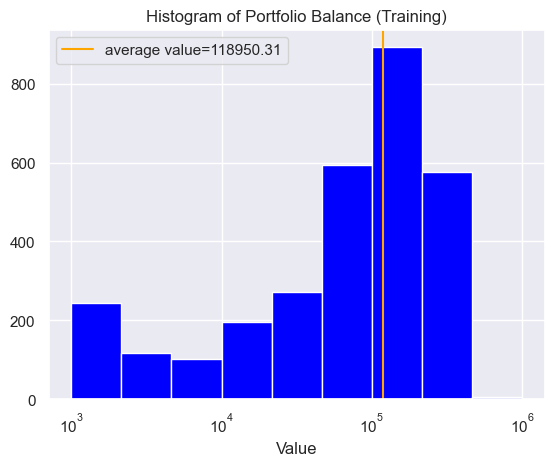

In [76]:
# inspecting the results
# train_ is the portfolio balance at the end of each epoch

print(f"The max value of {max(train_)}, average value of {sum(train_)/len(train_)}, min value of {min(train_)}")
plt.hist(train_, bins=np.logspace(start=np.log10(1000), stop=np.log10(1000000), num=10), color='blue')
plt.axvline(x = (sum(train_)/len(train_)), color = 'orange', label = 'average value=118950.31')
plt.title("Histogram of Portfolio Balance (Training)")
plt.gca().set_xscale("log")
plt.xlabel('Value')

plt.legend(loc='upper left')
plt.show()


In [15]:
# testing the trained model
test, test_ = trader_bot('test', epochs=5, initial_cash=10000)

  1%|▋                                                                                                                    | 12/2000 [00:00<00:58, 33.89it/s]

episode: 1/2000, episode end value: 8284.38, duration: 0:00:00.028384
episode: 2/2000, episode end value: 1000.00, duration: 0:00:00.028363
episode: 3/2000, episode end value: 7482.34, duration: 0:00:00.027058
episode: 4/2000, episode end value: 1000.00, duration: 0:00:00.026494
episode: 5/2000, episode end value: 2956.90, duration: 0:00:00.030884
episode: 6/2000, episode end value: 4994.12, duration: 0:00:00.027898
episode: 7/2000, episode end value: 1000.00, duration: 0:00:00.029948
episode: 8/2000, episode end value: 1000.00, duration: 0:00:00.030820
episode: 9/2000, episode end value: 1000.00, duration: 0:00:00.031211
episode: 10/2000, episode end value: 1000.00, duration: 0:00:00.027895
episode: 11/2000, episode end value: 3525.82, duration: 0:00:00.028067
episode: 12/2000, episode end value: 1777.34, duration: 0:00:00.031216


  1%|█▏                                                                                                                   | 20/2000 [00:00<00:59, 33.13it/s]

episode: 13/2000, episode end value: 1000.00, duration: 0:00:00.029372
episode: 14/2000, episode end value: 3986.88, duration: 0:00:00.027576
episode: 15/2000, episode end value: 7435.60, duration: 0:00:00.028063
episode: 16/2000, episode end value: 3730.46, duration: 0:00:00.027449
episode: 17/2000, episode end value: 3230.68, duration: 0:00:00.031293
episode: 18/2000, episode end value: 1000.00, duration: 0:00:00.030444
episode: 19/2000, episode end value: 2430.94, duration: 0:00:00.032794
episode: 20/2000, episode end value: 1000.00, duration: 0:00:00.032787
episode: 21/2000, episode end value: 1667.68, duration: 0:00:00.029104
episode: 22/2000, episode end value: 10284.44, duration: 0:00:00.029759


  2%|█▊                                                                                                                   | 32/2000 [00:00<01:00, 32.53it/s]

episode: 23/2000, episode end value: 7482.34, duration: 0:00:00.029791
episode: 24/2000, episode end value: 9370.96, duration: 0:00:00.033061
episode: 25/2000, episode end value: 1000.00, duration: 0:00:00.029543
episode: 26/2000, episode end value: 12047.88, duration: 0:00:00.030775
episode: 27/2000, episode end value: 6450.72, duration: 0:00:00.030429
episode: 28/2000, episode end value: 5244.02, duration: 0:00:00.031002
episode: 29/2000, episode end value: 11166.16, duration: 0:00:00.032001
episode: 30/2000, episode end value: 3457.08, duration: 0:00:00.031336
episode: 31/2000, episode end value: 1000.00, duration: 0:00:00.031300
episode: 32/2000, episode end value: 2405.00, duration: 0:00:00.029803


  2%|██▌                                                                                                                  | 44/2000 [00:01<01:01, 31.59it/s]

episode: 33/2000, episode end value: 1000.00, duration: 0:00:00.036029
episode: 34/2000, episode end value: 1000.00, duration: 0:00:00.030459
episode: 35/2000, episode end value: 1000.00, duration: 0:00:00.029043
episode: 36/2000, episode end value: 1000.00, duration: 0:00:00.035889
episode: 37/2000, episode end value: 1000.00, duration: 0:00:00.035562
episode: 38/2000, episode end value: 4994.12, duration: 0:00:00.032235
episode: 39/2000, episode end value: 1000.00, duration: 0:00:00.031871
episode: 40/2000, episode end value: 1000.00, duration: 0:00:00.032066
episode: 41/2000, episode end value: 1000.00, duration: 0:00:00.031445
episode: 42/2000, episode end value: 31495.30, duration: 0:00:00.029207
episode: 43/2000, episode end value: 1000.00, duration: 0:00:00.030087
episode: 44/2000, episode end value: 1000.00, duration: 0:00:00.031703


  3%|███                                                                                                                  | 52/2000 [00:01<01:00, 32.25it/s]

episode: 45/2000, episode end value: 1000.00, duration: 0:00:00.028622
episode: 46/2000, episode end value: 1000.00, duration: 0:00:00.028660
episode: 47/2000, episode end value: 1000.00, duration: 0:00:00.029334
episode: 48/2000, episode end value: 1000.00, duration: 0:00:00.027647
episode: 49/2000, episode end value: 32327.44, duration: 0:00:00.031355
episode: 50/2000, episode end value: 6101.76, duration: 0:00:00.031874
episode: 51/2000, episode end value: 6599.86, duration: 0:00:00.031588
episode: 52/2000, episode end value: 1000.00, duration: 0:00:00.030046
episode: 53/2000, episode end value: 3227.40, duration: 0:00:00.030351
episode: 54/2000, episode end value: 1000.00, duration: 0:00:00.035226
episode: 55/2000, episode end value: 1000.00, duration: 0:00:00.031918


  3%|███▋                                                                                                                 | 64/2000 [00:01<01:00, 31.78it/s]

episode: 56/2000, episode end value: 4230.04, duration: 0:00:00.030982
episode: 57/2000, episode end value: 1000.00, duration: 0:00:00.033239
episode: 58/2000, episode end value: 4343.22, duration: 0:00:00.030202
episode: 59/2000, episode end value: 1000.00, duration: 0:00:00.030411
episode: 60/2000, episode end value: 1000.00, duration: 0:00:00.030384
episode: 61/2000, episode end value: 5509.38, duration: 0:00:00.031628
episode: 62/2000, episode end value: 6553.88, duration: 0:00:00.032533
episode: 63/2000, episode end value: 1000.00, duration: 0:00:00.031018
episode: 64/2000, episode end value: 9452.30, duration: 0:00:00.030358
episode: 65/2000, episode end value: 7639.28, duration: 0:00:00.030943
episode: 66/2000, episode end value: 6807.14, duration: 0:00:00.030755
episode: 67/2000, episode end value: 1000.00, duration: 0:00:00.030893
episode: 68/2000, episode end value: 4036.20, duration: 0:00:00.029469


  4%|████▍                                                                                                                | 76/2000 [00:02<00:58, 32.78it/s]

episode: 69/2000, episode end value: 1000.00, duration: 0:00:00.031406
episode: 70/2000, episode end value: 4238.86, duration: 0:00:00.032272
episode: 71/2000, episode end value: 3230.68, duration: 0:00:00.028442
episode: 72/2000, episode end value: 1000.00, duration: 0:00:00.031863
episode: 73/2000, episode end value: 7639.28, duration: 0:00:00.028660
episode: 74/2000, episode end value: 1000.00, duration: 0:00:00.028278
episode: 75/2000, episode end value: 1000.00, duration: 0:00:00.028852
episode: 76/2000, episode end value: 47529.74, duration: 0:00:00.027930
episode: 77/2000, episode end value: 10284.44, duration: 0:00:00.033802


  4%|█████▏                                                                                                               | 88/2000 [00:02<01:00, 31.78it/s]

episode: 78/2000, episode end value: 14742.62, duration: 0:00:00.034095
episode: 79/2000, episode end value: 11166.16, duration: 0:00:00.029874
episode: 80/2000, episode end value: 12097.46, duration: 0:00:00.029317
episode: 81/2000, episode end value: 1000.00, duration: 0:00:00.032179
episode: 82/2000, episode end value: 7495.42, duration: 0:00:00.030250
episode: 83/2000, episode end value: 6725.80, duration: 0:00:00.037116
episode: 84/2000, episode end value: 1000.00, duration: 0:00:00.028806
episode: 85/2000, episode end value: 9326.52, duration: 0:00:00.030366
episode: 86/2000, episode end value: 3232.96, duration: 0:00:00.031462
episode: 87/2000, episode end value: 1000.00, duration: 0:00:00.031481
episode: 88/2000, episode end value: 1000.00, duration: 0:00:00.031815


  5%|█████▌                                                                                                               | 96/2000 [00:02<00:59, 31.88it/s]

episode: 89/2000, episode end value: 7688.86, duration: 0:00:00.029423
episode: 90/2000, episode end value: 1000.00, duration: 0:00:00.031420
episode: 91/2000, episode end value: 10047.82, duration: 0:00:00.028537
episode: 92/2000, episode end value: 5875.84, duration: 0:00:00.030464
episode: 93/2000, episode end value: 3230.68, duration: 0:00:00.032733
episode: 94/2000, episode end value: 1000.00, duration: 0:00:00.033044
episode: 95/2000, episode end value: 6725.80, duration: 0:00:00.030778
episode: 96/2000, episode end value: 4920.00, duration: 0:00:00.030483
episode: 97/2000, episode end value: 10284.44, duration: 0:00:00.031469
episode: 98/2000, episode end value: 4439.44, duration: 0:00:00.030447
episode: 99/2000, episode end value: 1000.00, duration: 0:00:00.031162


  5%|██████▎                                                                                                             | 108/2000 [00:03<00:58, 32.58it/s]

episode: 100/2000, episode end value: 12047.88, duration: 0:00:00.028787
episode: 101/2000, episode end value: 8570.58, duration: 0:00:00.033720
episode: 102/2000, episode end value: 1000.00, duration: 0:00:00.029630
episode: 103/2000, episode end value: 1370.36, duration: 0:00:00.029819
episode: 104/2000, episode end value: 2939.64, duration: 0:00:00.028423
episode: 105/2000, episode end value: 1000.00, duration: 0:00:00.028898
episode: 106/2000, episode end value: 1000.00, duration: 0:00:00.029714
episode: 107/2000, episode end value: 6600.62, duration: 0:00:00.028928
episode: 108/2000, episode end value: 1000.00, duration: 0:00:00.031055
episode: 109/2000, episode end value: 3283.76, duration: 0:00:00.034307


  6%|███████▏                                                                                                            | 124/2000 [00:03<00:58, 31.86it/s]

episode: 110/2000, episode end value: 6600.62, duration: 0:00:00.032118
episode: 111/2000, episode end value: 1000.00, duration: 0:00:00.029976
episode: 112/2000, episode end value: 1000.00, duration: 0:00:00.030448
episode: 113/2000, episode end value: 6757.56, duration: 0:00:00.030106
episode: 114/2000, episode end value: 4890.32, duration: 0:00:00.029392
episode: 115/2000, episode end value: 1000.00, duration: 0:00:00.036751
episode: 116/2000, episode end value: 1000.00, duration: 0:00:00.031377
episode: 117/2000, episode end value: 1000.00, duration: 0:00:00.032706
episode: 118/2000, episode end value: 1000.00, duration: 0:00:00.031137
episode: 119/2000, episode end value: 2481.44, duration: 0:00:00.032376
episode: 120/2000, episode end value: 12772.66, duration: 0:00:00.030229
episode: 121/2000, episode end value: 1000.00, duration: 0:00:00.031434
episode: 122/2000, episode end value: 1000.00, duration: 0:00:00.029896
episode: 123/2000, episode end value: 1000.00, duration: 0:00:0

  7%|███████▋                                                                                                            | 132/2000 [00:04<00:57, 32.29it/s]

episode: 125/2000, episode end value: 27921.12, duration: 0:00:00.030961
episode: 126/2000, episode end value: 34972.60, duration: 0:00:00.030308
episode: 127/2000, episode end value: 11166.16, duration: 0:00:00.029674
episode: 128/2000, episode end value: 2345.68, duration: 0:00:00.029375
episode: 129/2000, episode end value: 1000.00, duration: 0:00:00.031058
episode: 130/2000, episode end value: 2425.86, duration: 0:00:00.029084
episode: 131/2000, episode end value: 6604.74, duration: 0:00:00.031708
episode: 132/2000, episode end value: 3968.62, duration: 0:00:00.030016
episode: 133/2000, episode end value: 9452.30, duration: 0:00:00.029302
episode: 134/2000, episode end value: 1000.00, duration: 0:00:00.031251


  7%|████████▎                                                                                                           | 144/2000 [00:04<00:56, 32.58it/s]

episode: 135/2000, episode end value: 1000.00, duration: 0:00:00.029675
episode: 136/2000, episode end value: 1000.00, duration: 0:00:00.030474
episode: 137/2000, episode end value: 1000.00, duration: 0:00:00.031046
episode: 138/2000, episode end value: 8489.24, duration: 0:00:00.028926
episode: 139/2000, episode end value: 1000.00, duration: 0:00:00.031968
episode: 140/2000, episode end value: 5718.90, duration: 0:00:00.027723
episode: 141/2000, episode end value: 1000.00, duration: 0:00:00.032157
episode: 142/2000, episode end value: 8521.00, duration: 0:00:00.031087
episode: 143/2000, episode end value: 5474.34, duration: 0:00:00.028625
episode: 144/2000, episode end value: 1000.00, duration: 0:00:00.029963
episode: 145/2000, episode end value: 1000.00, duration: 0:00:00.029878
episode: 146/2000, episode end value: 1000.00, duration: 0:00:00.029702


  8%|████████▊                                                                                                           | 152/2000 [00:04<00:57, 31.97it/s]

episode: 147/2000, episode end value: 1000.00, duration: 0:00:00.051925
episode: 148/2000, episode end value: 6326.46, duration: 0:00:00.035372
episode: 149/2000, episode end value: 1000.00, duration: 0:00:00.033603
episode: 150/2000, episode end value: 6866.54, duration: 0:00:00.031044
episode: 151/2000, episode end value: 9402.72, duration: 0:00:00.023964
episode: 152/2000, episode end value: 2311.02, duration: 0:00:00.023412
episode: 153/2000, episode end value: 2173.78, duration: 0:00:00.027669
episode: 154/2000, episode end value: 5248.64, duration: 0:00:00.029033
episode: 155/2000, episode end value: 1000.00, duration: 0:00:00.027905


  8%|█████████▌                                                                                                          | 164/2000 [00:05<00:54, 33.41it/s]

episode: 156/2000, episode end value: 1000.00, duration: 0:00:00.029179
episode: 157/2000, episode end value: 3968.62, duration: 0:00:00.029076
episode: 158/2000, episode end value: 5875.84, duration: 0:00:00.030341
episode: 159/2000, episode end value: 8900.68, duration: 0:00:00.028255
episode: 160/2000, episode end value: 10284.44, duration: 0:00:00.029923
episode: 161/2000, episode end value: 7482.34, duration: 0:00:00.029365
episode: 162/2000, episode end value: 3781.92, duration: 0:00:00.028137
episode: 163/2000, episode end value: 5844.08, duration: 0:00:00.027234
episode: 164/2000, episode end value: 1000.00, duration: 0:00:00.031085


  9%|██████████▏                                                                                                         | 176/2000 [00:05<00:54, 33.55it/s]

episode: 165/2000, episode end value: 5043.70, duration: 0:00:00.030616
episode: 166/2000, episode end value: 10047.82, duration: 0:00:00.027672
episode: 167/2000, episode end value: 10929.54, duration: 0:00:00.029007
episode: 168/2000, episode end value: 1763.44, duration: 0:00:00.027692
episode: 169/2000, episode end value: 6600.62, duration: 0:00:00.029376
episode: 170/2000, episode end value: 7688.86, duration: 0:00:00.028130
episode: 171/2000, episode end value: 3968.62, duration: 0:00:00.026822
episode: 172/2000, episode end value: 1000.00, duration: 0:00:00.028134
episode: 173/2000, episode end value: 2826.96, duration: 0:00:00.032897
episode: 174/2000, episode end value: 1561.64, duration: 0:00:00.033063
episode: 175/2000, episode end value: 10284.44, duration: 0:00:00.028620
episode: 176/2000, episode end value: 1000.00, duration: 0:00:00.028587


  9%|██████████▉                                                                                                         | 188/2000 [00:05<00:53, 33.74it/s]

episode: 177/2000, episode end value: 1672.18, duration: 0:00:00.029162
episode: 178/2000, episode end value: 1000.00, duration: 0:00:00.028556
episode: 179/2000, episode end value: 3134.48, duration: 0:00:00.027254
episode: 180/2000, episode end value: 3364.10, duration: 0:00:00.027717
episode: 181/2000, episode end value: 1000.00, duration: 0:00:00.030207
episode: 182/2000, episode end value: 5875.84, duration: 0:00:00.028317
episode: 183/2000, episode end value: 1000.00, duration: 0:00:00.026894
episode: 184/2000, episode end value: 9326.52, duration: 0:00:00.028049
episode: 185/2000, episode end value: 1700.46, duration: 0:00:00.032806
episode: 186/2000, episode end value: 8011.32, duration: 0:00:00.029603
episode: 187/2000, episode end value: 8376.04, duration: 0:00:00.029891
episode: 188/2000, episode end value: 6553.88, duration: 0:00:00.029717


 10%|███████████▌                                                                                                        | 200/2000 [00:06<00:54, 33.04it/s]

episode: 189/2000, episode end value: 8444.80, duration: 0:00:00.029560
episode: 190/2000, episode end value: 1000.00, duration: 0:00:00.029043
episode: 191/2000, episode end value: 1000.00, duration: 0:00:00.031388
episode: 192/2000, episode end value: 1000.00, duration: 0:00:00.032095
episode: 193/2000, episode end value: 1000.00, duration: 0:00:00.030544
episode: 194/2000, episode end value: 6757.56, duration: 0:00:00.032586
episode: 195/2000, episode end value: 6681.36, duration: 0:00:00.029882
episode: 196/2000, episode end value: 3603.42, duration: 0:00:00.030069
episode: 197/2000, episode end value: 11166.16, duration: 0:00:00.028825
episode: 198/2000, episode end value: 4994.12, duration: 0:00:00.030785
episode: 199/2000, episode end value: 1700.46, duration: 0:00:00.029702
episode: 200/2000, episode end value: 1000.00, duration: 0:00:00.030326


 11%|████████████▎                                                                                                       | 212/2000 [00:06<00:54, 32.95it/s]

episode: 201/2000, episode end value: 2562.02, duration: 0:00:00.030396
episode: 202/2000, episode end value: 4837.18, duration: 0:00:00.029803
episode: 203/2000, episode end value: 7639.28, duration: 0:00:00.028877
episode: 204/2000, episode end value: 10366.42, duration: 0:00:00.031673
episode: 205/2000, episode end value: 5818.60, duration: 0:00:00.035027
episode: 206/2000, episode end value: 47316.68, duration: 0:00:00.029801
episode: 207/2000, episode end value: 1000.00, duration: 0:00:00.032775
episode: 208/2000, episode end value: 4114.68, duration: 0:00:00.030808
episode: 209/2000, episode end value: 1000.00, duration: 0:00:00.029088
episode: 210/2000, episode end value: 6902.10, duration: 0:00:00.029249
episode: 211/2000, episode end value: 2364.62, duration: 0:00:00.028310
episode: 212/2000, episode end value: 1000.00, duration: 0:00:00.027775


 11%|████████████▊                                                                                                       | 220/2000 [00:06<00:54, 32.44it/s]

episode: 213/2000, episode end value: 1000.00, duration: 0:00:00.030982
episode: 214/2000, episode end value: 7688.86, duration: 0:00:00.030625
episode: 215/2000, episode end value: 9452.30, duration: 0:00:00.029097
episode: 216/2000, episode end value: 10284.44, duration: 0:00:00.029376
episode: 217/2000, episode end value: 20892.95, duration: 0:00:00.032037
episode: 218/2000, episode end value: 24822.82, duration: 0:00:00.034892
episode: 219/2000, episode end value: 3535.16, duration: 0:00:00.029931
episode: 220/2000, episode end value: 6600.62, duration: 0:00:00.029476
episode: 221/2000, episode end value: 8570.58, duration: 0:00:00.032019
episode: 222/2000, episode end value: 8284.38, duration: 0:00:00.028917


 12%|█████████████▍                                                                                                      | 232/2000 [00:07<00:54, 32.27it/s]

episode: 223/2000, episode end value: 3312.66, duration: 0:00:00.032274
episode: 224/2000, episode end value: 3974.96, duration: 0:00:00.032648
episode: 225/2000, episode end value: 17387.78, duration: 0:00:00.034879
episode: 226/2000, episode end value: 1000.00, duration: 0:00:00.031361
episode: 227/2000, episode end value: 11166.16, duration: 0:00:00.031455
episode: 228/2000, episode end value: 7607.52, duration: 0:00:00.031003
episode: 229/2000, episode end value: 22678.10, duration: 0:00:00.028565
episode: 230/2000, episode end value: 11890.94, duration: 0:00:00.028957
episode: 231/2000, episode end value: 1000.00, duration: 0:00:00.031339
episode: 232/2000, episode end value: 7563.08, duration: 0:00:00.029215
episode: 233/2000, episode end value: 23944.52, duration: 0:00:00.030780
episode: 234/2000, episode end value: 6725.80, duration: 0:00:00.030515
episode: 235/2000, episode end value: 1000.00, duration: 0:00:00.029780
episode: 236/2000, episode end value: 5043.70, duration: 0:

 12%|██████████████▏                                                                                                     | 244/2000 [00:07<00:53, 32.72it/s]

episode: 237/2000, episode end value: 5043.70, duration: 0:00:00.032168
episode: 238/2000, episode end value: 1000.00, duration: 0:00:00.031036
episode: 239/2000, episode end value: 1000.00, duration: 0:00:00.036768
episode: 240/2000, episode end value: 2350.46, duration: 0:00:00.032741
episode: 241/2000, episode end value: 5043.70, duration: 0:00:00.028428
episode: 242/2000, episode end value: 1000.00, duration: 0:00:00.027854
episode: 243/2000, episode end value: 1000.00, duration: 0:00:00.027282
episode: 244/2000, episode end value: 9261.72, duration: 0:00:00.028122
episode: 245/2000, episode end value: 1000.00, duration: 0:00:00.029252
episode: 246/2000, episode end value: 3968.62, duration: 0:00:00.027968
episode: 247/2000, episode end value: 6298.82, duration: 0:00:00.027775


 13%|██████████████▌                                                                                                     | 252/2000 [00:07<00:52, 33.20it/s]

episode: 248/2000, episode end value: 9452.30, duration: 0:00:00.028272
episode: 249/2000, episode end value: 7607.52, duration: 0:00:00.036951
episode: 250/2000, episode end value: 4630.84, duration: 0:00:00.027833
episode: 251/2000, episode end value: 1000.00, duration: 0:00:00.027566
episode: 252/2000, episode end value: 4990.84, duration: 0:00:00.028351
episode: 253/2000, episode end value: 1000.00, duration: 0:00:00.030166
episode: 254/2000, episode end value: 1000.00, duration: 0:00:00.029059


 13%|███████████████▎                                                                                                    | 264/2000 [00:08<00:51, 33.77it/s]

episode: 255/2000, episode end value: 5417.22, duration: 0:00:00.029861
episode: 256/2000, episode end value: 1549.22, duration: 0:00:00.032402
episode: 257/2000, episode end value: 10127.50, duration: 0:00:00.029826
episode: 258/2000, episode end value: 1000.00, duration: 0:00:00.029571
episode: 259/2000, episode end value: 1000.00, duration: 0:00:00.029859
episode: 260/2000, episode end value: 9370.96, duration: 0:00:00.027465
episode: 261/2000, episode end value: 7563.08, duration: 0:00:00.027328
episode: 262/2000, episode end value: 1000.00, duration: 0:00:00.029746
episode: 263/2000, episode end value: 1000.00, duration: 0:00:00.027523
episode: 264/2000, episode end value: 1000.00, duration: 0:00:00.028161
episode: 265/2000, episode end value: 5844.08, duration: 0:00:00.029007
episode: 266/2000, episode end value: 7323.78, duration: 0:00:00.028486


 14%|███████████████▊                                                                                                    | 272/2000 [00:08<00:50, 34.36it/s]

episode: 267/2000, episode end value: 3195.10, duration: 0:00:00.029190
episode: 268/2000, episode end value: 8570.58, duration: 0:00:00.026978
episode: 269/2000, episode end value: 1000.00, duration: 0:00:00.030978
episode: 270/2000, episode end value: 4385.36, duration: 0:00:00.029777
episode: 271/2000, episode end value: 6725.80, duration: 0:00:00.024562
episode: 272/2000, episode end value: 1000.00, duration: 0:00:00.027878
episode: 273/2000, episode end value: 6681.36, duration: 0:00:00.033558
episode: 274/2000, episode end value: 1000.00, duration: 0:00:00.027360
episode: 275/2000, episode end value: 8521.00, duration: 0:00:00.023890
episode: 276/2000, episode end value: 20156.08, duration: 0:00:00.026685


 14%|████████████████▏                                                                                                   | 280/2000 [00:08<00:52, 32.69it/s]

episode: 277/2000, episode end value: 8521.00, duration: 0:00:00.037792
episode: 278/2000, episode end value: 3154.48, duration: 0:00:00.038171
episode: 279/2000, episode end value: 6600.62, duration: 0:00:00.032278
episode: 280/2000, episode end value: 1000.00, duration: 0:00:00.029138
episode: 281/2000, episode end value: 1000.00, duration: 0:00:00.031228
episode: 282/2000, episode end value: 2811.20, duration: 0:00:00.027853
episode: 283/2000, episode end value: 6600.62, duration: 0:00:00.026543


 14%|████████████████▋                                                                                                   | 288/2000 [00:08<00:51, 33.22it/s]

episode: 284/2000, episode end value: 12047.88, duration: 0:00:00.029712
episode: 285/2000, episode end value: 5718.90, duration: 0:00:00.030659
episode: 286/2000, episode end value: 4706.42, duration: 0:00:00.029585
episode: 287/2000, episode end value: 7607.52, duration: 0:00:00.029909
episode: 288/2000, episode end value: 3628.12, duration: 0:00:00.029212
episode: 289/2000, episode end value: 5380.76, duration: 0:00:00.030220
episode: 290/2000, episode end value: 7688.86, duration: 0:00:00.030083
episode: 291/2000, episode end value: 5718.90, duration: 0:00:00.029637
episode: 292/2000, episode end value: 1000.00, duration: 0:00:00.028700


 15%|█████████████████▋                                                                                                  | 304/2000 [00:09<00:50, 33.63it/s]

episode: 293/2000, episode end value: 1000.00, duration: 0:00:00.032078
episode: 294/2000, episode end value: 5606.24, duration: 0:00:00.030366
episode: 295/2000, episode end value: 6600.62, duration: 0:00:00.029057
episode: 296/2000, episode end value: 4423.46, duration: 0:00:00.028955
episode: 297/2000, episode end value: 1000.00, duration: 0:00:00.028737
episode: 298/2000, episode end value: 1000.00, duration: 0:00:00.027828
episode: 299/2000, episode end value: 1000.00, duration: 0:00:00.030200
episode: 300/2000, episode end value: 1000.00, duration: 0:00:00.029205
episode: 301/2000, episode end value: 7607.52, duration: 0:00:00.029170
episode: 302/2000, episode end value: 4825.22, duration: 0:00:00.028136
episode: 303/2000, episode end value: 7049.74, duration: 0:00:00.029506
episode: 304/2000, episode end value: 2430.94, duration: 0:00:00.028931


 16%|██████████████████▎                                                                                                 | 316/2000 [00:09<00:50, 33.40it/s]

episode: 305/2000, episode end value: 1000.00, duration: 0:00:00.030092
episode: 306/2000, episode end value: 4790.44, duration: 0:00:00.032749
episode: 307/2000, episode end value: 17634.40, duration: 0:00:00.028320
episode: 308/2000, episode end value: 1000.00, duration: 0:00:00.029623
episode: 309/2000, episode end value: 5718.14, duration: 0:00:00.030674
episode: 310/2000, episode end value: 2172.57, duration: 0:00:00.028855
episode: 311/2000, episode end value: 1000.00, duration: 0:00:00.029217
episode: 312/2000, episode end value: 1000.00, duration: 0:00:00.029090
episode: 313/2000, episode end value: 1000.00, duration: 0:00:00.033216
episode: 314/2000, episode end value: 6212.26, duration: 0:00:00.028346
episode: 315/2000, episode end value: 3195.10, duration: 0:00:00.028263
episode: 316/2000, episode end value: 5925.42, duration: 0:00:00.029484


 16%|██████████████████▊                                                                                                 | 324/2000 [00:09<00:51, 32.74it/s]

episode: 317/2000, episode end value: 5695.24, duration: 0:00:00.027751
episode: 318/2000, episode end value: 4019.82, duration: 0:00:00.030418
episode: 319/2000, episode end value: 1000.00, duration: 0:00:00.030719
episode: 320/2000, episode end value: 1000.00, duration: 0:00:00.029115
episode: 321/2000, episode end value: 7076.62, duration: 0:00:00.032925
episode: 322/2000, episode end value: 11166.16, duration: 0:00:00.030659
episode: 323/2000, episode end value: 1000.00, duration: 0:00:00.031242
episode: 324/2000, episode end value: 1000.00, duration: 0:00:00.032106
episode: 325/2000, episode end value: 1000.00, duration: 0:00:00.030545
episode: 326/2000, episode end value: 1681.26, duration: 0:00:00.030664
episode: 327/2000, episode end value: 3930.14, duration: 0:00:00.032287


 17%|███████████████████▎                                                                                                | 332/2000 [00:10<00:53, 31.10it/s]

episode: 328/2000, episode end value: 1000.00, duration: 0:00:00.048414
episode: 329/2000, episode end value: 1729.66, duration: 0:00:00.040060
episode: 330/2000, episode end value: 7402.66, duration: 0:00:00.030842
episode: 331/2000, episode end value: 2481.44, duration: 0:00:00.030227
episode: 332/2000, episode end value: 1000.00, duration: 0:00:00.027179
episode: 333/2000, episode end value: 1000.00, duration: 0:00:00.028946
episode: 334/2000, episode end value: 6681.36, duration: 0:00:00.028967
episode: 335/2000, episode end value: 1000.00, duration: 0:00:00.031615


 17%|███████████████████▋                                                                                                | 340/2000 [00:10<00:52, 31.92it/s]

episode: 336/2000, episode end value: 3613.24, duration: 0:00:00.030298
episode: 337/2000, episode end value: 1000.00, duration: 0:00:00.031896
episode: 338/2000, episode end value: 1000.00, duration: 0:00:00.030055
episode: 339/2000, episode end value: 1000.00, duration: 0:00:00.031192
episode: 340/2000, episode end value: 1000.00, duration: 0:00:00.029291
episode: 341/2000, episode end value: 1000.00, duration: 0:00:00.029144
episode: 342/2000, episode end value: 1000.00, duration: 0:00:00.029085


 18%|████████████████████▍                                                                                               | 352/2000 [00:10<00:50, 32.36it/s]

episode: 343/2000, episode end value: 8521.00, duration: 0:00:00.033336
episode: 344/2000, episode end value: 1000.00, duration: 0:00:00.032611
episode: 345/2000, episode end value: 1000.00, duration: 0:00:00.028725
episode: 346/2000, episode end value: 7772.74, duration: 0:00:00.031355
episode: 347/2000, episode end value: 1000.00, duration: 0:00:00.030334
episode: 348/2000, episode end value: 1000.00, duration: 0:00:00.032011
episode: 349/2000, episode end value: 1000.00, duration: 0:00:00.030127
episode: 350/2000, episode end value: 1000.00, duration: 0:00:00.030402
episode: 351/2000, episode end value: 1000.00, duration: 0:00:00.029724
episode: 352/2000, episode end value: 1000.00, duration: 0:00:00.030067


 18%|████████████████████▉                                                                                               | 360/2000 [00:11<00:55, 29.78it/s]

episode: 353/2000, episode end value: 3732.42, duration: 0:00:00.029799
episode: 354/2000, episode end value: 1000.00, duration: 0:00:00.030325
episode: 355/2000, episode end value: 8364.06, duration: 0:00:00.032123
episode: 356/2000, episode end value: 1000.00, duration: 0:00:00.031985
episode: 357/2000, episode end value: 1000.00, duration: 0:00:00.056677
episode: 358/2000, episode end value: 1000.00, duration: 0:00:00.035459
episode: 359/2000, episode end value: 4459.26, duration: 0:00:00.034603
episode: 360/2000, episode end value: 17634.40, duration: 0:00:00.030234
episode: 361/2000, episode end value: 7418.62, duration: 0:00:00.030047
episode: 362/2000, episode end value: 5589.38, duration: 0:00:00.028803
episode: 363/2000, episode end value: 1599.72, duration: 0:00:00.030314
episode: 364/2000, episode end value: 4684.38, duration: 0:00:00.030275


 19%|█████████████████████▌                                                                                              | 372/2000 [00:11<00:51, 31.48it/s]

episode: 365/2000, episode end value: 1000.00, duration: 0:00:00.029731
episode: 366/2000, episode end value: 6182.56, duration: 0:00:00.030153
episode: 367/2000, episode end value: 1000.00, duration: 0:00:00.029693
episode: 368/2000, episode end value: 6687.34, duration: 0:00:00.030935
episode: 369/2000, episode end value: 1000.00, duration: 0:00:00.030513
episode: 370/2000, episode end value: 2299.90, duration: 0:00:00.034036
episode: 371/2000, episode end value: 1000.00, duration: 0:00:00.030191
episode: 372/2000, episode end value: 3593.54, duration: 0:00:00.029917
episode: 373/2000, episode end value: 1000.00, duration: 0:00:00.030110
episode: 374/2000, episode end value: 7053.76, duration: 0:00:00.031087
episode: 375/2000, episode end value: 1000.00, duration: 0:00:00.028748
episode: 376/2000, episode end value: 3986.88, duration: 0:00:00.029711


 19%|██████████████████████▎                                                                                             | 384/2000 [00:11<00:49, 32.45it/s]

episode: 377/2000, episode end value: 1000.00, duration: 0:00:00.031517
episode: 378/2000, episode end value: 1000.00, duration: 0:00:00.030745
episode: 379/2000, episode end value: 1000.00, duration: 0:00:00.027855
episode: 380/2000, episode end value: 3355.04, duration: 0:00:00.028890
episode: 381/2000, episode end value: 7688.86, duration: 0:00:00.029958
episode: 382/2000, episode end value: 5731.66, duration: 0:00:00.030988
episode: 383/2000, episode end value: 1000.00, duration: 0:00:00.030605
episode: 384/2000, episode end value: 9326.52, duration: 0:00:00.028976


 20%|██████████████████████▉                                                                                             | 396/2000 [00:12<00:50, 31.64it/s]

episode: 385/2000, episode end value: 8599.98, duration: 0:00:00.030250
episode: 386/2000, episode end value: 7402.66, duration: 0:00:00.030567
episode: 387/2000, episode end value: 1000.00, duration: 0:00:00.030054
episode: 388/2000, episode end value: 9402.72, duration: 0:00:00.033882
episode: 389/2000, episode end value: 1000.00, duration: 0:00:00.032253
episode: 390/2000, episode end value: 11166.16, duration: 0:00:00.031156
episode: 391/2000, episode end value: 1000.00, duration: 0:00:00.030905
episode: 392/2000, episode end value: 8444.80, duration: 0:00:00.037595
episode: 393/2000, episode end value: 1000.00, duration: 0:00:00.032907
episode: 394/2000, episode end value: 1000.00, duration: 0:00:00.031823
episode: 395/2000, episode end value: 1000.00, duration: 0:00:00.029977
episode: 396/2000, episode end value: 1681.26, duration: 0:00:00.030152


 20%|███████████████████████▍                                                                                            | 404/2000 [00:12<00:51, 31.15it/s]

episode: 397/2000, episode end value: 1000.00, duration: 0:00:00.031201
episode: 398/2000, episode end value: 4434.88, duration: 0:00:00.039914
episode: 399/2000, episode end value: 1000.00, duration: 0:00:00.034628
episode: 400/2000, episode end value: 6600.62, duration: 0:00:00.034061
episode: 401/2000, episode end value: 1000.00, duration: 0:00:00.032003
episode: 402/2000, episode end value: 1000.00, duration: 0:00:00.030512
episode: 403/2000, episode end value: 1000.00, duration: 0:00:00.030711
episode: 404/2000, episode end value: 1000.00, duration: 0:00:00.028788


 21%|████████████████████████▏                                                                                           | 416/2000 [00:12<00:48, 32.91it/s]

episode: 405/2000, episode end value: 1000.00, duration: 0:00:00.028416
episode: 406/2000, episode end value: 11166.16, duration: 0:00:00.027309
episode: 407/2000, episode end value: 1000.00, duration: 0:00:00.027256
episode: 408/2000, episode end value: 1000.00, duration: 0:00:00.029293
episode: 409/2000, episode end value: 1000.00, duration: 0:00:00.030203
episode: 410/2000, episode end value: 1000.00, duration: 0:00:00.029191
episode: 411/2000, episode end value: 1461.84, duration: 0:00:00.029524
episode: 412/2000, episode end value: 1000.00, duration: 0:00:00.031904
episode: 413/2000, episode end value: 1000.00, duration: 0:00:00.029258
episode: 414/2000, episode end value: 1000.00, duration: 0:00:00.028535
episode: 415/2000, episode end value: 1000.00, duration: 0:00:00.029422
episode: 416/2000, episode end value: 1000.00, duration: 0:00:00.029182


 21%|████████████████████████▊                                                                                           | 428/2000 [00:13<00:47, 33.06it/s]

episode: 417/2000, episode end value: 4494.32, duration: 0:00:00.031287
episode: 418/2000, episode end value: 1000.00, duration: 0:00:00.029868
episode: 419/2000, episode end value: 7563.08, duration: 0:00:00.029800
episode: 420/2000, episode end value: 10127.50, duration: 0:00:00.030205
episode: 421/2000, episode end value: 7913.22, duration: 0:00:00.040204
episode: 422/2000, episode end value: 7482.34, duration: 0:00:00.028480
episode: 423/2000, episode end value: 3232.96, duration: 0:00:00.028630
episode: 424/2000, episode end value: 1000.00, duration: 0:00:00.027678
episode: 425/2000, episode end value: 1000.00, duration: 0:00:00.031015
episode: 426/2000, episode end value: 1000.00, duration: 0:00:00.028871
episode: 427/2000, episode end value: 7607.52, duration: 0:00:00.027105
episode: 428/2000, episode end value: 4746.46, duration: 0:00:00.028264


 22%|█████████████████████████▌                                                                                          | 440/2000 [00:13<00:46, 33.55it/s]

episode: 429/2000, episode end value: 4845.12, duration: 0:00:00.029599
episode: 430/2000, episode end value: 1000.00, duration: 0:00:00.028320
episode: 431/2000, episode end value: 4109.12, duration: 0:00:00.027000
episode: 432/2000, episode end value: 5718.90, duration: 0:00:00.027562
episode: 433/2000, episode end value: 1000.00, duration: 0:00:00.030304
episode: 434/2000, episode end value: 6725.80, duration: 0:00:00.028911
episode: 435/2000, episode end value: 3232.96, duration: 0:00:00.029829
episode: 436/2000, episode end value: 10127.50, duration: 0:00:00.030989
episode: 437/2000, episode end value: 1000.00, duration: 0:00:00.031523
episode: 438/2000, episode end value: 2405.00, duration: 0:00:00.029209
episode: 439/2000, episode end value: 1000.00, duration: 0:00:00.030193
episode: 440/2000, episode end value: 1000.00, duration: 0:00:00.026646


 23%|██████████████████████████▏                                                                                         | 452/2000 [00:13<00:46, 33.49it/s]

episode: 441/2000, episode end value: 9326.52, duration: 0:00:00.031602
episode: 442/2000, episode end value: 5875.84, duration: 0:00:00.031492
episode: 443/2000, episode end value: 1000.00, duration: 0:00:00.028664
episode: 444/2000, episode end value: 2496.58, duration: 0:00:00.029977
episode: 445/2000, episode end value: 6807.14, duration: 0:00:00.028328
episode: 446/2000, episode end value: 1000.00, duration: 0:00:00.030008
episode: 447/2000, episode end value: 11166.16, duration: 0:00:00.031332
episode: 448/2000, episode end value: 1000.00, duration: 0:00:00.030172
episode: 449/2000, episode end value: 5365.70, duration: 0:00:00.030096
episode: 450/2000, episode end value: 1000.00, duration: 0:00:00.028913
episode: 451/2000, episode end value: 1000.00, duration: 0:00:00.029497
episode: 452/2000, episode end value: 4746.46, duration: 0:00:00.027616


 23%|██████████████████████████▋                                                                                         | 460/2000 [00:14<00:47, 32.54it/s]

episode: 453/2000, episode end value: 1000.00, duration: 0:00:00.030735
episode: 454/2000, episode end value: 10284.44, duration: 0:00:00.030084
episode: 455/2000, episode end value: 1941.54, duration: 0:00:00.029997
episode: 456/2000, episode end value: 1000.00, duration: 0:00:00.028516
episode: 457/2000, episode end value: 6600.62, duration: 0:00:00.041878
episode: 458/2000, episode end value: 11890.94, duration: 0:00:00.029586
episode: 459/2000, episode end value: 1000.00, duration: 0:00:00.027475
episode: 460/2000, episode end value: 1000.00, duration: 0:00:00.029436
episode: 461/2000, episode end value: 7042.62, duration: 0:00:00.029566
episode: 462/2000, episode end value: 1000.00, duration: 0:00:00.030176
episode: 463/2000, episode end value: 1000.00, duration: 0:00:00.029137


 24%|███████████████████████████▍                                                                                        | 472/2000 [00:14<00:45, 33.25it/s]

episode: 464/2000, episode end value: 1000.00, duration: 0:00:00.030281
episode: 465/2000, episode end value: 3107.14, duration: 0:00:00.030963
episode: 466/2000, episode end value: 7482.34, duration: 0:00:00.029719
episode: 467/2000, episode end value: 6600.62, duration: 0:00:00.031010
episode: 468/2000, episode end value: 15651.66, duration: 0:00:00.030765
episode: 469/2000, episode end value: 6757.56, duration: 0:00:00.029741
episode: 470/2000, episode end value: 1000.00, duration: 0:00:00.029881
episode: 471/2000, episode end value: 85085.98, duration: 0:00:00.026825
episode: 472/2000, episode end value: 1000.00, duration: 0:00:00.027837


 24%|████████████████████████████                                                                                        | 484/2000 [00:14<00:45, 33.28it/s]

episode: 473/2000, episode end value: 7607.52, duration: 0:00:00.033782
episode: 474/2000, episode end value: 6600.62, duration: 0:00:00.033042
episode: 475/2000, episode end value: 1000.00, duration: 0:00:00.027690
episode: 476/2000, episode end value: 1000.00, duration: 0:00:00.028655
episode: 477/2000, episode end value: 19349.48, duration: 0:00:00.030431
episode: 478/2000, episode end value: 1000.00, duration: 0:00:00.029679
episode: 479/2000, episode end value: 3041.74, duration: 0:00:00.027881
episode: 480/2000, episode end value: 1000.00, duration: 0:00:00.031021
episode: 481/2000, episode end value: 1000.00, duration: 0:00:00.030088
episode: 482/2000, episode end value: 5546.24, duration: 0:00:00.029659
episode: 483/2000, episode end value: 1000.00, duration: 0:00:00.027503
episode: 484/2000, episode end value: 4113.90, duration: 0:00:00.029948


 25%|████████████████████████████▊                                                                                       | 496/2000 [00:15<00:44, 33.56it/s]

episode: 485/2000, episode end value: 3693.94, duration: 0:00:00.028798
episode: 486/2000, episode end value: 4917.92, duration: 0:00:00.028475
episode: 487/2000, episode end value: 8521.00, duration: 0:00:00.028760
episode: 488/2000, episode end value: 10284.44, duration: 0:00:00.028120
episode: 489/2000, episode end value: 1000.00, duration: 0:00:00.033228
episode: 490/2000, episode end value: 1000.00, duration: 0:00:00.031113
episode: 491/2000, episode end value: 7607.52, duration: 0:00:00.028382
episode: 492/2000, episode end value: 1000.00, duration: 0:00:00.029198
episode: 493/2000, episode end value: 29682.28, duration: 0:00:00.030967
episode: 494/2000, episode end value: 1000.00, duration: 0:00:00.027913
episode: 495/2000, episode end value: 12047.88, duration: 0:00:00.028980
episode: 496/2000, episode end value: 1000.00, duration: 0:00:00.027329


 25%|█████████████████████████████▏                                                                                      | 504/2000 [00:15<00:44, 33.40it/s]

episode: 497/2000, episode end value: 1000.00, duration: 0:00:00.030566
episode: 498/2000, episode end value: 1000.00, duration: 0:00:00.026819
episode: 499/2000, episode end value: 5466.20, duration: 0:00:00.030170
episode: 500/2000, episode end value: 6725.80, duration: 0:00:00.028914
episode: 501/2000, episode end value: 1000.00, duration: 0:00:00.032023
episode: 502/2000, episode end value: 1000.00, duration: 0:00:00.030272
episode: 503/2000, episode end value: 9104.10, duration: 0:00:00.027788
episode: 504/2000, episode end value: 11890.94, duration: 0:00:00.031091
episode: 505/2000, episode end value: 8284.38, duration: 0:00:00.030345
episode: 506/2000, episode end value: 1000.00, duration: 0:00:00.029180
episode: 507/2000, episode end value: 7639.28, duration: 0:00:00.027564
episode: 508/2000, episode end value: 8521.00, duration: 0:00:00.027349


 26%|█████████████████████████████▉                                                                                      | 516/2000 [00:15<00:44, 33.34it/s]

episode: 509/2000, episode end value: 7892.60, duration: 0:00:00.032212
episode: 510/2000, episode end value: 1000.00, duration: 0:00:00.029225
episode: 511/2000, episode end value: 1000.00, duration: 0:00:00.030917
episode: 512/2000, episode end value: 7812.76, duration: 0:00:00.030400
episode: 513/2000, episode end value: 8570.58, duration: 0:00:00.031441
episode: 514/2000, episode end value: 4487.10, duration: 0:00:00.030194
episode: 515/2000, episode end value: 7362.32, duration: 0:00:00.026350
episode: 516/2000, episode end value: 1000.00, duration: 0:00:00.030507


 26%|██████████████████████████████▍                                                                                     | 524/2000 [00:16<00:45, 32.55it/s]

episode: 517/2000, episode end value: 1000.00, duration: 0:00:00.035867
episode: 518/2000, episode end value: 7402.66, duration: 0:00:00.029563
episode: 519/2000, episode end value: 1000.00, duration: 0:00:00.030162
episode: 520/2000, episode end value: 9402.72, duration: 0:00:00.029336
episode: 521/2000, episode end value: 17338.20, duration: 0:00:00.032499
episode: 522/2000, episode end value: 1877.56, duration: 0:00:00.031020
episode: 523/2000, episode end value: 1000.00, duration: 0:00:00.027654
episode: 524/2000, episode end value: 8489.24, duration: 0:00:00.032868


 27%|███████████████████████████████                                                                                     | 536/2000 [00:16<00:44, 32.77it/s]

episode: 525/2000, episode end value: 5732.90, duration: 0:00:00.032472
episode: 526/2000, episode end value: 1000.00, duration: 0:00:00.030710
episode: 527/2000, episode end value: 1000.00, duration: 0:00:00.030866
episode: 528/2000, episode end value: 1000.00, duration: 0:00:00.031001
episode: 529/2000, episode end value: 1000.00, duration: 0:00:00.029024
episode: 530/2000, episode end value: 2169.82, duration: 0:00:00.027874
episode: 531/2000, episode end value: 6807.14, duration: 0:00:00.030703
episode: 532/2000, episode end value: 1000.00, duration: 0:00:00.031133
episode: 533/2000, episode end value: 11009.22, duration: 0:00:00.029723
episode: 534/2000, episode end value: 1000.00, duration: 0:00:00.032788
episode: 535/2000, episode end value: 1000.00, duration: 0:00:00.028372
episode: 536/2000, episode end value: 6266.50, duration: 0:00:00.029104


 27%|███████████████████████████████▌                                                                                    | 544/2000 [00:16<00:43, 33.30it/s]

episode: 537/2000, episode end value: 3357.14, duration: 0:00:00.029993
episode: 538/2000, episode end value: 3232.96, duration: 0:00:00.028617
episode: 539/2000, episode end value: 1000.00, duration: 0:00:00.029325
episode: 540/2000, episode end value: 1000.00, duration: 0:00:00.029131
episode: 541/2000, episode end value: 1000.00, duration: 0:00:00.030071
episode: 542/2000, episode end value: 8521.00, duration: 0:00:00.027760
episode: 543/2000, episode end value: 7482.34, duration: 0:00:00.028878
episode: 544/2000, episode end value: 1000.00, duration: 0:00:00.030508
episode: 545/2000, episode end value: 1000.00, duration: 0:00:00.033038
episode: 546/2000, episode end value: 8489.24, duration: 0:00:00.029089


 28%|████████████████████████████████▏                                                                                   | 556/2000 [00:17<00:43, 33.52it/s]

episode: 547/2000, episode end value: 1000.00, duration: 0:00:00.030821
episode: 548/2000, episode end value: 4850.34, duration: 0:00:00.029547
episode: 549/2000, episode end value: 4463.24, duration: 0:00:00.030434
episode: 550/2000, episode end value: 1599.72, duration: 0:00:00.029361
episode: 551/2000, episode end value: 6600.62, duration: 0:00:00.026805
episode: 552/2000, episode end value: 10127.50, duration: 0:00:00.030116
episode: 553/2000, episode end value: 1000.00, duration: 0:00:00.029196
episode: 554/2000, episode end value: 6553.88, duration: 0:00:00.028891
episode: 555/2000, episode end value: 4770.62, duration: 0:00:00.030184
episode: 556/2000, episode end value: 1000.00, duration: 0:00:00.027953


 28%|████████████████████████████████▉                                                                                   | 568/2000 [00:17<00:42, 33.40it/s]

episode: 557/2000, episode end value: 6757.56, duration: 0:00:00.031182
episode: 558/2000, episode end value: 1000.00, duration: 0:00:00.030127
episode: 559/2000, episode end value: 4994.12, duration: 0:00:00.030005
episode: 560/2000, episode end value: 11166.16, duration: 0:00:00.028057
episode: 561/2000, episode end value: 11166.16, duration: 0:00:00.028749
episode: 562/2000, episode end value: 1000.00, duration: 0:00:00.028653
episode: 563/2000, episode end value: 10284.44, duration: 0:00:00.027240
episode: 564/2000, episode end value: 1000.00, duration: 0:00:00.027665
episode: 565/2000, episode end value: 33409.60, duration: 0:00:00.030637
episode: 566/2000, episode end value: 10284.44, duration: 0:00:00.028226
episode: 567/2000, episode end value: 5554.02, duration: 0:00:00.031415
episode: 568/2000, episode end value: 1599.72, duration: 0:00:00.032916


 29%|█████████████████████████████████▍                                                                                  | 576/2000 [00:17<00:42, 33.46it/s]

episode: 569/2000, episode end value: 1000.00, duration: 0:00:00.029731
episode: 570/2000, episode end value: 8444.80, duration: 0:00:00.028381
episode: 571/2000, episode end value: 11166.16, duration: 0:00:00.029383
episode: 572/2000, episode end value: 1000.00, duration: 0:00:00.028837
episode: 573/2000, episode end value: 1000.00, duration: 0:00:00.030670
episode: 574/2000, episode end value: 6315.94, duration: 0:00:00.029834
episode: 575/2000, episode end value: 1000.00, duration: 0:00:00.028771
episode: 576/2000, episode end value: 7655.98, duration: 0:00:00.030044
episode: 577/2000, episode end value: 6266.18, duration: 0:00:00.030257
episode: 578/2000, episode end value: 1000.00, duration: 0:00:00.032443
episode: 579/2000, episode end value: 1000.00, duration: 0:00:00.028976


 29%|██████████████████████████████████                                                                                  | 588/2000 [00:17<00:43, 32.34it/s]

episode: 580/2000, episode end value: 1000.00, duration: 0:00:00.029307
episode: 581/2000, episode end value: 1000.00, duration: 0:00:00.033443
episode: 582/2000, episode end value: 1000.00, duration: 0:00:00.030728
episode: 583/2000, episode end value: 7639.28, duration: 0:00:00.032214
episode: 584/2000, episode end value: 6681.36, duration: 0:00:00.029167
episode: 585/2000, episode end value: 10127.50, duration: 0:00:00.034178
episode: 586/2000, episode end value: 1000.00, duration: 0:00:00.032334
episode: 587/2000, episode end value: 1000.00, duration: 0:00:00.030238
episode: 588/2000, episode end value: 1000.00, duration: 0:00:00.029541


 30%|██████████████████████████████████▌                                                                                 | 596/2000 [00:18<00:42, 32.72it/s]

episode: 589/2000, episode end value: 3235.26, duration: 0:00:00.032045
episode: 590/2000, episode end value: 1000.00, duration: 0:00:00.029089
episode: 591/2000, episode end value: 1000.00, duration: 0:00:00.029376
episode: 592/2000, episode end value: 1000.00, duration: 0:00:00.027917
episode: 593/2000, episode end value: 1000.00, duration: 0:00:00.030235
episode: 594/2000, episode end value: 4538.12, duration: 0:00:00.031337
episode: 595/2000, episode end value: 1000.00, duration: 0:00:00.030154
episode: 596/2000, episode end value: 4144.22, duration: 0:00:00.028822
episode: 597/2000, episode end value: 1000.00, duration: 0:00:00.029932
episode: 598/2000, episode end value: 1000.00, duration: 0:00:00.028401
episode: 599/2000, episode end value: 4837.18, duration: 0:00:00.027489


 30%|███████████████████████████████████                                                                                 | 604/2000 [00:18<00:42, 33.19it/s]

episode: 600/2000, episode end value: 1000.00, duration: 0:00:00.029714
episode: 601/2000, episode end value: 9402.72, duration: 0:00:00.030715
episode: 602/2000, episode end value: 1000.00, duration: 0:00:00.030471
episode: 603/2000, episode end value: 9688.66, duration: 0:00:00.029289
episode: 604/2000, episode end value: 5875.84, duration: 0:00:00.028964
episode: 605/2000, episode end value: 8489.24, duration: 0:00:00.032200
episode: 606/2000, episode end value: 7482.34, duration: 0:00:00.036919


 31%|███████████████████████████████████▍                                                                                | 612/2000 [00:18<00:42, 32.51it/s]

episode: 607/2000, episode end value: 1000.00, duration: 0:00:00.033355
episode: 608/2000, episode end value: 7639.28, duration: 0:00:00.030401
episode: 609/2000, episode end value: 1000.00, duration: 0:00:00.032602
episode: 610/2000, episode end value: 32377.02, duration: 0:00:00.030614
episode: 611/2000, episode end value: 1667.68, duration: 0:00:00.027468
episode: 612/2000, episode end value: 34972.60, duration: 0:00:00.027212
episode: 613/2000, episode end value: 4836.42, duration: 0:00:00.030036
episode: 614/2000, episode end value: 1000.00, duration: 0:00:00.028418
episode: 615/2000, episode end value: 1000.00, duration: 0:00:00.027231


 31%|███████████████████████████████████▉                                                                                | 620/2000 [00:18<00:41, 33.33it/s]

episode: 616/2000, episode end value: 8521.00, duration: 0:00:00.029808
episode: 617/2000, episode end value: 29055.08, duration: 0:00:00.029343
episode: 618/2000, episode end value: 3199.90, duration: 0:00:00.029823
episode: 619/2000, episode end value: 1000.00, duration: 0:00:00.028922
episode: 620/2000, episode end value: 2847.50, duration: 0:00:00.027540
episode: 621/2000, episode end value: 10208.24, duration: 0:00:00.031633
episode: 622/2000, episode end value: 6725.80, duration: 0:00:00.024768
episode: 623/2000, episode end value: 1000.00, duration: 0:00:00.029528
episode: 624/2000, episode end value: 11890.94, duration: 0:00:00.027989


 32%|████████████████████████████████████▉                                                                               | 636/2000 [00:19<00:39, 34.67it/s]

episode: 625/2000, episode end value: 1000.00, duration: 0:00:00.029490
episode: 626/2000, episode end value: 5718.90, duration: 0:00:00.027451
episode: 627/2000, episode end value: 1000.00, duration: 0:00:00.029042
episode: 628/2000, episode end value: 1000.00, duration: 0:00:00.028737
episode: 629/2000, episode end value: 1000.00, duration: 0:00:00.029174
episode: 630/2000, episode end value: 1000.00, duration: 0:00:00.023058
episode: 631/2000, episode end value: 8521.00, duration: 0:00:00.022901
episode: 632/2000, episode end value: 11166.16, duration: 0:00:00.024561
episode: 633/2000, episode end value: 4596.90, duration: 0:00:00.034565
episode: 634/2000, episode end value: 1000.00, duration: 0:00:00.029928
episode: 635/2000, episode end value: 6600.62, duration: 0:00:00.026789
episode: 636/2000, episode end value: 11166.16, duration: 0:00:00.028481


 32%|█████████████████████████████████████▎                                                                              | 644/2000 [00:19<00:41, 32.74it/s]

episode: 637/2000, episode end value: 1000.00, duration: 0:00:00.029962
episode: 638/2000, episode end value: 14838.44, duration: 0:00:00.029534
episode: 639/2000, episode end value: 11890.94, duration: 0:00:00.027999
episode: 640/2000, episode end value: 44002.86, duration: 0:00:00.029980
episode: 641/2000, episode end value: 1000.00, duration: 0:00:00.034859
episode: 642/2000, episode end value: 1000.00, duration: 0:00:00.032484
episode: 643/2000, episode end value: 1000.00, duration: 0:00:00.029568
episode: 644/2000, episode end value: 10208.24, duration: 0:00:00.037318
episode: 645/2000, episode end value: 1000.00, duration: 0:00:00.033832
episode: 646/2000, episode end value: 8900.68, duration: 0:00:00.030269
episode: 647/2000, episode end value: 2427.72, duration: 0:00:00.031542


 33%|██████████████████████████████████████                                                                              | 656/2000 [00:20<00:40, 33.03it/s]

episode: 648/2000, episode end value: 1000.00, duration: 0:00:00.030187
episode: 649/2000, episode end value: 1000.00, duration: 0:00:00.028230
episode: 650/2000, episode end value: 8489.24, duration: 0:00:00.029058
episode: 651/2000, episode end value: 1000.00, duration: 0:00:00.027745
episode: 652/2000, episode end value: 1000.00, duration: 0:00:00.033292
episode: 653/2000, episode end value: 5174.74, duration: 0:00:00.029736
episode: 654/2000, episode end value: 7607.52, duration: 0:00:00.030555
episode: 655/2000, episode end value: 4238.86, duration: 0:00:00.029670
episode: 656/2000, episode end value: 8444.80, duration: 0:00:00.027487


 33%|██████████████████████████████████████▋                                                                             | 668/2000 [00:20<00:40, 32.64it/s]

episode: 657/2000, episode end value: 3283.76, duration: 0:00:00.030344
episode: 658/2000, episode end value: 8489.24, duration: 0:00:00.029294
episode: 659/2000, episode end value: 7482.34, duration: 0:00:00.027639
episode: 660/2000, episode end value: 3312.66, duration: 0:00:00.031235
episode: 661/2000, episode end value: 47318.18, duration: 0:00:00.031239
episode: 662/2000, episode end value: 1000.00, duration: 0:00:00.029785
episode: 663/2000, episode end value: 10040.88, duration: 0:00:00.027226
episode: 664/2000, episode end value: 3048.54, duration: 0:00:00.030122
episode: 665/2000, episode end value: 1000.00, duration: 0:00:00.030228
episode: 666/2000, episode end value: 1000.00, duration: 0:00:00.029616
episode: 667/2000, episode end value: 1000.00, duration: 0:00:00.034169
episode: 668/2000, episode end value: 1000.00, duration: 0:00:00.032809


 34%|███████████████████████████████████████▍                                                                            | 680/2000 [00:20<00:40, 32.39it/s]

episode: 669/2000, episode end value: 7402.66, duration: 0:00:00.030346
episode: 670/2000, episode end value: 4150.98, duration: 0:00:00.030653
episode: 671/2000, episode end value: 1000.00, duration: 0:00:00.035080
episode: 672/2000, episode end value: 8521.00, duration: 0:00:00.031701
episode: 673/2000, episode end value: 1000.00, duration: 0:00:00.028923
episode: 674/2000, episode end value: 1000.00, duration: 0:00:00.028093
episode: 675/2000, episode end value: 7482.34, duration: 0:00:00.032350
episode: 676/2000, episode end value: 4161.98, duration: 0:00:00.030365
episode: 677/2000, episode end value: 1000.00, duration: 0:00:00.029041
episode: 678/2000, episode end value: 6600.62, duration: 0:00:00.029831
episode: 679/2000, episode end value: 1000.00, duration: 0:00:00.036589
episode: 680/2000, episode end value: 1000.00, duration: 0:00:00.027585


 35%|████████████████████████████████████████▏                                                                           | 692/2000 [00:21<00:41, 31.85it/s]

episode: 681/2000, episode end value: 1000.00, duration: 0:00:00.030868
episode: 682/2000, episode end value: 1000.00, duration: 0:00:00.028676
episode: 683/2000, episode end value: 1000.00, duration: 0:00:00.028649
episode: 684/2000, episode end value: 7639.28, duration: 0:00:00.032029
episode: 685/2000, episode end value: 6599.86, duration: 0:00:00.031445
episode: 686/2000, episode end value: 11166.16, duration: 0:00:00.029604
episode: 687/2000, episode end value: 3227.40, duration: 0:00:00.027734
episode: 688/2000, episode end value: 9326.52, duration: 0:00:00.030212
episode: 689/2000, episode end value: 5283.08, duration: 0:00:00.046297
episode: 690/2000, episode end value: 5925.42, duration: 0:00:00.028872
episode: 691/2000, episode end value: 17339.70, duration: 0:00:00.029317
episode: 692/2000, episode end value: 5043.70, duration: 0:00:00.028307


 35%|████████████████████████████████████████▊                                                                           | 704/2000 [00:21<00:39, 32.71it/s]

episode: 693/2000, episode end value: 5925.42, duration: 0:00:00.030259
episode: 694/2000, episode end value: 4465.38, duration: 0:00:00.030327
episode: 695/2000, episode end value: 9452.30, duration: 0:00:00.027203
episode: 696/2000, episode end value: 1000.00, duration: 0:00:00.028143
episode: 697/2000, episode end value: 4114.68, duration: 0:00:00.034649
episode: 698/2000, episode end value: 11009.22, duration: 0:00:00.028395
episode: 699/2000, episode end value: 10127.50, duration: 0:00:00.030441
episode: 700/2000, episode end value: 1593.70, duration: 0:00:00.029765
episode: 701/2000, episode end value: 1000.00, duration: 0:00:00.031632
episode: 702/2000, episode end value: 1000.00, duration: 0:00:00.028955
episode: 703/2000, episode end value: 7435.60, duration: 0:00:00.027542
episode: 704/2000, episode end value: 10127.50, duration: 0:00:00.030466


 36%|█████████████████████████████████████████▎                                                                          | 712/2000 [00:21<00:39, 32.75it/s]

episode: 705/2000, episode end value: 1000.00, duration: 0:00:00.028651
episode: 706/2000, episode end value: 4436.44, duration: 0:00:00.028715
episode: 707/2000, episode end value: 1000.00, duration: 0:00:00.028045
episode: 708/2000, episode end value: 5718.90, duration: 0:00:00.027471
episode: 709/2000, episode end value: 3232.96, duration: 0:00:00.038167
episode: 710/2000, episode end value: 6725.80, duration: 0:00:00.029201
episode: 711/2000, episode end value: 1000.00, duration: 0:00:00.029773
episode: 712/2000, episode end value: 17634.40, duration: 0:00:00.029350
episode: 713/2000, episode end value: 9370.96, duration: 0:00:00.030972
episode: 714/2000, episode end value: 8489.24, duration: 0:00:00.029109
episode: 715/2000, episode end value: 3283.76, duration: 0:00:00.032340


 36%|█████████████████████████████████████████▉                                                                          | 724/2000 [00:22<00:38, 33.28it/s]

episode: 716/2000, episode end value: 1000.00, duration: 0:00:00.029096
episode: 717/2000, episode end value: 7607.52, duration: 0:00:00.031194
episode: 718/2000, episode end value: 5220.06, duration: 0:00:00.026990
episode: 719/2000, episode end value: 1000.00, duration: 0:00:00.026979
episode: 720/2000, episode end value: 8444.80, duration: 0:00:00.031289
episode: 721/2000, episode end value: 4694.20, duration: 0:00:00.028412
episode: 722/2000, episode end value: 10284.44, duration: 0:00:00.028468
episode: 723/2000, episode end value: 5342.58, duration: 0:00:00.030781
episode: 724/2000, episode end value: 8571.32, duration: 0:00:00.030294


 37%|██████████████████████████████████████████▋                                                                         | 736/2000 [00:22<00:37, 33.33it/s]

episode: 725/2000, episode end value: 7307.12, duration: 0:00:00.029246
episode: 726/2000, episode end value: 4837.18, duration: 0:00:00.028730
episode: 727/2000, episode end value: 6725.80, duration: 0:00:00.030315
episode: 728/2000, episode end value: 1000.00, duration: 0:00:00.029078
episode: 729/2000, episode end value: 5043.70, duration: 0:00:00.032629
episode: 730/2000, episode end value: 1000.00, duration: 0:00:00.028313
episode: 731/2000, episode end value: 9402.72, duration: 0:00:00.031062
episode: 732/2000, episode end value: 5718.90, duration: 0:00:00.030355
episode: 733/2000, episode end value: 7104.56, duration: 0:00:00.031479
episode: 734/2000, episode end value: 7639.28, duration: 0:00:00.030316
episode: 735/2000, episode end value: 1000.00, duration: 0:00:00.027633
episode: 736/2000, episode end value: 4836.42, duration: 0:00:00.027549


 37%|███████████████████████████████████████████▏                                                                        | 744/2000 [00:22<00:38, 33.02it/s]

episode: 737/2000, episode end value: 1000.00, duration: 0:00:00.033709
episode: 738/2000, episode end value: 5043.70, duration: 0:00:00.029955
episode: 739/2000, episode end value: 1000.00, duration: 0:00:00.028584
episode: 740/2000, episode end value: 5718.90, duration: 0:00:00.027358
episode: 741/2000, episode end value: 1576.42, duration: 0:00:00.033876
episode: 742/2000, episode end value: 1000.00, duration: 0:00:00.027872
episode: 743/2000, episode end value: 6600.62, duration: 0:00:00.029843
episode: 744/2000, episode end value: 8212.14, duration: 0:00:00.030525
episode: 745/2000, episode end value: 1000.00, duration: 0:00:00.028954
episode: 746/2000, episode end value: 5043.70, duration: 0:00:00.027496
episode: 747/2000, episode end value: 1000.00, duration: 0:00:00.032447
episode: 748/2000, episode end value: 25355.66, duration: 0:00:00.027009


 38%|███████████████████████████████████████████▊                                                                        | 756/2000 [00:23<00:37, 33.25it/s]

episode: 749/2000, episode end value: 9370.96, duration: 0:00:00.030136
episode: 750/2000, episode end value: 29005.50, duration: 0:00:00.030465
episode: 751/2000, episode end value: 1000.00, duration: 0:00:00.032374
episode: 752/2000, episode end value: 1000.00, duration: 0:00:00.029926
episode: 753/2000, episode end value: 7563.08, duration: 0:00:00.028123
episode: 754/2000, episode end value: 7563.08, duration: 0:00:00.028870
episode: 755/2000, episode end value: 1000.00, duration: 0:00:00.030061
episode: 756/2000, episode end value: 9166.10, duration: 0:00:00.029960


 38%|████████████████████████████████████████████▌                                                                       | 768/2000 [00:23<00:37, 32.71it/s]

episode: 757/2000, episode end value: 8364.06, duration: 0:00:00.032820
episode: 758/2000, episode end value: 16456.48, duration: 0:00:00.031080
episode: 759/2000, episode end value: 4114.68, duration: 0:00:00.028835
episode: 760/2000, episode end value: 11009.22, duration: 0:00:00.028728
episode: 761/2000, episode end value: 11009.22, duration: 0:00:00.030183
episode: 762/2000, episode end value: 1549.22, duration: 0:00:00.029954
episode: 763/2000, episode end value: 7571.62, duration: 0:00:00.028997
episode: 764/2000, episode end value: 4441.24, duration: 0:00:00.028567
episode: 765/2000, episode end value: 4837.18, duration: 0:00:00.035105
episode: 766/2000, episode end value: 1000.00, duration: 0:00:00.032318
episode: 767/2000, episode end value: 17987.20, duration: 0:00:00.029254
episode: 768/2000, episode end value: 12772.66, duration: 0:00:00.029282


 39%|█████████████████████████████████████████████                                                                       | 776/2000 [00:23<00:37, 32.96it/s]

episode: 769/2000, episode end value: 7688.86, duration: 0:00:00.033514
episode: 770/2000, episode end value: 1000.00, duration: 0:00:00.029600
episode: 771/2000, episode end value: 1000.00, duration: 0:00:00.029630
episode: 772/2000, episode end value: 7563.08, duration: 0:00:00.026579
episode: 773/2000, episode end value: 1000.00, duration: 0:00:00.030761
episode: 774/2000, episode end value: 1000.00, duration: 0:00:00.029580
episode: 775/2000, episode end value: 1000.00, duration: 0:00:00.029848
episode: 776/2000, episode end value: 1000.00, duration: 0:00:00.029253
episode: 777/2000, episode end value: 1000.00, duration: 0:00:00.031375
episode: 778/2000, episode end value: 11166.16, duration: 0:00:00.031902
episode: 779/2000, episode end value: 1667.68, duration: 0:00:00.030574


 39%|█████████████████████████████████████████████▍                                                                      | 784/2000 [00:23<00:37, 32.62it/s]

episode: 780/2000, episode end value: 4837.18, duration: 0:00:00.028562
episode: 781/2000, episode end value: 7358.12, duration: 0:00:00.031209
episode: 782/2000, episode end value: 6600.62, duration: 0:00:00.028269
episode: 783/2000, episode end value: 1000.00, duration: 0:00:00.032301
episode: 784/2000, episode end value: 1000.00, duration: 0:00:00.031438
episode: 785/2000, episode end value: 1000.00, duration: 0:00:00.030957
episode: 786/2000, episode end value: 1000.00, duration: 0:00:00.029998


 40%|██████████████████████████████████████████████▏                                                                     | 796/2000 [00:24<00:36, 33.10it/s]

episode: 787/2000, episode end value: 1000.00, duration: 0:00:00.031318
episode: 788/2000, episode end value: 1721.76, duration: 0:00:00.030164
episode: 789/2000, episode end value: 4699.70, duration: 0:00:00.029612
episode: 790/2000, episode end value: 3562.00, duration: 0:00:00.031358
episode: 791/2000, episode end value: 11166.16, duration: 0:00:00.028492
episode: 792/2000, episode end value: 10334.02, duration: 0:00:00.029728
episode: 793/2000, episode end value: 4036.20, duration: 0:00:00.030776
episode: 794/2000, episode end value: 4994.12, duration: 0:00:00.029320
episode: 795/2000, episode end value: 5718.90, duration: 0:00:00.029378
episode: 796/2000, episode end value: 11890.94, duration: 0:00:00.027732


 40%|██████████████████████████████████████████████▊                                                                     | 808/2000 [00:24<00:36, 32.64it/s]

episode: 797/2000, episode end value: 1000.00, duration: 0:00:00.030171
episode: 798/2000, episode end value: 1000.00, duration: 0:00:00.032597
episode: 799/2000, episode end value: 1000.00, duration: 0:00:00.029853
episode: 800/2000, episode end value: 1000.00, duration: 0:00:00.028814
episode: 801/2000, episode end value: 1000.00, duration: 0:00:00.031299
episode: 802/2000, episode end value: 6669.56, duration: 0:00:00.030610
episode: 803/2000, episode end value: 5719.12, duration: 0:00:00.028353
episode: 804/2000, episode end value: 1000.00, duration: 0:00:00.030268
episode: 805/2000, episode end value: 9402.72, duration: 0:00:00.033117
episode: 806/2000, episode end value: 1000.00, duration: 0:00:00.030271
episode: 807/2000, episode end value: 1000.00, duration: 0:00:00.031022
episode: 808/2000, episode end value: 4757.70, duration: 0:00:00.029776


 41%|███████████████████████████████████████████████▌                                                                    | 820/2000 [00:25<00:35, 33.60it/s]

episode: 809/2000, episode end value: 33291.14, duration: 0:00:00.031358
episode: 810/2000, episode end value: 1000.00, duration: 0:00:00.030929
episode: 811/2000, episode end value: 1000.00, duration: 0:00:00.029564
episode: 812/2000, episode end value: 6226.82, duration: 0:00:00.029267
episode: 813/2000, episode end value: 1000.00, duration: 0:00:00.029592
episode: 814/2000, episode end value: 1000.00, duration: 0:00:00.028796
episode: 815/2000, episode end value: 5718.90, duration: 0:00:00.026715
episode: 816/2000, episode end value: 10284.44, duration: 0:00:00.031203
episode: 817/2000, episode end value: 9402.72, duration: 0:00:00.028417
episode: 818/2000, episode end value: 1000.00, duration: 0:00:00.029430
episode: 819/2000, episode end value: 1000.00, duration: 0:00:00.027838
episode: 820/2000, episode end value: 4844.26, duration: 0:00:00.028078


 42%|████████████████████████████████████████████████▎                                                                   | 832/2000 [00:25<00:34, 33.80it/s]

episode: 821/2000, episode end value: 6807.14, duration: 0:00:00.030261
episode: 822/2000, episode end value: 1000.00, duration: 0:00:00.029304
episode: 823/2000, episode end value: 5844.08, duration: 0:00:00.027217
episode: 824/2000, episode end value: 1000.00, duration: 0:00:00.028054
episode: 825/2000, episode end value: 1000.00, duration: 0:00:00.030872
episode: 826/2000, episode end value: 29682.28, duration: 0:00:00.028577
episode: 827/2000, episode end value: 1000.00, duration: 0:00:00.029896
episode: 828/2000, episode end value: 1000.00, duration: 0:00:00.028267
episode: 829/2000, episode end value: 1000.00, duration: 0:00:00.030494
episode: 830/2000, episode end value: 3154.48, duration: 0:00:00.028137
episode: 831/2000, episode end value: 6600.62, duration: 0:00:00.027474
episode: 832/2000, episode end value: 5043.70, duration: 0:00:00.031384


 42%|████████████████████████████████████████████████▉                                                                   | 844/2000 [00:25<00:35, 32.91it/s]

episode: 833/2000, episode end value: 1000.00, duration: 0:00:00.028785
episode: 834/2000, episode end value: 1000.00, duration: 0:00:00.030743
episode: 835/2000, episode end value: 1000.00, duration: 0:00:00.028859
episode: 836/2000, episode end value: 9591.86, duration: 0:00:00.028791
episode: 837/2000, episode end value: 11166.16, duration: 0:00:00.032347
episode: 838/2000, episode end value: 1000.00, duration: 0:00:00.032257
episode: 839/2000, episode end value: 1000.00, duration: 0:00:00.030799
episode: 840/2000, episode end value: 3232.96, duration: 0:00:00.031583
episode: 841/2000, episode end value: 6915.94, duration: 0:00:00.030015
episode: 842/2000, episode end value: 6369.22, duration: 0:00:00.030613
episode: 843/2000, episode end value: 8556.88, duration: 0:00:00.029387
episode: 844/2000, episode end value: 7482.34, duration: 0:00:00.031099


 43%|█████████████████████████████████████████████████▋                                                                  | 856/2000 [00:26<00:34, 32.97it/s]

episode: 845/2000, episode end value: 2801.26, duration: 0:00:00.029129
episode: 846/2000, episode end value: 2345.68, duration: 0:00:00.030922
episode: 847/2000, episode end value: 1000.00, duration: 0:00:00.030368
episode: 848/2000, episode end value: 1000.00, duration: 0:00:00.030278
episode: 849/2000, episode end value: 11890.94, duration: 0:00:00.030426
episode: 850/2000, episode end value: 1000.00, duration: 0:00:00.030319
episode: 851/2000, episode end value: 8285.04, duration: 0:00:00.029386
episode: 852/2000, episode end value: 12772.66, duration: 0:00:00.030518
episode: 853/2000, episode end value: 5961.80, duration: 0:00:00.032448
episode: 854/2000, episode end value: 1000.00, duration: 0:00:00.029381
episode: 855/2000, episode end value: 6394.92, duration: 0:00:00.028378
episode: 856/2000, episode end value: 1000.00, duration: 0:00:00.029459


 43%|██████████████████████████████████████████████████                                                                  | 864/2000 [00:26<00:34, 33.19it/s]

episode: 857/2000, episode end value: 12772.66, duration: 0:00:00.030358
episode: 858/2000, episode end value: 4711.50, duration: 0:00:00.029766
episode: 859/2000, episode end value: 1000.00, duration: 0:00:00.029363
episode: 860/2000, episode end value: 7526.58, duration: 0:00:00.028716
episode: 861/2000, episode end value: 12929.60, duration: 0:00:00.030507
episode: 862/2000, episode end value: 12047.88, duration: 0:00:00.029421
episode: 863/2000, episode end value: 3947.20, duration: 0:00:00.030109
episode: 864/2000, episode end value: 1000.00, duration: 0:00:00.028887
episode: 865/2000, episode end value: 1302.72, duration: 0:00:00.035133
episode: 866/2000, episode end value: 1000.00, duration: 0:00:00.028680


 44%|██████████████████████████████████████████████████▊                                                                 | 876/2000 [00:26<00:34, 32.47it/s]

episode: 867/2000, episode end value: 1000.00, duration: 0:00:00.029850
episode: 868/2000, episode end value: 11890.94, duration: 0:00:00.029423
episode: 869/2000, episode end value: 12772.66, duration: 0:00:00.031771
episode: 870/2000, episode end value: 1000.00, duration: 0:00:00.031465
episode: 871/2000, episode end value: 4273.02, duration: 0:00:00.034347
episode: 872/2000, episode end value: 22596.76, duration: 0:00:00.031074
episode: 873/2000, episode end value: 5496.44, duration: 0:00:00.031318
episode: 874/2000, episode end value: 1000.00, duration: 0:00:00.029326
episode: 875/2000, episode end value: 6600.62, duration: 0:00:00.029311
episode: 876/2000, episode end value: 11890.94, duration: 0:00:00.030445


 44%|███████████████████████████████████████████████████▎                                                                | 884/2000 [00:26<00:34, 32.58it/s]

episode: 877/2000, episode end value: 7563.08, duration: 0:00:00.031049
episode: 878/2000, episode end value: 2940.46, duration: 0:00:00.028943
episode: 879/2000, episode end value: 1729.66, duration: 0:00:00.030336
episode: 880/2000, episode end value: 4380.88, duration: 0:00:00.028702
episode: 881/2000, episode end value: 1000.00, duration: 0:00:00.029815
episode: 882/2000, episode end value: 6599.86, duration: 0:00:00.032555
episode: 883/2000, episode end value: 4426.88, duration: 0:00:00.030034
episode: 884/2000, episode end value: 3283.76, duration: 0:00:00.030473
episode: 885/2000, episode end value: 5676.26, duration: 0:00:00.029725
episode: 886/2000, episode end value: 8944.24, duration: 0:00:00.029145
episode: 887/2000, episode end value: 5193.06, duration: 0:00:00.032231
episode: 888/2000, episode end value: 2430.94, duration: 0:00:00.029308


 45%|███████████████████████████████████████████████████▉                                                                | 896/2000 [00:27<00:33, 33.32it/s]

episode: 889/2000, episode end value: 1000.00, duration: 0:00:00.029060
episode: 890/2000, episode end value: 1000.00, duration: 0:00:00.028926
episode: 891/2000, episode end value: 7563.08, duration: 0:00:00.030369
episode: 892/2000, episode end value: 3712.92, duration: 0:00:00.029157
episode: 893/2000, episode end value: 10127.50, duration: 0:00:00.029276
episode: 894/2000, episode end value: 1000.00, duration: 0:00:00.029077
episode: 895/2000, episode end value: 1000.00, duration: 0:00:00.030302
episode: 896/2000, episode end value: 12772.66, duration: 0:00:00.027004


 45%|████████████████████████████████████████████████████▋                                                               | 908/2000 [00:27<00:32, 33.95it/s]

episode: 897/2000, episode end value: 1000.00, duration: 0:00:00.030472
episode: 898/2000, episode end value: 1000.00, duration: 0:00:00.030304
episode: 899/2000, episode end value: 4668.36, duration: 0:00:00.027806
episode: 900/2000, episode end value: 1000.00, duration: 0:00:00.026784
episode: 901/2000, episode end value: 1000.00, duration: 0:00:00.030874
episode: 902/2000, episode end value: 8570.58, duration: 0:00:00.029612
episode: 903/2000, episode end value: 9370.96, duration: 0:00:00.029102
episode: 904/2000, episode end value: 1000.00, duration: 0:00:00.031918
episode: 905/2000, episode end value: 1000.00, duration: 0:00:00.029224
episode: 906/2000, episode end value: 5188.18, duration: 0:00:00.027960
episode: 907/2000, episode end value: 2345.68, duration: 0:00:00.027267
episode: 908/2000, episode end value: 1000.00, duration: 0:00:00.027372


 46%|█████████████████████████████████████████████████████▎                                                              | 920/2000 [00:28<00:31, 33.79it/s]

episode: 909/2000, episode end value: 3280.26, duration: 0:00:00.029175
episode: 910/2000, episode end value: 1000.00, duration: 0:00:00.029040
episode: 911/2000, episode end value: 1000.00, duration: 0:00:00.027331
episode: 912/2000, episode end value: 1000.00, duration: 0:00:00.028298
episode: 913/2000, episode end value: 2809.98, duration: 0:00:00.031630
episode: 914/2000, episode end value: 1000.00, duration: 0:00:00.029437
episode: 915/2000, episode end value: 1680.30, duration: 0:00:00.029012
episode: 916/2000, episode end value: 1000.00, duration: 0:00:00.032602
episode: 917/2000, episode end value: 6725.80, duration: 0:00:00.028949
episode: 918/2000, episode end value: 5557.64, duration: 0:00:00.030422
episode: 919/2000, episode end value: 3154.48, duration: 0:00:00.029205
episode: 920/2000, episode end value: 5799.64, duration: 0:00:00.027229


 46%|█████████████████████████████████████████████████████▊                                                              | 928/2000 [00:28<00:31, 33.67it/s]

episode: 921/2000, episode end value: 1000.00, duration: 0:00:00.030570
episode: 922/2000, episode end value: 3312.66, duration: 0:00:00.027073
episode: 923/2000, episode end value: 1000.00, duration: 0:00:00.028186
episode: 924/2000, episode end value: 1000.00, duration: 0:00:00.028566
episode: 925/2000, episode end value: 8944.24, duration: 0:00:00.031226
episode: 926/2000, episode end value: 1000.00, duration: 0:00:00.034530
episode: 927/2000, episode end value: 1000.00, duration: 0:00:00.027907
episode: 928/2000, episode end value: 1000.00, duration: 0:00:00.027110
episode: 929/2000, episode end value: 9166.10, duration: 0:00:00.028916
episode: 930/2000, episode end value: 5532.54, duration: 0:00:00.027498


 47%|██████████████████████████████████████████████████████▌                                                             | 940/2000 [00:28<00:31, 33.14it/s]

episode: 931/2000, episode end value: 6315.94, duration: 0:00:00.031414
episode: 932/2000, episode end value: 5872.56, duration: 0:00:00.030812
episode: 933/2000, episode end value: 6725.80, duration: 0:00:00.029200
episode: 934/2000, episode end value: 1000.00, duration: 0:00:00.028658
episode: 935/2000, episode end value: 12176.46, duration: 0:00:00.030742
episode: 936/2000, episode end value: 7435.60, duration: 0:00:00.028445
episode: 937/2000, episode end value: 7960.28, duration: 0:00:00.031000
episode: 938/2000, episode end value: 5992.00, duration: 0:00:00.030414
episode: 939/2000, episode end value: 1000.00, duration: 0:00:00.032281
episode: 940/2000, episode end value: 9201.52, duration: 0:00:00.030393


 48%|███████████████████████████████████████████████████████▏                                                            | 952/2000 [00:28<00:32, 32.68it/s]

episode: 941/2000, episode end value: 6664.50, duration: 0:00:00.030991
episode: 942/2000, episode end value: 8734.98, duration: 0:00:00.031219
episode: 943/2000, episode end value: 1000.00, duration: 0:00:00.030999
episode: 944/2000, episode end value: 6600.62, duration: 0:00:00.034140
episode: 945/2000, episode end value: 1000.00, duration: 0:00:00.030091
episode: 946/2000, episode end value: 11009.22, duration: 0:00:00.028665
episode: 947/2000, episode end value: 11166.16, duration: 0:00:00.030292
episode: 948/2000, episode end value: 7563.08, duration: 0:00:00.030786
episode: 949/2000, episode end value: 2313.38, duration: 0:00:00.031344
episode: 950/2000, episode end value: 1000.00, duration: 0:00:00.031140
episode: 951/2000, episode end value: 7482.34, duration: 0:00:00.028641
episode: 952/2000, episode end value: 1000.00, duration: 0:00:00.030310


 48%|███████████████████████████████████████████████████████▉                                                            | 964/2000 [00:29<00:31, 32.55it/s]

episode: 953/2000, episode end value: 1000.00, duration: 0:00:00.030953
episode: 954/2000, episode end value: 7639.28, duration: 0:00:00.029171
episode: 955/2000, episode end value: 7482.34, duration: 0:00:00.028924
episode: 956/2000, episode end value: 4991.02, duration: 0:00:00.028973
episode: 957/2000, episode end value: 3986.88, duration: 0:00:00.032023
episode: 958/2000, episode end value: 4114.68, duration: 0:00:00.030364
episode: 959/2000, episode end value: 1000.00, duration: 0:00:00.028216
episode: 960/2000, episode end value: 1000.00, duration: 0:00:00.031210
episode: 961/2000, episode end value: 10284.44, duration: 0:00:00.030595
episode: 962/2000, episode end value: 6600.62, duration: 0:00:00.029135
episode: 963/2000, episode end value: 4113.90, duration: 0:00:00.030804
episode: 964/2000, episode end value: 1000.00, duration: 0:00:00.033995


 49%|████████████████████████████████████████████████████████▍                                                           | 972/2000 [00:29<00:31, 32.42it/s]

episode: 965/2000, episode end value: 1000.00, duration: 0:00:00.031368
episode: 966/2000, episode end value: 12784.94, duration: 0:00:00.029815
episode: 967/2000, episode end value: 3232.96, duration: 0:00:00.031561
episode: 968/2000, episode end value: 1000.00, duration: 0:00:00.029900
episode: 969/2000, episode end value: 1000.00, duration: 0:00:00.029796
episode: 970/2000, episode end value: 1000.00, duration: 0:00:00.032439
episode: 971/2000, episode end value: 1000.00, duration: 0:00:00.029988
episode: 972/2000, episode end value: 4811.86, duration: 0:00:00.030547
episode: 973/2000, episode end value: 5046.84, duration: 0:00:00.030194
episode: 974/2000, episode end value: 1000.00, duration: 0:00:00.031578
episode: 975/2000, episode end value: 2572.00, duration: 0:00:00.029720


 49%|█████████████████████████████████████████████████████████                                                           | 984/2000 [00:29<00:31, 32.47it/s]

episode: 976/2000, episode end value: 1000.00, duration: 0:00:00.028902
episode: 977/2000, episode end value: 7688.86, duration: 0:00:00.032587
episode: 978/2000, episode end value: 5718.90, duration: 0:00:00.029763
episode: 979/2000, episode end value: 1000.00, duration: 0:00:00.030070
episode: 980/2000, episode end value: 9402.72, duration: 0:00:00.029497
episode: 981/2000, episode end value: 2430.94, duration: 0:00:00.031856
episode: 982/2000, episode end value: 6886.02, duration: 0:00:00.031390
episode: 983/2000, episode end value: 1000.00, duration: 0:00:00.031229
episode: 984/2000, episode end value: 1000.00, duration: 0:00:00.028850


 50%|█████████████████████████████████████████████████████████▌                                                          | 992/2000 [00:30<00:30, 32.66it/s]

episode: 985/2000, episode end value: 1000.00, duration: 0:00:00.031470
episode: 986/2000, episode end value: 6120.68, duration: 0:00:00.030550
episode: 987/2000, episode end value: 4161.98, duration: 0:00:00.029420
episode: 988/2000, episode end value: 1000.00, duration: 0:00:00.030208
episode: 989/2000, episode end value: 1000.00, duration: 0:00:00.032150
episode: 990/2000, episode end value: 15743.20, duration: 0:00:00.030459
episode: 991/2000, episode end value: 1000.00, duration: 0:00:00.029208
episode: 992/2000, episode end value: 9245.78, duration: 0:00:00.028174
episode: 993/2000, episode end value: 1000.00, duration: 0:00:00.033283
episode: 994/2000, episode end value: 2408.96, duration: 0:00:00.029638
episode: 995/2000, episode end value: 9245.78, duration: 0:00:00.028534


 50%|█████████████████████████████████████████████████████████▋                                                         | 1004/2000 [00:30<00:30, 32.59it/s]

episode: 996/2000, episode end value: 2471.98, duration: 0:00:00.031800
episode: 997/2000, episode end value: 34059.12, duration: 0:00:00.031931
episode: 998/2000, episode end value: 11009.22, duration: 0:00:00.029115
episode: 999/2000, episode end value: 1000.00, duration: 0:00:00.030097
episode: 1000/2000, episode end value: 1000.00, duration: 0:00:00.028421
episode: 1001/2000, episode end value: 1000.00, duration: 0:00:00.031977
episode: 1002/2000, episode end value: 7482.34, duration: 0:00:00.031326
episode: 1003/2000, episode end value: 7098.90, duration: 0:00:00.029454
episode: 1004/2000, episode end value: 1000.00, duration: 0:00:00.029553


 51%|██████████████████████████████████████████████████████████▏                                                        | 1012/2000 [00:30<00:30, 32.88it/s]

episode: 1005/2000, episode end value: 2313.38, duration: 0:00:00.029095
episode: 1006/2000, episode end value: 1599.72, duration: 0:00:00.028879
episode: 1007/2000, episode end value: 1000.00, duration: 0:00:00.030614
episode: 1008/2000, episode end value: 1000.00, duration: 0:00:00.028788
episode: 1009/2000, episode end value: 1000.00, duration: 0:00:00.032839
episode: 1010/2000, episode end value: 5043.70, duration: 0:00:00.029479
episode: 1011/2000, episode end value: 1000.00, duration: 0:00:00.029092
episode: 1012/2000, episode end value: 1000.00, duration: 0:00:00.029722


 51%|██████████████████████████████████████████████████████████▉                                                        | 1024/2000 [00:31<00:30, 32.08it/s]

episode: 1013/2000, episode end value: 6600.62, duration: 0:00:00.030163
episode: 1014/2000, episode end value: 1000.00, duration: 0:00:00.031517
episode: 1015/2000, episode end value: 4790.44, duration: 0:00:00.031318
episode: 1016/2000, episode end value: 1000.00, duration: 0:00:00.031129
episode: 1017/2000, episode end value: 2430.94, duration: 0:00:00.031107
episode: 1018/2000, episode end value: 1000.00, duration: 0:00:00.040342
episode: 1019/2000, episode end value: 1667.68, duration: 0:00:00.029009
episode: 1020/2000, episode end value: 1000.00, duration: 0:00:00.030685
episode: 1021/2000, episode end value: 1000.00, duration: 0:00:00.030885
episode: 1022/2000, episode end value: 1000.00, duration: 0:00:00.029545
episode: 1023/2000, episode end value: 1000.00, duration: 0:00:00.030019
episode: 1024/2000, episode end value: 5579.22, duration: 0:00:00.031442


 52%|███████████████████████████████████████████████████████████▌                                                       | 1036/2000 [00:31<00:29, 33.11it/s]

episode: 1025/2000, episode end value: 8482.00, duration: 0:00:00.028430
episode: 1026/2000, episode end value: 14742.62, duration: 0:00:00.030141
episode: 1027/2000, episode end value: 3154.48, duration: 0:00:00.027292
episode: 1028/2000, episode end value: 4114.68, duration: 0:00:00.029416
episode: 1029/2000, episode end value: 6600.62, duration: 0:00:00.031978
episode: 1030/2000, episode end value: 9326.52, duration: 0:00:00.029890
episode: 1031/2000, episode end value: 1000.00, duration: 0:00:00.029591
episode: 1032/2000, episode end value: 1000.00, duration: 0:00:00.029342
episode: 1033/2000, episode end value: 1000.00, duration: 0:00:00.029073
episode: 1034/2000, episode end value: 3154.48, duration: 0:00:00.028387
episode: 1035/2000, episode end value: 1000.00, duration: 0:00:00.030272
episode: 1036/2000, episode end value: 17181.26, duration: 0:00:00.029451


 52%|████████████████████████████████████████████████████████████▎                                                      | 1048/2000 [00:31<00:29, 32.53it/s]

episode: 1037/2000, episode end value: 1000.00, duration: 0:00:00.030440
episode: 1038/2000, episode end value: 1000.00, duration: 0:00:00.031985
episode: 1039/2000, episode end value: 30613.58, duration: 0:00:00.030117
episode: 1040/2000, episode end value: 1000.00, duration: 0:00:00.029702
episode: 1041/2000, episode end value: 1000.00, duration: 0:00:00.032579
episode: 1042/2000, episode end value: 2430.94, duration: 0:00:00.030262
episode: 1043/2000, episode end value: 1000.00, duration: 0:00:00.031873
episode: 1044/2000, episode end value: 1000.00, duration: 0:00:00.029663
episode: 1045/2000, episode end value: 10284.44, duration: 0:00:00.030226
episode: 1046/2000, episode end value: 11009.22, duration: 0:00:00.030912
episode: 1047/2000, episode end value: 3312.66, duration: 0:00:00.031459
episode: 1048/2000, episode end value: 6028.80, duration: 0:00:00.029728


 53%|████████████████████████████████████████████████████████████▉                                                      | 1060/2000 [00:32<00:28, 32.44it/s]

episode: 1049/2000, episode end value: 7639.28, duration: 0:00:00.030877
episode: 1050/2000, episode end value: 5795.30, duration: 0:00:00.029071
episode: 1051/2000, episode end value: 1000.00, duration: 0:00:00.031846
episode: 1052/2000, episode end value: 1000.00, duration: 0:00:00.030054
episode: 1053/2000, episode end value: 4321.86, duration: 0:00:00.029506
episode: 1054/2000, episode end value: 1000.00, duration: 0:00:00.031623
episode: 1055/2000, episode end value: 1000.00, duration: 0:00:00.029526
episode: 1056/2000, episode end value: 1000.00, duration: 0:00:00.029414
episode: 1057/2000, episode end value: 3357.14, duration: 0:00:00.033282
episode: 1058/2000, episode end value: 1000.00, duration: 0:00:00.031598
episode: 1059/2000, episode end value: 7688.86, duration: 0:00:00.030559
episode: 1060/2000, episode end value: 11166.16, duration: 0:00:00.029030


 53%|█████████████████████████████████████████████████████████████▍                                                     | 1068/2000 [00:32<00:28, 32.45it/s]

episode: 1061/2000, episode end value: 5718.90, duration: 0:00:00.032680
episode: 1062/2000, episode end value: 1000.00, duration: 0:00:00.031017
episode: 1063/2000, episode end value: 12772.66, duration: 0:00:00.030223
episode: 1064/2000, episode end value: 11890.94, duration: 0:00:00.029071
episode: 1065/2000, episode end value: 1000.00, duration: 0:00:00.029775
episode: 1066/2000, episode end value: 1000.00, duration: 0:00:00.030156
episode: 1067/2000, episode end value: 4562.50, duration: 0:00:00.029240
episode: 1068/2000, episode end value: 1000.00, duration: 0:00:00.032483
episode: 1069/2000, episode end value: 1000.00, duration: 0:00:00.029678
episode: 1070/2000, episode end value: 1000.00, duration: 0:00:00.029341
episode: 1071/2000, episode end value: 1000.00, duration: 0:00:00.033319


 54%|██████████████████████████████████████████████████████████████                                                     | 1080/2000 [00:32<00:29, 30.88it/s]

episode: 1072/2000, episode end value: 1000.00, duration: 0:00:00.033244
episode: 1073/2000, episode end value: 1000.00, duration: 0:00:00.032995
episode: 1074/2000, episode end value: 5217.06, duration: 0:00:00.034073
episode: 1075/2000, episode end value: 7688.86, duration: 0:00:00.034232
episode: 1076/2000, episode end value: 1000.00, duration: 0:00:00.031906
episode: 1077/2000, episode end value: 7482.34, duration: 0:00:00.032081
episode: 1078/2000, episode end value: 8489.24, duration: 0:00:00.030398
episode: 1079/2000, episode end value: 1000.00, duration: 0:00:00.032345
episode: 1080/2000, episode end value: 1000.00, duration: 0:00:00.038988


 55%|██████████████████████████████████████████████████████████████▊                                                    | 1092/2000 [00:33<00:28, 31.88it/s]

episode: 1081/2000, episode end value: 20060.26, duration: 0:00:00.036088
episode: 1082/2000, episode end value: 9370.96, duration: 0:00:00.031556
episode: 1083/2000, episode end value: 27968.42, duration: 0:00:00.030932
episode: 1084/2000, episode end value: 6018.64, duration: 0:00:00.027665
episode: 1085/2000, episode end value: 5043.70, duration: 0:00:00.031110
episode: 1086/2000, episode end value: 1000.00, duration: 0:00:00.028553
episode: 1087/2000, episode end value: 1000.00, duration: 0:00:00.028914
episode: 1088/2000, episode end value: 1000.00, duration: 0:00:00.030465
episode: 1089/2000, episode end value: 1000.00, duration: 0:00:00.036215
episode: 1090/2000, episode end value: 10047.82, duration: 0:00:00.028887
episode: 1091/2000, episode end value: 1000.00, duration: 0:00:00.028875
episode: 1092/2000, episode end value: 9370.96, duration: 0:00:00.028639


 55%|███████████████████████████████████████████████████████████████▎                                                   | 1100/2000 [00:33<00:28, 31.41it/s]

episode: 1093/2000, episode end value: 2380.60, duration: 0:00:00.036441
episode: 1094/2000, episode end value: 8521.00, duration: 0:00:00.034945
episode: 1095/2000, episode end value: 6799.12, duration: 0:00:00.032123
episode: 1096/2000, episode end value: 4731.42, duration: 0:00:00.032964
episode: 1097/2000, episode end value: 1000.00, duration: 0:00:00.029786
episode: 1098/2000, episode end value: 8801.92, duration: 0:00:00.027539
episode: 1099/2000, episode end value: 1000.00, duration: 0:00:00.033767
episode: 1100/2000, episode end value: 5751.32, duration: 0:00:00.031167
episode: 1101/2000, episode end value: 1000.00, duration: 0:00:00.029433
episode: 1102/2000, episode end value: 5151.22, duration: 0:00:00.028662
episode: 1103/2000, episode end value: 23710.68, duration: 0:00:00.040845


 55%|███████████████████████████████████████████████████████████████▋                                                   | 1107/2000 [00:33<00:35, 24.96it/s]

episode: 1104/2000, episode end value: 1000.00, duration: 0:00:00.063284
episode: 1105/2000, episode end value: 4165.48, duration: 0:00:00.055744
episode: 1106/2000, episode end value: 1000.00, duration: 0:00:00.064245
episode: 1107/2000, episode end value: 1489.74, duration: 0:00:00.050804
episode: 1108/2000, episode end value: 7639.28, duration: 0:00:00.044987
episode: 1109/2000, episode end value: 1000.00, duration: 0:00:00.046288


 56%|███████████████████████████████████████████████████████████████▉                                                   | 1113/2000 [00:34<00:35, 25.00it/s]

episode: 1110/2000, episode end value: 1000.00, duration: 0:00:00.047377
episode: 1111/2000, episode end value: 11166.16, duration: 0:00:00.038655
episode: 1112/2000, episode end value: 1000.00, duration: 0:00:00.033435
episode: 1113/2000, episode end value: 2067.40, duration: 0:00:00.032519
episode: 1114/2000, episode end value: 1000.00, duration: 0:00:00.030928
episode: 1115/2000, episode end value: 9166.10, duration: 0:00:00.027994
episode: 1116/2000, episode end value: 5878.88, duration: 0:00:00.029287
episode: 1117/2000, episode end value: 4112.40, duration: 0:00:00.029685


 56%|████████████████████████████████████████████████████████████████▊                                                  | 1127/2000 [00:34<00:29, 29.58it/s]

episode: 1118/2000, episode end value: 5751.88, duration: 0:00:00.030620
episode: 1119/2000, episode end value: 1000.00, duration: 0:00:00.036234
episode: 1120/2000, episode end value: 8623.00, duration: 0:00:00.036035
episode: 1121/2000, episode end value: 25487.70, duration: 0:00:00.035582
episode: 1122/2000, episode end value: 6600.62, duration: 0:00:00.031599
episode: 1123/2000, episode end value: 11166.16, duration: 0:00:00.032368
episode: 1124/2000, episode end value: 1000.00, duration: 0:00:00.031738
episode: 1125/2000, episode end value: 1000.00, duration: 0:00:00.031116
episode: 1126/2000, episode end value: 4260.18, duration: 0:00:00.029842
episode: 1127/2000, episode end value: 1000.00, duration: 0:00:00.030031


 57%|█████████████████████████████████████████████████████████████████▎                                                 | 1135/2000 [00:34<00:29, 29.42it/s]

episode: 1128/2000, episode end value: 4872.76, duration: 0:00:00.029693
episode: 1129/2000, episode end value: 8444.80, duration: 0:00:00.030245
episode: 1130/2000, episode end value: 29731.86, duration: 0:00:00.033393
episode: 1131/2000, episode end value: 1000.00, duration: 0:00:00.033131
episode: 1132/2000, episode end value: 10127.50, duration: 0:00:00.035426
episode: 1133/2000, episode end value: 6807.14, duration: 0:00:00.033820
episode: 1134/2000, episode end value: 1803.88, duration: 0:00:00.038938
episode: 1135/2000, episode end value: 1000.00, duration: 0:00:00.033584
episode: 1136/2000, episode end value: 6833.00, duration: 0:00:00.044132
episode: 1137/2000, episode end value: 1000.00, duration: 0:00:00.040785


 57%|█████████████████████████████████████████████████████████████████▉                                                 | 1146/2000 [00:35<00:28, 29.98it/s]

episode: 1138/2000, episode end value: 8444.80, duration: 0:00:00.042530
episode: 1139/2000, episode end value: 1000.00, duration: 0:00:00.032479
episode: 1140/2000, episode end value: 4442.24, duration: 0:00:00.032303
episode: 1141/2000, episode end value: 9166.10, duration: 0:00:00.030143
episode: 1142/2000, episode end value: 5043.70, duration: 0:00:00.030343
episode: 1143/2000, episode end value: 1000.00, duration: 0:00:00.030130
episode: 1144/2000, episode end value: 8570.58, duration: 0:00:00.028430
episode: 1145/2000, episode end value: 1000.00, duration: 0:00:00.032624
episode: 1146/2000, episode end value: 3718.78, duration: 0:00:00.029777


 58%|██████████████████████████████████████████████████████████████████▌                                                | 1158/2000 [00:35<00:27, 30.60it/s]

episode: 1147/2000, episode end value: 1667.68, duration: 0:00:00.038992
episode: 1148/2000, episode end value: 1000.00, duration: 0:00:00.034147
episode: 1149/2000, episode end value: 1000.00, duration: 0:00:00.037330
episode: 1150/2000, episode end value: 7482.34, duration: 0:00:00.031868
episode: 1151/2000, episode end value: 1000.00, duration: 0:00:00.032014
episode: 1152/2000, episode end value: 1000.00, duration: 0:00:00.030427
episode: 1153/2000, episode end value: 5304.56, duration: 0:00:00.030655
episode: 1154/2000, episode end value: 4794.22, duration: 0:00:00.029509
episode: 1155/2000, episode end value: 6922.32, duration: 0:00:00.030896
episode: 1156/2000, episode end value: 1700.46, duration: 0:00:00.029753
episode: 1157/2000, episode end value: 4114.68, duration: 0:00:00.032893
episode: 1158/2000, episode end value: 8284.38, duration: 0:00:00.032066


 58%|███████████████████████████████████████████████████████████████████                                                | 1166/2000 [00:35<00:27, 30.34it/s]

episode: 1159/2000, episode end value: 1000.00, duration: 0:00:00.033125
episode: 1160/2000, episode end value: 1000.00, duration: 0:00:00.033753
episode: 1161/2000, episode end value: 1000.00, duration: 0:00:00.045121
episode: 1162/2000, episode end value: 1000.00, duration: 0:00:00.034151
episode: 1163/2000, episode end value: 2425.86, duration: 0:00:00.031346
episode: 1164/2000, episode end value: 5479.80, duration: 0:00:00.029603
episode: 1165/2000, episode end value: 3172.76, duration: 0:00:00.030437
episode: 1166/2000, episode end value: 1000.00, duration: 0:00:00.030113
episode: 1167/2000, episode end value: 5720.82, duration: 0:00:00.028197
episode: 1168/2000, episode end value: 3236.60, duration: 0:00:00.027554


 59%|███████████████████████████████████████████████████████████████████▋                                               | 1178/2000 [00:36<00:25, 31.83it/s]

episode: 1169/2000, episode end value: 12772.66, duration: 0:00:00.030754
episode: 1170/2000, episode end value: 10824.70, duration: 0:00:00.029721
episode: 1171/2000, episode end value: 6977.52, duration: 0:00:00.031098
episode: 1172/2000, episode end value: 5043.70, duration: 0:00:00.032052
episode: 1173/2000, episode end value: 6483.40, duration: 0:00:00.032880
episode: 1174/2000, episode end value: 10127.50, duration: 0:00:00.030470
episode: 1175/2000, episode end value: 1000.00, duration: 0:00:00.030107
episode: 1176/2000, episode end value: 1000.00, duration: 0:00:00.030888
episode: 1177/2000, episode end value: 3930.14, duration: 0:00:00.029994
episode: 1178/2000, episode end value: 4837.18, duration: 0:00:00.029451


 59%|████████████████████████████████████████████████████████████████████▏                                              | 1186/2000 [00:36<00:25, 31.42it/s]

episode: 1179/2000, episode end value: 1000.00, duration: 0:00:00.030920
episode: 1180/2000, episode end value: 1000.00, duration: 0:00:00.033099
episode: 1181/2000, episode end value: 3283.76, duration: 0:00:00.031333
episode: 1182/2000, episode end value: 1000.00, duration: 0:00:00.029864
episode: 1183/2000, episode end value: 7482.34, duration: 0:00:00.033251
episode: 1184/2000, episode end value: 7688.86, duration: 0:00:00.031410
episode: 1185/2000, episode end value: 1000.00, duration: 0:00:00.031844
episode: 1186/2000, episode end value: 8284.38, duration: 0:00:00.033125
episode: 1187/2000, episode end value: 5663.40, duration: 0:00:00.028702
episode: 1188/2000, episode end value: 4868.60, duration: 0:00:00.028246
episode: 1189/2000, episode end value: 1000.00, duration: 0:00:00.030108


 60%|█████████████████████████████████████████████████████████████████████                                              | 1202/2000 [00:37<00:24, 33.17it/s]

episode: 1190/2000, episode end value: 1000.00, duration: 0:00:00.029028
episode: 1191/2000, episode end value: 3357.14, duration: 0:00:00.031110
episode: 1192/2000, episode end value: 1000.00, duration: 0:00:00.028996
episode: 1193/2000, episode end value: 5718.90, duration: 0:00:00.029939
episode: 1194/2000, episode end value: 1000.00, duration: 0:00:00.031662
episode: 1195/2000, episode end value: 10929.54, duration: 0:00:00.029371
episode: 1196/2000, episode end value: 1000.00, duration: 0:00:00.029137
episode: 1197/2000, episode end value: 12047.88, duration: 0:00:00.030383
episode: 1198/2000, episode end value: 9166.10, duration: 0:00:00.030340
episode: 1199/2000, episode end value: 1000.00, duration: 0:00:00.029417
episode: 1200/2000, episode end value: 5925.42, duration: 0:00:00.028461
episode: 1201/2000, episode end value: 28853.64, duration: 0:00:00.027940
episode: 1202/2000, episode end value: 7688.86, duration: 0:00:00.028638


 60%|█████████████████████████████████████████████████████████████████████▌                                             | 1210/2000 [00:37<00:23, 33.43it/s]

episode: 1203/2000, episode end value: 1000.00, duration: 0:00:00.030590
episode: 1204/2000, episode end value: 1000.00, duration: 0:00:00.029459
episode: 1205/2000, episode end value: 1000.00, duration: 0:00:00.030297
episode: 1206/2000, episode end value: 11890.94, duration: 0:00:00.028743
episode: 1207/2000, episode end value: 1753.18, duration: 0:00:00.029896
episode: 1208/2000, episode end value: 8444.80, duration: 0:00:00.029332
episode: 1209/2000, episode end value: 5718.90, duration: 0:00:00.028066
episode: 1210/2000, episode end value: 5043.70, duration: 0:00:00.028849
episode: 1211/2000, episode end value: 1000.00, duration: 0:00:00.030614
episode: 1212/2000, episode end value: 8365.52, duration: 0:00:00.030462
episode: 1213/2000, episode end value: 6151.96, duration: 0:00:00.032308


 61%|█████████████████████████████████████████████████████████████████████▊                                             | 1214/2000 [00:37<00:24, 32.08it/s]

episode: 1214/2000, episode end value: 6641.54, duration: 0:00:00.041183
episode: 1215/2000, episode end value: 37620.04, duration: 0:00:00.064080
episode: 1216/2000, episode end value: 1000.00, duration: 0:00:00.057541
episode: 1217/2000, episode end value: 1000.00, duration: 0:00:00.045432
episode: 1218/2000, episode end value: 11890.94, duration: 0:00:00.033006


 61%|██████████████████████████████████████████████████████████████████████▍                                            | 1224/2000 [00:37<00:28, 26.84it/s]

episode: 1219/2000, episode end value: 4836.42, duration: 0:00:00.037293
episode: 1220/2000, episode end value: 1000.00, duration: 0:00:00.035200
episode: 1221/2000, episode end value: 1000.00, duration: 0:00:00.038861
episode: 1222/2000, episode end value: 5844.08, duration: 0:00:00.033780
episode: 1223/2000, episode end value: 7289.94, duration: 0:00:00.039908
episode: 1224/2000, episode end value: 8686.90, duration: 0:00:00.037845


 62%|██████████████████████████████████████████████████████████████████████▊                                            | 1231/2000 [00:38<00:27, 27.76it/s]

episode: 1225/2000, episode end value: 1000.00, duration: 0:00:00.039733
episode: 1226/2000, episode end value: 1000.00, duration: 0:00:00.036846
episode: 1227/2000, episode end value: 4320.60, duration: 0:00:00.030360
episode: 1228/2000, episode end value: 19397.84, duration: 0:00:00.030370
episode: 1229/2000, episode end value: 32409.42, duration: 0:00:00.029930
episode: 1230/2000, episode end value: 12047.88, duration: 0:00:00.037117
episode: 1231/2000, episode end value: 1000.00, duration: 0:00:00.037676


 62%|███████████████████████████████████████████████████████████████████████▏                                           | 1238/2000 [00:38<00:25, 29.43it/s]

episode: 1232/2000, episode end value: 1000.00, duration: 0:00:00.041887
episode: 1233/2000, episode end value: 1000.00, duration: 0:00:00.032484
episode: 1234/2000, episode end value: 1000.00, duration: 0:00:00.027727
episode: 1235/2000, episode end value: 4459.26, duration: 0:00:00.032748
episode: 1236/2000, episode end value: 1000.00, duration: 0:00:00.030745
episode: 1237/2000, episode end value: 1000.00, duration: 0:00:00.029898
episode: 1238/2000, episode end value: 1000.00, duration: 0:00:00.029265
episode: 1239/2000, episode end value: 1000.00, duration: 0:00:00.031937
episode: 1240/2000, episode end value: 11009.22, duration: 0:00:00.032301


 62%|███████████████████████████████████████████████████████████████████████▋                                           | 1246/2000 [00:38<00:24, 30.50it/s]

episode: 1241/2000, episode end value: 1000.00, duration: 0:00:00.032280
episode: 1242/2000, episode end value: 1000.00, duration: 0:00:00.029626
episode: 1243/2000, episode end value: 11420.68, duration: 0:00:00.031410
episode: 1244/2000, episode end value: 10929.54, duration: 0:00:00.030798
episode: 1245/2000, episode end value: 5872.56, duration: 0:00:00.030183
episode: 1246/2000, episode end value: 1000.00, duration: 0:00:00.033778
episode: 1247/2000, episode end value: 7282.86, duration: 0:00:00.033215
episode: 1248/2000, episode end value: 5844.08, duration: 0:00:00.030810


 63%|████████████████████████████████████████████████████████████████████████                                           | 1254/2000 [00:38<00:25, 29.75it/s]

episode: 1249/2000, episode end value: 1000.00, duration: 0:00:00.031274
episode: 1250/2000, episode end value: 16538.46, duration: 0:00:00.033246
episode: 1251/2000, episode end value: 8803.96, duration: 0:00:00.033566
episode: 1252/2000, episode end value: 1000.00, duration: 0:00:00.033081
episode: 1253/2000, episode end value: 4938.40, duration: 0:00:00.040422
episode: 1254/2000, episode end value: 1000.00, duration: 0:00:00.035010
episode: 1255/2000, episode end value: 7688.86, duration: 0:00:00.041924


 63%|████████████████████████████████████████████████████████████████████████▋                                          | 1264/2000 [00:39<00:25, 28.43it/s]

episode: 1256/2000, episode end value: 5718.14, duration: 0:00:00.042752
episode: 1257/2000, episode end value: 4238.86, duration: 0:00:00.040527
episode: 1258/2000, episode end value: 5925.42, duration: 0:00:00.039291
episode: 1259/2000, episode end value: 4122.86, duration: 0:00:00.042177
episode: 1260/2000, episode end value: 9245.78, duration: 0:00:00.040729
episode: 1261/2000, episode end value: 9166.10, duration: 0:00:00.034288
episode: 1262/2000, episode end value: 31301.06, duration: 0:00:00.031218
episode: 1263/2000, episode end value: 1000.00, duration: 0:00:00.029158
episode: 1264/2000, episode end value: 1000.00, duration: 0:00:00.028837


 64%|█████████████████████████████████████████████████████████████████████████▎                                         | 1276/2000 [00:39<00:23, 30.57it/s]

episode: 1265/2000, episode end value: 12772.66, duration: 0:00:00.029867
episode: 1266/2000, episode end value: 9166.10, duration: 0:00:00.030229
episode: 1267/2000, episode end value: 1000.00, duration: 0:00:00.029177
episode: 1268/2000, episode end value: 11166.16, duration: 0:00:00.030119
episode: 1269/2000, episode end value: 7639.28, duration: 0:00:00.035002
episode: 1270/2000, episode end value: 1000.00, duration: 0:00:00.031265
episode: 1271/2000, episode end value: 1561.64, duration: 0:00:00.030932
episode: 1272/2000, episode end value: 5925.42, duration: 0:00:00.029489
episode: 1273/2000, episode end value: 1000.00, duration: 0:00:00.030870
episode: 1274/2000, episode end value: 6807.14, duration: 0:00:00.031682
episode: 1275/2000, episode end value: 7852.62, duration: 0:00:00.033731
episode: 1276/2000, episode end value: 1000.00, duration: 0:00:00.030749


 64%|██████████████████████████████████████████████████████████████████████████                                         | 1287/2000 [00:39<00:24, 29.39it/s]

episode: 1277/2000, episode end value: 10284.44, duration: 0:00:00.033214
episode: 1278/2000, episode end value: 11890.94, duration: 0:00:00.031096
episode: 1279/2000, episode end value: 1000.00, duration: 0:00:00.031246
episode: 1280/2000, episode end value: 1000.00, duration: 0:00:00.033940
episode: 1281/2000, episode end value: 4850.34, duration: 0:00:00.035232
episode: 1282/2000, episode end value: 6600.62, duration: 0:00:00.031749
episode: 1283/2000, episode end value: 1000.00, duration: 0:00:00.036625
episode: 1284/2000, episode end value: 1000.00, duration: 0:00:00.042239
episode: 1285/2000, episode end value: 3744.06, duration: 0:00:00.032420
episode: 1286/2000, episode end value: 1000.00, duration: 0:00:00.038309
episode: 1287/2000, episode end value: 1000.00, duration: 0:00:00.031426


 65%|██████████████████████████████████████████████████████████████████████████▍                                        | 1294/2000 [00:40<00:23, 29.67it/s]

episode: 1288/2000, episode end value: 9402.72, duration: 0:00:00.033084
episode: 1289/2000, episode end value: 1000.00, duration: 0:00:00.035027
episode: 1290/2000, episode end value: 7975.10, duration: 0:00:00.034869
episode: 1291/2000, episode end value: 5806.74, duration: 0:00:00.031273
episode: 1292/2000, episode end value: 1000.00, duration: 0:00:00.033246
episode: 1293/2000, episode end value: 6599.86, duration: 0:00:00.031414
episode: 1294/2000, episode end value: 1000.00, duration: 0:00:00.033823
episode: 1295/2000, episode end value: 7688.86, duration: 0:00:00.033603


 65%|██████████████████████████████████████████████████████████████████████████▊                                        | 1300/2000 [00:40<00:25, 26.97it/s]

episode: 1296/2000, episode end value: 4841.10, duration: 0:00:00.074395
episode: 1297/2000, episode end value: 1000.00, duration: 0:00:00.030966
episode: 1298/2000, episode end value: 1000.00, duration: 0:00:00.046651
episode: 1299/2000, episode end value: 1593.70, duration: 0:00:00.034274
episode: 1300/2000, episode end value: 9402.72, duration: 0:00:00.028768
episode: 1301/2000, episode end value: 3230.68, duration: 0:00:00.033841
episode: 1302/2000, episode end value: 1000.00, duration: 0:00:00.030364
episode: 1303/2000, episode end value: 1000.00, duration: 0:00:00.034360
episode: 1304/2000, episode end value: 3232.96, duration: 0:00:00.030677


 65%|███████████████████████████████████████████████████████████████████████████▏                                       | 1308/2000 [00:40<00:23, 29.23it/s]

episode: 1305/2000, episode end value: 11166.16, duration: 0:00:00.029291
episode: 1306/2000, episode end value: 9601.02, duration: 0:00:00.033605
episode: 1307/2000, episode end value: 1000.00, duration: 0:00:00.032184
episode: 1308/2000, episode end value: 4100.82, duration: 0:00:00.029871
episode: 1309/2000, episode end value: 8570.58, duration: 0:00:00.030899
episode: 1310/2000, episode end value: 6725.80, duration: 0:00:00.033572
episode: 1311/2000, episode end value: 3602.14, duration: 0:00:00.031520


 66%|███████████████████████████████████████████████████████████████████████████▌                                       | 1315/2000 [00:40<00:23, 29.29it/s]

episode: 1312/2000, episode end value: 10284.44, duration: 0:00:00.034384
episode: 1313/2000, episode end value: 1000.00, duration: 0:00:00.034075
episode: 1314/2000, episode end value: 7607.52, duration: 0:00:00.033355
episode: 1315/2000, episode end value: 2402.04, duration: 0:00:00.037381
episode: 1316/2000, episode end value: 7066.70, duration: 0:00:00.032022
episode: 1317/2000, episode end value: 1000.00, duration: 0:00:00.037676


 66%|███████████████████████████████████████████████████████████████████████████▉                                       | 1321/2000 [00:41<00:24, 27.85it/s]

episode: 1318/2000, episode end value: 6725.80, duration: 0:00:00.036531
episode: 1319/2000, episode end value: 1000.00, duration: 0:00:00.041265
episode: 1320/2000, episode end value: 4582.86, duration: 0:00:00.041168
episode: 1321/2000, episode end value: 1000.00, duration: 0:00:00.033641
episode: 1322/2000, episode end value: 1000.00, duration: 0:00:00.045396
episode: 1323/2000, episode end value: 7402.66, duration: 0:00:00.035067


 67%|████████████████████████████████████████████████████████████████████████████▌                                      | 1331/2000 [00:41<00:23, 28.34it/s]

episode: 1324/2000, episode end value: 1000.00, duration: 0:00:00.044073
episode: 1325/2000, episode end value: 19397.84, duration: 0:00:00.040842
episode: 1326/2000, episode end value: 1000.00, duration: 0:00:00.038512
episode: 1327/2000, episode end value: 1000.00, duration: 0:00:00.034575
episode: 1328/2000, episode end value: 6725.80, duration: 0:00:00.029970
episode: 1329/2000, episode end value: 5815.14, duration: 0:00:00.032884
episode: 1330/2000, episode end value: 4241.90, duration: 0:00:00.030587
episode: 1331/2000, episode end value: 3230.68, duration: 0:00:00.028321


 67%|█████████████████████████████████████████████████████████████████████████████▏                                     | 1343/2000 [00:41<00:20, 31.54it/s]

episode: 1332/2000, episode end value: 7607.52, duration: 0:00:00.034479
episode: 1333/2000, episode end value: 2313.38, duration: 0:00:00.030059
episode: 1334/2000, episode end value: 9166.10, duration: 0:00:00.030365
episode: 1335/2000, episode end value: 4811.86, duration: 0:00:00.029868
episode: 1336/2000, episode end value: 7482.34, duration: 0:00:00.028283
episode: 1337/2000, episode end value: 3154.48, duration: 0:00:00.028541
episode: 1338/2000, episode end value: 7563.08, duration: 0:00:00.028516
episode: 1339/2000, episode end value: 11166.16, duration: 0:00:00.028384
episode: 1340/2000, episode end value: 1000.00, duration: 0:00:00.031317
episode: 1341/2000, episode end value: 1000.00, duration: 0:00:00.030981
episode: 1342/2000, episode end value: 1000.00, duration: 0:00:00.029511
episode: 1343/2000, episode end value: 1000.00, duration: 0:00:00.029099


 68%|█████████████████████████████████████████████████████████████████████████████▋                                     | 1351/2000 [00:42<00:19, 32.51it/s]

episode: 1344/2000, episode end value: 1000.00, duration: 0:00:00.029599
episode: 1345/2000, episode end value: 1000.00, duration: 0:00:00.029563
episode: 1346/2000, episode end value: 8285.04, duration: 0:00:00.028490
episode: 1347/2000, episode end value: 3227.40, duration: 0:00:00.028781
episode: 1348/2000, episode end value: 6612.90, duration: 0:00:00.030685
episode: 1349/2000, episode end value: 7607.52, duration: 0:00:00.029515
episode: 1350/2000, episode end value: 2027.46, duration: 0:00:00.029269
episode: 1351/2000, episode end value: 1729.66, duration: 0:00:00.030211
episode: 1352/2000, episode end value: 2278.12, duration: 0:00:00.028438
episode: 1353/2000, episode end value: 1000.00, duration: 0:00:00.028689
episode: 1354/2000, episode end value: 9166.10, duration: 0:00:00.027611


 68%|██████████████████████████████████████████████████████████████████████████████▏                                    | 1359/2000 [00:42<00:19, 33.26it/s]

episode: 1355/2000, episode end value: 4161.98, duration: 0:00:00.029646
episode: 1356/2000, episode end value: 6725.80, duration: 0:00:00.028340
episode: 1357/2000, episode end value: 1941.02, duration: 0:00:00.029465
episode: 1358/2000, episode end value: 5844.08, duration: 0:00:00.028440
episode: 1359/2000, episode end value: 3321.42, duration: 0:00:00.031563
episode: 1360/2000, episode end value: 10505.28, duration: 0:00:00.029785
episode: 1361/2000, episode end value: 1000.00, duration: 0:00:00.029675
episode: 1362/2000, episode end value: 8985.92, duration: 0:00:00.029139


 69%|██████████████████████████████████████████████████████████████████████████████▊                                    | 1371/2000 [00:42<00:19, 32.89it/s]

episode: 1363/2000, episode end value: 1000.00, duration: 0:00:00.035520
episode: 1364/2000, episode end value: 5043.70, duration: 0:00:00.035689
episode: 1365/2000, episode end value: 5418.66, duration: 0:00:00.031610
episode: 1366/2000, episode end value: 4871.10, duration: 0:00:00.028295
episode: 1367/2000, episode end value: 1000.00, duration: 0:00:00.028648
episode: 1368/2000, episode end value: 6600.62, duration: 0:00:00.030525
episode: 1369/2000, episode end value: 1000.00, duration: 0:00:00.028490
episode: 1370/2000, episode end value: 4836.42, duration: 0:00:00.027509
episode: 1371/2000, episode end value: 1763.44, duration: 0:00:00.028403


 69%|███████████████████████████████████████████████████████████████████████████████▌                                   | 1383/2000 [00:43<00:18, 33.48it/s]

episode: 1372/2000, episode end value: 35903.90, duration: 0:00:00.030319
episode: 1373/2000, episode end value: 1672.18, duration: 0:00:00.028850
episode: 1374/2000, episode end value: 1000.00, duration: 0:00:00.028262
episode: 1375/2000, episode end value: 4036.20, duration: 0:00:00.028712
episode: 1376/2000, episode end value: 8444.80, duration: 0:00:00.029173
episode: 1377/2000, episode end value: 11349.10, duration: 0:00:00.029750
episode: 1378/2000, episode end value: 1000.00, duration: 0:00:00.030105
episode: 1379/2000, episode end value: 2407.86, duration: 0:00:00.028240
episode: 1380/2000, episode end value: 1000.00, duration: 0:00:00.030678
episode: 1381/2000, episode end value: 3782.82, duration: 0:00:00.029270
episode: 1382/2000, episode end value: 5043.70, duration: 0:00:00.029079
episode: 1383/2000, episode end value: 4496.46, duration: 0:00:00.028805


 70%|████████████████████████████████████████████████████████████████████████████████▏                                  | 1395/2000 [00:43<00:18, 33.19it/s]

episode: 1384/2000, episode end value: 1000.00, duration: 0:00:00.029465
episode: 1385/2000, episode end value: 7482.34, duration: 0:00:00.028073
episode: 1386/2000, episode end value: 6725.80, duration: 0:00:00.029302
episode: 1387/2000, episode end value: 1000.00, duration: 0:00:00.029248
episode: 1388/2000, episode end value: 29896.30, duration: 0:00:00.029551
episode: 1389/2000, episode end value: 1000.00, duration: 0:00:00.028382
episode: 1390/2000, episode end value: 12772.66, duration: 0:00:00.027743
episode: 1391/2000, episode end value: 7435.60, duration: 0:00:00.027728
episode: 1392/2000, episode end value: 1000.00, duration: 0:00:00.032340
episode: 1393/2000, episode end value: 6420.94, duration: 0:00:00.028450
episode: 1394/2000, episode end value: 1000.00, duration: 0:00:00.031858
episode: 1395/2000, episode end value: 5718.90, duration: 0:00:00.033714


 70%|████████████████████████████████████████████████████████████████████████████████▉                                  | 1407/2000 [00:43<00:18, 31.30it/s]

episode: 1396/2000, episode end value: 3232.96, duration: 0:00:00.035917
episode: 1397/2000, episode end value: 7688.86, duration: 0:00:00.033182
episode: 1398/2000, episode end value: 1000.00, duration: 0:00:00.041868
episode: 1399/2000, episode end value: 1000.00, duration: 0:00:00.033863
episode: 1400/2000, episode end value: 1000.00, duration: 0:00:00.030611
episode: 1401/2000, episode end value: 1000.00, duration: 0:00:00.031429
episode: 1402/2000, episode end value: 1000.00, duration: 0:00:00.032424
episode: 1403/2000, episode end value: 1000.00, duration: 0:00:00.030034
episode: 1404/2000, episode end value: 1000.00, duration: 0:00:00.030400
episode: 1405/2000, episode end value: 1000.00, duration: 0:00:00.034641
episode: 1406/2000, episode end value: 6600.62, duration: 0:00:00.030365
episode: 1407/2000, episode end value: 1000.00, duration: 0:00:00.032528


 71%|█████████████████████████████████████████████████████████████████████████████████▎                                 | 1415/2000 [00:44<00:18, 30.90it/s]

episode: 1408/2000, episode end value: 3253.10, duration: 0:00:00.032768
episode: 1409/2000, episode end value: 1000.00, duration: 0:00:00.035505
episode: 1410/2000, episode end value: 1000.00, duration: 0:00:00.031754
episode: 1411/2000, episode end value: 1561.64, duration: 0:00:00.032716
episode: 1412/2000, episode end value: 5718.90, duration: 0:00:00.031828
episode: 1413/2000, episode end value: 3232.96, duration: 0:00:00.031935
episode: 1414/2000, episode end value: 7933.62, duration: 0:00:00.032347
episode: 1415/2000, episode end value: 7599.98, duration: 0:00:00.032017
episode: 1416/2000, episode end value: 1000.00, duration: 0:00:00.035188
episode: 1417/2000, episode end value: 5718.90, duration: 0:00:00.032375
episode: 1418/2000, episode end value: 1000.00, duration: 0:00:00.033403


 71%|█████████████████████████████████████████████████████████████████████████████████▊                                 | 1422/2000 [00:44<00:19, 29.04it/s]

episode: 1419/2000, episode end value: 1000.00, duration: 0:00:00.037339
episode: 1420/2000, episode end value: 1000.00, duration: 0:00:00.036149
episode: 1421/2000, episode end value: 8497.90, duration: 0:00:00.031853
episode: 1422/2000, episode end value: 1997.61, duration: 0:00:00.042431
episode: 1423/2000, episode end value: 1000.00, duration: 0:00:00.035111
episode: 1424/2000, episode end value: 7482.34, duration: 0:00:00.033252


 71%|██████████████████████████████████████████████████████████████████████████████████                                 | 1428/2000 [00:44<00:19, 28.66it/s]

episode: 1425/2000, episode end value: 3443.74, duration: 0:00:00.033814
episode: 1426/2000, episode end value: 18269.50, duration: 0:00:00.035916
episode: 1427/2000, episode end value: 1000.00, duration: 0:00:00.040062
episode: 1428/2000, episode end value: 9452.30, duration: 0:00:00.031754
episode: 1429/2000, episode end value: 1000.00, duration: 0:00:00.030547
episode: 1430/2000, episode end value: 9402.72, duration: 0:00:00.030178
episode: 1431/2000, episode end value: 8341.10, duration: 0:00:00.029787


 72%|██████████████████████████████████████████████████████████████████████████████████▌                                | 1436/2000 [00:44<00:18, 30.93it/s]

episode: 1432/2000, episode end value: 1000.00, duration: 0:00:00.031267
episode: 1433/2000, episode end value: 1000.00, duration: 0:00:00.031736
episode: 1434/2000, episode end value: 7482.34, duration: 0:00:00.028355
episode: 1435/2000, episode end value: 1000.00, duration: 0:00:00.029879
episode: 1436/2000, episode end value: 5925.42, duration: 0:00:00.029168
episode: 1437/2000, episode end value: 7482.34, duration: 0:00:00.030974
episode: 1438/2000, episode end value: 3745.76, duration: 0:00:00.030833
episode: 1439/2000, episode end value: 1000.00, duration: 0:00:00.029482


 72%|███████████████████████████████████████████████████████████████████████████████████▎                               | 1448/2000 [00:45<00:17, 31.89it/s]

episode: 1440/2000, episode end value: 7793.98, duration: 0:00:00.028965
episode: 1441/2000, episode end value: 5844.08, duration: 0:00:00.029863
episode: 1442/2000, episode end value: 1000.00, duration: 0:00:00.028535
episode: 1443/2000, episode end value: 1000.00, duration: 0:00:00.029388
episode: 1444/2000, episode end value: 1000.00, duration: 0:00:00.030344
episode: 1445/2000, episode end value: 3321.54, duration: 0:00:00.030382
episode: 1446/2000, episode end value: 1000.00, duration: 0:00:00.032286
episode: 1447/2000, episode end value: 11166.16, duration: 0:00:00.031780
episode: 1448/2000, episode end value: 1000.00, duration: 0:00:00.032217
episode: 1449/2000, episode end value: 7482.34, duration: 0:00:00.029956
episode: 1450/2000, episode end value: 7607.52, duration: 0:00:00.033527
episode: 1451/2000, episode end value: 1000.00, duration: 0:00:00.033591


 73%|███████████████████████████████████████████████████████████████████████████████████▉                               | 1460/2000 [00:45<00:17, 30.02it/s]

episode: 1452/2000, episode end value: 8489.24, duration: 0:00:00.033703
episode: 1453/2000, episode end value: 4509.58, duration: 0:00:00.037800
episode: 1454/2000, episode end value: 5718.90, duration: 0:00:00.033480
episode: 1455/2000, episode end value: 2562.02, duration: 0:00:00.037609
episode: 1456/2000, episode end value: 1000.00, duration: 0:00:00.034727
episode: 1457/2000, episode end value: 1000.00, duration: 0:00:00.037620
episode: 1458/2000, episode end value: 11890.94, duration: 0:00:00.035419
episode: 1459/2000, episode end value: 1000.00, duration: 0:00:00.031154
episode: 1460/2000, episode end value: 29735.36, duration: 0:00:00.029493
episode: 1461/2000, episode end value: 4994.12, duration: 0:00:00.029634
episode: 1462/2000, episode end value: 1000.00, duration: 0:00:00.030931
episode: 1463/2000, episode end value: 3852.08, duration: 0:00:00.029767
episode: 1464/2000, episode end value: 8920.88, duration: 0:00:00.027536


 74%|████████████████████████████████████████████████████████████████████████████████████▊                              | 1476/2000 [00:46<00:16, 31.89it/s]

episode: 1465/2000, episode end value: 1000.00, duration: 0:00:00.030903
episode: 1466/2000, episode end value: 14107.52, duration: 0:00:00.029521
episode: 1467/2000, episode end value: 1599.46, duration: 0:00:00.028101
episode: 1468/2000, episode end value: 6599.86, duration: 0:00:00.029922
episode: 1469/2000, episode end value: 4504.26, duration: 0:00:00.035315
episode: 1470/2000, episode end value: 7563.08, duration: 0:00:00.034047
episode: 1471/2000, episode end value: 1000.00, duration: 0:00:00.032271
episode: 1472/2000, episode end value: 1000.00, duration: 0:00:00.029185
episode: 1473/2000, episode end value: 9832.98, duration: 0:00:00.030665
episode: 1474/2000, episode end value: 10284.44, duration: 0:00:00.028378
episode: 1475/2000, episode end value: 7639.28, duration: 0:00:00.030145
episode: 1476/2000, episode end value: 1000.00, duration: 0:00:00.029561


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                             | 1484/2000 [00:46<00:15, 33.04it/s]

episode: 1477/2000, episode end value: 6290.88, duration: 0:00:00.028173
episode: 1478/2000, episode end value: 3230.68, duration: 0:00:00.027639
episode: 1479/2000, episode end value: 42415.60, duration: 0:00:00.029920
episode: 1480/2000, episode end value: 1000.00, duration: 0:00:00.029576
episode: 1481/2000, episode end value: 1000.00, duration: 0:00:00.027364
episode: 1482/2000, episode end value: 7563.08, duration: 0:00:00.029427
episode: 1483/2000, episode end value: 1000.00, duration: 0:00:00.030477
episode: 1484/2000, episode end value: 1000.00, duration: 0:00:00.028763
episode: 1485/2000, episode end value: 7563.08, duration: 0:00:00.031660
episode: 1486/2000, episode end value: 1000.00, duration: 0:00:00.030831
episode: 1487/2000, episode end value: 1000.00, duration: 0:00:00.029355
episode: 1488/2000, episode end value: 11166.16, duration: 0:00:00.030291


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 1500/2000 [00:46<00:14, 33.38it/s]

episode: 1489/2000, episode end value: 1000.00, duration: 0:00:00.029357
episode: 1490/2000, episode end value: 3230.68, duration: 0:00:00.028675
episode: 1491/2000, episode end value: 7607.52, duration: 0:00:00.029053
episode: 1492/2000, episode end value: 7688.86, duration: 0:00:00.030952
episode: 1493/2000, episode end value: 1000.00, duration: 0:00:00.027148
episode: 1494/2000, episode end value: 1000.00, duration: 0:00:00.028842
episode: 1495/2000, episode end value: 22001.32, duration: 0:00:00.029752
episode: 1496/2000, episode end value: 1000.00, duration: 0:00:00.031212
episode: 1497/2000, episode end value: 1000.00, duration: 0:00:00.028976
episode: 1498/2000, episode end value: 2294.20, duration: 0:00:00.030198
episode: 1499/2000, episode end value: 30613.58, duration: 0:00:00.030230
episode: 1500/2000, episode end value: 1000.00, duration: 0:00:00.028924
episode: 1501/2000, episode end value: 12003.40, duration: 0:00:00.029219


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                            | 1508/2000 [00:47<00:15, 30.87it/s]

episode: 1502/2000, episode end value: 4396.12, duration: 0:00:00.031179
episode: 1503/2000, episode end value: 1000.00, duration: 0:00:00.031744
episode: 1504/2000, episode end value: 7639.28, duration: 0:00:00.031038
episode: 1505/2000, episode end value: 8489.24, duration: 0:00:00.047775
episode: 1506/2000, episode end value: 1000.00, duration: 0:00:00.039278
episode: 1507/2000, episode end value: 8570.58, duration: 0:00:00.032010
episode: 1508/2000, episode end value: 5872.56, duration: 0:00:00.029121
episode: 1509/2000, episode end value: 1000.00, duration: 0:00:00.029561
episode: 1510/2000, episode end value: 7639.28, duration: 0:00:00.032431


 76%|███████████████████████████████████████████████████████████████████████████████████████▍                           | 1520/2000 [00:47<00:14, 32.24it/s]

episode: 1511/2000, episode end value: 1000.00, duration: 0:00:00.030594
episode: 1512/2000, episode end value: 4618.36, duration: 0:00:00.028668
episode: 1513/2000, episode end value: 7607.52, duration: 0:00:00.028324
episode: 1514/2000, episode end value: 10284.44, duration: 0:00:00.029358
episode: 1515/2000, episode end value: 1000.00, duration: 0:00:00.030774
episode: 1516/2000, episode end value: 1000.00, duration: 0:00:00.028495
episode: 1517/2000, episode end value: 1000.00, duration: 0:00:00.030393
episode: 1518/2000, episode end value: 1000.00, duration: 0:00:00.030521
episode: 1519/2000, episode end value: 4994.12, duration: 0:00:00.030237
episode: 1520/2000, episode end value: 1000.00, duration: 0:00:00.030475
episode: 1521/2000, episode end value: 1000.00, duration: 0:00:00.027860
episode: 1522/2000, episode end value: 3232.96, duration: 0:00:00.029500
episode: 1523/2000, episode end value: 4574.34, duration: 0:00:00.028941


 77%|████████████████████████████████████████████████████████████████████████████████████████                           | 1532/2000 [00:47<00:13, 33.52it/s]

episode: 1524/2000, episode end value: 10284.44, duration: 0:00:00.032767
episode: 1525/2000, episode end value: 12047.88, duration: 0:00:00.029353
episode: 1526/2000, episode end value: 1000.00, duration: 0:00:00.030298
episode: 1527/2000, episode end value: 4260.18, duration: 0:00:00.028990
episode: 1528/2000, episode end value: 12772.66, duration: 0:00:00.024276
episode: 1529/2000, episode end value: 10127.50, duration: 0:00:00.028510
episode: 1530/2000, episode end value: 1000.00, duration: 0:00:00.030320
episode: 1531/2000, episode end value: 1753.18, duration: 0:00:00.027803
episode: 1532/2000, episode end value: 3067.55, duration: 0:00:00.029139


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                          | 1544/2000 [00:48<00:13, 33.82it/s]

episode: 1533/2000, episode end value: 11166.16, duration: 0:00:00.028930
episode: 1534/2000, episode end value: 1000.00, duration: 0:00:00.030569
episode: 1535/2000, episode end value: 1000.00, duration: 0:00:00.029643
episode: 1536/2000, episode end value: 1000.00, duration: 0:00:00.028798
episode: 1537/2000, episode end value: 1763.44, duration: 0:00:00.031917
episode: 1538/2000, episode end value: 1000.00, duration: 0:00:00.030170
episode: 1539/2000, episode end value: 4790.44, duration: 0:00:00.028336
episode: 1540/2000, episode end value: 9370.96, duration: 0:00:00.029573
episode: 1541/2000, episode end value: 8489.24, duration: 0:00:00.028516
episode: 1542/2000, episode end value: 10127.50, duration: 0:00:00.027253
episode: 1543/2000, episode end value: 7639.28, duration: 0:00:00.028138
episode: 1544/2000, episode end value: 1700.46, duration: 0:00:00.029858


 78%|█████████████████████████████████████████████████████████████████████████████████████████▍                         | 1556/2000 [00:48<00:13, 33.63it/s]

episode: 1545/2000, episode end value: 2955.12, duration: 0:00:00.028827
episode: 1546/2000, episode end value: 1000.00, duration: 0:00:00.028061
episode: 1547/2000, episode end value: 1000.00, duration: 0:00:00.027249
episode: 1548/2000, episode end value: 6045.12, duration: 0:00:00.029262
episode: 1549/2000, episode end value: 6183.06, duration: 0:00:00.028176
episode: 1550/2000, episode end value: 1000.00, duration: 0:00:00.030856
episode: 1551/2000, episode end value: 1000.00, duration: 0:00:00.029986
episode: 1552/2000, episode end value: 1000.00, duration: 0:00:00.027520
episode: 1553/2000, episode end value: 1000.00, duration: 0:00:00.032663
episode: 1554/2000, episode end value: 1000.00, duration: 0:00:00.029422
episode: 1555/2000, episode end value: 4238.86, duration: 0:00:00.030505
episode: 1556/2000, episode end value: 3232.96, duration: 0:00:00.029207


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                         | 1564/2000 [00:48<00:13, 32.34it/s]

episode: 1557/2000, episode end value: 1000.00, duration: 0:00:00.031424
episode: 1558/2000, episode end value: 2313.38, duration: 0:00:00.039950
episode: 1559/2000, episode end value: 4571.62, duration: 0:00:00.032506
episode: 1560/2000, episode end value: 1000.00, duration: 0:00:00.032328
episode: 1561/2000, episode end value: 1000.00, duration: 0:00:00.031118
episode: 1562/2000, episode end value: 11890.94, duration: 0:00:00.029024
episode: 1563/2000, episode end value: 3818.80, duration: 0:00:00.029957
episode: 1564/2000, episode end value: 9749.76, duration: 0:00:00.030973


 79%|██████████████████████████████████████████████████████████████████████████████████████████▌                        | 1576/2000 [00:49<00:13, 32.09it/s]

episode: 1565/2000, episode end value: 1000.00, duration: 0:00:00.034117
episode: 1566/2000, episode end value: 2905.38, duration: 0:00:00.034329
episode: 1567/2000, episode end value: 1000.00, duration: 0:00:00.037637
episode: 1568/2000, episode end value: 6553.88, duration: 0:00:00.035671
episode: 1569/2000, episode end value: 1000.00, duration: 0:00:00.032150
episode: 1570/2000, episode end value: 1000.00, duration: 0:00:00.028636
episode: 1571/2000, episode end value: 4161.98, duration: 0:00:00.029525
episode: 1572/2000, episode end value: 6165.70, duration: 0:00:00.030079
episode: 1573/2000, episode end value: 1000.00, duration: 0:00:00.028426
episode: 1574/2000, episode end value: 6553.88, duration: 0:00:00.031413
episode: 1575/2000, episode end value: 4315.52, duration: 0:00:00.029588
episode: 1576/2000, episode end value: 1000.00, duration: 0:00:00.028472


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                       | 1588/2000 [00:49<00:12, 32.86it/s]

episode: 1577/2000, episode end value: 1000.00, duration: 0:00:00.028751
episode: 1578/2000, episode end value: 3189.04, duration: 0:00:00.029554
episode: 1579/2000, episode end value: 2878.82, duration: 0:00:00.028941
episode: 1580/2000, episode end value: 1000.00, duration: 0:00:00.028012
episode: 1581/2000, episode end value: 6432.64, duration: 0:00:00.030553
episode: 1582/2000, episode end value: 6600.62, duration: 0:00:00.028164
episode: 1583/2000, episode end value: 1000.00, duration: 0:00:00.032005
episode: 1584/2000, episode end value: 2408.96, duration: 0:00:00.028550
episode: 1585/2000, episode end value: 5875.84, duration: 0:00:00.031855
episode: 1586/2000, episode end value: 34093.16, duration: 0:00:00.029662
episode: 1587/2000, episode end value: 2313.38, duration: 0:00:00.029562
episode: 1588/2000, episode end value: 4557.88, duration: 0:00:00.029626


 80%|███████████████████████████████████████████████████████████████████████████████████████████▊                       | 1596/2000 [00:49<00:12, 33.56it/s]

episode: 1589/2000, episode end value: 1000.00, duration: 0:00:00.028339
episode: 1590/2000, episode end value: 6807.14, duration: 0:00:00.029954
episode: 1591/2000, episode end value: 1000.00, duration: 0:00:00.027737
episode: 1592/2000, episode end value: 1000.00, duration: 0:00:00.029510
episode: 1593/2000, episode end value: 4992.18, duration: 0:00:00.029542
episode: 1594/2000, episode end value: 1680.30, duration: 0:00:00.028256
episode: 1595/2000, episode end value: 3138.58, duration: 0:00:00.029056
episode: 1596/2000, episode end value: 9402.72, duration: 0:00:00.028536
episode: 1597/2000, episode end value: 4109.12, duration: 0:00:00.028171
episode: 1598/2000, episode end value: 1000.00, duration: 0:00:00.028336
episode: 1599/2000, episode end value: 1000.00, duration: 0:00:00.027750


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                      | 1608/2000 [00:50<00:11, 33.82it/s]

episode: 1600/2000, episode end value: 1000.00, duration: 0:00:00.031421
episode: 1601/2000, episode end value: 1000.00, duration: 0:00:00.030044
episode: 1602/2000, episode end value: 5077.44, duration: 0:00:00.030058
episode: 1603/2000, episode end value: 1000.00, duration: 0:00:00.031483
episode: 1604/2000, episode end value: 1000.00, duration: 0:00:00.029249
episode: 1605/2000, episode end value: 30419.34, duration: 0:00:00.029741
episode: 1606/2000, episode end value: 16311.82, duration: 0:00:00.028165
episode: 1607/2000, episode end value: 1000.00, duration: 0:00:00.027915
episode: 1608/2000, episode end value: 1000.00, duration: 0:00:00.028605


 81%|████████████████████████████████████████████████████████████████████████████████████████████▉                      | 1616/2000 [00:50<00:11, 33.96it/s]

episode: 1609/2000, episode end value: 1000.00, duration: 0:00:00.028439
episode: 1610/2000, episode end value: 11166.16, duration: 0:00:00.027729
episode: 1611/2000, episode end value: 1000.00, duration: 0:00:00.028383
episode: 1612/2000, episode end value: 1000.00, duration: 0:00:00.029079
episode: 1613/2000, episode end value: 2425.86, duration: 0:00:00.030499
episode: 1614/2000, episode end value: 1000.00, duration: 0:00:00.029788
episode: 1615/2000, episode end value: 1000.00, duration: 0:00:00.028775
episode: 1616/2000, episode end value: 6725.80, duration: 0:00:00.028819
episode: 1617/2000, episode end value: 8489.24, duration: 0:00:00.030892
episode: 1618/2000, episode end value: 1000.00, duration: 0:00:00.029705
episode: 1619/2000, episode end value: 3575.02, duration: 0:00:00.028936
episode: 1620/2000, episode end value: 1000.00, duration: 0:00:00.029388


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                     | 1628/2000 [00:50<00:10, 33.96it/s]

episode: 1621/2000, episode end value: 1000.00, duration: 0:00:00.030142
episode: 1622/2000, episode end value: 4680.76, duration: 0:00:00.029376
episode: 1623/2000, episode end value: 1000.00, duration: 0:00:00.028131
episode: 1624/2000, episode end value: 24011.46, duration: 0:00:00.029386
episode: 1625/2000, episode end value: 8535.12, duration: 0:00:00.029508
episode: 1626/2000, episode end value: 7563.08, duration: 0:00:00.029532
episode: 1627/2000, episode end value: 5718.90, duration: 0:00:00.028263
episode: 1628/2000, episode end value: 1000.00, duration: 0:00:00.027910


 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 1636/2000 [00:50<00:10, 33.62it/s]

episode: 1629/2000, episode end value: 17906.38, duration: 0:00:00.028754
episode: 1630/2000, episode end value: 1000.00, duration: 0:00:00.030432
episode: 1631/2000, episode end value: 2408.96, duration: 0:00:00.031476
episode: 1632/2000, episode end value: 4764.38, duration: 0:00:00.028885
episode: 1633/2000, episode end value: 7482.34, duration: 0:00:00.030922
episode: 1634/2000, episode end value: 7717.56, duration: 0:00:00.027874
episode: 1635/2000, episode end value: 6725.80, duration: 0:00:00.030623
episode: 1636/2000, episode end value: 8095.46, duration: 0:00:00.029032
episode: 1637/2000, episode end value: 6441.82, duration: 0:00:00.029940
episode: 1638/2000, episode end value: 1000.00, duration: 0:00:00.028573
episode: 1639/2000, episode end value: 8521.00, duration: 0:00:00.028943


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                    | 1648/2000 [00:51<00:10, 33.83it/s]

episode: 1640/2000, episode end value: 1000.00, duration: 0:00:00.029021
episode: 1641/2000, episode end value: 6298.78, duration: 0:00:00.029953
episode: 1642/2000, episode end value: 4890.32, duration: 0:00:00.030538
episode: 1643/2000, episode end value: 5393.90, duration: 0:00:00.029155
episode: 1644/2000, episode end value: 1000.00, duration: 0:00:00.028265
episode: 1645/2000, episode end value: 1000.00, duration: 0:00:00.030304
episode: 1646/2000, episode end value: 9166.10, duration: 0:00:00.027817
episode: 1647/2000, episode end value: 11166.16, duration: 0:00:00.029479
episode: 1648/2000, episode end value: 3300.16, duration: 0:00:00.028596


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▍                   | 1660/2000 [00:51<00:10, 33.72it/s]

episode: 1649/2000, episode end value: 1000.00, duration: 0:00:00.029210
episode: 1650/2000, episode end value: 5561.06, duration: 0:00:00.028556
episode: 1651/2000, episode end value: 7563.08, duration: 0:00:00.030700
episode: 1652/2000, episode end value: 1000.00, duration: 0:00:00.029611
episode: 1653/2000, episode end value: 1000.00, duration: 0:00:00.028717
episode: 1654/2000, episode end value: 1000.00, duration: 0:00:00.029048
episode: 1655/2000, episode end value: 7639.28, duration: 0:00:00.028859
episode: 1656/2000, episode end value: 1000.00, duration: 0:00:00.030811
episode: 1657/2000, episode end value: 7884.08, duration: 0:00:00.030290
episode: 1658/2000, episode end value: 1000.00, duration: 0:00:00.027721
episode: 1659/2000, episode end value: 1000.00, duration: 0:00:00.030401
episode: 1660/2000, episode end value: 3232.96, duration: 0:00:00.029553
episode: 1661/2000, episode end value: 1000.00, duration: 0:00:00.028686
episode: 1662/2000, episode end value: 1000.00, dur

 84%|████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 1672/2000 [00:51<00:09, 33.64it/s]

episode: 1663/2000, episode end value: 1000.00, duration: 0:00:00.030308
episode: 1664/2000, episode end value: 2865.06, duration: 0:00:00.033000
episode: 1665/2000, episode end value: 11890.94, duration: 0:00:00.028865
episode: 1666/2000, episode end value: 19334.86, duration: 0:00:00.029146
episode: 1667/2000, episode end value: 6725.80, duration: 0:00:00.028976
episode: 1668/2000, episode end value: 1000.00, duration: 0:00:00.030611
episode: 1669/2000, episode end value: 1000.00, duration: 0:00:00.029717
episode: 1670/2000, episode end value: 6600.62, duration: 0:00:00.028676
episode: 1671/2000, episode end value: 8285.04, duration: 0:00:00.029676
episode: 1672/2000, episode end value: 1000.00, duration: 0:00:00.028080


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                  | 1688/2000 [00:52<00:09, 33.76it/s]

episode: 1673/2000, episode end value: 8405.92, duration: 0:00:00.029107
episode: 1674/2000, episode end value: 19838.70, duration: 0:00:00.028890
episode: 1675/2000, episode end value: 1000.00, duration: 0:00:00.029117
episode: 1676/2000, episode end value: 5598.50, duration: 0:00:00.027855
episode: 1677/2000, episode end value: 8570.58, duration: 0:00:00.028751
episode: 1678/2000, episode end value: 1000.00, duration: 0:00:00.028777
episode: 1679/2000, episode end value: 8364.06, duration: 0:00:00.029356
episode: 1680/2000, episode end value: 11009.22, duration: 0:00:00.028803
episode: 1681/2000, episode end value: 7921.52, duration: 0:00:00.029209
episode: 1682/2000, episode end value: 6807.14, duration: 0:00:00.028732
episode: 1683/2000, episode end value: 1000.00, duration: 0:00:00.028159
episode: 1684/2000, episode end value: 8372.56, duration: 0:00:00.029404
episode: 1685/2000, episode end value: 7482.34, duration: 0:00:00.030729
episode: 1686/2000, episode end value: 1000.00, d

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 1704/2000 [00:52<00:08, 33.30it/s]

episode: 1689/2000, episode end value: 9326.52, duration: 0:00:00.029364
episode: 1690/2000, episode end value: 1000.00, duration: 0:00:00.029608
episode: 1691/2000, episode end value: 1000.00, duration: 0:00:00.029193
episode: 1692/2000, episode end value: 1000.00, duration: 0:00:00.029210
episode: 1693/2000, episode end value: 10284.44, duration: 0:00:00.030504
episode: 1694/2000, episode end value: 1000.00, duration: 0:00:00.029014
episode: 1695/2000, episode end value: 6290.88, duration: 0:00:00.029513
episode: 1696/2000, episode end value: 10284.44, duration: 0:00:00.027680
episode: 1697/2000, episode end value: 1000.00, duration: 0:00:00.031225
episode: 1698/2000, episode end value: 3280.26, duration: 0:00:00.029958
episode: 1699/2000, episode end value: 10208.24, duration: 0:00:00.028714
episode: 1700/2000, episode end value: 1000.00, duration: 0:00:00.029798
episode: 1701/2000, episode end value: 1000.00, duration: 0:00:00.029405
episode: 1702/2000, episode end value: 1000.00, 

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                | 1720/2000 [00:53<00:08, 33.11it/s]

episode: 1705/2000, episode end value: 5310.66, duration: 0:00:00.037181
episode: 1706/2000, episode end value: 12097.46, duration: 0:00:00.028643
episode: 1707/2000, episode end value: 6600.62, duration: 0:00:00.029559
episode: 1708/2000, episode end value: 1000.00, duration: 0:00:00.028644
episode: 1709/2000, episode end value: 5844.08, duration: 0:00:00.028259
episode: 1710/2000, episode end value: 1000.00, duration: 0:00:00.029238
episode: 1711/2000, episode end value: 1000.00, duration: 0:00:00.029233
episode: 1712/2000, episode end value: 28225.50, duration: 0:00:00.028380
episode: 1713/2000, episode end value: 1000.00, duration: 0:00:00.031061
episode: 1714/2000, episode end value: 1000.00, duration: 0:00:00.029440
episode: 1715/2000, episode end value: 7482.34, duration: 0:00:00.029551
episode: 1716/2000, episode end value: 10284.44, duration: 0:00:00.029312
episode: 1717/2000, episode end value: 1000.00, duration: 0:00:00.029497
episode: 1718/2000, episode end value: 9402.72, 

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1732/2000 [00:53<00:08, 33.42it/s]

episode: 1721/2000, episode end value: 1000.00, duration: 0:00:00.029294
episode: 1722/2000, episode end value: 13654.38, duration: 0:00:00.029001
episode: 1723/2000, episode end value: 5718.90, duration: 0:00:00.029686
episode: 1724/2000, episode end value: 1000.00, duration: 0:00:00.031648
episode: 1725/2000, episode end value: 4677.58, duration: 0:00:00.028816
episode: 1726/2000, episode end value: 1000.00, duration: 0:00:00.028873
episode: 1727/2000, episode end value: 10603.86, duration: 0:00:00.028756
episode: 1728/2000, episode end value: 5207.18, duration: 0:00:00.029715
episode: 1729/2000, episode end value: 5925.42, duration: 0:00:00.030299
episode: 1730/2000, episode end value: 1000.00, duration: 0:00:00.029650
episode: 1731/2000, episode end value: 1000.00, duration: 0:00:00.029793
episode: 1732/2000, episode end value: 5493.18, duration: 0:00:00.028891


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████               | 1740/2000 [00:54<00:07, 32.69it/s]

episode: 1733/2000, episode end value: 1000.00, duration: 0:00:00.029526
episode: 1734/2000, episode end value: 3230.68, duration: 0:00:00.030057
episode: 1735/2000, episode end value: 5043.70, duration: 0:00:00.029463
episode: 1736/2000, episode end value: 1000.00, duration: 0:00:00.033602
episode: 1737/2000, episode end value: 1000.00, duration: 0:00:00.031336
episode: 1738/2000, episode end value: 1000.00, duration: 0:00:00.035246
episode: 1739/2000, episode end value: 24966.88, duration: 0:00:00.029760
episode: 1740/2000, episode end value: 1000.00, duration: 0:00:00.028510


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1748/2000 [00:54<00:07, 31.98it/s]

episode: 1741/2000, episode end value: 10284.44, duration: 0:00:00.030624
episode: 1742/2000, episode end value: 3357.14, duration: 0:00:00.030404
episode: 1743/2000, episode end value: 8570.58, duration: 0:00:00.032133
episode: 1744/2000, episode end value: 5844.08, duration: 0:00:00.030031
episode: 1745/2000, episode end value: 2345.68, duration: 0:00:00.032990
episode: 1746/2000, episode end value: 1000.00, duration: 0:00:00.031538
episode: 1747/2000, episode end value: 1000.00, duration: 0:00:00.031480
episode: 1748/2000, episode end value: 11009.22, duration: 0:00:00.032221


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 1756/2000 [00:54<00:08, 29.83it/s]

episode: 1749/2000, episode end value: 1000.00, duration: 0:00:00.034558
episode: 1750/2000, episode end value: 1593.70, duration: 0:00:00.035245
episode: 1751/2000, episode end value: 1681.26, duration: 0:00:00.035267
episode: 1752/2000, episode end value: 1000.00, duration: 0:00:00.034262
episode: 1753/2000, episode end value: 1000.00, duration: 0:00:00.033736
episode: 1754/2000, episode end value: 1000.00, duration: 0:00:00.032018
episode: 1755/2000, episode end value: 1000.00, duration: 0:00:00.034108
episode: 1756/2000, episode end value: 1000.00, duration: 0:00:00.042997


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 1763/2000 [00:54<00:07, 30.21it/s]

episode: 1757/2000, episode end value: 1000.00, duration: 0:00:00.036745
episode: 1758/2000, episode end value: 7457.02, duration: 0:00:00.029428
episode: 1759/2000, episode end value: 10127.50, duration: 0:00:00.033856
episode: 1760/2000, episode end value: 1000.00, duration: 0:00:00.032906
episode: 1761/2000, episode end value: 6600.62, duration: 0:00:00.031531
episode: 1762/2000, episode end value: 1000.00, duration: 0:00:00.032185
episode: 1763/2000, episode end value: 1000.00, duration: 0:00:00.030522
episode: 1764/2000, episode end value: 5925.42, duration: 0:00:00.031488
episode: 1765/2000, episode end value: 1000.00, duration: 0:00:00.033567
episode: 1766/2000, episode end value: 6240.30, duration: 0:00:00.033148
episode: 1767/2000, episode end value: 1561.64, duration: 0:00:00.032570


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 1775/2000 [00:55<00:07, 31.51it/s]

episode: 1768/2000, episode end value: 3051.50, duration: 0:00:00.031082
episode: 1769/2000, episode end value: 1000.00, duration: 0:00:00.031129
episode: 1770/2000, episode end value: 1000.00, duration: 0:00:00.030588
episode: 1771/2000, episode end value: 1000.00, duration: 0:00:00.030370
episode: 1772/2000, episode end value: 1000.00, duration: 0:00:00.028972
episode: 1773/2000, episode end value: 12929.60, duration: 0:00:00.030586
episode: 1774/2000, episode end value: 27005.36, duration: 0:00:00.029883
episode: 1775/2000, episode end value: 1000.00, duration: 0:00:00.029920


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 1787/2000 [00:55<00:06, 32.98it/s]

episode: 1776/2000, episode end value: 1000.00, duration: 0:00:00.028850
episode: 1777/2000, episode end value: 1000.00, duration: 0:00:00.028495
episode: 1778/2000, episode end value: 2691.10, duration: 0:00:00.028216
episode: 1779/2000, episode end value: 1000.00, duration: 0:00:00.031030
episode: 1780/2000, episode end value: 3154.48, duration: 0:00:00.030276
episode: 1781/2000, episode end value: 5718.90, duration: 0:00:00.033728
episode: 1782/2000, episode end value: 8444.80, duration: 0:00:00.029911
episode: 1783/2000, episode end value: 5718.90, duration: 0:00:00.028313
episode: 1784/2000, episode end value: 6600.62, duration: 0:00:00.029916
episode: 1785/2000, episode end value: 7688.86, duration: 0:00:00.028208
episode: 1786/2000, episode end value: 1000.00, duration: 0:00:00.028529
episode: 1787/2000, episode end value: 4917.92, duration: 0:00:00.027862


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 1799/2000 [00:55<00:06, 32.89it/s]

episode: 1788/2000, episode end value: 1000.00, duration: 0:00:00.033944
episode: 1789/2000, episode end value: 11166.16, duration: 0:00:00.029778
episode: 1790/2000, episode end value: 11016.90, duration: 0:00:00.028400
episode: 1791/2000, episode end value: 1000.00, duration: 0:00:00.030341
episode: 1792/2000, episode end value: 6878.66, duration: 0:00:00.029787
episode: 1793/2000, episode end value: 8521.00, duration: 0:00:00.029029
episode: 1794/2000, episode end value: 9258.06, duration: 0:00:00.032469
episode: 1795/2000, episode end value: 1000.00, duration: 0:00:00.030695
episode: 1796/2000, episode end value: 20279.56, duration: 0:00:00.029419
episode: 1797/2000, episode end value: 1000.00, duration: 0:00:00.029964
episode: 1798/2000, episode end value: 10284.44, duration: 0:00:00.029561
episode: 1799/2000, episode end value: 5718.90, duration: 0:00:00.030224


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1811/2000 [00:56<00:05, 32.47it/s]

episode: 1800/2000, episode end value: 4114.68, duration: 0:00:00.030469
episode: 1801/2000, episode end value: 7607.52, duration: 0:00:00.028410
episode: 1802/2000, episode end value: 1000.00, duration: 0:00:00.027883
episode: 1803/2000, episode end value: 7402.66, duration: 0:00:00.029248
episode: 1804/2000, episode end value: 1000.00, duration: 0:00:00.032306
episode: 1805/2000, episode end value: 1000.00, duration: 0:00:00.030756
episode: 1806/2000, episode end value: 12047.88, duration: 0:00:00.027884
episode: 1807/2000, episode end value: 5976.58, duration: 0:00:00.029663
episode: 1808/2000, episode end value: 8489.24, duration: 0:00:00.032765
episode: 1809/2000, episode end value: 6151.50, duration: 0:00:00.032590
episode: 1810/2000, episode end value: 5844.08, duration: 0:00:00.031456
episode: 1811/2000, episode end value: 1000.00, duration: 0:00:00.031258


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1819/2000 [00:56<00:05, 30.30it/s]

episode: 1812/2000, episode end value: 1000.00, duration: 0:00:00.033078
episode: 1813/2000, episode end value: 18281.92, duration: 0:00:00.032554
episode: 1814/2000, episode end value: 1000.00, duration: 0:00:00.034713
episode: 1815/2000, episode end value: 10284.44, duration: 0:00:00.034360
episode: 1816/2000, episode end value: 1000.00, duration: 0:00:00.036250
episode: 1817/2000, episode end value: 1000.00, duration: 0:00:00.033574
episode: 1818/2000, episode end value: 1000.00, duration: 0:00:00.033356
episode: 1819/2000, episode end value: 4510.66, duration: 0:00:00.039575
episode: 1820/2000, episode end value: 1000.00, duration: 0:00:00.037002


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████          | 1827/2000 [00:56<00:05, 31.27it/s]

episode: 1821/2000, episode end value: 2853.88, duration: 0:00:00.032489
episode: 1822/2000, episode end value: 5038.94, duration: 0:00:00.030186
episode: 1823/2000, episode end value: 4762.50, duration: 0:00:00.026247
episode: 1824/2000, episode end value: 11166.16, duration: 0:00:00.029972
episode: 1825/2000, episode end value: 7688.86, duration: 0:00:00.030400
episode: 1826/2000, episode end value: 3154.48, duration: 0:00:00.030396
episode: 1827/2000, episode end value: 4175.52, duration: 0:00:00.030423
episode: 1828/2000, episode end value: 10284.44, duration: 0:00:00.031635


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1839/2000 [00:57<00:04, 32.36it/s]

episode: 1829/2000, episode end value: 1000.00, duration: 0:00:00.029659
episode: 1830/2000, episode end value: 8285.04, duration: 0:00:00.028158
episode: 1831/2000, episode end value: 5718.90, duration: 0:00:00.032051
episode: 1832/2000, episode end value: 1000.00, duration: 0:00:00.031689
episode: 1833/2000, episode end value: 1639.48, duration: 0:00:00.031028
episode: 1834/2000, episode end value: 29682.28, duration: 0:00:00.029485
episode: 1835/2000, episode end value: 9277.38, duration: 0:00:00.032205
episode: 1836/2000, episode end value: 1000.00, duration: 0:00:00.029265
episode: 1837/2000, episode end value: 24524.44, duration: 0:00:00.031086
episode: 1838/2000, episode end value: 1000.00, duration: 0:00:00.028390
episode: 1839/2000, episode end value: 1549.22, duration: 0:00:00.028677


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1847/2000 [00:57<00:04, 31.51it/s]

episode: 1840/2000, episode end value: 11009.22, duration: 0:00:00.030460
episode: 1841/2000, episode end value: 5920.48, duration: 0:00:00.034217
episode: 1842/2000, episode end value: 5872.56, duration: 0:00:00.030766
episode: 1843/2000, episode end value: 1000.00, duration: 0:00:00.030894
episode: 1844/2000, episode end value: 9402.72, duration: 0:00:00.032406
episode: 1845/2000, episode end value: 6725.80, duration: 0:00:00.034480
episode: 1846/2000, episode end value: 1000.00, duration: 0:00:00.032280
episode: 1847/2000, episode end value: 1000.00, duration: 0:00:00.031928
episode: 1848/2000, episode end value: 1000.00, duration: 0:00:00.032959
episode: 1849/2000, episode end value: 1000.00, duration: 0:00:00.032802


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1859/2000 [00:57<00:04, 31.17it/s]

episode: 1850/2000, episode end value: 9326.52, duration: 0:00:00.031256
episode: 1851/2000, episode end value: 1000.00, duration: 0:00:00.035343
episode: 1852/2000, episode end value: 7482.34, duration: 0:00:00.031610
episode: 1853/2000, episode end value: 8712.64, duration: 0:00:00.032781
episode: 1854/2000, episode end value: 1000.00, duration: 0:00:00.033312
episode: 1855/2000, episode end value: 1000.00, duration: 0:00:00.033087
episode: 1856/2000, episode end value: 1000.00, duration: 0:00:00.032836
episode: 1857/2000, episode end value: 1000.00, duration: 0:00:00.030898
episode: 1858/2000, episode end value: 3443.74, duration: 0:00:00.029984
episode: 1859/2000, episode end value: 22841.58, duration: 0:00:00.030324


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1871/2000 [00:58<00:04, 31.07it/s]

episode: 1860/2000, episode end value: 19941.66, duration: 0:00:00.029483
episode: 1861/2000, episode end value: 1000.00, duration: 0:00:00.031348
episode: 1862/2000, episode end value: 1000.00, duration: 0:00:00.033433
episode: 1863/2000, episode end value: 1000.00, duration: 0:00:00.035845
episode: 1864/2000, episode end value: 1000.00, duration: 0:00:00.032821
episode: 1865/2000, episode end value: 1000.00, duration: 0:00:00.033373
episode: 1866/2000, episode end value: 1000.00, duration: 0:00:00.030994
episode: 1867/2000, episode end value: 1000.00, duration: 0:00:00.027213
episode: 1868/2000, episode end value: 8521.00, duration: 0:00:00.031654
episode: 1869/2000, episode end value: 3230.68, duration: 0:00:00.032405
episode: 1870/2000, episode end value: 8285.04, duration: 0:00:00.031044
episode: 1871/2000, episode end value: 5359.62, duration: 0:00:00.034208


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1883/2000 [00:58<00:03, 32.97it/s]

episode: 1872/2000, episode end value: 1000.00, duration: 0:00:00.030834
episode: 1873/2000, episode end value: 3968.62, duration: 0:00:00.029629
episode: 1874/2000, episode end value: 4890.32, duration: 0:00:00.029164
episode: 1875/2000, episode end value: 9258.06, duration: 0:00:00.029667
episode: 1876/2000, episode end value: 10284.44, duration: 0:00:00.030304
episode: 1877/2000, episode end value: 5844.08, duration: 0:00:00.027575
episode: 1878/2000, episode end value: 1000.00, duration: 0:00:00.028273
episode: 1879/2000, episode end value: 8521.00, duration: 0:00:00.028313
episode: 1880/2000, episode end value: 7607.52, duration: 0:00:00.028283
episode: 1881/2000, episode end value: 6233.66, duration: 0:00:00.027357
episode: 1882/2000, episode end value: 4028.90, duration: 0:00:00.028982
episode: 1883/2000, episode end value: 7599.98, duration: 0:00:00.031695


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1895/2000 [00:58<00:03, 33.83it/s]

episode: 1884/2000, episode end value: 1000.00, duration: 0:00:00.027286
episode: 1885/2000, episode end value: 32409.42, duration: 0:00:00.029116
episode: 1886/2000, episode end value: 1000.00, duration: 0:00:00.028718
episode: 1887/2000, episode end value: 1000.00, duration: 0:00:00.028729
episode: 1888/2000, episode end value: 2475.42, duration: 0:00:00.029062
episode: 1889/2000, episode end value: 1828.70, duration: 0:00:00.028122
episode: 1890/2000, episode end value: 1000.00, duration: 0:00:00.029095
episode: 1891/2000, episode end value: 1000.00, duration: 0:00:00.028714
episode: 1892/2000, episode end value: 5718.90, duration: 0:00:00.029999
episode: 1893/2000, episode end value: 5718.90, duration: 0:00:00.027972
episode: 1894/2000, episode end value: 6995.88, duration: 0:00:00.028109
episode: 1895/2000, episode end value: 5651.36, duration: 0:00:00.030460


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1907/2000 [00:59<00:02, 34.17it/s]

episode: 1896/2000, episode end value: 8444.80, duration: 0:00:00.030419
episode: 1897/2000, episode end value: 9452.30, duration: 0:00:00.030658
episode: 1898/2000, episode end value: 5043.70, duration: 0:00:00.027530
episode: 1899/2000, episode end value: 1000.00, duration: 0:00:00.028757
episode: 1900/2000, episode end value: 1000.00, duration: 0:00:00.030752
episode: 1901/2000, episode end value: 1000.00, duration: 0:00:00.028580
episode: 1902/2000, episode end value: 1000.00, duration: 0:00:00.028238
episode: 1903/2000, episode end value: 4312.84, duration: 0:00:00.028280
episode: 1904/2000, episode end value: 5043.70, duration: 0:00:00.028640
episode: 1905/2000, episode end value: 1000.00, duration: 0:00:00.029419
episode: 1906/2000, episode end value: 10047.82, duration: 0:00:00.027109
episode: 1907/2000, episode end value: 11166.16, duration: 0:00:00.028753


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1919/2000 [00:59<00:02, 34.22it/s]

episode: 1908/2000, episode end value: 1000.00, duration: 0:00:00.027590
episode: 1909/2000, episode end value: 11215.74, duration: 0:00:00.030143
episode: 1910/2000, episode end value: 8313.70, duration: 0:00:00.027612
episode: 1911/2000, episode end value: 7688.86, duration: 0:00:00.030618
episode: 1912/2000, episode end value: 1000.00, duration: 0:00:00.030147
episode: 1913/2000, episode end value: 6600.62, duration: 0:00:00.029583
episode: 1914/2000, episode end value: 5564.14, duration: 0:00:00.027304
episode: 1915/2000, episode end value: 4990.84, duration: 0:00:00.026916
episode: 1916/2000, episode end value: 1000.00, duration: 0:00:00.030249
episode: 1917/2000, episode end value: 9166.10, duration: 0:00:00.030673
episode: 1918/2000, episode end value: 1000.00, duration: 0:00:00.028330
episode: 1919/2000, episode end value: 1000.00, duration: 0:00:00.027307


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1927/2000 [00:59<00:02, 34.40it/s]

episode: 1920/2000, episode end value: 1000.00, duration: 0:00:00.027758
episode: 1921/2000, episode end value: 1000.00, duration: 0:00:00.030435
episode: 1922/2000, episode end value: 1000.00, duration: 0:00:00.029652
episode: 1923/2000, episode end value: 3357.14, duration: 0:00:00.028579
episode: 1924/2000, episode end value: 1000.00, duration: 0:00:00.028602
episode: 1925/2000, episode end value: 34974.88, duration: 0:00:00.026817
episode: 1926/2000, episode end value: 6600.62, duration: 0:00:00.029051
episode: 1927/2000, episode end value: 9402.72, duration: 0:00:00.028377
episode: 1928/2000, episode end value: 11166.16, duration: 0:00:00.028121
episode: 1929/2000, episode end value: 1000.00, duration: 0:00:00.028964
episode: 1930/2000, episode end value: 4793.64, duration: 0:00:00.032093


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1935/2000 [01:00<00:01, 33.22it/s]

episode: 1931/2000, episode end value: 2408.96, duration: 0:00:00.028623
episode: 1932/2000, episode end value: 5718.90, duration: 0:00:00.029732
episode: 1933/2000, episode end value: 6725.80, duration: 0:00:00.029990
episode: 1934/2000, episode end value: 23570.24, duration: 0:00:00.031868
episode: 1935/2000, episode end value: 1000.00, duration: 0:00:00.035539
episode: 1936/2000, episode end value: 6807.14, duration: 0:00:00.030842
episode: 1937/2000, episode end value: 1000.00, duration: 0:00:00.030097


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1943/2000 [01:00<00:01, 31.57it/s]

episode: 1938/2000, episode end value: 2405.00, duration: 0:00:00.038686
episode: 1939/2000, episode end value: 7607.52, duration: 0:00:00.040187
episode: 1940/2000, episode end value: 5925.42, duration: 0:00:00.030861
episode: 1941/2000, episode end value: 1000.00, duration: 0:00:00.033103
episode: 1942/2000, episode end value: 7482.34, duration: 0:00:00.029846
episode: 1943/2000, episode end value: 4994.12, duration: 0:00:00.032555
episode: 1944/2000, episode end value: 1000.00, duration: 0:00:00.034177
episode: 1945/2000, episode end value: 10208.24, duration: 0:00:00.029119


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1951/2000 [01:00<00:01, 31.50it/s]

episode: 1946/2000, episode end value: 1000.00, duration: 0:00:00.030689
episode: 1947/2000, episode end value: 5672.16, duration: 0:00:00.034086
episode: 1948/2000, episode end value: 11166.16, duration: 0:00:00.031895
episode: 1949/2000, episode end value: 1000.00, duration: 0:00:00.030563
episode: 1950/2000, episode end value: 7962.26, duration: 0:00:00.031066
episode: 1951/2000, episode end value: 12772.66, duration: 0:00:00.031113
episode: 1952/2000, episode end value: 1000.00, duration: 0:00:00.032481
episode: 1953/2000, episode end value: 7482.34, duration: 0:00:00.031905
episode: 1954/2000, episode end value: 7563.08, duration: 0:00:00.031052
episode: 1955/2000, episode end value: 1000.00, duration: 0:00:00.030220


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1959/2000 [01:00<00:01, 31.44it/s]

episode: 1956/2000, episode end value: 4114.68, duration: 0:00:00.031895
episode: 1957/2000, episode end value: 5415.72, duration: 0:00:00.032312
episode: 1958/2000, episode end value: 1000.00, duration: 0:00:00.032324
episode: 1959/2000, episode end value: 1000.00, duration: 0:00:00.030189
episode: 1960/2000, episode end value: 6685.74, duration: 0:00:00.029397
episode: 1961/2000, episode end value: 1000.00, duration: 0:00:00.031071
episode: 1962/2000, episode end value: 1000.00, duration: 0:00:00.031320


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1975/2000 [01:01<00:00, 33.31it/s]

episode: 1963/2000, episode end value: 1000.00, duration: 0:00:00.030770
episode: 1964/2000, episode end value: 8285.04, duration: 0:00:00.029774
episode: 1965/2000, episode end value: 1000.00, duration: 0:00:00.030221
episode: 1966/2000, episode end value: 4994.12, duration: 0:00:00.030789
episode: 1967/2000, episode end value: 1000.00, duration: 0:00:00.031291
episode: 1968/2000, episode end value: 1639.48, duration: 0:00:00.029336
episode: 1969/2000, episode end value: 1000.00, duration: 0:00:00.027761
episode: 1970/2000, episode end value: 4113.90, duration: 0:00:00.028289
episode: 1971/2000, episode end value: 1000.00, duration: 0:00:00.029963
episode: 1972/2000, episode end value: 12047.88, duration: 0:00:00.027561
episode: 1973/2000, episode end value: 3352.72, duration: 0:00:00.028323
episode: 1974/2000, episode end value: 8489.24, duration: 0:00:00.027134
episode: 1975/2000, episode end value: 1000.00, duration: 0:00:00.030603


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1987/2000 [01:01<00:00, 33.41it/s]

episode: 1976/2000, episode end value: 4036.20, duration: 0:00:00.028608
episode: 1977/2000, episode end value: 3147.68, duration: 0:00:00.029358
episode: 1978/2000, episode end value: 1000.00, duration: 0:00:00.032008
episode: 1979/2000, episode end value: 1000.00, duration: 0:00:00.035602
episode: 1980/2000, episode end value: 8489.24, duration: 0:00:00.030612
episode: 1981/2000, episode end value: 6936.52, duration: 0:00:00.028454
episode: 1982/2000, episode end value: 1000.00, duration: 0:00:00.029568
episode: 1983/2000, episode end value: 1000.00, duration: 0:00:00.031289
episode: 1984/2000, episode end value: 6600.62, duration: 0:00:00.028626
episode: 1985/2000, episode end value: 1000.00, duration: 0:00:00.028863
episode: 1986/2000, episode end value: 8444.80, duration: 0:00:00.027188
episode: 1987/2000, episode end value: 5089.90, duration: 0:00:00.029041
episode: 1988/2000, episode end value: 1000.00, duration: 0:00:00.029724
episode: 1989/2000, episode end value: 11166.16, du

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1999/2000 [01:02<00:00, 33.17it/s]

episode: 1990/2000, episode end value: 1000.00, duration: 0:00:00.028587
episode: 1991/2000, episode end value: 6600.62, duration: 0:00:00.030440
episode: 1992/2000, episode end value: 36737.54, duration: 0:00:00.029430
episode: 1993/2000, episode end value: 11009.22, duration: 0:00:00.028251
episode: 1994/2000, episode end value: 13654.38, duration: 0:00:00.031065
episode: 1995/2000, episode end value: 11166.16, duration: 0:00:00.030747
episode: 1996/2000, episode end value: 7607.52, duration: 0:00:00.030882
episode: 1997/2000, episode end value: 19101.64, duration: 0:00:00.029019
episode: 1998/2000, episode end value: 1000.00, duration: 0:00:00.030357
episode: 1999/2000, episode end value: 4836.42, duration: 0:00:00.030540


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:02<00:00, 32.21it/s]

episode: 2000/2000, episode end value: 1000.00, duration: 0:00:00.030813


In [ ]:
# inspecting the test results
# inspecting the results
# test_ is the portfolio balance at the end of each epoch


test_ = test[1]

The max value of 85085.977105, average value of 5048.570393041003, min value of 1000.0


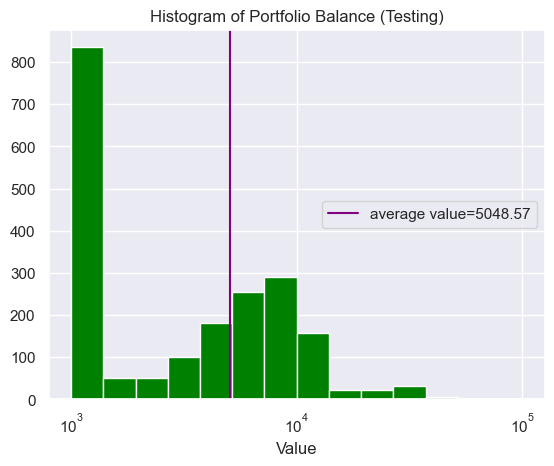

In [77]:
print(f"The max value of {max(test_)}, average value of {sum(test_)/len(test_)}, min value of {min(test_)}")
plt.hist(test_, bins=np.logspace(start=np.log10(1000), stop=np.log10(100000), num=15), color='green')
plt.axvline(x = (sum(test_)/len(test_)), color = 'purple', label = 'average value=5048.57')
plt.title("Histogram of Portfolio Balance (Testing)")
plt.gca().set_xscale("log")
plt.xlabel('Value')
plt.legend(loc='center right')
plt.show()